In [46]:
import json
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image
from IPython import display
import seaborn
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

%matplotlib inline
seaborn.set()

class Catch(object):
    def __init__(self, grid_size=10):
        self.grid_size = grid_size
        self.reset()

    def _update_state(self, action):
        state = self.state
        if action == 0:  # left
            action = -1
        elif action == 1:  # stay
            action = 0
        else:
            action = 1  # right
        f0, f1, basket = state[0]
        new_basket = min(max(1, basket + action), self.grid_size-1)
        f0 += 1
        out = np.asarray([f0, f1, new_basket])
        out = out[np.newaxis]

        assert len(out.shape) == 2
        self.state = out

    def _draw_state(self):
        im_size = (self.grid_size,)*2
        state = self.state[0]
        canvas = np.zeros(im_size)
        canvas[state[0], state[1]] = 1  # draw fruit
        canvas[-1, state[2]-1:state[2] + 2] = 1  # draw basket
        return canvas
        
    def _get_reward(self):
        fruit_row, fruit_col, basket = self.state[0]
        if fruit_row == self.grid_size-1:
            if abs(fruit_col - basket) <= 1:
                return 1
            else:
                return -1
        else:
            return 0

    def _is_over(self):
        if self.state[0, 0] == self.grid_size-1:
            return True
        else:
            return False

    def observe(self):
        canvas = self._draw_state()
        return canvas.reshape((1, -1))

    def act(self, action):
        self._update_state(action)
        reward = self._get_reward()
        game_over = self._is_over()
        return self.observe(), reward, game_over

    def reset(self):
        n = np.random.randint(0, self.grid_size-1, size=1)
        m = np.random.randint(1, self.grid_size-2, size=1)
        self.state = np.asarray([0, n, m])[np.newaxis]

        
last_frame_time = 0
translate_action = ["Left","Stay","Right","Create Ball","End Test"]
grid_size = 10

def display_screen(action,points,input_t,counter):
    global last_frame_time
    print("Action %s, Points: %d" % (translate_action[action],points))
    if("End" not in translate_action[action]):
        #Render the game with matplotlib
        plt.imshow(input_t.reshape((grid_size,)*2),
               interpolation='none', cmap='gray')
        plt.savefig('./frame'+str(counter)+'.png')
#         display.clear_output(wait=True)
#         display.display(plt.gcf())
    #Update the last frame time
    last_frame_time = set_max_fps(last_frame_time)
    
    
def set_max_fps(last_frame_time,FPS = 16):
    current_milli_time = lambda: int(round(time.time() * 1000))
    sleep_time = 1./FPS - (current_milli_time() - last_frame_time)
    if sleep_time > 0:
        time.sleep(sleep_time)
    return current_milli_time()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_125 (Dense)            (None, 20)                2020      
_________________________________________________________________
dense_126 (Dense)            (None, 3)                 63        
Total params: 12,183
Trainable params: 12,183
Non-trainable params: 0
_________________________________________________________________
EPISODE:      0 / TIMESTEP:        0 / REWARD: -1.000000 / AVG_REWARD: -1.000 / entropy  1.0811660952038236
EPISODE:      1 / TIMESTEP:       10 / REWARD: -1.000000 / AVG_REWARD: -1.000 / entropy  1.0774782101313274
EPISODE:      2 / TIMESTEP:       20 / REWARD: 1.000000 / AVG_REWARD: -0.333 / entropy  1.0810924326931988
EPISODE:      3 / TIMESTEP:       30 / REWARD: -1.000000 / AVG_REWARD: -0.500 /

EPISODE:     74 / TIMESTEP:      740 / REWARD: -1.000000 / AVG_REWARD: -0.520 / entropy  1.0757013335934391
EPISODE:     75 / TIMESTEP:      750 / REWARD: -1.000000 / AVG_REWARD: -0.526 / entropy  1.0758601640574414
EPISODE:     76 / TIMESTEP:      760 / REWARD: -1.000000 / AVG_REWARD: -0.532 / entropy  1.0760508884943236
EPISODE:     77 / TIMESTEP:      770 / REWARD: -1.000000 / AVG_REWARD: -0.538 / entropy  1.0762393320897363
EPISODE:     78 / TIMESTEP:      780 / REWARD: 1.000000 / AVG_REWARD: -0.519 / entropy  1.0763528788810708
EPISODE:     79 / TIMESTEP:      790 / REWARD: -1.000000 / AVG_REWARD: -0.525 / entropy  1.0765025376445716
EPISODE:     80 / TIMESTEP:      800 / REWARD: 1.000000 / AVG_REWARD: -0.506 / entropy  1.0766278937847362
EPISODE:     81 / TIMESTEP:      810 / REWARD: 1.000000 / AVG_REWARD: -0.488 / entropy  1.0768043911715508
EPISODE:     82 / TIMESTEP:      820 / REWARD: -1.000000 / AVG_REWARD: -0.494 / entropy  1.0769736850596814
EPISODE:     83 / TIMESTEP:    

EPISODE:    154 / TIMESTEP:     1540 / REWARD: -1.000000 / AVG_REWARD: -0.445 / entropy  1.0814457170852194
EPISODE:    155 / TIMESTEP:     1550 / REWARD: -1.000000 / AVG_REWARD: -0.449 / entropy  1.0814803285561396
EPISODE:    156 / TIMESTEP:     1560 / REWARD: -1.000000 / AVG_REWARD: -0.452 / entropy  1.0814803004771028
EPISODE:    157 / TIMESTEP:     1570 / REWARD: -1.000000 / AVG_REWARD: -0.456 / entropy  1.0814867799711294
EPISODE:    158 / TIMESTEP:     1580 / REWARD: -1.000000 / AVG_REWARD: -0.459 / entropy  1.08151583589098
EPISODE:    159 / TIMESTEP:     1590 / REWARD: -1.000000 / AVG_REWARD: -0.463 / entropy  1.0815309949633147
EPISODE:    160 / TIMESTEP:     1600 / REWARD: -1.000000 / AVG_REWARD: -0.466 / entropy  1.081538502268334
EPISODE:    161 / TIMESTEP:     1610 / REWARD: -1.000000 / AVG_REWARD: -0.469 / entropy  1.0815754505423687
EPISODE:    162 / TIMESTEP:     1620 / REWARD: -1.000000 / AVG_REWARD: -0.472 / entropy  1.0816367115792402
EPISODE:    163 / TIMESTEP:    

EPISODE:    231 / TIMESTEP:     2310 / REWARD: 1.000000 / AVG_REWARD: -0.431 / entropy  1.0828580323364085
EPISODE:    232 / TIMESTEP:     2320 / REWARD: 1.000000 / AVG_REWARD: -0.425 / entropy  1.0828566942035327
EPISODE:    233 / TIMESTEP:     2330 / REWARD: -1.000000 / AVG_REWARD: -0.427 / entropy  1.0827678185299479
EPISODE:    234 / TIMESTEP:     2340 / REWARD: -1.000000 / AVG_REWARD: -0.430 / entropy  1.082752155496719
EPISODE:    235 / TIMESTEP:     2350 / REWARD: -1.000000 / AVG_REWARD: -0.432 / entropy  1.082681884003449
EPISODE:    236 / TIMESTEP:     2360 / REWARD: -1.000000 / AVG_REWARD: -0.435 / entropy  1.0826763905832815
EPISODE:    237 / TIMESTEP:     2370 / REWARD: -1.000000 / AVG_REWARD: -0.437 / entropy  1.0827118763013157
EPISODE:    238 / TIMESTEP:     2380 / REWARD: -1.000000 / AVG_REWARD: -0.439 / entropy  1.0826694814896152
EPISODE:    239 / TIMESTEP:     2390 / REWARD: -1.000000 / AVG_REWARD: -0.442 / entropy  1.0826793278532998
EPISODE:    240 / TIMESTEP:     

EPISODE:    310 / TIMESTEP:     3100 / REWARD: -1.000000 / AVG_REWARD: -0.387 / entropy  1.0810177254014546
EPISODE:    311 / TIMESTEP:     3110 / REWARD: 1.000000 / AVG_REWARD: -0.380 / entropy  1.080964391783432
EPISODE:    312 / TIMESTEP:     3120 / REWARD: -1.000000 / AVG_REWARD: -0.380 / entropy  1.0808916317312807
EPISODE:    313 / TIMESTEP:     3130 / REWARD: -1.000000 / AVG_REWARD: -0.387 / entropy  1.0808003163337707
EPISODE:    314 / TIMESTEP:     3140 / REWARD: 1.000000 / AVG_REWARD: -0.380 / entropy  1.0807864528673667
EPISODE:    315 / TIMESTEP:     3150 / REWARD: -1.000000 / AVG_REWARD: -0.380 / entropy  1.0806712147041606
EPISODE:    316 / TIMESTEP:     3160 / REWARD: -1.000000 / AVG_REWARD: -0.387 / entropy  1.0806020501366367
EPISODE:    317 / TIMESTEP:     3170 / REWARD: -1.000000 / AVG_REWARD: -0.387 / entropy  1.0805654439219723
EPISODE:    318 / TIMESTEP:     3180 / REWARD: -1.000000 / AVG_REWARD: -0.387 / entropy  1.080358550482326
EPISODE:    319 / TIMESTEP:     

EPISODE:    388 / TIMESTEP:     3880 / REWARD: -1.000000 / AVG_REWARD: -0.380 / entropy  1.0772061518828073
EPISODE:    389 / TIMESTEP:     3890 / REWARD: 1.000000 / AVG_REWARD: -0.373 / entropy  1.0771156542830997
EPISODE:    390 / TIMESTEP:     3900 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  1.0770239125357732
EPISODE:    391 / TIMESTEP:     3910 / REWARD: -1.000000 / AVG_REWARD: -0.380 / entropy  1.0769966744935073
EPISODE:    392 / TIMESTEP:     3920 / REWARD: 1.000000 / AVG_REWARD: -0.373 / entropy  1.0770211368136937
EPISODE:    393 / TIMESTEP:     3930 / REWARD: 1.000000 / AVG_REWARD: -0.367 / entropy  1.076917157923734
EPISODE:    394 / TIMESTEP:     3940 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  1.0769311035562446
EPISODE:    395 / TIMESTEP:     3950 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  1.0769486761534657
EPISODE:    396 / TIMESTEP:     3960 / REWARD: 1.000000 / AVG_REWARD: -0.367 / entropy  1.0768141585809212
EPISODE:    397 / TIMESTEP:     3

EPISODE:    467 / TIMESTEP:     4670 / REWARD: -1.000000 / AVG_REWARD: -0.380 / entropy  1.072984164313034
EPISODE:    468 / TIMESTEP:     4680 / REWARD: 1.000000 / AVG_REWARD: -0.373 / entropy  1.0728895584079954
EPISODE:    469 / TIMESTEP:     4690 / REWARD: -1.000000 / AVG_REWARD: -0.380 / entropy  1.072856444363241
EPISODE:    470 / TIMESTEP:     4700 / REWARD: 1.000000 / AVG_REWARD: -0.380 / entropy  1.0727322889919635
EPISODE:    471 / TIMESTEP:     4710 / REWARD: -1.000000 / AVG_REWARD: -0.380 / entropy  1.0726872525612514
EPISODE:    472 / TIMESTEP:     4720 / REWARD: 1.000000 / AVG_REWARD: -0.380 / entropy  1.072555783258544
EPISODE:    473 / TIMESTEP:     4730 / REWARD: -1.000000 / AVG_REWARD: -0.387 / entropy  1.0725383716380155
EPISODE:    474 / TIMESTEP:     4740 / REWARD: 1.000000 / AVG_REWARD: -0.387 / entropy  1.0724866677434355
EPISODE:    475 / TIMESTEP:     4750 / REWARD: 1.000000 / AVG_REWARD: -0.380 / entropy  1.0724518120509605
EPISODE:    476 / TIMESTEP:     4760

EPISODE:    546 / TIMESTEP:     5460 / REWARD: 1.000000 / AVG_REWARD: -0.353 / entropy  1.0570109125419902
EPISODE:    547 / TIMESTEP:     5470 / REWARD: -1.000000 / AVG_REWARD: -0.353 / entropy  1.0566811599996355
EPISODE:    548 / TIMESTEP:     5480 / REWARD: -1.000000 / AVG_REWARD: -0.353 / entropy  1.0566330299995563
EPISODE:    549 / TIMESTEP:     5490 / REWARD: -1.000000 / AVG_REWARD: -0.353 / entropy  1.0562848977689387
EPISODE:    550 / TIMESTEP:     5500 / REWARD: 1.000000 / AVG_REWARD: -0.347 / entropy  1.0561645165196172
EPISODE:    551 / TIMESTEP:     5510 / REWARD: 1.000000 / AVG_REWARD: -0.340 / entropy  1.0558846131739792
EPISODE:    552 / TIMESTEP:     5520 / REWARD: 1.000000 / AVG_REWARD: -0.340 / entropy  1.0555982510911093
EPISODE:    553 / TIMESTEP:     5530 / REWARD: -1.000000 / AVG_REWARD: -0.340 / entropy  1.055406893712503
EPISODE:    554 / TIMESTEP:     5540 / REWARD: -1.000000 / AVG_REWARD: -0.340 / entropy  1.0552938488677697
EPISODE:    555 / TIMESTEP:     5

EPISODE:    627 / TIMESTEP:     6270 / REWARD: -1.000000 / AVG_REWARD: -0.420 / entropy  1.0313210360650664
EPISODE:    628 / TIMESTEP:     6280 / REWARD: 1.000000 / AVG_REWARD: -0.413 / entropy  1.0310227258337867
EPISODE:    629 / TIMESTEP:     6290 / REWARD: -1.000000 / AVG_REWARD: -0.420 / entropy  1.0306913517581093
EPISODE:    630 / TIMESTEP:     6300 / REWARD: -1.000000 / AVG_REWARD: -0.420 / entropy  1.0301760659615198
EPISODE:    631 / TIMESTEP:     6310 / REWARD: -1.000000 / AVG_REWARD: -0.420 / entropy  1.029999009878547
EPISODE:    632 / TIMESTEP:     6320 / REWARD: 1.000000 / AVG_REWARD: -0.413 / entropy  1.0296089728452542
EPISODE:    633 / TIMESTEP:     6330 / REWARD: 1.000000 / AVG_REWARD: -0.407 / entropy  1.0294081893232134
EPISODE:    634 / TIMESTEP:     6340 / REWARD: -1.000000 / AVG_REWARD: -0.407 / entropy  1.0288318569351127
EPISODE:    635 / TIMESTEP:     6350 / REWARD: -1.000000 / AVG_REWARD: -0.407 / entropy  1.0285054777065914
EPISODE:    636 / TIMESTEP:     

EPISODE:    706 / TIMESTEP:     7060 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  1.0021319362190035
EPISODE:    707 / TIMESTEP:     7070 / REWARD: -1.000000 / AVG_REWARD: -0.380 / entropy  1.0021691781723943
EPISODE:    708 / TIMESTEP:     7080 / REWARD: 1.000000 / AVG_REWARD: -0.373 / entropy  1.0021439439941335
EPISODE:    709 / TIMESTEP:     7090 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  1.0020427530341678
EPISODE:    710 / TIMESTEP:     7100 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  1.0019100581054334
EPISODE:    711 / TIMESTEP:     7110 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  1.0019616091030616
EPISODE:    712 / TIMESTEP:     7120 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  1.0018396120821988
EPISODE:    713 / TIMESTEP:     7130 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  1.0017064187482554
EPISODE:    714 / TIMESTEP:     7140 / REWARD: 1.000000 / AVG_REWARD: -0.367 / entropy  1.0016012576995073
EPISODE:    715 / TIMESTEP:   

EPISODE:    783 / TIMESTEP:     7830 / REWARD: 1.000000 / AVG_REWARD: -0.360 / entropy  0.9876757293277315
EPISODE:    784 / TIMESTEP:     7840 / REWARD: 1.000000 / AVG_REWARD: -0.353 / entropy  0.9877647470103371
EPISODE:    785 / TIMESTEP:     7850 / REWARD: 1.000000 / AVG_REWARD: -0.353 / entropy  0.9871799833907022
EPISODE:    786 / TIMESTEP:     7860 / REWARD: -1.000000 / AVG_REWARD: -0.360 / entropy  0.9868784994990737
EPISODE:    787 / TIMESTEP:     7870 / REWARD: -1.000000 / AVG_REWARD: -0.360 / entropy  0.9868382959012633
EPISODE:    788 / TIMESTEP:     7880 / REWARD: -1.000000 / AVG_REWARD: -0.367 / entropy  0.9868114103211295
EPISODE:    789 / TIMESTEP:     7890 / REWARD: -1.000000 / AVG_REWARD: -0.367 / entropy  0.9866663236750497
EPISODE:    790 / TIMESTEP:     7900 / REWARD: 1.000000 / AVG_REWARD: -0.360 / entropy  0.9865198685063257
EPISODE:    791 / TIMESTEP:     7910 / REWARD: -1.000000 / AVG_REWARD: -0.360 / entropy  0.9861813829563282
EPISODE:    792 / TIMESTEP:     

EPISODE:    862 / TIMESTEP:     8620 / REWARD: -1.000000 / AVG_REWARD: -0.313 / entropy  0.9805931508099593
EPISODE:    863 / TIMESTEP:     8630 / REWARD: 1.000000 / AVG_REWARD: -0.307 / entropy  0.9806958912920068
EPISODE:    864 / TIMESTEP:     8640 / REWARD: 1.000000 / AVG_REWARD: -0.300 / entropy  0.9806126211307666
EPISODE:    865 / TIMESTEP:     8650 / REWARD: 1.000000 / AVG_REWARD: -0.293 / entropy  0.98087009884693
EPISODE:    866 / TIMESTEP:     8660 / REWARD: -1.000000 / AVG_REWARD: -0.300 / entropy  0.9811213767970048
EPISODE:    867 / TIMESTEP:     8670 / REWARD: -1.000000 / AVG_REWARD: -0.300 / entropy  0.9815209326920686
EPISODE:    868 / TIMESTEP:     8680 / REWARD: -1.000000 / AVG_REWARD: -0.300 / entropy  0.9814931055572297
EPISODE:    869 / TIMESTEP:     8690 / REWARD: 1.000000 / AVG_REWARD: -0.293 / entropy  0.9814505802481264
EPISODE:    870 / TIMESTEP:     8700 / REWARD: -1.000000 / AVG_REWARD: -0.293 / entropy  0.9815845205607237
EPISODE:    871 / TIMESTEP:     87

EPISODE:    939 / TIMESTEP:     9390 / REWARD: 1.000000 / AVG_REWARD: -0.253 / entropy  0.9847549847320272
EPISODE:    940 / TIMESTEP:     9400 / REWARD: -1.000000 / AVG_REWARD: -0.253 / entropy  0.9845750407598638
EPISODE:    941 / TIMESTEP:     9410 / REWARD: -1.000000 / AVG_REWARD: -0.260 / entropy  0.9844955343008042
EPISODE:    942 / TIMESTEP:     9420 / REWARD: 1.000000 / AVG_REWARD: -0.253 / entropy  0.9847176503031343
EPISODE:    943 / TIMESTEP:     9430 / REWARD: 1.000000 / AVG_REWARD: -0.247 / entropy  0.984722919177126
EPISODE:    944 / TIMESTEP:     9440 / REWARD: -1.000000 / AVG_REWARD: -0.247 / entropy  0.9848374768981227
EPISODE:    945 / TIMESTEP:     9450 / REWARD: -1.000000 / AVG_REWARD: -0.247 / entropy  0.9848810562381038
EPISODE:    946 / TIMESTEP:     9460 / REWARD: -1.000000 / AVG_REWARD: -0.253 / entropy  0.9849101136569623
EPISODE:    947 / TIMESTEP:     9470 / REWARD: -1.000000 / AVG_REWARD: -0.253 / entropy  0.9846183430707013
EPISODE:    948 / TIMESTEP:     

EPISODE:   1018 / TIMESTEP:    10180 / REWARD: -1.000000 / AVG_REWARD: -0.233 / entropy  0.9804684440736418
EPISODE:   1019 / TIMESTEP:    10190 / REWARD: 1.000000 / AVG_REWARD: -0.227 / entropy  0.9792476912781044
EPISODE:   1020 / TIMESTEP:    10200 / REWARD: -1.000000 / AVG_REWARD: -0.227 / entropy  0.9791490139784635
EPISODE:   1021 / TIMESTEP:    10210 / REWARD: 1.000000 / AVG_REWARD: -0.220 / entropy  0.9788388139230233
EPISODE:   1022 / TIMESTEP:    10220 / REWARD: -1.000000 / AVG_REWARD: -0.220 / entropy  0.9783249174113628
EPISODE:   1023 / TIMESTEP:    10230 / REWARD: 1.000000 / AVG_REWARD: -0.220 / entropy  0.9775512876885908
EPISODE:   1024 / TIMESTEP:    10240 / REWARD: 1.000000 / AVG_REWARD: -0.220 / entropy  0.9772962734103203
EPISODE:   1025 / TIMESTEP:    10250 / REWARD: 1.000000 / AVG_REWARD: -0.213 / entropy  0.9767276341716449
EPISODE:   1026 / TIMESTEP:    10260 / REWARD: -1.000000 / AVG_REWARD: -0.213 / entropy  0.9763727596181411
EPISODE:   1027 / TIMESTEP:    10

EPISODE:   1099 / TIMESTEP:    10990 / REWARD: -1.000000 / AVG_REWARD: -0.213 / entropy  0.9447750514911282
EPISODE:   1100 / TIMESTEP:    11000 / REWARD: -1.000000 / AVG_REWARD: -0.213 / entropy  0.9448244706734465
EPISODE:   1101 / TIMESTEP:    11010 / REWARD: 1.000000 / AVG_REWARD: -0.213 / entropy  0.944661780325351
EPISODE:   1102 / TIMESTEP:    11020 / REWARD: 1.000000 / AVG_REWARD: -0.213 / entropy  0.9440203625570844
EPISODE:   1103 / TIMESTEP:    11030 / REWARD: -1.000000 / AVG_REWARD: -0.213 / entropy  0.9427146131076195
EPISODE:   1104 / TIMESTEP:    11040 / REWARD: -1.000000 / AVG_REWARD: -0.213 / entropy  0.9427807192725163
EPISODE:   1105 / TIMESTEP:    11050 / REWARD: 1.000000 / AVG_REWARD: -0.213 / entropy  0.9422371435330973
EPISODE:   1106 / TIMESTEP:    11060 / REWARD: -1.000000 / AVG_REWARD: -0.213 / entropy  0.9416306465367474
EPISODE:   1107 / TIMESTEP:    11070 / REWARD: 1.000000 / AVG_REWARD: -0.207 / entropy  0.9413196241193347
EPISODE:   1108 / TIMESTEP:    11

EPISODE:   1178 / TIMESTEP:    11780 / REWARD: -1.000000 / AVG_REWARD: -0.167 / entropy  0.8792282965061842
EPISODE:   1179 / TIMESTEP:    11790 / REWARD: -1.000000 / AVG_REWARD: -0.173 / entropy  0.8788969537670965
EPISODE:   1180 / TIMESTEP:    11800 / REWARD: -1.000000 / AVG_REWARD: -0.173 / entropy  0.8781958839021347
EPISODE:   1181 / TIMESTEP:    11810 / REWARD: -1.000000 / AVG_REWARD: -0.173 / entropy  0.8772520363661976
EPISODE:   1182 / TIMESTEP:    11820 / REWARD: 1.000000 / AVG_REWARD: -0.173 / entropy  0.8766562314497099
EPISODE:   1183 / TIMESTEP:    11830 / REWARD: -1.000000 / AVG_REWARD: -0.173 / entropy  0.8765176353962333
EPISODE:   1184 / TIMESTEP:    11840 / REWARD: -1.000000 / AVG_REWARD: -0.173 / entropy  0.8758390445400168
EPISODE:   1185 / TIMESTEP:    11850 / REWARD: -1.000000 / AVG_REWARD: -0.173 / entropy  0.8749609936828965
EPISODE:   1186 / TIMESTEP:    11860 / REWARD: 1.000000 / AVG_REWARD: -0.167 / entropy  0.8739614141980807
EPISODE:   1187 / TIMESTEP:   

EPISODE:   1255 / TIMESTEP:    12550 / REWARD: 1.000000 / AVG_REWARD: -0.120 / entropy  0.835831358416213
EPISODE:   1256 / TIMESTEP:    12560 / REWARD: 1.000000 / AVG_REWARD: -0.113 / entropy  0.8354045266740852
EPISODE:   1257 / TIMESTEP:    12570 / REWARD: -1.000000 / AVG_REWARD: -0.120 / entropy  0.8344611816108227
EPISODE:   1258 / TIMESTEP:    12580 / REWARD: -1.000000 / AVG_REWARD: -0.120 / entropy  0.8334019415522064
EPISODE:   1259 / TIMESTEP:    12590 / REWARD: 1.000000 / AVG_REWARD: -0.113 / entropy  0.8324081320950278
EPISODE:   1260 / TIMESTEP:    12600 / REWARD: 1.000000 / AVG_REWARD: -0.107 / entropy  0.8312916079660256
EPISODE:   1261 / TIMESTEP:    12610 / REWARD: 1.000000 / AVG_REWARD: -0.107 / entropy  0.8304456437682664
EPISODE:   1262 / TIMESTEP:    12620 / REWARD: -1.000000 / AVG_REWARD: -0.113 / entropy  0.830274163721888
EPISODE:   1263 / TIMESTEP:    12630 / REWARD: -1.000000 / AVG_REWARD: -0.113 / entropy  0.829925562535171
EPISODE:   1264 / TIMESTEP:    12640

EPISODE:   1335 / TIMESTEP:    13350 / REWARD: 1.000000 / AVG_REWARD: -0.120 / entropy  0.7865889941597427
EPISODE:   1336 / TIMESTEP:    13360 / REWARD: -1.000000 / AVG_REWARD: -0.127 / entropy  0.7855530923439397
EPISODE:   1337 / TIMESTEP:    13370 / REWARD: 1.000000 / AVG_REWARD: -0.120 / entropy  0.785192563318544
EPISODE:   1338 / TIMESTEP:    13380 / REWARD: 1.000000 / AVG_REWARD: -0.120 / entropy  0.7839279069861881
EPISODE:   1339 / TIMESTEP:    13390 / REWARD: -1.000000 / AVG_REWARD: -0.127 / entropy  0.7832118149681224
EPISODE:   1340 / TIMESTEP:    13400 / REWARD: -1.000000 / AVG_REWARD: -0.127 / entropy  0.7817424124230942
EPISODE:   1341 / TIMESTEP:    13410 / REWARD: -1.000000 / AVG_REWARD: -0.133 / entropy  0.780654809317655
EPISODE:   1342 / TIMESTEP:    13420 / REWARD: -1.000000 / AVG_REWARD: -0.140 / entropy  0.7792459865714665
EPISODE:   1343 / TIMESTEP:    13430 / REWARD: 1.000000 / AVG_REWARD: -0.133 / entropy  0.7783928622774504
EPISODE:   1344 / TIMESTEP:    134

EPISODE:   1413 / TIMESTEP:    14130 / REWARD: 1.000000 / AVG_REWARD: -0.107 / entropy  0.6828941510728112
EPISODE:   1414 / TIMESTEP:    14140 / REWARD: 1.000000 / AVG_REWARD: -0.107 / entropy  0.6819240579367787
EPISODE:   1415 / TIMESTEP:    14150 / REWARD: -1.000000 / AVG_REWARD: -0.113 / entropy  0.6815670575781002
EPISODE:   1416 / TIMESTEP:    14160 / REWARD: 1.000000 / AVG_REWARD: -0.107 / entropy  0.6809318084159384
EPISODE:   1417 / TIMESTEP:    14170 / REWARD: -1.000000 / AVG_REWARD: -0.107 / entropy  0.6804140088927968
EPISODE:   1418 / TIMESTEP:    14180 / REWARD: -1.000000 / AVG_REWARD: -0.113 / entropy  0.6789480985176785
EPISODE:   1419 / TIMESTEP:    14190 / REWARD: -1.000000 / AVG_REWARD: -0.120 / entropy  0.6784039090656573
EPISODE:   1420 / TIMESTEP:    14200 / REWARD: 1.000000 / AVG_REWARD: -0.113 / entropy  0.6770212773647575
EPISODE:   1421 / TIMESTEP:    14210 / REWARD: 1.000000 / AVG_REWARD: -0.113 / entropy  0.6762428031972161
EPISODE:   1422 / TIMESTEP:    14

EPISODE:   1490 / TIMESTEP:    14900 / REWARD: -1.000000 / AVG_REWARD: -0.120 / entropy  0.6307091646779466
EPISODE:   1491 / TIMESTEP:    14910 / REWARD: 1.000000 / AVG_REWARD: -0.113 / entropy  0.6297469867655524
EPISODE:   1492 / TIMESTEP:    14920 / REWARD: 1.000000 / AVG_REWARD: -0.107 / entropy  0.627877497110102
EPISODE:   1493 / TIMESTEP:    14930 / REWARD: -1.000000 / AVG_REWARD: -0.107 / entropy  0.6256971898012692
EPISODE:   1494 / TIMESTEP:    14940 / REWARD: -1.000000 / AVG_REWARD: -0.113 / entropy  0.6247364752656884
EPISODE:   1495 / TIMESTEP:    14950 / REWARD: -1.000000 / AVG_REWARD: -0.120 / entropy  0.6233912020838923
EPISODE:   1496 / TIMESTEP:    14960 / REWARD: 1.000000 / AVG_REWARD: -0.120 / entropy  0.6220897644509872
EPISODE:   1497 / TIMESTEP:    14970 / REWARD: 1.000000 / AVG_REWARD: -0.113 / entropy  0.6222406346902803
EPISODE:   1498 / TIMESTEP:    14980 / REWARD: -1.000000 / AVG_REWARD: -0.113 / entropy  0.6206242888586389
EPISODE:   1499 / TIMESTEP:    14

EPISODE:   1570 / TIMESTEP:    15700 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.542673965845326
EPISODE:   1571 / TIMESTEP:    15710 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.5417107857415383
EPISODE:   1572 / TIMESTEP:    15720 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.5411265306488645
EPISODE:   1573 / TIMESTEP:    15730 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.5399083186337655
EPISODE:   1574 / TIMESTEP:    15740 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.5392901310969697
EPISODE:   1575 / TIMESTEP:    15750 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.5382108683728923
EPISODE:   1576 / TIMESTEP:    15760 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.5366484848475429
EPISODE:   1577 / TIMESTEP:    15770 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.5349191642673341
EPISODE:   1578 / TIMESTEP:    15780 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.5341413443711484
EPISODE:   1579 / TIMESTEP:    15790 /

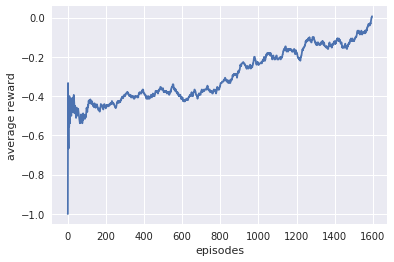

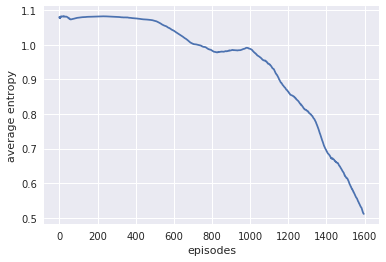

EPISODE:   1596 / TIMESTEP:    15960 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.5109329616147334
EPISODE:   1597 / TIMESTEP:    15970 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.5095775962462304
saved model maxs: 0.013333333333333334 caught fruits (300):  152.0


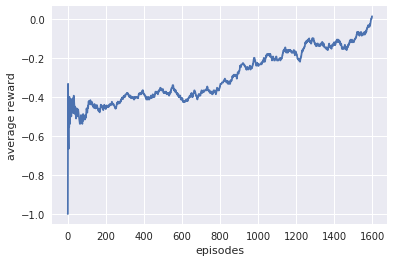

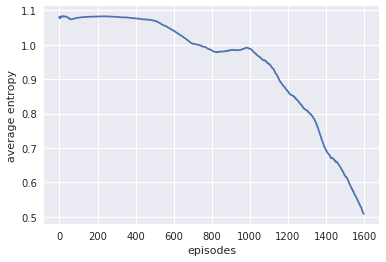

EPISODE:   1598 / TIMESTEP:    15980 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.5086811504575114
EPISODE:   1599 / TIMESTEP:    15990 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.5072595019866194
EPISODE:   1600 / TIMESTEP:    16000 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.5053689825679694
EPISODE:   1601 / TIMESTEP:    16010 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.5036740196613526
EPISODE:   1602 / TIMESTEP:    16020 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.5029924723650846
saved model maxs: 0.02 caught fruits (300):  153.0


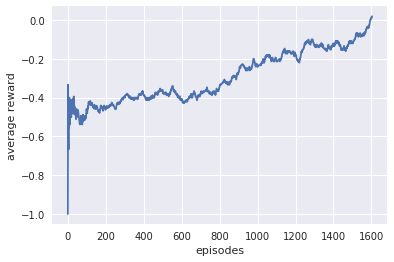

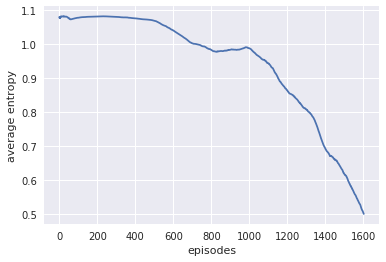

EPISODE:   1603 / TIMESTEP:    16030 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.501038204236301
EPISODE:   1604 / TIMESTEP:    16040 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.4996258041973191
saved model maxs: 0.02666666666666667 caught fruits (300):  154.0


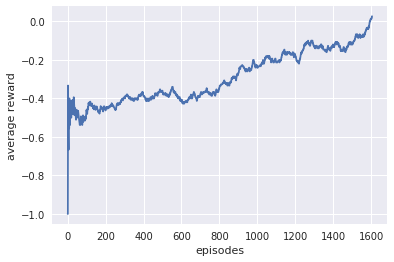

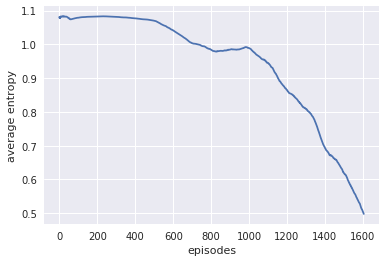

EPISODE:   1605 / TIMESTEP:    16050 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.497978091324783
EPISODE:   1606 / TIMESTEP:    16060 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.4969331212086534
saved model maxs: 0.03333333333333333 caught fruits (300):  155.0


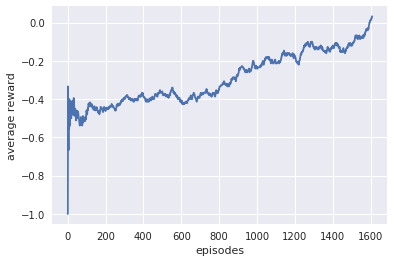

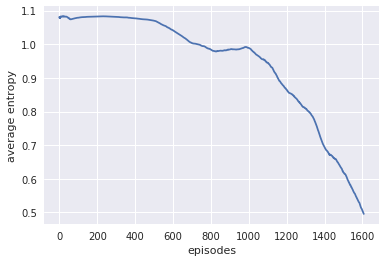

EPISODE:   1607 / TIMESTEP:    16070 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.49575987936376975
saved model maxs: 0.04 caught fruits (300):  156.0


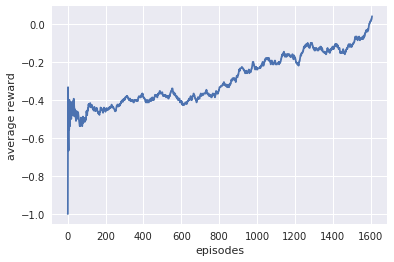

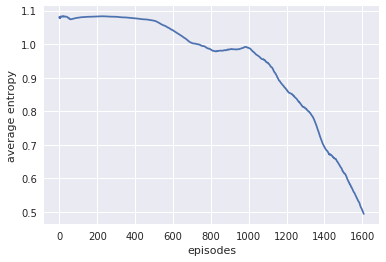

EPISODE:   1608 / TIMESTEP:    16080 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.4945099992242952
EPISODE:   1609 / TIMESTEP:    16090 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.493089883627577
EPISODE:   1610 / TIMESTEP:    16100 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.4927085291201041
EPISODE:   1611 / TIMESTEP:    16110 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.4909767766565913
saved model maxs: 0.04666666666666667 caught fruits (300):  157.0


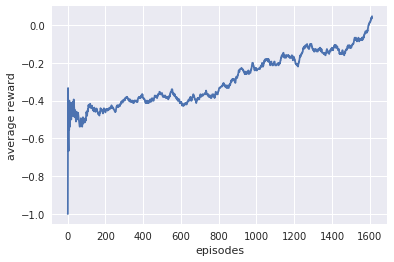

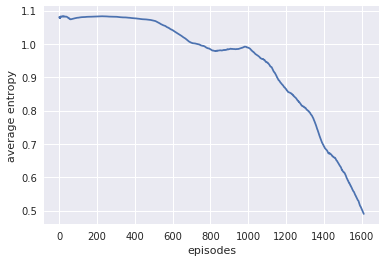

EPISODE:   1612 / TIMESTEP:    16120 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.48987944347025064
saved model maxs: 0.05333333333333334 caught fruits (300):  158.0


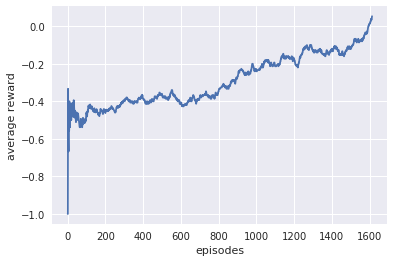

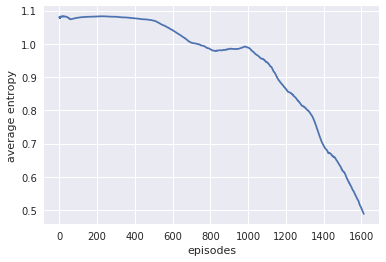

EPISODE:   1613 / TIMESTEP:    16130 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.48822179101959423
EPISODE:   1614 / TIMESTEP:    16140 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.4871971201206799
saved model maxs: 0.06 caught fruits (300):  159.0


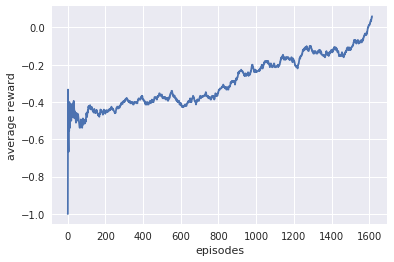

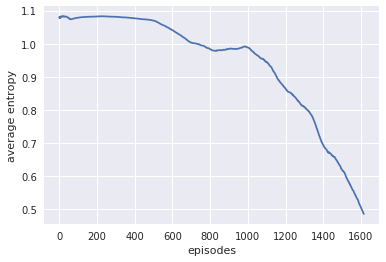

EPISODE:   1615 / TIMESTEP:    16150 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.4862070584876669
EPISODE:   1616 / TIMESTEP:    16160 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.485096602620626
EPISODE:   1617 / TIMESTEP:    16170 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.4842798747770764
EPISODE:   1618 / TIMESTEP:    16180 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.4830326001221935
saved model maxs: 0.06666666666666667 caught fruits (300):  160.0


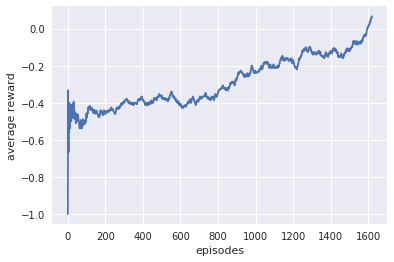

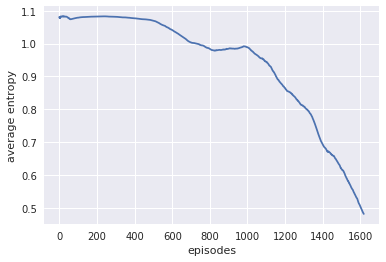

EPISODE:   1619 / TIMESTEP:    16190 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.48200804546337433
saved model maxs: 0.07333333333333333 caught fruits (300):  161.0


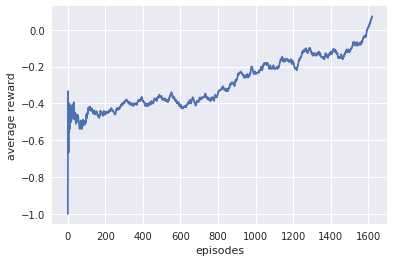

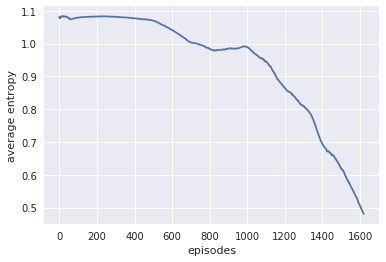

EPISODE:   1620 / TIMESTEP:    16200 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.4809294876263097
EPISODE:   1621 / TIMESTEP:    16210 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.4810102385310111
saved model maxs: 0.08 caught fruits (300):  162.0


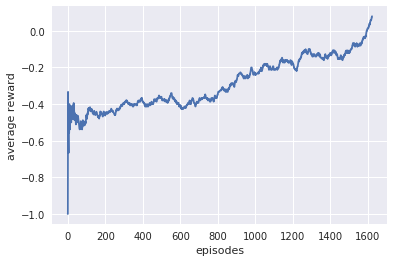

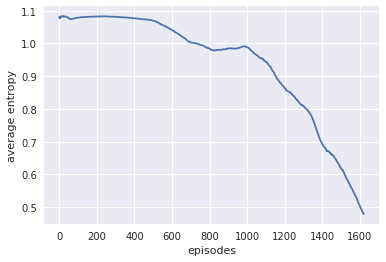

EPISODE:   1622 / TIMESTEP:    16220 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.47960548491665617
EPISODE:   1623 / TIMESTEP:    16230 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.4781108303506066
EPISODE:   1624 / TIMESTEP:    16240 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.4763122613935007
EPISODE:   1625 / TIMESTEP:    16250 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.4758663651685196
EPISODE:   1626 / TIMESTEP:    16260 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.47473409231269253
EPISODE:   1627 / TIMESTEP:    16270 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.4734359696431568
EPISODE:   1628 / TIMESTEP:    16280 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.47235995105916156
EPISODE:   1629 / TIMESTEP:    16290 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.47130249862938567
EPISODE:   1630 / TIMESTEP:    16300 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.4714084071866065
saved model maxs: 0.08666666666666667 cau

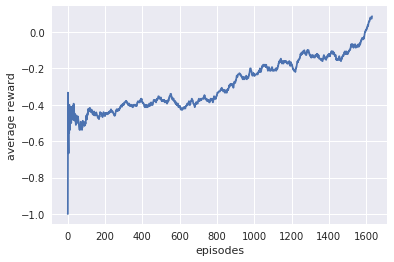

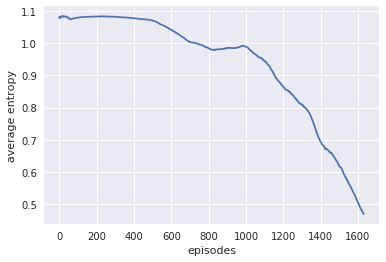

EPISODE:   1631 / TIMESTEP:    16310 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.4704950210072652
saved model maxs: 0.09333333333333334 caught fruits (300):  164.0


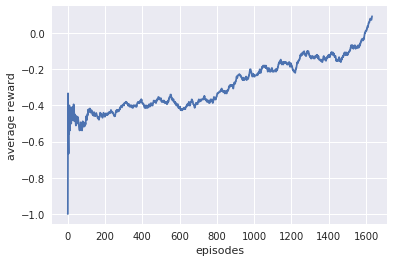

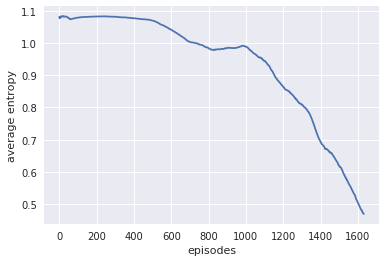

EPISODE:   1632 / TIMESTEP:    16320 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.4699092459989091
EPISODE:   1633 / TIMESTEP:    16330 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.4686307634392546
EPISODE:   1634 / TIMESTEP:    16340 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.46730975781118983
EPISODE:   1635 / TIMESTEP:    16350 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.46625918723849785
EPISODE:   1636 / TIMESTEP:    16360 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.4647349096717382
EPISODE:   1637 / TIMESTEP:    16370 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.46366191204430324
EPISODE:   1638 / TIMESTEP:    16380 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.4629483524164944
EPISODE:   1639 / TIMESTEP:    16390 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.46141893412503937
EPISODE:   1640 / TIMESTEP:    16400 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.4605293995362741
saved model maxs: 0.1 caught fruits (3

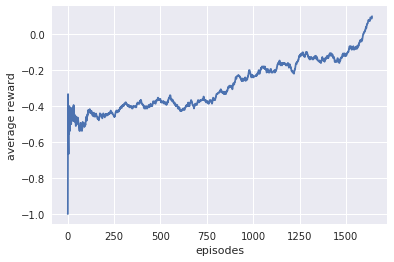

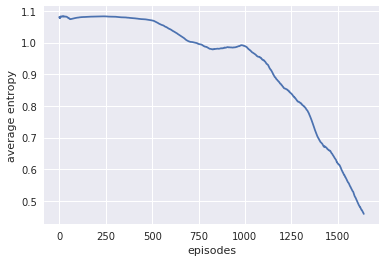

EPISODE:   1641 / TIMESTEP:    16410 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.458916014087283
saved model maxs: 0.10666666666666667 caught fruits (300):  166.0


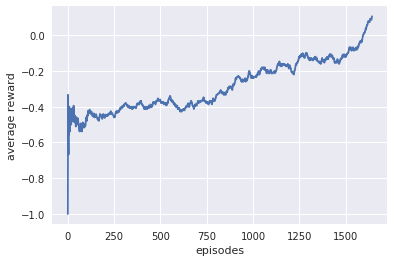

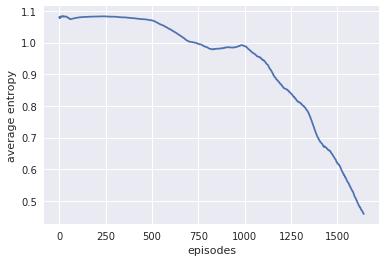

EPISODE:   1642 / TIMESTEP:    16420 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.45887702463608654
EPISODE:   1643 / TIMESTEP:    16430 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.4578796403047939
EPISODE:   1644 / TIMESTEP:    16440 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.45661867071977913
saved model maxs: 0.11333333333333333 caught fruits (300):  167.0


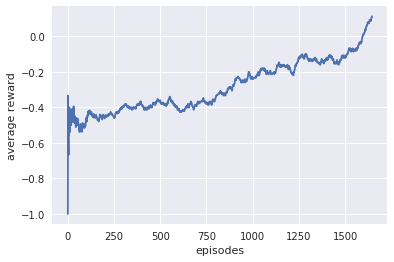

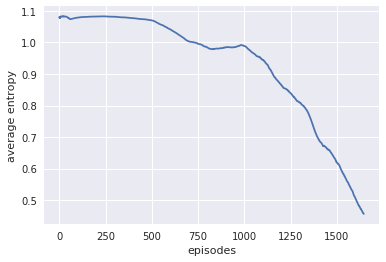

EPISODE:   1645 / TIMESTEP:    16450 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.45624562987091927
EPISODE:   1646 / TIMESTEP:    16460 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.45705297623036645
saved model maxs: 0.12 caught fruits (300):  168.0


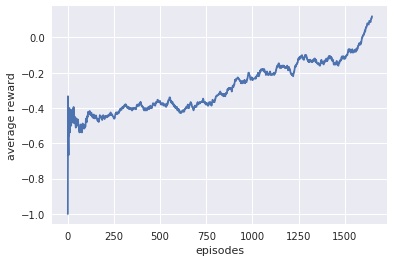

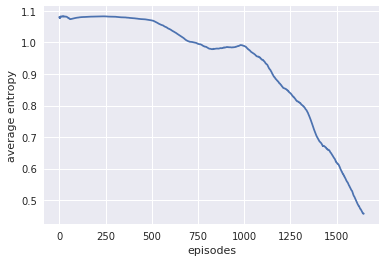

EPISODE:   1647 / TIMESTEP:    16470 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.457219254264815
saved model maxs: 0.12666666666666668 caught fruits (300):  169.0


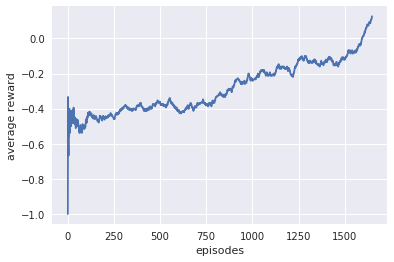

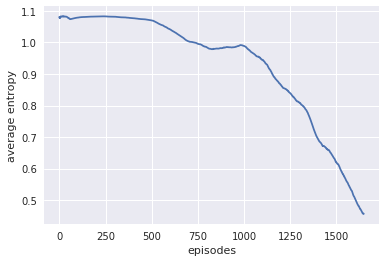

EPISODE:   1648 / TIMESTEP:    16480 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.4566733394252757
saved model maxs: 0.13333333333333333 caught fruits (300):  170.0


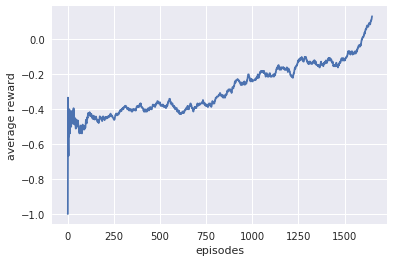

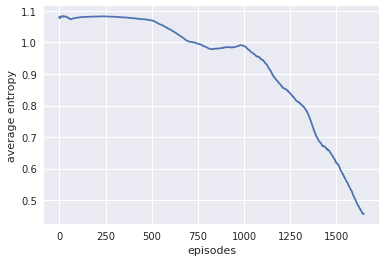

EPISODE:   1649 / TIMESTEP:    16490 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.45622924991021
EPISODE:   1650 / TIMESTEP:    16500 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.45661878268268924
EPISODE:   1651 / TIMESTEP:    16510 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.45569108047212165
saved model maxs: 0.14 caught fruits (300):  171.0


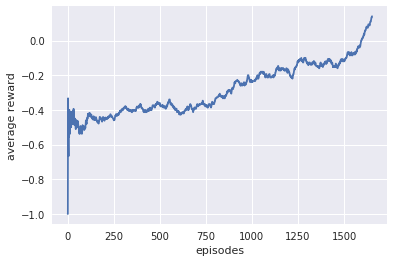

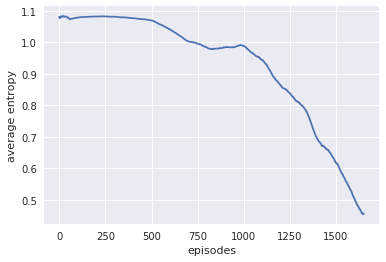

EPISODE:   1652 / TIMESTEP:    16520 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.45576101062819363
saved model maxs: 0.14666666666666667 caught fruits (300):  172.0


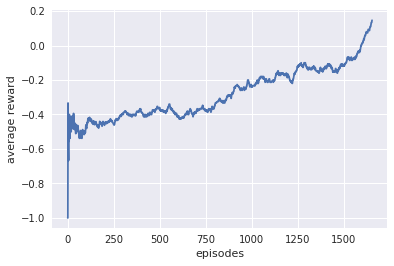

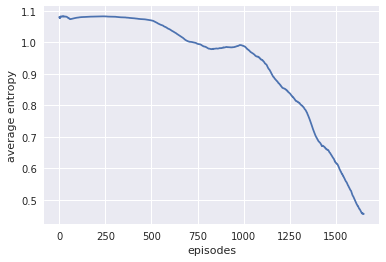

EPISODE:   1653 / TIMESTEP:    16530 / REWARD: 1.000000 / AVG_REWARD: 0.147 / entropy  0.45559073831679087
saved model maxs: 0.15333333333333332 caught fruits (300):  173.0


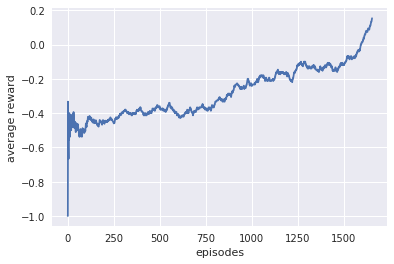

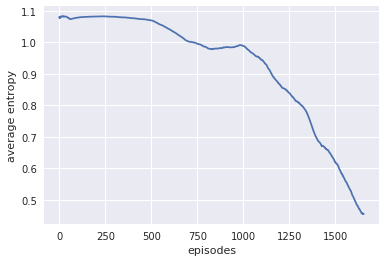

EPISODE:   1654 / TIMESTEP:    16540 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.45580253505527424
EPISODE:   1655 / TIMESTEP:    16550 / REWARD: -1.000000 / AVG_REWARD: 0.153 / entropy  0.4558849766760788
EPISODE:   1656 / TIMESTEP:    16560 / REWARD: -1.000000 / AVG_REWARD: 0.153 / entropy  0.4552988124328355
EPISODE:   1657 / TIMESTEP:    16570 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.45478193935627736
saved model maxs: 0.16 caught fruits (300):  174.0


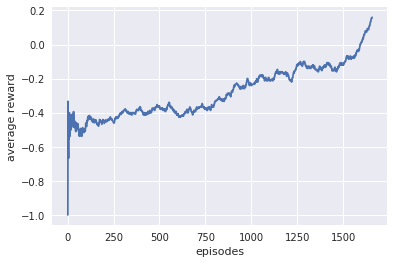

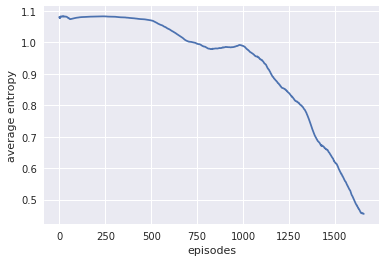

EPISODE:   1658 / TIMESTEP:    16580 / REWARD: 1.000000 / AVG_REWARD: 0.160 / entropy  0.45427699031170315
saved model maxs: 0.16666666666666666 caught fruits (300):  175.0


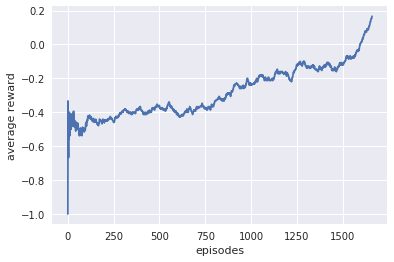

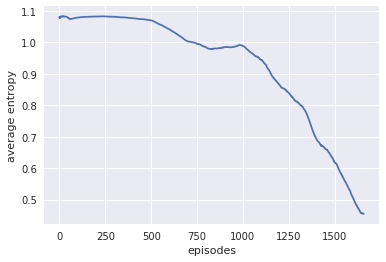

EPISODE:   1659 / TIMESTEP:    16590 / REWARD: 1.000000 / AVG_REWARD: 0.167 / entropy  0.4542831227907703
EPISODE:   1660 / TIMESTEP:    16600 / REWARD: -1.000000 / AVG_REWARD: 0.167 / entropy  0.4536698632914987
saved model maxs: 0.17333333333333334 caught fruits (300):  176.0


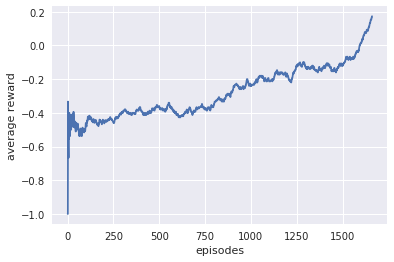

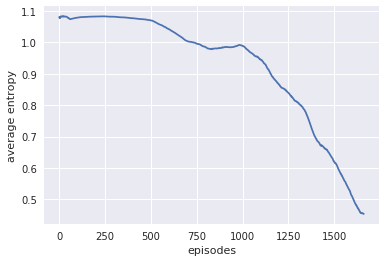

EPISODE:   1661 / TIMESTEP:    16610 / REWARD: 1.000000 / AVG_REWARD: 0.173 / entropy  0.4537852298144113
EPISODE:   1662 / TIMESTEP:    16620 / REWARD: -1.000000 / AVG_REWARD: 0.173 / entropy  0.45456210430366584
EPISODE:   1663 / TIMESTEP:    16630 / REWARD: -1.000000 / AVG_REWARD: 0.167 / entropy  0.4542009610358487
EPISODE:   1664 / TIMESTEP:    16640 / REWARD: 1.000000 / AVG_REWARD: 0.173 / entropy  0.45451888225765696
saved model maxs: 0.18 caught fruits (300):  177.0


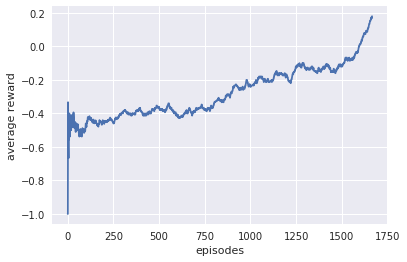

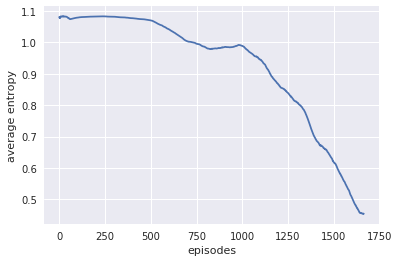

EPISODE:   1665 / TIMESTEP:    16650 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.45434149039909244
EPISODE:   1666 / TIMESTEP:    16660 / REWARD: -1.000000 / AVG_REWARD: 0.180 / entropy  0.45376833669358385
EPISODE:   1667 / TIMESTEP:    16670 / REWARD: -1.000000 / AVG_REWARD: 0.173 / entropy  0.45331274895687346
EPISODE:   1668 / TIMESTEP:    16680 / REWARD: 1.000000 / AVG_REWARD: 0.173 / entropy  0.4534687468650992
EPISODE:   1669 / TIMESTEP:    16690 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.4534094616253343
EPISODE:   1670 / TIMESTEP:    16700 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.4528424691677922
EPISODE:   1671 / TIMESTEP:    16710 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.453493699648728
saved model maxs: 0.18666666666666668 caught fruits (300):  178.0


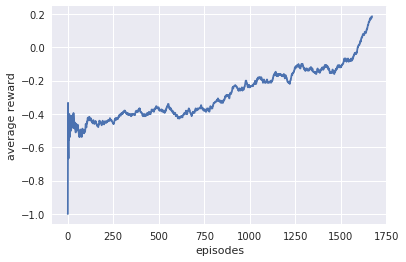

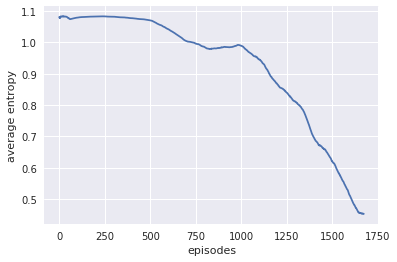

EPISODE:   1672 / TIMESTEP:    16720 / REWARD: 1.000000 / AVG_REWARD: 0.187 / entropy  0.4532470018796071
EPISODE:   1673 / TIMESTEP:    16730 / REWARD: -1.000000 / AVG_REWARD: 0.180 / entropy  0.45277492120379104
EPISODE:   1674 / TIMESTEP:    16740 / REWARD: 1.000000 / AVG_REWARD: 0.187 / entropy  0.4535328495895697
EPISODE:   1675 / TIMESTEP:    16750 / REWARD: -1.000000 / AVG_REWARD: 0.187 / entropy  0.45370965853954354
EPISODE:   1676 / TIMESTEP:    16760 / REWARD: 1.000000 / AVG_REWARD: 0.187 / entropy  0.4536715542835494
saved model maxs: 0.19333333333333333 caught fruits (300):  179.0


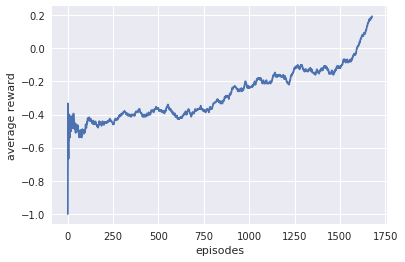

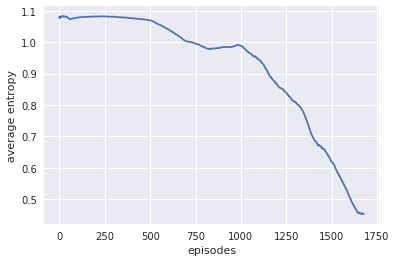

EPISODE:   1677 / TIMESTEP:    16770 / REWARD: 1.000000 / AVG_REWARD: 0.193 / entropy  0.45339158209454683
EPISODE:   1678 / TIMESTEP:    16780 / REWARD: -1.000000 / AVG_REWARD: 0.187 / entropy  0.45279709477184554
EPISODE:   1679 / TIMESTEP:    16790 / REWARD: -1.000000 / AVG_REWARD: 0.180 / entropy  0.4524782709701469
EPISODE:   1680 / TIMESTEP:    16800 / REWARD: -1.000000 / AVG_REWARD: 0.180 / entropy  0.4530040433181932
EPISODE:   1681 / TIMESTEP:    16810 / REWARD: 1.000000 / AVG_REWARD: 0.187 / entropy  0.45364646678238557
EPISODE:   1682 / TIMESTEP:    16820 / REWARD: 1.000000 / AVG_REWARD: 0.193 / entropy  0.45348248223946597
EPISODE:   1683 / TIMESTEP:    16830 / REWARD: -1.000000 / AVG_REWARD: 0.187 / entropy  0.4524965669649343
EPISODE:   1684 / TIMESTEP:    16840 / REWARD: 1.000000 / AVG_REWARD: 0.193 / entropy  0.4529231640082543
saved model maxs: 0.2 caught fruits (300):  180.0


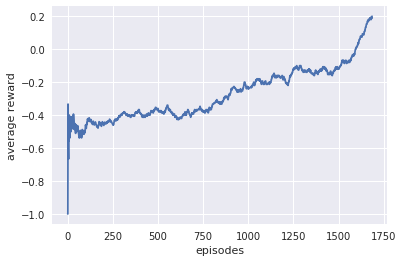

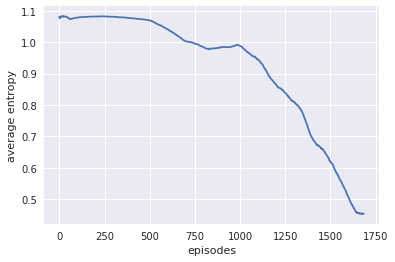

EPISODE:   1685 / TIMESTEP:    16850 / REWARD: 1.000000 / AVG_REWARD: 0.200 / entropy  0.4531133283005545
EPISODE:   1686 / TIMESTEP:    16860 / REWARD: -1.000000 / AVG_REWARD: 0.193 / entropy  0.45237353317370566
EPISODE:   1687 / TIMESTEP:    16870 / REWARD: 1.000000 / AVG_REWARD: 0.193 / entropy  0.45213770587342206
EPISODE:   1688 / TIMESTEP:    16880 / REWARD: 1.000000 / AVG_REWARD: 0.193 / entropy  0.4519260988998468
EPISODE:   1689 / TIMESTEP:    16890 / REWARD: 1.000000 / AVG_REWARD: 0.200 / entropy  0.4527391267547177
EPISODE:   1690 / TIMESTEP:    16900 / REWARD: -1.000000 / AVG_REWARD: 0.193 / entropy  0.4517600283875234
EPISODE:   1691 / TIMESTEP:    16910 / REWARD: 1.000000 / AVG_REWARD: 0.200 / entropy  0.45297712127574613
EPISODE:   1692 / TIMESTEP:    16920 / REWARD: 1.000000 / AVG_REWARD: 0.200 / entropy  0.45228223991545824
EPISODE:   1693 / TIMESTEP:    16930 / REWARD: 1.000000 / AVG_REWARD: 0.200 / entropy  0.45217720500779923
EPISODE:   1694 / TIMESTEP:    16940 / 

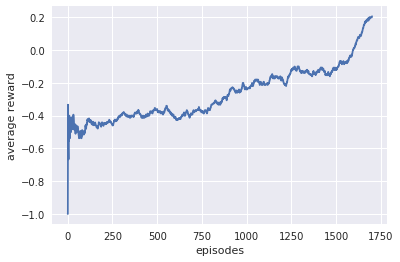

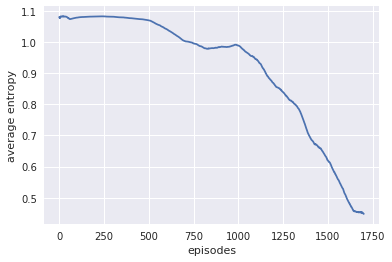

EPISODE:   1700 / TIMESTEP:    17000 / REWARD: 1.000000 / AVG_REWARD: 0.207 / entropy  0.4480595409152685
EPISODE:   1701 / TIMESTEP:    17010 / REWARD: -1.000000 / AVG_REWARD: 0.207 / entropy  0.4473645294016158
saved model maxs: 0.21333333333333335 caught fruits (300):  182.0


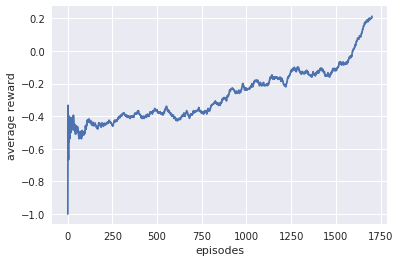

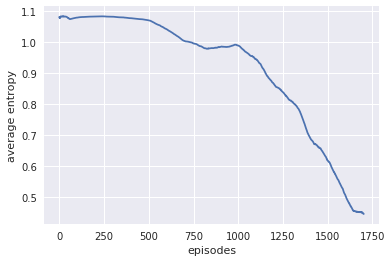

EPISODE:   1702 / TIMESTEP:    17020 / REWARD: 1.000000 / AVG_REWARD: 0.213 / entropy  0.44708454962129945
saved model maxs: 0.22 caught fruits (300):  183.0


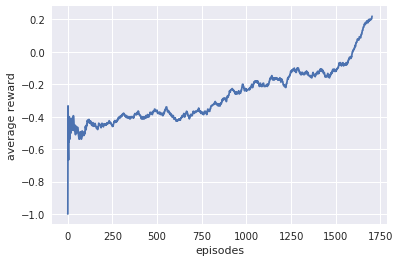

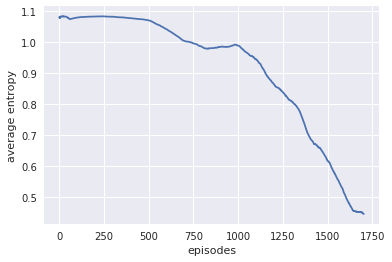

EPISODE:   1703 / TIMESTEP:    17030 / REWARD: 1.000000 / AVG_REWARD: 0.220 / entropy  0.4469041714982853
EPISODE:   1704 / TIMESTEP:    17040 / REWARD: 1.000000 / AVG_REWARD: 0.220 / entropy  0.446928313035104
saved model maxs: 0.22666666666666666 caught fruits (300):  184.0


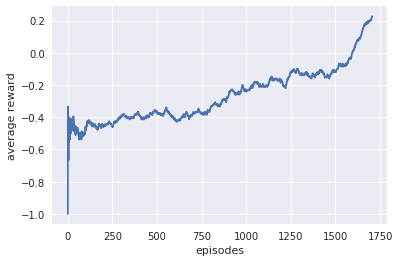

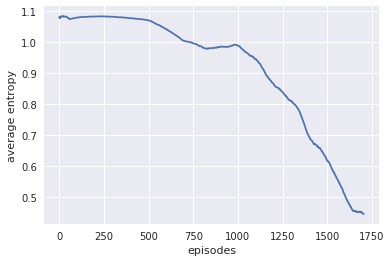

EPISODE:   1705 / TIMESTEP:    17050 / REWARD: 1.000000 / AVG_REWARD: 0.227 / entropy  0.44651788808957293
EPISODE:   1706 / TIMESTEP:    17060 / REWARD: 1.000000 / AVG_REWARD: 0.227 / entropy  0.4457884751412052
EPISODE:   1707 / TIMESTEP:    17070 / REWARD: 1.000000 / AVG_REWARD: 0.227 / entropy  0.44646043760771004
EPISODE:   1708 / TIMESTEP:    17080 / REWARD: -1.000000 / AVG_REWARD: 0.220 / entropy  0.4452180845318017
EPISODE:   1709 / TIMESTEP:    17090 / REWARD: 1.000000 / AVG_REWARD: 0.220 / entropy  0.44461339366656766
EPISODE:   1710 / TIMESTEP:    17100 / REWARD: -1.000000 / AVG_REWARD: 0.213 / entropy  0.4443397444017507
EPISODE:   1711 / TIMESTEP:    17110 / REWARD: 1.000000 / AVG_REWARD: 0.220 / entropy  0.44341827118286387
EPISODE:   1712 / TIMESTEP:    17120 / REWARD: -1.000000 / AVG_REWARD: 0.213 / entropy  0.4424793802588074
EPISODE:   1713 / TIMESTEP:    17130 / REWARD: -1.000000 / AVG_REWARD: 0.207 / entropy  0.4423251645404983
EPISODE:   1714 / TIMESTEP:    17140 /

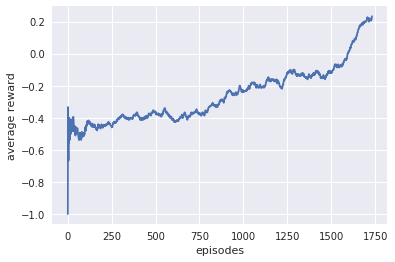

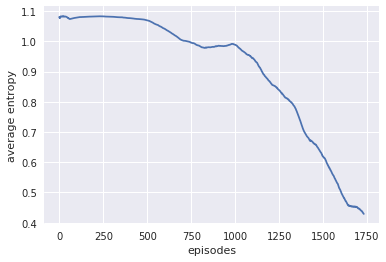

EPISODE:   1732 / TIMESTEP:    17320 / REWARD: 1.000000 / AVG_REWARD: 0.233 / entropy  0.42912068379301305
saved model maxs: 0.24 caught fruits (300):  186.0


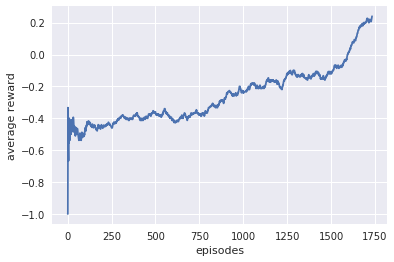

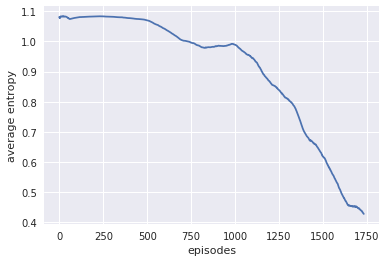

EPISODE:   1733 / TIMESTEP:    17330 / REWARD: 1.000000 / AVG_REWARD: 0.240 / entropy  0.42836221010855374
EPISODE:   1734 / TIMESTEP:    17340 / REWARD: 1.000000 / AVG_REWARD: 0.240 / entropy  0.4279257152155387
EPISODE:   1735 / TIMESTEP:    17350 / REWARD: -1.000000 / AVG_REWARD: 0.233 / entropy  0.42732686748745397
EPISODE:   1736 / TIMESTEP:    17360 / REWARD: 1.000000 / AVG_REWARD: 0.240 / entropy  0.4280569045281865
saved model maxs: 0.24666666666666667 caught fruits (300):  187.0


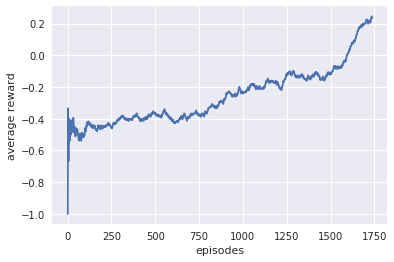

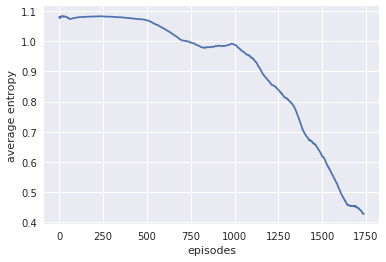

EPISODE:   1737 / TIMESTEP:    17370 / REWARD: 1.000000 / AVG_REWARD: 0.247 / entropy  0.4277060631229715
saved model maxs: 0.25333333333333335 caught fruits (300):  188.0


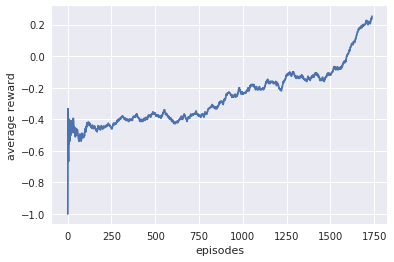

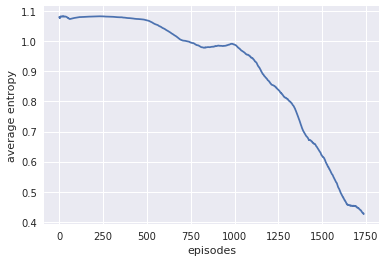

EPISODE:   1738 / TIMESTEP:    17380 / REWARD: 1.000000 / AVG_REWARD: 0.253 / entropy  0.42633433997993253
saved model maxs: 0.26 caught fruits (300):  189.0


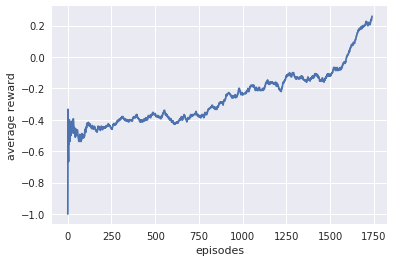

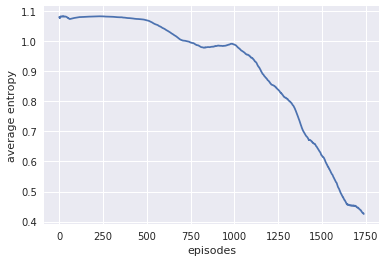

EPISODE:   1739 / TIMESTEP:    17390 / REWARD: 1.000000 / AVG_REWARD: 0.260 / entropy  0.42563605119043063
EPISODE:   1740 / TIMESTEP:    17400 / REWARD: -1.000000 / AVG_REWARD: 0.260 / entropy  0.42435380856420296
EPISODE:   1741 / TIMESTEP:    17410 / REWARD: 1.000000 / AVG_REWARD: 0.260 / entropy  0.42381277552581637
saved model maxs: 0.26666666666666666 caught fruits (300):  190.0


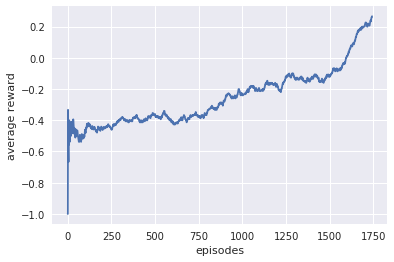

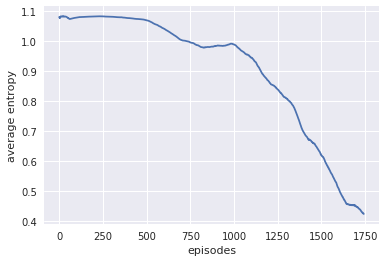

EPISODE:   1742 / TIMESTEP:    17420 / REWARD: 1.000000 / AVG_REWARD: 0.267 / entropy  0.4238772737753957
saved model maxs: 0.2733333333333333 caught fruits (300):  191.0


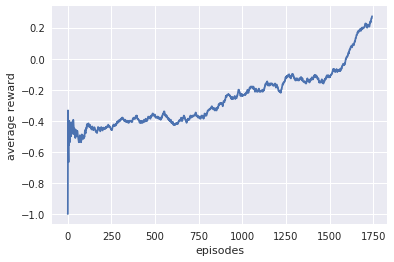

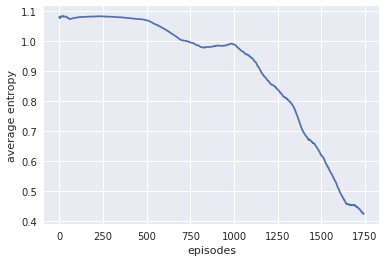

EPISODE:   1743 / TIMESTEP:    17430 / REWARD: 1.000000 / AVG_REWARD: 0.273 / entropy  0.42349700197249784
saved model maxs: 0.28 caught fruits (300):  192.0


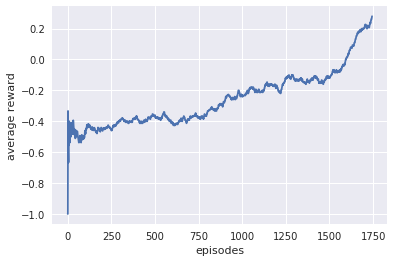

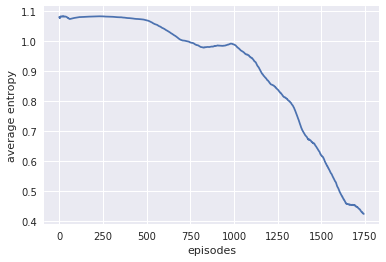

EPISODE:   1744 / TIMESTEP:    17440 / REWARD: 1.000000 / AVG_REWARD: 0.280 / entropy  0.42303786966622015
saved model maxs: 0.2866666666666667 caught fruits (300):  193.0


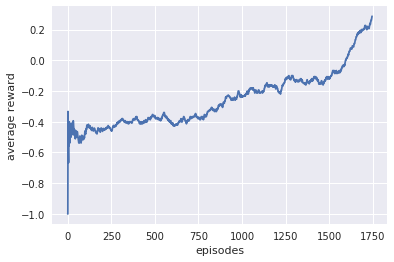

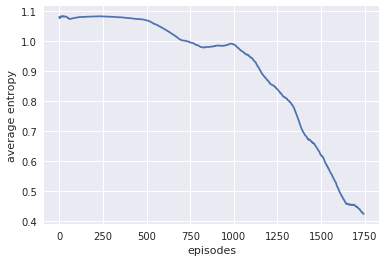

EPISODE:   1745 / TIMESTEP:    17450 / REWARD: 1.000000 / AVG_REWARD: 0.287 / entropy  0.4226615327701869
EPISODE:   1746 / TIMESTEP:    17460 / REWARD: -1.000000 / AVG_REWARD: 0.280 / entropy  0.420942048999067
EPISODE:   1747 / TIMESTEP:    17470 / REWARD: 1.000000 / AVG_REWARD: 0.287 / entropy  0.4205126947524992
EPISODE:   1748 / TIMESTEP:    17480 / REWARD: -1.000000 / AVG_REWARD: 0.287 / entropy  0.41999047295104164
EPISODE:   1749 / TIMESTEP:    17490 / REWARD: -1.000000 / AVG_REWARD: 0.287 / entropy  0.41847097689234136
EPISODE:   1750 / TIMESTEP:    17500 / REWARD: -1.000000 / AVG_REWARD: 0.287 / entropy  0.41821249503521596
EPISODE:   1751 / TIMESTEP:    17510 / REWARD: 1.000000 / AVG_REWARD: 0.287 / entropy  0.41739957936194344
EPISODE:   1752 / TIMESTEP:    17520 / REWARD: 1.000000 / AVG_REWARD: 0.287 / entropy  0.41640035905858025
EPISODE:   1753 / TIMESTEP:    17530 / REWARD: 1.000000 / AVG_REWARD: 0.287 / entropy  0.41646918373613584
EPISODE:   1754 / TIMESTEP:    17540 

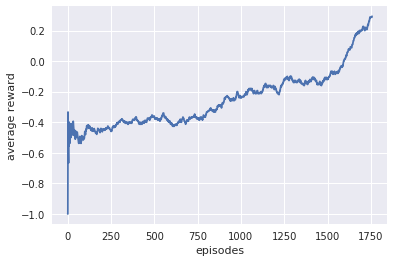

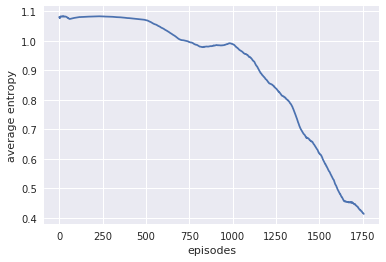

EPISODE:   1757 / TIMESTEP:    17570 / REWARD: 1.000000 / AVG_REWARD: 0.293 / entropy  0.41382640488394024
saved model maxs: 0.3 caught fruits (300):  195.0


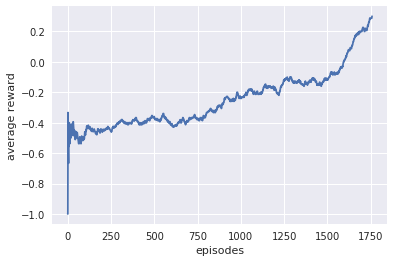

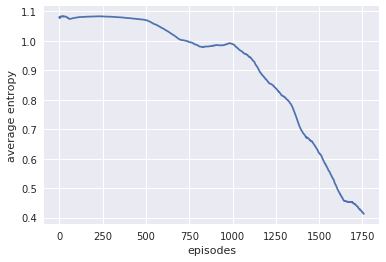

EPISODE:   1758 / TIMESTEP:    17580 / REWARD: 1.000000 / AVG_REWARD: 0.300 / entropy  0.4125989195375048
saved model maxs: 0.30666666666666664 caught fruits (300):  196.0


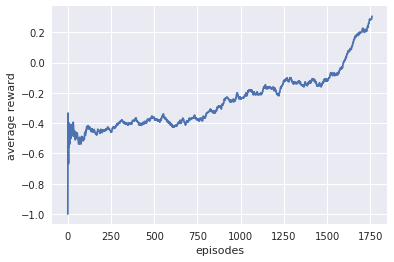

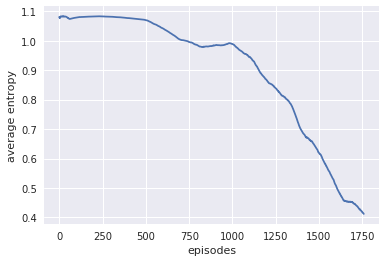

EPISODE:   1759 / TIMESTEP:    17590 / REWARD: 1.000000 / AVG_REWARD: 0.307 / entropy  0.41197796704057876
EPISODE:   1760 / TIMESTEP:    17600 / REWARD: -1.000000 / AVG_REWARD: 0.300 / entropy  0.41007563982728046
EPISODE:   1761 / TIMESTEP:    17610 / REWARD: 1.000000 / AVG_REWARD: 0.300 / entropy  0.40984968225316454
EPISODE:   1762 / TIMESTEP:    17620 / REWARD: 1.000000 / AVG_REWARD: 0.307 / entropy  0.40989202716991446
EPISODE:   1763 / TIMESTEP:    17630 / REWARD: -1.000000 / AVG_REWARD: 0.300 / entropy  0.40899920199773515
EPISODE:   1764 / TIMESTEP:    17640 / REWARD: -1.000000 / AVG_REWARD: 0.300 / entropy  0.4078777445099075
EPISODE:   1765 / TIMESTEP:    17650 / REWARD: -1.000000 / AVG_REWARD: 0.293 / entropy  0.4075563088068048
EPISODE:   1766 / TIMESTEP:    17660 / REWARD: 1.000000 / AVG_REWARD: 0.293 / entropy  0.4064842192119815
EPISODE:   1767 / TIMESTEP:    17670 / REWARD: 1.000000 / AVG_REWARD: 0.293 / entropy  0.4058872221391303
EPISODE:   1768 / TIMESTEP:    17680 

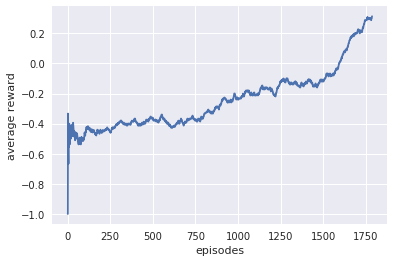

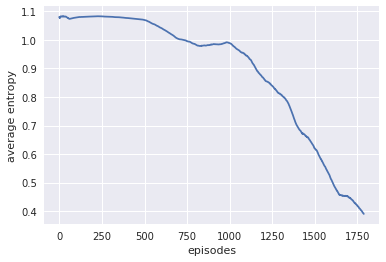

EPISODE:   1787 / TIMESTEP:    17870 / REWARD: 1.000000 / AVG_REWARD: 0.313 / entropy  0.3900096665103747
EPISODE:   1788 / TIMESTEP:    17880 / REWARD: -1.000000 / AVG_REWARD: 0.307 / entropy  0.38965800120753963
EPISODE:   1789 / TIMESTEP:    17890 / REWARD: -1.000000 / AVG_REWARD: 0.307 / entropy  0.3895083066201942
EPISODE:   1790 / TIMESTEP:    17900 / REWARD: -1.000000 / AVG_REWARD: 0.307 / entropy  0.3882924189006358
EPISODE:   1791 / TIMESTEP:    17910 / REWARD: 1.000000 / AVG_REWARD: 0.307 / entropy  0.3877983198854727
EPISODE:   1792 / TIMESTEP:    17920 / REWARD: -1.000000 / AVG_REWARD: 0.300 / entropy  0.38846031308329354
EPISODE:   1793 / TIMESTEP:    17930 / REWARD: 1.000000 / AVG_REWARD: 0.307 / entropy  0.3882433156601878
EPISODE:   1794 / TIMESTEP:    17940 / REWARD: 1.000000 / AVG_REWARD: 0.313 / entropy  0.38710473590237254
saved model maxs: 0.32 caught fruits (300):  198.0


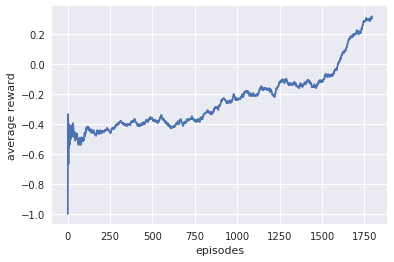

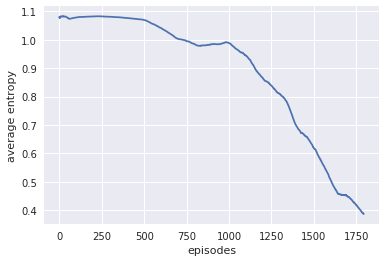

EPISODE:   1795 / TIMESTEP:    17950 / REWARD: 1.000000 / AVG_REWARD: 0.320 / entropy  0.38654404108257345
EPISODE:   1796 / TIMESTEP:    17960 / REWARD: -1.000000 / AVG_REWARD: 0.313 / entropy  0.38632993812828015
EPISODE:   1797 / TIMESTEP:    17970 / REWARD: -1.000000 / AVG_REWARD: 0.307 / entropy  0.38595165921495883
EPISODE:   1798 / TIMESTEP:    17980 / REWARD: 1.000000 / AVG_REWARD: 0.313 / entropy  0.3858392809902283
EPISODE:   1799 / TIMESTEP:    17990 / REWARD: -1.000000 / AVG_REWARD: 0.313 / entropy  0.3852399939593549
EPISODE:   1800 / TIMESTEP:    18000 / REWARD: 1.000000 / AVG_REWARD: 0.313 / entropy  0.38389218118783364
EPISODE:   1801 / TIMESTEP:    18010 / REWARD: 1.000000 / AVG_REWARD: 0.320 / entropy  0.3826867973899331
EPISODE:   1802 / TIMESTEP:    18020 / REWARD: -1.000000 / AVG_REWARD: 0.320 / entropy  0.381812487028246
EPISODE:   1803 / TIMESTEP:    18030 / REWARD: 1.000000 / AVG_REWARD: 0.320 / entropy  0.3817185933159285
EPISODE:   1804 / TIMESTEP:    18040 / 

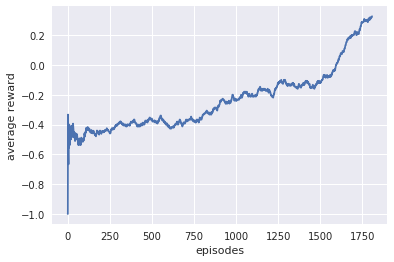

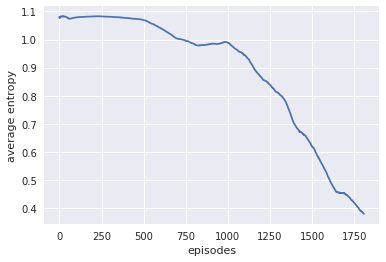

EPISODE:   1807 / TIMESTEP:    18070 / REWARD: 1.000000 / AVG_REWARD: 0.327 / entropy  0.37859916060240245
saved model maxs: 0.3333333333333333 caught fruits (300):  200.0


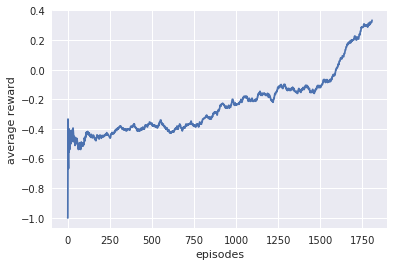

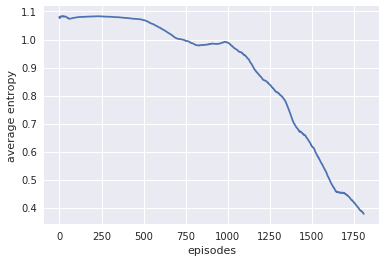

EPISODE:   1808 / TIMESTEP:    18080 / REWARD: 1.000000 / AVG_REWARD: 0.333 / entropy  0.37756719886885814
EPISODE:   1809 / TIMESTEP:    18090 / REWARD: -1.000000 / AVG_REWARD: 0.327 / entropy  0.37840451510321277
EPISODE:   1810 / TIMESTEP:    18100 / REWARD: 1.000000 / AVG_REWARD: 0.333 / entropy  0.3782515954799709
EPISODE:   1811 / TIMESTEP:    18110 / REWARD: -1.000000 / AVG_REWARD: 0.327 / entropy  0.37775955519406124
EPISODE:   1812 / TIMESTEP:    18120 / REWARD: -1.000000 / AVG_REWARD: 0.320 / entropy  0.37826171334082676
EPISODE:   1813 / TIMESTEP:    18130 / REWARD: -1.000000 / AVG_REWARD: 0.320 / entropy  0.37855002408717864
EPISODE:   1814 / TIMESTEP:    18140 / REWARD: -1.000000 / AVG_REWARD: 0.313 / entropy  0.377262010133601
EPISODE:   1815 / TIMESTEP:    18150 / REWARD: 1.000000 / AVG_REWARD: 0.313 / entropy  0.37799573129603503
EPISODE:   1816 / TIMESTEP:    18160 / REWARD: -1.000000 / AVG_REWARD: 0.307 / entropy  0.37761661151570647
EPISODE:   1817 / TIMESTEP:    181

EPISODE:   1885 / TIMESTEP:    18850 / REWARD: -1.000000 / AVG_REWARD: 0.260 / entropy  0.3534662711774689
EPISODE:   1886 / TIMESTEP:    18860 / REWARD: -1.000000 / AVG_REWARD: 0.253 / entropy  0.3530610138497798
EPISODE:   1887 / TIMESTEP:    18870 / REWARD: 1.000000 / AVG_REWARD: 0.253 / entropy  0.35351865767837604
EPISODE:   1888 / TIMESTEP:    18880 / REWARD: -1.000000 / AVG_REWARD: 0.253 / entropy  0.35378669901811344
EPISODE:   1889 / TIMESTEP:    18890 / REWARD: -1.000000 / AVG_REWARD: 0.247 / entropy  0.3545893145017153
EPISODE:   1890 / TIMESTEP:    18900 / REWARD: 1.000000 / AVG_REWARD: 0.247 / entropy  0.35531874464298774
EPISODE:   1891 / TIMESTEP:    18910 / REWARD: 1.000000 / AVG_REWARD: 0.247 / entropy  0.3553765390981506
EPISODE:   1892 / TIMESTEP:    18920 / REWARD: -1.000000 / AVG_REWARD: 0.240 / entropy  0.3547022771624055
EPISODE:   1893 / TIMESTEP:    18930 / REWARD: -1.000000 / AVG_REWARD: 0.233 / entropy  0.35421526215409993
EPISODE:   1894 / TIMESTEP:    18940

EPISODE:   1962 / TIMESTEP:    19620 / REWARD: 1.000000 / AVG_REWARD: 0.220 / entropy  0.34552298933793624
EPISODE:   1963 / TIMESTEP:    19630 / REWARD: -1.000000 / AVG_REWARD: 0.220 / entropy  0.345490729077288
EPISODE:   1964 / TIMESTEP:    19640 / REWARD: 1.000000 / AVG_REWARD: 0.220 / entropy  0.3460644663702179
EPISODE:   1965 / TIMESTEP:    19650 / REWARD: 1.000000 / AVG_REWARD: 0.220 / entropy  0.3460655708097922
EPISODE:   1966 / TIMESTEP:    19660 / REWARD: 1.000000 / AVG_REWARD: 0.227 / entropy  0.34707947781628545
EPISODE:   1967 / TIMESTEP:    19670 / REWARD: 1.000000 / AVG_REWARD: 0.233 / entropy  0.34693598781789964
EPISODE:   1968 / TIMESTEP:    19680 / REWARD: -1.000000 / AVG_REWARD: 0.227 / entropy  0.34667494107632796
EPISODE:   1969 / TIMESTEP:    19690 / REWARD: 1.000000 / AVG_REWARD: 0.227 / entropy  0.3471508934187565
EPISODE:   1970 / TIMESTEP:    19700 / REWARD: -1.000000 / AVG_REWARD: 0.220 / entropy  0.3478286984898322
EPISODE:   1971 / TIMESTEP:    19710 / R

EPISODE:   2039 / TIMESTEP:    20390 / REWARD: -1.000000 / AVG_REWARD: 0.180 / entropy  0.3457260550550375
EPISODE:   2040 / TIMESTEP:    20400 / REWARD: 1.000000 / AVG_REWARD: 0.187 / entropy  0.34553753143060023
EPISODE:   2041 / TIMESTEP:    20410 / REWARD: 1.000000 / AVG_REWARD: 0.187 / entropy  0.34633478694444486
EPISODE:   2042 / TIMESTEP:    20420 / REWARD: -1.000000 / AVG_REWARD: 0.180 / entropy  0.3455083754909208
EPISODE:   2043 / TIMESTEP:    20430 / REWARD: -1.000000 / AVG_REWARD: 0.173 / entropy  0.3446658187378974
EPISODE:   2044 / TIMESTEP:    20440 / REWARD: -1.000000 / AVG_REWARD: 0.167 / entropy  0.34436009995557404
EPISODE:   2045 / TIMESTEP:    20450 / REWARD: -1.000000 / AVG_REWARD: 0.160 / entropy  0.34450548168465805
EPISODE:   2046 / TIMESTEP:    20460 / REWARD: -1.000000 / AVG_REWARD: 0.160 / entropy  0.34473500545485875
EPISODE:   2047 / TIMESTEP:    20470 / REWARD: -1.000000 / AVG_REWARD: 0.153 / entropy  0.3441952240360573
EPISODE:   2048 / TIMESTEP:    204

EPISODE:   2120 / TIMESTEP:    21200 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.3277296924284936
EPISODE:   2121 / TIMESTEP:    21210 / REWARD: -1.000000 / AVG_REWARD: 0.147 / entropy  0.32731877248811847
EPISODE:   2122 / TIMESTEP:    21220 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.32698992923859305
EPISODE:   2123 / TIMESTEP:    21230 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.32584254135834745
EPISODE:   2124 / TIMESTEP:    21240 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.3260896031849121
EPISODE:   2125 / TIMESTEP:    21250 / REWARD: -1.000000 / AVG_REWARD: 0.153 / entropy  0.32520921810814696
EPISODE:   2126 / TIMESTEP:    21260 / REWARD: -1.000000 / AVG_REWARD: 0.153 / entropy  0.32475687015982757
EPISODE:   2127 / TIMESTEP:    21270 / REWARD: -1.000000 / AVG_REWARD: 0.153 / entropy  0.3248212566494045
EPISODE:   2128 / TIMESTEP:    21280 / REWARD: 1.000000 / AVG_REWARD: 0.160 / entropy  0.3250561669853481
EPISODE:   2129 / TIMESTEP:    21290 

EPISODE:   2197 / TIMESTEP:    21970 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.29622772390395835
EPISODE:   2198 / TIMESTEP:    21980 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.2951288230354354
EPISODE:   2199 / TIMESTEP:    21990 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.29520613540509394
EPISODE:   2200 / TIMESTEP:    22000 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.29406273395230526
EPISODE:   2201 / TIMESTEP:    22010 / REWARD: 1.000000 / AVG_REWARD: 0.187 / entropy  0.2946535076296897
EPISODE:   2202 / TIMESTEP:    22020 / REWARD: -1.000000 / AVG_REWARD: 0.180 / entropy  0.29442384503844315
EPISODE:   2203 / TIMESTEP:    22030 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.2938653551086275
EPISODE:   2204 / TIMESTEP:    22040 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.29330902844212553
EPISODE:   2205 / TIMESTEP:    22050 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.2920398510007093
EPISODE:   2206 / TIMESTEP:    22060 / R

EPISODE:   2274 / TIMESTEP:    22740 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.26247168414986743
EPISODE:   2275 / TIMESTEP:    22750 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.26104071156210185
EPISODE:   2276 / TIMESTEP:    22760 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.26021845381571135
EPISODE:   2277 / TIMESTEP:    22770 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.26090580597711743
EPISODE:   2278 / TIMESTEP:    22780 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.2594505677218937
EPISODE:   2279 / TIMESTEP:    22790 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.25908111654344895
EPISODE:   2280 / TIMESTEP:    22800 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.25813639758070667
EPISODE:   2281 / TIMESTEP:    22810 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.25792799498939767
EPISODE:   2282 / TIMESTEP:    22820 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.2567982035801375
EPISODE:   2283 / TIMESTEP:    228

EPISODE:   2354 / TIMESTEP:    23540 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.21879111971606985
EPISODE:   2355 / TIMESTEP:    23550 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.21856741596284943
EPISODE:   2356 / TIMESTEP:    23560 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.21783160792107487
EPISODE:   2357 / TIMESTEP:    23570 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.21800247349634044
EPISODE:   2358 / TIMESTEP:    23580 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.21761570806787517
EPISODE:   2359 / TIMESTEP:    23590 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.21715256941841085
EPISODE:   2360 / TIMESTEP:    23600 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.21704131019896725
EPISODE:   2361 / TIMESTEP:    23610 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.21593156498218719
EPISODE:   2362 / TIMESTEP:    23620 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.2167513986309576
EPISODE:   2363 / TIMESTEP:    236

EPISODE:   2434 / TIMESTEP:    24340 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.19135620298920442
EPISODE:   2435 / TIMESTEP:    24350 / REWARD: 1.000000 / AVG_REWARD: 0.147 / entropy  0.1904969698706797
EPISODE:   2436 / TIMESTEP:    24360 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.18944584101710157
EPISODE:   2437 / TIMESTEP:    24370 / REWARD: 1.000000 / AVG_REWARD: 0.160 / entropy  0.18987947428424376
EPISODE:   2438 / TIMESTEP:    24380 / REWARD: 1.000000 / AVG_REWARD: 0.167 / entropy  0.1898571110808903
EPISODE:   2439 / TIMESTEP:    24390 / REWARD: 1.000000 / AVG_REWARD: 0.173 / entropy  0.1906163870927843
EPISODE:   2440 / TIMESTEP:    24400 / REWARD: 1.000000 / AVG_REWARD: 0.173 / entropy  0.19136099938001416
EPISODE:   2441 / TIMESTEP:    24410 / REWARD: -1.000000 / AVG_REWARD: 0.173 / entropy  0.19015095136999324
EPISODE:   2442 / TIMESTEP:    24420 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.18983731431481254
EPISODE:   2443 / TIMESTEP:    24430 / 

EPISODE:   2513 / TIMESTEP:    25130 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.18262504286774112
EPISODE:   2514 / TIMESTEP:    25140 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.18203310938089595
EPISODE:   2515 / TIMESTEP:    25150 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.1813908723413112
EPISODE:   2516 / TIMESTEP:    25160 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.180743974236959
EPISODE:   2517 / TIMESTEP:    25170 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.18051040778224384
EPISODE:   2518 / TIMESTEP:    25180 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.18021675535733167
EPISODE:   2519 / TIMESTEP:    25190 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.18031944278141493
EPISODE:   2520 / TIMESTEP:    25200 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.1803385155173385
EPISODE:   2521 / TIMESTEP:    25210 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.1801131494474679
EPISODE:   2522 / TIMESTEP:    2522

EPISODE:   2591 / TIMESTEP:    25910 / REWARD: 1.000000 / AVG_REWARD: 0.193 / entropy  0.1685375027730549
EPISODE:   2592 / TIMESTEP:    25920 / REWARD: 1.000000 / AVG_REWARD: 0.200 / entropy  0.16891609557226564
EPISODE:   2593 / TIMESTEP:    25930 / REWARD: 1.000000 / AVG_REWARD: 0.200 / entropy  0.16847718062555403
EPISODE:   2594 / TIMESTEP:    25940 / REWARD: 1.000000 / AVG_REWARD: 0.200 / entropy  0.1685980824580663
EPISODE:   2595 / TIMESTEP:    25950 / REWARD: -1.000000 / AVG_REWARD: 0.200 / entropy  0.16875582839861403
EPISODE:   2596 / TIMESTEP:    25960 / REWARD: 1.000000 / AVG_REWARD: 0.207 / entropy  0.16893886076399617
EPISODE:   2597 / TIMESTEP:    25970 / REWARD: 1.000000 / AVG_REWARD: 0.207 / entropy  0.16818019901060188
EPISODE:   2598 / TIMESTEP:    25980 / REWARD: 1.000000 / AVG_REWARD: 0.207 / entropy  0.16782510031812073
EPISODE:   2599 / TIMESTEP:    25990 / REWARD: -1.000000 / AVG_REWARD: 0.200 / entropy  0.16795387095016917
EPISODE:   2600 / TIMESTEP:    26000 

EPISODE:   2670 / TIMESTEP:    26700 / REWARD: 1.000000 / AVG_REWARD: 0.187 / entropy  0.16205293882023467
EPISODE:   2671 / TIMESTEP:    26710 / REWARD: -1.000000 / AVG_REWARD: 0.180 / entropy  0.16221656925120073
EPISODE:   2672 / TIMESTEP:    26720 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.16232299851376172
EPISODE:   2673 / TIMESTEP:    26730 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.16194400199667075
EPISODE:   2674 / TIMESTEP:    26740 / REWARD: -1.000000 / AVG_REWARD: 0.173 / entropy  0.1613806284405042
EPISODE:   2675 / TIMESTEP:    26750 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.16175357170616095
EPISODE:   2676 / TIMESTEP:    26760 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.16167505110852962
EPISODE:   2677 / TIMESTEP:    26770 / REWARD: -1.000000 / AVG_REWARD: 0.180 / entropy  0.1623429008322967
EPISODE:   2678 / TIMESTEP:    26780 / REWARD: -1.000000 / AVG_REWARD: 0.173 / entropy  0.16217863474737224
EPISODE:   2679 / TIMESTEP:    2679

EPISODE:   2748 / TIMESTEP:    27480 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.15397652839923331
EPISODE:   2749 / TIMESTEP:    27490 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.15393430271988512
EPISODE:   2750 / TIMESTEP:    27500 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.15383827866943883
EPISODE:   2751 / TIMESTEP:    27510 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.15412132515986537
EPISODE:   2752 / TIMESTEP:    27520 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.15400442408728243
EPISODE:   2753 / TIMESTEP:    27530 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.15442359469626793
EPISODE:   2754 / TIMESTEP:    27540 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.15439112072080038
EPISODE:   2755 / TIMESTEP:    27550 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.15424265901444179
EPISODE:   2756 / TIMESTEP:    27560 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.1535306988779653
EPISODE:   2757 / TIMESTEP:    2757

EPISODE:   2828 / TIMESTEP:    28280 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.1434337579538994
EPISODE:   2829 / TIMESTEP:    28290 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.1432840048635215
EPISODE:   2830 / TIMESTEP:    28300 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.14394476510867377
EPISODE:   2831 / TIMESTEP:    28310 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.14382311284533258
EPISODE:   2832 / TIMESTEP:    28320 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.144402976445593
EPISODE:   2833 / TIMESTEP:    28330 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.14455963236855193
EPISODE:   2834 / TIMESTEP:    28340 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.14454998394394417
EPISODE:   2835 / TIMESTEP:    28350 / REWARD: -1.000000 / AVG_REWARD: 0.127 / entropy  0.14396342094114314
EPISODE:   2836 / TIMESTEP:    28360 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.143569899731512
EPISODE:   2837 / TIMESTEP:    28370 

EPISODE:   2907 / TIMESTEP:    29070 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.1436052733779939
EPISODE:   2908 / TIMESTEP:    29080 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.14461255421782307
EPISODE:   2909 / TIMESTEP:    29090 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.14554541914161206
EPISODE:   2910 / TIMESTEP:    29100 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.145254986028746
EPISODE:   2911 / TIMESTEP:    29110 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.1452002971659581
EPISODE:   2912 / TIMESTEP:    29120 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.1452370116234218
EPISODE:   2913 / TIMESTEP:    29130 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.14511288722901117
EPISODE:   2914 / TIMESTEP:    29140 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.1453902236102382
EPISODE:   2915 / TIMESTEP:    29150 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.14468055480720945
EPISODE:   2916 / TIMESTEP:    29160 /

EPISODE:   2986 / TIMESTEP:    29860 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.15446827765455695
EPISODE:   2987 / TIMESTEP:    29870 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.1550132889835947
EPISODE:   2988 / TIMESTEP:    29880 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.1557526983941231
EPISODE:   2989 / TIMESTEP:    29890 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.1554429542945541
EPISODE:   2990 / TIMESTEP:    29900 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.15562450803993771
EPISODE:   2991 / TIMESTEP:    29910 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.1556166153335774
EPISODE:   2992 / TIMESTEP:    29920 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.15593347026786095
EPISODE:   2993 / TIMESTEP:    29930 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.15638500246763282
EPISODE:   2994 / TIMESTEP:    29940 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.15621272363122882
EPISODE:   2995 / TIMESTEP:    29950

EPISODE:   3064 / TIMESTEP:    30640 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.16315137482952666
EPISODE:   3065 / TIMESTEP:    30650 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.1631140657457817
EPISODE:   3066 / TIMESTEP:    30660 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.16337433642594246
EPISODE:   3067 / TIMESTEP:    30670 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.16367509600081406
EPISODE:   3068 / TIMESTEP:    30680 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.1637108966600654
EPISODE:   3069 / TIMESTEP:    30690 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.16445012478876245
EPISODE:   3070 / TIMESTEP:    30700 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.1655740835316121
EPISODE:   3071 / TIMESTEP:    30710 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.16624129879229563
EPISODE:   3072 / TIMESTEP:    30720 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.1647302217238535
EPISODE:   3073 / TIMESTEP:    3073

EPISODE:   3142 / TIMESTEP:    31420 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.1766774785517238
EPISODE:   3143 / TIMESTEP:    31430 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.1761772723742905
EPISODE:   3144 / TIMESTEP:    31440 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.1765517349960599
EPISODE:   3145 / TIMESTEP:    31450 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.17641017897293784
EPISODE:   3146 / TIMESTEP:    31460 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.1768967469555914
EPISODE:   3147 / TIMESTEP:    31470 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.17743207342321143
EPISODE:   3148 / TIMESTEP:    31480 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.17777770770773985
EPISODE:   3149 / TIMESTEP:    31490 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.1776300500347962
EPISODE:   3150 / TIMESTEP:    31500 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.17755395538268404
EPISODE:   3151 / TIMESTEP:    31510 / 

EPISODE:   3222 / TIMESTEP:    32220 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.17647589760155488
EPISODE:   3223 / TIMESTEP:    32230 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.176755709160373
EPISODE:   3224 / TIMESTEP:    32240 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.17728364903072294
EPISODE:   3225 / TIMESTEP:    32250 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.1774558054794404
EPISODE:   3226 / TIMESTEP:    32260 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.17674556468240418
EPISODE:   3227 / TIMESTEP:    32270 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.1772261506885378
EPISODE:   3228 / TIMESTEP:    32280 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.17729406095832018
EPISODE:   3229 / TIMESTEP:    32290 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.17793258700164016
EPISODE:   3230 / TIMESTEP:    32300 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.17772244502572465
EPISODE:   3231 / TIMESTEP:    32310

EPISODE:   3303 / TIMESTEP:    33030 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.17117320295209906
EPISODE:   3304 / TIMESTEP:    33040 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.17086954682923197
EPISODE:   3305 / TIMESTEP:    33050 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.17042857308767553
EPISODE:   3306 / TIMESTEP:    33060 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.17046300182146026
EPISODE:   3307 / TIMESTEP:    33070 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.1694094904880391
EPISODE:   3308 / TIMESTEP:    33080 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.16885669115210813
EPISODE:   3309 / TIMESTEP:    33090 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.16973037832998739
EPISODE:   3310 / TIMESTEP:    33100 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.1695275069889619
EPISODE:   3311 / TIMESTEP:    33110 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.17041698285883047
EPISODE:   3312 / TIMESTEP:    3312

EPISODE:   3382 / TIMESTEP:    33820 / REWARD: -1.000000 / AVG_REWARD: 0.160 / entropy  0.17209442625284013
EPISODE:   3383 / TIMESTEP:    33830 / REWARD: -1.000000 / AVG_REWARD: 0.160 / entropy  0.17294425552895082
EPISODE:   3384 / TIMESTEP:    33840 / REWARD: 1.000000 / AVG_REWARD: 0.167 / entropy  0.17300824577779064
EPISODE:   3385 / TIMESTEP:    33850 / REWARD: 1.000000 / AVG_REWARD: 0.167 / entropy  0.17262990199858502
EPISODE:   3386 / TIMESTEP:    33860 / REWARD: -1.000000 / AVG_REWARD: 0.167 / entropy  0.17265681482422626
EPISODE:   3387 / TIMESTEP:    33870 / REWARD: 1.000000 / AVG_REWARD: 0.173 / entropy  0.17231550369888282
EPISODE:   3388 / TIMESTEP:    33880 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.17339865370863897
EPISODE:   3389 / TIMESTEP:    33890 / REWARD: 1.000000 / AVG_REWARD: 0.180 / entropy  0.17312950977472577
EPISODE:   3390 / TIMESTEP:    33900 / REWARD: -1.000000 / AVG_REWARD: 0.173 / entropy  0.1718883622836667
EPISODE:   3391 / TIMESTEP:    339

EPISODE:   3462 / TIMESTEP:    34620 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.16484556038623446
EPISODE:   3463 / TIMESTEP:    34630 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.1647416476899835
EPISODE:   3464 / TIMESTEP:    34640 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.16472604517562878
EPISODE:   3465 / TIMESTEP:    34650 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.16449586125139093
EPISODE:   3466 / TIMESTEP:    34660 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.16456631344593106
EPISODE:   3467 / TIMESTEP:    34670 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.1641737604569695
EPISODE:   3468 / TIMESTEP:    34680 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.16389676476810294
EPISODE:   3469 / TIMESTEP:    34690 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.1640396296849172
EPISODE:   3470 / TIMESTEP:    34700 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.16374734789440146
EPISODE:   3471 / TIMESTEP:    34710 /

EPISODE:   3542 / TIMESTEP:    35420 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.15078691145120468
EPISODE:   3543 / TIMESTEP:    35430 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.15124252086017936
EPISODE:   3544 / TIMESTEP:    35440 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.1504105195823043
EPISODE:   3545 / TIMESTEP:    35450 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.15049615417049708
EPISODE:   3546 / TIMESTEP:    35460 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.15034788485059025
EPISODE:   3547 / TIMESTEP:    35470 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.15028730156636205
EPISODE:   3548 / TIMESTEP:    35480 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.14955176881213614
EPISODE:   3549 / TIMESTEP:    35490 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.14975130957642788
EPISODE:   3550 / TIMESTEP:    35500 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.14968675662604827
EPISODE:   3551 / TIMESTEP:    35

EPISODE:   3622 / TIMESTEP:    36220 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.15043894016364867
EPISODE:   3623 / TIMESTEP:    36230 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.1506217994419812
EPISODE:   3624 / TIMESTEP:    36240 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.15104225821259915
EPISODE:   3625 / TIMESTEP:    36250 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.1508784983365048
EPISODE:   3626 / TIMESTEP:    36260 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.15031277962828662
EPISODE:   3627 / TIMESTEP:    36270 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.15005281435960774
EPISODE:   3628 / TIMESTEP:    36280 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.14969734141457727
EPISODE:   3629 / TIMESTEP:    36290 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.14930770325065643
EPISODE:   3630 / TIMESTEP:    36300 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.14949123126457345
EPISODE:   3631 / TIMESTEP:    

EPISODE:   3701 / TIMESTEP:    37010 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.14590429225582235
EPISODE:   3702 / TIMESTEP:    37020 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.14636349157681994
EPISODE:   3703 / TIMESTEP:    37030 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.14677613229167238
EPISODE:   3704 / TIMESTEP:    37040 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.14750697475637936
EPISODE:   3705 / TIMESTEP:    37050 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.1472772410827727
EPISODE:   3706 / TIMESTEP:    37060 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.14756816460631686
EPISODE:   3707 / TIMESTEP:    37070 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.14762424775866884
EPISODE:   3708 / TIMESTEP:    37080 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.14730106439255838
EPISODE:   3709 / TIMESTEP:    37090 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.1469736570040341
EPISODE:   3710 / TIMESTEP:    37100 

EPISODE:   3779 / TIMESTEP:    37790 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.14295296785375924
EPISODE:   3780 / TIMESTEP:    37800 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.14307739275185938
EPISODE:   3781 / TIMESTEP:    37810 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.14315284537347167
EPISODE:   3782 / TIMESTEP:    37820 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.1439652593245174
EPISODE:   3783 / TIMESTEP:    37830 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.1437651873995822
EPISODE:   3784 / TIMESTEP:    37840 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.1439998593693013
EPISODE:   3785 / TIMESTEP:    37850 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.14441072654591927
EPISODE:   3786 / TIMESTEP:    37860 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.14480406231735793
EPISODE:   3787 / TIMESTEP:    37870 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.14514920005892334
EPISODE:   3788 / TIMESTEP:    37880 

EPISODE:   3859 / TIMESTEP:    38590 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.14293552250460076
EPISODE:   3860 / TIMESTEP:    38600 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.1428368816827525
EPISODE:   3861 / TIMESTEP:    38610 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.14321127494987834
EPISODE:   3862 / TIMESTEP:    38620 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.143573621647445
EPISODE:   3863 / TIMESTEP:    38630 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.14336209100099342
EPISODE:   3864 / TIMESTEP:    38640 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.14328151464087366
EPISODE:   3865 / TIMESTEP:    38650 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.14303158339441763
EPISODE:   3866 / TIMESTEP:    38660 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.14293209686272784
EPISODE:   3867 / TIMESTEP:    38670 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.14305764101819712
EPISODE:   3868 / TIMESTEP:    38680

EPISODE:   3939 / TIMESTEP:    39390 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.1442206012534778
EPISODE:   3940 / TIMESTEP:    39400 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.14476923731820465
EPISODE:   3941 / TIMESTEP:    39410 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.14465313617218437
EPISODE:   3942 / TIMESTEP:    39420 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.14419907325771314
EPISODE:   3943 / TIMESTEP:    39430 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.14442662764500538
EPISODE:   3944 / TIMESTEP:    39440 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.14472254897317252
EPISODE:   3945 / TIMESTEP:    39450 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.14501037070031117
EPISODE:   3946 / TIMESTEP:    39460 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.14489697988486583
EPISODE:   3947 / TIMESTEP:    39470 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.14426866887158546
EPISODE:   3948 / TIMESTEP:    3948

EPISODE:   4020 / TIMESTEP:    40200 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.12999800101431797
EPISODE:   4021 / TIMESTEP:    40210 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.13024026431286007
EPISODE:   4022 / TIMESTEP:    40220 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.13071000494473486
EPISODE:   4023 / TIMESTEP:    40230 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.1306160103349453
EPISODE:   4024 / TIMESTEP:    40240 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.12949327861278376
EPISODE:   4025 / TIMESTEP:    40250 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.1285828654354275
EPISODE:   4026 / TIMESTEP:    40260 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.12863977033268617
EPISODE:   4027 / TIMESTEP:    40270 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.1284912266585474
EPISODE:   4028 / TIMESTEP:    40280 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.12830925202629798
EPISODE:   4029 / TIMESTEP:    4029

EPISODE:   4098 / TIMESTEP:    40980 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.12470445793536006
EPISODE:   4099 / TIMESTEP:    40990 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.12502269428496116
EPISODE:   4100 / TIMESTEP:    41000 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.1249453560176661
EPISODE:   4101 / TIMESTEP:    41010 / REWARD: -1.000000 / AVG_REWARD: 0.127 / entropy  0.124745270369364
EPISODE:   4102 / TIMESTEP:    41020 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.12491332122046345
EPISODE:   4103 / TIMESTEP:    41030 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.12427204411241626
EPISODE:   4104 / TIMESTEP:    41040 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.12436966319634507
EPISODE:   4105 / TIMESTEP:    41050 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.12342770846045382
EPISODE:   4106 / TIMESTEP:    41060 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.12346985557319788
EPISODE:   4107 / TIMESTEP:    410

EPISODE:   4178 / TIMESTEP:    41780 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.12194474706487038
EPISODE:   4179 / TIMESTEP:    41790 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.1213766181470029
EPISODE:   4180 / TIMESTEP:    41800 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.12105653363959097
EPISODE:   4181 / TIMESTEP:    41810 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.12015442092486889
EPISODE:   4182 / TIMESTEP:    41820 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.12023430308807839
EPISODE:   4183 / TIMESTEP:    41830 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.12042723708794602
EPISODE:   4184 / TIMESTEP:    41840 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.121170421391332
EPISODE:   4185 / TIMESTEP:    41850 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.12144452701611068
EPISODE:   4186 / TIMESTEP:    41860 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.12123378970562707
EPISODE:   4187 / TIMESTEP:    41870

EPISODE:   4258 / TIMESTEP:    42580 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.11647696875186883
EPISODE:   4259 / TIMESTEP:    42590 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.11615337182245446
EPISODE:   4260 / TIMESTEP:    42600 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.11627472852961049
EPISODE:   4261 / TIMESTEP:    42610 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.11705490122567366
EPISODE:   4262 / TIMESTEP:    42620 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.11632897138553079
EPISODE:   4263 / TIMESTEP:    42630 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.11635678933455396
EPISODE:   4264 / TIMESTEP:    42640 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.11694162211046548
EPISODE:   4265 / TIMESTEP:    42650 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.11690427675214887
EPISODE:   4266 / TIMESTEP:    42660 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.11654204829840206
EPISODE:   4267 / TIMESTEP:    42

EPISODE:   4338 / TIMESTEP:    43380 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.11759017999437348
EPISODE:   4339 / TIMESTEP:    43390 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.11724311833956032
EPISODE:   4340 / TIMESTEP:    43400 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.11699759244479616
EPISODE:   4341 / TIMESTEP:    43410 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.11696329829920961
EPISODE:   4342 / TIMESTEP:    43420 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.11698759933811585
EPISODE:   4343 / TIMESTEP:    43430 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.11702833251279596
EPISODE:   4344 / TIMESTEP:    43440 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.11711177583085146
EPISODE:   4345 / TIMESTEP:    43450 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.11674223400153239
EPISODE:   4346 / TIMESTEP:    43460 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.11694360078261433
EPISODE:   4347 / TIMESTEP:    43

EPISODE:   4418 / TIMESTEP:    44180 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.1126892819584932
EPISODE:   4419 / TIMESTEP:    44190 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.11261201816179117
EPISODE:   4420 / TIMESTEP:    44200 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.11252178302654911
EPISODE:   4421 / TIMESTEP:    44210 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.11203220106823378
EPISODE:   4422 / TIMESTEP:    44220 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.11204417165767998
EPISODE:   4423 / TIMESTEP:    44230 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.11210343279858939
EPISODE:   4424 / TIMESTEP:    44240 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.11248018970168502
EPISODE:   4425 / TIMESTEP:    44250 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.11257889777131823
EPISODE:   4426 / TIMESTEP:    44260 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.11293370414785149
EPISODE:   4427 / TIMESTEP

EPISODE:   4498 / TIMESTEP:    44980 / REWARD: 1.000000 / AVG_REWARD: -0.093 / entropy  0.10594698408740542
EPISODE:   4499 / TIMESTEP:    44990 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.10591887279450458
EPISODE:   4500 / TIMESTEP:    45000 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.1052708561968073
EPISODE:   4501 / TIMESTEP:    45010 / REWARD: 1.000000 / AVG_REWARD: -0.093 / entropy  0.10537685649290865
EPISODE:   4502 / TIMESTEP:    45020 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.10626257141064983
EPISODE:   4503 / TIMESTEP:    45030 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.1058298445905533
EPISODE:   4504 / TIMESTEP:    45040 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.10590579410098581
EPISODE:   4505 / TIMESTEP:    45050 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.10562346252032749
EPISODE:   4506 / TIMESTEP:    45060 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.10556342566982663
EPISODE:   4507 / TIMESTE

EPISODE:   4578 / TIMESTEP:    45780 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.1092061908928099
EPISODE:   4579 / TIMESTEP:    45790 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.10931194283165564
EPISODE:   4580 / TIMESTEP:    45800 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.10961715228073411
EPISODE:   4581 / TIMESTEP:    45810 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.10988573441879453
EPISODE:   4582 / TIMESTEP:    45820 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.10948063837266594
EPISODE:   4583 / TIMESTEP:    45830 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.10976213872762922
EPISODE:   4584 / TIMESTEP:    45840 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.11038595630261121
EPISODE:   4585 / TIMESTEP:    45850 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.1107236506173228
EPISODE:   4586 / TIMESTEP:    45860 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.11061716693383256
EPISODE:   4587 / TIMESTEP

EPISODE:   4657 / TIMESTEP:    46570 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.1075181968701906
EPISODE:   4658 / TIMESTEP:    46580 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.1070849330517504
EPISODE:   4659 / TIMESTEP:    46590 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.10765410242899127
EPISODE:   4660 / TIMESTEP:    46600 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.10762882574051186
EPISODE:   4661 / TIMESTEP:    46610 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.10734505065304432
EPISODE:   4662 / TIMESTEP:    46620 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.10675598761553408
EPISODE:   4663 / TIMESTEP:    46630 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.10635215865145692
EPISODE:   4664 / TIMESTEP:    46640 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.10668034995196718
EPISODE:   4665 / TIMESTEP:    46650 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.1062645308019509
EPISODE:   4666 / TIMESTEP:

EPISODE:   4737 / TIMESTEP:    47370 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.10833841210438616
EPISODE:   4738 / TIMESTEP:    47380 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.10890975990197854
EPISODE:   4739 / TIMESTEP:    47390 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.10881238723838749
EPISODE:   4740 / TIMESTEP:    47400 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.10908760513941296
EPISODE:   4741 / TIMESTEP:    47410 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.10927199385420695
EPISODE:   4742 / TIMESTEP:    47420 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.10937810532038014
EPISODE:   4743 / TIMESTEP:    47430 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.10930640483081774
EPISODE:   4744 / TIMESTEP:    47440 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.10962969412156949
EPISODE:   4745 / TIMESTEP:    47450 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.10939516780129083
EPISODE:   4746 / TIMESTEP:    47460

EPISODE:   4818 / TIMESTEP:    48180 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.1073290150898964
EPISODE:   4819 / TIMESTEP:    48190 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.10721541735883354
EPISODE:   4820 / TIMESTEP:    48200 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.10670827042951797
EPISODE:   4821 / TIMESTEP:    48210 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.10745340407429414
EPISODE:   4822 / TIMESTEP:    48220 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.10723622834619921
EPISODE:   4823 / TIMESTEP:    48230 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.10725341599320169
EPISODE:   4824 / TIMESTEP:    48240 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.10657598332533427
EPISODE:   4825 / TIMESTEP:    48250 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.1067566486063645
EPISODE:   4826 / TIMESTEP:    48260 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.1066360935049072
EPISODE:   4827 / TIMESTEP:    4

EPISODE:   4895 / TIMESTEP:    48950 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.09841916310898237
EPISODE:   4896 / TIMESTEP:    48960 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.09835157099639989
EPISODE:   4897 / TIMESTEP:    48970 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.09805387217701093
EPISODE:   4898 / TIMESTEP:    48980 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.09790173288187694
EPISODE:   4899 / TIMESTEP:    48990 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.09788147793352803
EPISODE:   4900 / TIMESTEP:    49000 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.09813472443777987
EPISODE:   4901 / TIMESTEP:    49010 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.09845112238916108
EPISODE:   4902 / TIMESTEP:    49020 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.0990541818151952
EPISODE:   4903 / TIMESTEP:    49030 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.09912337570536688
EPISODE:   4904 / TIMESTEP:    49040 

EPISODE:   4974 / TIMESTEP:    49740 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.09894164492303453
EPISODE:   4975 / TIMESTEP:    49750 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.09819047757006784
EPISODE:   4976 / TIMESTEP:    49760 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.09803938744965404
EPISODE:   4977 / TIMESTEP:    49770 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.09778308336178973
EPISODE:   4978 / TIMESTEP:    49780 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.09730848731207982
EPISODE:   4979 / TIMESTEP:    49790 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.09735738230342673
EPISODE:   4980 / TIMESTEP:    49800 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.09727085655373562
EPISODE:   4981 / TIMESTEP:    49810 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.09696315108631968
EPISODE:   4982 / TIMESTEP:    49820 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.09680643300669811
EPISODE:   4983 / TIMESTEP:    4983

EPISODE:   5054 / TIMESTEP:    50540 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.09008755524632277
EPISODE:   5055 / TIMESTEP:    50550 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.09062925463490352
EPISODE:   5056 / TIMESTEP:    50560 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.08990027580558746
EPISODE:   5057 / TIMESTEP:    50570 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.09032526349409557
EPISODE:   5058 / TIMESTEP:    50580 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.09066110001719663
EPISODE:   5059 / TIMESTEP:    50590 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.09022749500561333
EPISODE:   5060 / TIMESTEP:    50600 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.09024968916495124
EPISODE:   5061 / TIMESTEP:    50610 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.08998171037947794
EPISODE:   5062 / TIMESTEP:    50620 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.09011029450212969
EPISODE:   5063 / TIMESTEP:    5063

EPISODE:   5134 / TIMESTEP:    51340 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.08521718838864006
EPISODE:   5135 / TIMESTEP:    51350 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.08523474587200353
EPISODE:   5136 / TIMESTEP:    51360 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.08562074806346665
EPISODE:   5137 / TIMESTEP:    51370 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.08583828299982348
EPISODE:   5138 / TIMESTEP:    51380 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.08651950260078753
EPISODE:   5139 / TIMESTEP:    51390 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.08665024374276467
EPISODE:   5140 / TIMESTEP:    51400 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.0868944488086765
EPISODE:   5141 / TIMESTEP:    51410 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.08683301988141895
EPISODE:   5142 / TIMESTEP:    51420 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.08671746464765816
EPISODE:   5143 / TIMESTEP:    514

EPISODE:   5214 / TIMESTEP:    52140 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.08537531200478729
EPISODE:   5215 / TIMESTEP:    52150 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.08536188713468867
EPISODE:   5216 / TIMESTEP:    52160 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.08474774355234747
EPISODE:   5217 / TIMESTEP:    52170 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.08409520182626469
EPISODE:   5218 / TIMESTEP:    52180 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.08397881652818372
EPISODE:   5219 / TIMESTEP:    52190 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.08371428843223212
EPISODE:   5220 / TIMESTEP:    52200 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.08358531307910076
EPISODE:   5221 / TIMESTEP:    52210 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.08324626166921055
EPISODE:   5222 / TIMESTEP:    52220 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.08313583790028913
EPISODE:   5223 / TIMESTEP:    5

EPISODE:   5294 / TIMESTEP:    52940 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.08225282995600484
EPISODE:   5295 / TIMESTEP:    52950 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.0828425067391124
EPISODE:   5296 / TIMESTEP:    52960 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.08329454607507832
EPISODE:   5297 / TIMESTEP:    52970 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.08361729623123833
EPISODE:   5298 / TIMESTEP:    52980 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.08389692546803737
EPISODE:   5299 / TIMESTEP:    52990 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.08392533072366302
EPISODE:   5300 / TIMESTEP:    53000 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.08381472341925861
EPISODE:   5301 / TIMESTEP:    53010 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.08371888724297588
EPISODE:   5302 / TIMESTEP:    53020 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.08375023947725097
EPISODE:   5303 / TIMESTEP:    5303

EPISODE:   5374 / TIMESTEP:    53740 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.08054178288947252
EPISODE:   5375 / TIMESTEP:    53750 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.08036814452529739
EPISODE:   5376 / TIMESTEP:    53760 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.08050797003413772
EPISODE:   5377 / TIMESTEP:    53770 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.08047437412928107
EPISODE:   5378 / TIMESTEP:    53780 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.08076848257396292
EPISODE:   5379 / TIMESTEP:    53790 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.08119301688208123
EPISODE:   5380 / TIMESTEP:    53800 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.08051137642507716
EPISODE:   5381 / TIMESTEP:    53810 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.08013147732720789
EPISODE:   5382 / TIMESTEP:    53820 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.08033418719145083
EPISODE:   5383 / TIMEST

EPISODE:   5454 / TIMESTEP:    54540 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.07808431514753204
EPISODE:   5455 / TIMESTEP:    54550 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.0779339498525615
EPISODE:   5456 / TIMESTEP:    54560 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.0773785598884294
EPISODE:   5457 / TIMESTEP:    54570 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.07727994291093443
EPISODE:   5458 / TIMESTEP:    54580 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.07791439723511275
EPISODE:   5459 / TIMESTEP:    54590 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.07813640063059905
EPISODE:   5460 / TIMESTEP:    54600 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.07823501749666949
EPISODE:   5461 / TIMESTEP:    54610 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.07821602968209615
EPISODE:   5462 / TIMESTEP:    54620 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.07801933830902714
EPISODE:   5463 / TIMESTEP: 

EPISODE:   5534 / TIMESTEP:    55340 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.07550727973079921
EPISODE:   5535 / TIMESTEP:    55350 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.0760261638828335
EPISODE:   5536 / TIMESTEP:    55360 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.07604106773417287
EPISODE:   5537 / TIMESTEP:    55370 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.07563677905764078
EPISODE:   5538 / TIMESTEP:    55380 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.07612393253691348
EPISODE:   5539 / TIMESTEP:    55390 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.07615141514961321
EPISODE:   5540 / TIMESTEP:    55400 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.07577822669587488
EPISODE:   5541 / TIMESTEP:    55410 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.07573718435671466
EPISODE:   5542 / TIMESTEP:    55420 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.07579670035009402
EPISODE:   5543 / TIMEST

EPISODE:   5614 / TIMESTEP:    56140 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.07440362998301953
EPISODE:   5615 / TIMESTEP:    56150 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.07448148354789874
EPISODE:   5616 / TIMESTEP:    56160 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.07452888172267803
EPISODE:   5617 / TIMESTEP:    56170 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.07487760423556516
EPISODE:   5618 / TIMESTEP:    56180 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.07491235226636359
EPISODE:   5619 / TIMESTEP:    56190 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.0752826154936931
EPISODE:   5620 / TIMESTEP:    56200 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.07499975719200327
EPISODE:   5621 / TIMESTEP:    56210 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.07473361064945487
EPISODE:   5622 / TIMESTEP:    56220 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.07483298338150532
EPISODE:   5623 / TIMESTEP

EPISODE:   5694 / TIMESTEP:    56940 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.07713690611231652
EPISODE:   5695 / TIMESTEP:    56950 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.07672841775611262
EPISODE:   5696 / TIMESTEP:    56960 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.07679882301169177
EPISODE:   5697 / TIMESTEP:    56970 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.0766460404464381
EPISODE:   5698 / TIMESTEP:    56980 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.0768699641077999
EPISODE:   5699 / TIMESTEP:    56990 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.07682737602819545
EPISODE:   5700 / TIMESTEP:    57000 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.07685172237293415
EPISODE:   5701 / TIMESTEP:    57010 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.07686454627322363
EPISODE:   5702 / TIMESTEP:    57020 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.07635849482057375
EPISODE:   5703 / TIMES

EPISODE:   5774 / TIMESTEP:    57740 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.08587602721016928
EPISODE:   5775 / TIMESTEP:    57750 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.08607480857108017
EPISODE:   5776 / TIMESTEP:    57760 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.08638246766336598
EPISODE:   5777 / TIMESTEP:    57770 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.0866164081607241
EPISODE:   5778 / TIMESTEP:    57780 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.08682967074044802
EPISODE:   5779 / TIMESTEP:    57790 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.086305656417072
EPISODE:   5780 / TIMESTEP:    57800 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.08666791048449889
EPISODE:   5781 / TIMESTEP:    57810 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.08712296229295413
EPISODE:   5782 / TIMESTEP:    57820 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.08766064070061182
EPISODE:   5783 / TIMESTEP

EPISODE:   5854 / TIMESTEP:    58540 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.09557540115842644
EPISODE:   5855 / TIMESTEP:    58550 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.09588865103204784
EPISODE:   5856 / TIMESTEP:    58560 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.09568201653887826
EPISODE:   5857 / TIMESTEP:    58570 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.09566924084316637
EPISODE:   5858 / TIMESTEP:    58580 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.09602287668175513
EPISODE:   5859 / TIMESTEP:    58590 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.09537868357624546
EPISODE:   5860 / TIMESTEP:    58600 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.096142785984685
EPISODE:   5861 / TIMESTEP:    58610 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.0960967452808381
EPISODE:   5862 / TIMESTEP:    58620 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.09658140377451872
EPISODE:   5863 / TIMESTEP:  

EPISODE:   5932 / TIMESTEP:    59320 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.09500145699036541
EPISODE:   5933 / TIMESTEP:    59330 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.09465373379776379
EPISODE:   5934 / TIMESTEP:    59340 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.09451766959420849
EPISODE:   5935 / TIMESTEP:    59350 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.09442082895202723
EPISODE:   5936 / TIMESTEP:    59360 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.09462194266224233
EPISODE:   5937 / TIMESTEP:    59370 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.09466510424402744
EPISODE:   5938 / TIMESTEP:    59380 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.09417166094139785
EPISODE:   5939 / TIMESTEP:    59390 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.09459523606623464
EPISODE:   5940 / TIMESTEP:    59400 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.09427374098595784
EPISODE:   5941 / TIME

EPISODE:   6012 / TIMESTEP:    60120 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.08703889433836502
EPISODE:   6013 / TIMESTEP:    60130 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.08674118799192247
EPISODE:   6014 / TIMESTEP:    60140 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.08602870976855996
EPISODE:   6015 / TIMESTEP:    60150 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.08623542023129355
EPISODE:   6016 / TIMESTEP:    60160 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.0859726942964824
EPISODE:   6017 / TIMESTEP:    60170 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.08577338256999804
EPISODE:   6018 / TIMESTEP:    60180 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.08548006717098845
EPISODE:   6019 / TIMESTEP:    60190 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.0863157736349045
EPISODE:   6020 / TIMESTEP:    60200 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.08607814986283444
EPISODE:   6021 / TIMESTEP

EPISODE:   6092 / TIMESTEP:    60920 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.07707168219221233
EPISODE:   6093 / TIMESTEP:    60930 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.07650939446749519
EPISODE:   6094 / TIMESTEP:    60940 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.07687793986189752
EPISODE:   6095 / TIMESTEP:    60950 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.07695432814883235
EPISODE:   6096 / TIMESTEP:    60960 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.07645847212969903
EPISODE:   6097 / TIMESTEP:    60970 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.07659175621674955
EPISODE:   6098 / TIMESTEP:    60980 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.07659787918890514
EPISODE:   6099 / TIMESTEP:    60990 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.07653776614668376
EPISODE:   6100 / TIMESTEP:    61000 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.0768145400231105
EPISODE:   6101 / TIMESTEP

EPISODE:   6172 / TIMESTEP:    61720 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.07312729201696617
EPISODE:   6173 / TIMESTEP:    61730 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.07290494987300078
EPISODE:   6174 / TIMESTEP:    61740 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.07345955130816073
EPISODE:   6175 / TIMESTEP:    61750 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.07407464867945213
EPISODE:   6176 / TIMESTEP:    61760 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.07357827673727597
EPISODE:   6177 / TIMESTEP:    61770 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.07341220528694817
EPISODE:   6178 / TIMESTEP:    61780 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.07295479232091509
EPISODE:   6179 / TIMESTEP:    61790 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.07277750034590312
EPISODE:   6180 / TIMESTEP:    61800 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.07263894689879578
EPISODE:   6181 / TIMEST

EPISODE:   6252 / TIMESTEP:    62520 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.07042114639609234
EPISODE:   6253 / TIMESTEP:    62530 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.06992762586565686
EPISODE:   6254 / TIMESTEP:    62540 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.06965339236776182
EPISODE:   6255 / TIMESTEP:    62550 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.06963262743464985
EPISODE:   6256 / TIMESTEP:    62560 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.06977262517668363
EPISODE:   6257 / TIMESTEP:    62570 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.0698530549838679
EPISODE:   6258 / TIMESTEP:    62580 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.06974883155594208
EPISODE:   6259 / TIMESTEP:    62590 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.06964622094442444
EPISODE:   6260 / TIMESTEP:    62600 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.0694589757143719
EPISODE:   6261 / TIMESTE

EPISODE:   6332 / TIMESTEP:    63320 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.06750690862370942
EPISODE:   6333 / TIMESTEP:    63330 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.06749477717790939
EPISODE:   6334 / TIMESTEP:    63340 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.0670995741299381
EPISODE:   6335 / TIMESTEP:    63350 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.06707502009497601
EPISODE:   6336 / TIMESTEP:    63360 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.06707496532326751
EPISODE:   6337 / TIMESTEP:    63370 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.06708950621442841
EPISODE:   6338 / TIMESTEP:    63380 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.0669171037110709
EPISODE:   6339 / TIMESTEP:    63390 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.06694413135883508
EPISODE:   6340 / TIMESTEP:    63400 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.06685236173693458
EPISODE:   6341 / TIMEST

EPISODE:   6410 / TIMESTEP:    64100 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.06808572482052715
EPISODE:   6411 / TIMESTEP:    64110 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.06772783458037163
EPISODE:   6412 / TIMESTEP:    64120 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.06746542406222399
EPISODE:   6413 / TIMESTEP:    64130 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.06671169961783185
EPISODE:   6414 / TIMESTEP:    64140 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.06635241923691121
EPISODE:   6415 / TIMESTEP:    64150 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.06641851901896961
EPISODE:   6416 / TIMESTEP:    64160 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.06653111894175857
EPISODE:   6417 / TIMESTEP:    64170 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.06651038369254599
EPISODE:   6418 / TIMESTEP:    64180 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.0661253072201327
EPISODE:   6419 / TIMEST

EPISODE:   6490 / TIMESTEP:    64900 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.06416073786293329
EPISODE:   6491 / TIMESTEP:    64910 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.06458447368397786
EPISODE:   6492 / TIMESTEP:    64920 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.06492502234128826
EPISODE:   6493 / TIMESTEP:    64930 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.06434962097246491
EPISODE:   6494 / TIMESTEP:    64940 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.06440709614011499
EPISODE:   6495 / TIMESTEP:    64950 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.06450036362017895
EPISODE:   6496 / TIMESTEP:    64960 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.06449689919797409
EPISODE:   6497 / TIMESTEP:    64970 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.06408799020851129
EPISODE:   6498 / TIMESTEP:    64980 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.06422199788053023
EPISODE:   6499 / TIMESTEP:    6499

EPISODE:   6570 / TIMESTEP:    65700 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.06769889122834083
EPISODE:   6571 / TIMESTEP:    65710 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.06759055955211914
EPISODE:   6572 / TIMESTEP:    65720 / REWARD: -1.000000 / AVG_REWARD: 0.127 / entropy  0.06742830169312489
EPISODE:   6573 / TIMESTEP:    65730 / REWARD: -1.000000 / AVG_REWARD: 0.127 / entropy  0.06760989944248985
EPISODE:   6574 / TIMESTEP:    65740 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.06751136650993429
EPISODE:   6575 / TIMESTEP:    65750 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.06790943339782018
EPISODE:   6576 / TIMESTEP:    65760 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.0678222240700381
EPISODE:   6577 / TIMESTEP:    65770 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.06802764047161357
EPISODE:   6578 / TIMESTEP:    65780 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.06782688662275975
EPISODE:   6579 / TIMESTEP:    6

EPISODE:   6649 / TIMESTEP:    66490 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.06597000030801552
EPISODE:   6650 / TIMESTEP:    66500 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.06603793086254318
EPISODE:   6651 / TIMESTEP:    66510 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.06603763707762593
EPISODE:   6652 / TIMESTEP:    66520 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.06606817505240922
EPISODE:   6653 / TIMESTEP:    66530 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.06580491198753687
EPISODE:   6654 / TIMESTEP:    66540 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.06558075189540238
EPISODE:   6655 / TIMESTEP:    66550 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.06531750425785747
EPISODE:   6656 / TIMESTEP:    66560 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.06532112602549989
EPISODE:   6657 / TIMESTEP:    66570 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.06535182820810043
EPISODE:   6658 / TIMESTEP:    6658

EPISODE:   6728 / TIMESTEP:    67280 / REWARD: -1.000000 / AVG_REWARD: 0.140 / entropy  0.058839451266136905
EPISODE:   6729 / TIMESTEP:    67290 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.058618575617568676
EPISODE:   6730 / TIMESTEP:    67300 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.05921332580166138
EPISODE:   6731 / TIMESTEP:    67310 / REWARD: 1.000000 / AVG_REWARD: 0.147 / entropy  0.05929397021187886
EPISODE:   6732 / TIMESTEP:    67320 / REWARD: 1.000000 / AVG_REWARD: 0.147 / entropy  0.05940350018330192
EPISODE:   6733 / TIMESTEP:    67330 / REWARD: 1.000000 / AVG_REWARD: 0.147 / entropy  0.059047055132644605
EPISODE:   6734 / TIMESTEP:    67340 / REWARD: -1.000000 / AVG_REWARD: 0.140 / entropy  0.05969088434562187
EPISODE:   6735 / TIMESTEP:    67350 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.06016253137441266
EPISODE:   6736 / TIMESTEP:    67360 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.06034872331544475
EPISODE:   6737 / TIMESTEP:    

EPISODE:   6808 / TIMESTEP:    68080 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.05843803217913347
EPISODE:   6809 / TIMESTEP:    68090 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.05796205009661236
EPISODE:   6810 / TIMESTEP:    68100 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.05804912802725788
EPISODE:   6811 / TIMESTEP:    68110 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.058289462090165
EPISODE:   6812 / TIMESTEP:    68120 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.05822374664052703
EPISODE:   6813 / TIMESTEP:    68130 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.0578607367771828
EPISODE:   6814 / TIMESTEP:    68140 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.05809832977826709
EPISODE:   6815 / TIMESTEP:    68150 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.05815263670768154
EPISODE:   6816 / TIMESTEP:    68160 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.057884045126541085
EPISODE:   6817 / TIMESTEP:    6817

EPISODE:   6888 / TIMESTEP:    68880 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.055109336044435554
EPISODE:   6889 / TIMESTEP:    68890 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.054970212470883933
EPISODE:   6890 / TIMESTEP:    68900 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.05562640131900352
EPISODE:   6891 / TIMESTEP:    68910 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.0555896664222612
EPISODE:   6892 / TIMESTEP:    68920 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.05559252202970036
EPISODE:   6893 / TIMESTEP:    68930 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.0555825050212891
EPISODE:   6894 / TIMESTEP:    68940 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.055919808418115766
EPISODE:   6895 / TIMESTEP:    68950 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.05569482172149753
EPISODE:   6896 / TIMESTEP:    68960 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.056231659775660144
EPISODE:   6897 / TIMESTEP:    68

EPISODE:   6968 / TIMESTEP:    69680 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.0529412433597784
EPISODE:   6969 / TIMESTEP:    69690 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.05310629544093505
EPISODE:   6970 / TIMESTEP:    69700 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.053091855929022366
EPISODE:   6971 / TIMESTEP:    69710 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.053136231243205226
EPISODE:   6972 / TIMESTEP:    69720 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.05344295370537213
EPISODE:   6973 / TIMESTEP:    69730 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.053385620679738274
EPISODE:   6974 / TIMESTEP:    69740 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.053288615250067554
EPISODE:   6975 / TIMESTEP:    69750 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.05320856889290824
EPISODE:   6976 / TIMESTEP:    69760 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.05301268440374198
EPISODE:   6977 / TIMESTEP:    

EPISODE:   7048 / TIMESTEP:    70480 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.05120863397860753
EPISODE:   7049 / TIMESTEP:    70490 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.05124226627350598
EPISODE:   7050 / TIMESTEP:    70500 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.05118784713371185
EPISODE:   7051 / TIMESTEP:    70510 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.05114467489723876
EPISODE:   7052 / TIMESTEP:    70520 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.0510006919763159
EPISODE:   7053 / TIMESTEP:    70530 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.05128387992831617
EPISODE:   7054 / TIMESTEP:    70540 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.05172460636310157
EPISODE:   7055 / TIMESTEP:    70550 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.05215111844864622
EPISODE:   7056 / TIMESTEP:    70560 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.05183414993787833
EPISODE:   7057 / TIMEST

EPISODE:   7128 / TIMESTEP:    71280 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.05380846855172906
EPISODE:   7129 / TIMESTEP:    71290 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.053869927588022955
EPISODE:   7130 / TIMESTEP:    71300 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.05341216354486122
EPISODE:   7131 / TIMESTEP:    71310 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.053753390629983855
EPISODE:   7132 / TIMESTEP:    71320 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.05370601415773278
EPISODE:   7133 / TIMESTEP:    71330 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.053687311337183026
EPISODE:   7134 / TIMESTEP:    71340 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.053933548723609316
EPISODE:   7135 / TIMESTEP:    71350 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.05445585010828907
EPISODE:   7136 / TIMESTEP:    71360 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.054476827900510554
EPISODE:   7137 / TIMESTEP: 

EPISODE:   7208 / TIMESTEP:    72080 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.051837240479653726
EPISODE:   7209 / TIMESTEP:    72090 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.05197194155282856
EPISODE:   7210 / TIMESTEP:    72100 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.05208279851559519
EPISODE:   7211 / TIMESTEP:    72110 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.05168038108318126
EPISODE:   7212 / TIMESTEP:    72120 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.05169472727558566
EPISODE:   7213 / TIMESTEP:    72130 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.05235542643208817
EPISODE:   7214 / TIMESTEP:    72140 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.051969887310621445
EPISODE:   7215 / TIMESTEP:    72150 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.05196574379044183
EPISODE:   7216 / TIMESTEP:    72160 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.051804150229865835
EPISODE:   7217 / TIMESTEP:   

EPISODE:   7288 / TIMESTEP:    72880 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.05610816072464189
EPISODE:   7289 / TIMESTEP:    72890 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.05652832396578688
EPISODE:   7290 / TIMESTEP:    72900 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.05634849241458045
EPISODE:   7291 / TIMESTEP:    72910 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.05661517643046262
EPISODE:   7292 / TIMESTEP:    72920 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.056658540444719276
EPISODE:   7293 / TIMESTEP:    72930 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.05733084882353848
EPISODE:   7294 / TIMESTEP:    72940 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.05764848042038421
EPISODE:   7295 / TIMESTEP:    72950 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.057584612567736726
EPISODE:   7296 / TIMESTEP:    72960 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.057557921555838616
EPISODE:   7297 / TIMESTEP:   

EPISODE:   7368 / TIMESTEP:    73680 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.06195452934191386
EPISODE:   7369 / TIMESTEP:    73690 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.06235870257223181
EPISODE:   7370 / TIMESTEP:    73700 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.06250507586064336
EPISODE:   7371 / TIMESTEP:    73710 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.06264495333768065
EPISODE:   7372 / TIMESTEP:    73720 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.0630558254396213
EPISODE:   7373 / TIMESTEP:    73730 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.062431376339347096
EPISODE:   7374 / TIMESTEP:    73740 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.0624422274788991
EPISODE:   7375 / TIMESTEP:    73750 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.06263303654898471
EPISODE:   7376 / TIMESTEP:    73760 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.06254385006380667
EPISODE:   7377 / TIMESTEP:    737

EPISODE:   7448 / TIMESTEP:    74480 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.06142164181010663
EPISODE:   7449 / TIMESTEP:    74490 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.06148923416960815
EPISODE:   7450 / TIMESTEP:    74500 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.061195278203610474
EPISODE:   7451 / TIMESTEP:    74510 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.061173865004905396
EPISODE:   7452 / TIMESTEP:    74520 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.061398251838161076
EPISODE:   7453 / TIMESTEP:    74530 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.06115877006566367
EPISODE:   7454 / TIMESTEP:    74540 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.061188300134766324
EPISODE:   7455 / TIMESTEP:    74550 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.061322318823575014
EPISODE:   7456 / TIMESTEP:    74560 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.061438527203352515
EPISODE:   7457 / TIMEST

EPISODE:   7528 / TIMESTEP:    75280 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.06554295098418798
EPISODE:   7529 / TIMESTEP:    75290 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.06567869399785178
EPISODE:   7530 / TIMESTEP:    75300 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.06573309192942445
EPISODE:   7531 / TIMESTEP:    75310 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.06579104990360216
EPISODE:   7532 / TIMESTEP:    75320 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.0656650691347684
EPISODE:   7533 / TIMESTEP:    75330 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.06630316516157732
EPISODE:   7534 / TIMESTEP:    75340 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.06630909272782731
EPISODE:   7535 / TIMESTEP:    75350 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.06643167665208213
EPISODE:   7536 / TIMESTEP:    75360 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.06640709672243962
EPISODE:   7537 / TIMEST

EPISODE:   7608 / TIMESTEP:    76080 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.06164623050324694
EPISODE:   7609 / TIMESTEP:    76090 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.061570368359833365
EPISODE:   7610 / TIMESTEP:    76100 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.061370556358713774
EPISODE:   7611 / TIMESTEP:    76110 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.061440183071217666
EPISODE:   7612 / TIMESTEP:    76120 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.061677663765838206
EPISODE:   7613 / TIMESTEP:    76130 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.061406159631283826
EPISODE:   7614 / TIMESTEP:    76140 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.06106705542938897
EPISODE:   7615 / TIMESTEP:    76150 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.06102216170251863
EPISODE:   7616 / TIMESTEP:    76160 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.06090185027987346
EPISODE:   7617 / TIMESTEP:

EPISODE:   7688 / TIMESTEP:    76880 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.05200856892217549
EPISODE:   7689 / TIMESTEP:    76890 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.05191170556960807
EPISODE:   7690 / TIMESTEP:    76900 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.051920385263841476
EPISODE:   7691 / TIMESTEP:    76910 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.051742120014339726
EPISODE:   7692 / TIMESTEP:    76920 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.05167861581032883
EPISODE:   7693 / TIMESTEP:    76930 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.051576968661519694
EPISODE:   7694 / TIMESTEP:    76940 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.05151222554877491
EPISODE:   7695 / TIMESTEP:    76950 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.051108423663056485
EPISODE:   7696 / TIMESTEP:    76960 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.050960661548676234
EPISODE:   7697 /

EPISODE:   7768 / TIMESTEP:    77680 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.04754873490741818
EPISODE:   7769 / TIMESTEP:    77690 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.04757486823978008
EPISODE:   7770 / TIMESTEP:    77700 / REWARD: 1.000000 / AVG_REWARD: -0.100 / entropy  0.047538765383032186
EPISODE:   7771 / TIMESTEP:    77710 / REWARD: -1.000000 / AVG_REWARD: -0.107 / entropy  0.047290090775709025
EPISODE:   7772 / TIMESTEP:    77720 / REWARD: 1.000000 / AVG_REWARD: -0.100 / entropy  0.046865165099427744
EPISODE:   7773 / TIMESTEP:    77730 / REWARD: 1.000000 / AVG_REWARD: -0.100 / entropy  0.047137024621046235
EPISODE:   7774 / TIMESTEP:    77740 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.04713321362384838
EPISODE:   7775 / TIMESTEP:    77750 / REWARD: -1.000000 / AVG_REWARD: -0.107 / entropy  0.046922778703992696
EPISODE:   7776 / TIMESTEP:    77760 / REWARD: 1.000000 / AVG_REWARD: -0.100 / entropy  0.04707780682392673
EPISODE:   7777 / 

EPISODE:   7848 / TIMESTEP:    78480 / REWARD: -1.000000 / AVG_REWARD: -0.153 / entropy  0.03995181306797827
EPISODE:   7849 / TIMESTEP:    78490 / REWARD: -1.000000 / AVG_REWARD: -0.160 / entropy  0.03974637734288879
EPISODE:   7850 / TIMESTEP:    78500 / REWARD: -1.000000 / AVG_REWARD: -0.160 / entropy  0.039768657286479915
EPISODE:   7851 / TIMESTEP:    78510 / REWARD: 1.000000 / AVG_REWARD: -0.153 / entropy  0.03949190671971099
EPISODE:   7852 / TIMESTEP:    78520 / REWARD: 1.000000 / AVG_REWARD: -0.153 / entropy  0.039464974019289716
EPISODE:   7853 / TIMESTEP:    78530 / REWARD: -1.000000 / AVG_REWARD: -0.153 / entropy  0.039228523012911964
EPISODE:   7854 / TIMESTEP:    78540 / REWARD: -1.000000 / AVG_REWARD: -0.160 / entropy  0.03882599037483363
EPISODE:   7855 / TIMESTEP:    78550 / REWARD: 1.000000 / AVG_REWARD: -0.153 / entropy  0.03900584380520448
EPISODE:   7856 / TIMESTEP:    78560 / REWARD: 1.000000 / AVG_REWARD: -0.153 / entropy  0.03888424284174219
EPISODE:   7857 / TI

EPISODE:   7928 / TIMESTEP:    79280 / REWARD: -1.000000 / AVG_REWARD: -0.140 / entropy  0.036860503498705635
EPISODE:   7929 / TIMESTEP:    79290 / REWARD: -1.000000 / AVG_REWARD: -0.140 / entropy  0.03699390217124023
EPISODE:   7930 / TIMESTEP:    79300 / REWARD: -1.000000 / AVG_REWARD: -0.140 / entropy  0.037004718516633554
EPISODE:   7931 / TIMESTEP:    79310 / REWARD: -1.000000 / AVG_REWARD: -0.140 / entropy  0.03702956771902906
EPISODE:   7932 / TIMESTEP:    79320 / REWARD: 1.000000 / AVG_REWARD: -0.140 / entropy  0.03726201002734044
EPISODE:   7933 / TIMESTEP:    79330 / REWARD: -1.000000 / AVG_REWARD: -0.140 / entropy  0.03735186863820303
EPISODE:   7934 / TIMESTEP:    79340 / REWARD: 1.000000 / AVG_REWARD: -0.133 / entropy  0.03757042849797035
EPISODE:   7935 / TIMESTEP:    79350 / REWARD: 1.000000 / AVG_REWARD: -0.127 / entropy  0.03746656498912234
EPISODE:   7936 / TIMESTEP:    79360 / REWARD: -1.000000 / AVG_REWARD: -0.133 / entropy  0.03701404795513235
EPISODE:   7937 / TI

EPISODE:   8008 / TIMESTEP:    80080 / REWARD: 1.000000 / AVG_REWARD: -0.093 / entropy  0.03832177325747039
EPISODE:   8009 / TIMESTEP:    80090 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.0387120585281607
EPISODE:   8010 / TIMESTEP:    80100 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.03896804459816578
EPISODE:   8011 / TIMESTEP:    80110 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.03892896173853722
EPISODE:   8012 / TIMESTEP:    80120 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.03878915904992919
EPISODE:   8013 / TIMESTEP:    80130 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.03911409640846073
EPISODE:   8014 / TIMESTEP:    80140 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.038866195383545195
EPISODE:   8015 / TIMESTEP:    80150 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.03906184418021034
EPISODE:   8016 / TIMESTEP:    80160 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.03885180539175737
EPISODE:   8017 / TIMESTE

EPISODE:   8088 / TIMESTEP:    80880 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.040378231257707224
EPISODE:   8089 / TIMESTEP:    80890 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.040453728376330614
EPISODE:   8090 / TIMESTEP:    80900 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.04071343340522518
EPISODE:   8091 / TIMESTEP:    80910 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.040557619279230975
EPISODE:   8092 / TIMESTEP:    80920 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.04016685309297204
EPISODE:   8093 / TIMESTEP:    80930 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.04029888233350802
EPISODE:   8094 / TIMESTEP:    80940 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.04034145923876487
EPISODE:   8095 / TIMESTEP:    80950 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.04079925637193171
EPISODE:   8096 / TIMESTEP:    80960 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.0407790819105301
EPISODE:   8097 / TIMESTEP:    

EPISODE:   8168 / TIMESTEP:    81680 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.048932938625226886
EPISODE:   8169 / TIMESTEP:    81690 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.04917133151180124
EPISODE:   8170 / TIMESTEP:    81700 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.049231748167500484
EPISODE:   8171 / TIMESTEP:    81710 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.04947147505511457
EPISODE:   8172 / TIMESTEP:    81720 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.049772244047724484
EPISODE:   8173 / TIMESTEP:    81730 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.04979827173648818
EPISODE:   8174 / TIMESTEP:    81740 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.0503930482925979
EPISODE:   8175 / TIMESTEP:    81750 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.050616445296077096
EPISODE:   8176 / TIMESTEP:    81760 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.050930299230725805
EPISODE:   8177 / TIMESTEP:  

EPISODE:   8248 / TIMESTEP:    82480 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.06338661071881174
EPISODE:   8249 / TIMESTEP:    82490 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.0633179688718058
EPISODE:   8250 / TIMESTEP:    82500 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.06361233493252139
EPISODE:   8251 / TIMESTEP:    82510 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.06355446787987719
EPISODE:   8252 / TIMESTEP:    82520 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.06395466150332862
EPISODE:   8253 / TIMESTEP:    82530 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.0643870905040257
EPISODE:   8254 / TIMESTEP:    82540 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.06438675044663315
EPISODE:   8255 / TIMESTEP:    82550 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.06434675637443323
EPISODE:   8256 / TIMESTEP:    82560 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.06474214375861896
EPISODE:   8257 / TIMESTEP:    8257

EPISODE:   8328 / TIMESTEP:    83280 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.07461576515590759
EPISODE:   8329 / TIMESTEP:    83290 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.07476828194518892
EPISODE:   8330 / TIMESTEP:    83300 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.07474258805937514
EPISODE:   8331 / TIMESTEP:    83310 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.07472242872007528
EPISODE:   8332 / TIMESTEP:    83320 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.07498362625789366
EPISODE:   8333 / TIMESTEP:    83330 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.07519868120613915
EPISODE:   8334 / TIMESTEP:    83340 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.0752869923955372
EPISODE:   8335 / TIMESTEP:    83350 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.0753115310663668
EPISODE:   8336 / TIMESTEP:    83360 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.07539283254318072
EPISODE:   8337 / TIMESTEP:    833

EPISODE:   8408 / TIMESTEP:    84080 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.07326745501716114
EPISODE:   8409 / TIMESTEP:    84090 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.07299350750225923
EPISODE:   8410 / TIMESTEP:    84100 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.07219477240839964
EPISODE:   8411 / TIMESTEP:    84110 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.07276346823359318
EPISODE:   8412 / TIMESTEP:    84120 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.0727736693521099
EPISODE:   8413 / TIMESTEP:    84130 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.0729649592436566
EPISODE:   8414 / TIMESTEP:    84140 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.07319092953978142
EPISODE:   8415 / TIMESTEP:    84150 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.0730951554579819
EPISODE:   8416 / TIMESTEP:    84160 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.07314521229291895
EPISODE:   8417 / TIMESTEP:    84170 

EPISODE:   8487 / TIMESTEP:    84870 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.0683788959052949
EPISODE:   8488 / TIMESTEP:    84880 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.0679829685797988
EPISODE:   8489 / TIMESTEP:    84890 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.06736486366270715
EPISODE:   8490 / TIMESTEP:    84900 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.06713267771547672
EPISODE:   8491 / TIMESTEP:    84910 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.06654507192594754
EPISODE:   8492 / TIMESTEP:    84920 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.06619503947317848
EPISODE:   8493 / TIMESTEP:    84930 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.06644870576373482
EPISODE:   8494 / TIMESTEP:    84940 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.06642504211625676
EPISODE:   8495 / TIMESTEP:    84950 / REWARD: 1.000000 / AVG_REWARD: 0.147 / entropy  0.0663717629508924
EPISODE:   8496 / TIMESTEP:    84960 / 

EPISODE:   8565 / TIMESTEP:    85650 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.05457417520117031
EPISODE:   8566 / TIMESTEP:    85660 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.05423987778310082
EPISODE:   8567 / TIMESTEP:    85670 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.054267584266653845
EPISODE:   8568 / TIMESTEP:    85680 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.0538141070878726
EPISODE:   8569 / TIMESTEP:    85690 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.0536684069705282
EPISODE:   8570 / TIMESTEP:    85700 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.05362018110959366
EPISODE:   8571 / TIMESTEP:    85710 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.05372922682696128
EPISODE:   8572 / TIMESTEP:    85720 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.05351802015323834
EPISODE:   8573 / TIMESTEP:    85730 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.05312707674485122
EPISODE:   8574 / TIMESTEP:    

EPISODE:   8645 / TIMESTEP:    86450 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.04813404276379955
EPISODE:   8646 / TIMESTEP:    86460 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.047973550353284274
EPISODE:   8647 / TIMESTEP:    86470 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.04795486230648801
EPISODE:   8648 / TIMESTEP:    86480 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.0475752939753918
EPISODE:   8649 / TIMESTEP:    86490 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.047469255563724416
EPISODE:   8650 / TIMESTEP:    86500 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.04754641682137463
EPISODE:   8651 / TIMESTEP:    86510 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.04753426336423697
EPISODE:   8652 / TIMESTEP:    86520 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.04754230580981255
EPISODE:   8653 / TIMESTEP:    86530 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.047657849839505884
EPISODE:   8654 / TIMESTEP:    

EPISODE:   8725 / TIMESTEP:    87250 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.04226584488186696
EPISODE:   8726 / TIMESTEP:    87260 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.042374715524247375
EPISODE:   8727 / TIMESTEP:    87270 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.04213711686989902
EPISODE:   8728 / TIMESTEP:    87280 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.042185841742670545
EPISODE:   8729 / TIMESTEP:    87290 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.042216272431007736
EPISODE:   8730 / TIMESTEP:    87300 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.04204277838828895
EPISODE:   8731 / TIMESTEP:    87310 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.04219660181192785
EPISODE:   8732 / TIMESTEP:    87320 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.04214286201075611
EPISODE:   8733 / TIMESTEP:    87330 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.041986895466522456
EPISODE:   8734 / TIMESTEP: 

EPISODE:   8805 / TIMESTEP:    88050 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.036610729271883524
EPISODE:   8806 / TIMESTEP:    88060 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.036766093756794065
EPISODE:   8807 / TIMESTEP:    88070 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.037689492134905626
EPISODE:   8808 / TIMESTEP:    88080 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.03799742665164669
EPISODE:   8809 / TIMESTEP:    88090 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.03823403398818533
EPISODE:   8810 / TIMESTEP:    88100 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.03846567169341957
EPISODE:   8811 / TIMESTEP:    88110 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.0385787323932777
EPISODE:   8812 / TIMESTEP:    88120 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.03853984327913606
EPISODE:   8813 / TIMESTEP:    88130 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.038493527969764706
EPISODE:   8814 / TIMESTEP:    

EPISODE:   8885 / TIMESTEP:    88850 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.0405647500879245
EPISODE:   8886 / TIMESTEP:    88860 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.04048175328695374
EPISODE:   8887 / TIMESTEP:    88870 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.040412304429368315
EPISODE:   8888 / TIMESTEP:    88880 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.040594517541317425
EPISODE:   8889 / TIMESTEP:    88890 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.04071748912169201
EPISODE:   8890 / TIMESTEP:    88900 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.040477094393797555
EPISODE:   8891 / TIMESTEP:    88910 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.04068140936241406
EPISODE:   8892 / TIMESTEP:    88920 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.040569502737776125
EPISODE:   8893 / TIMESTEP:    88930 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.04055302647953564
EPISODE:   8894 / TIMESTEP:  

EPISODE:   8965 / TIMESTEP:    89650 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.04145897303088319
EPISODE:   8966 / TIMESTEP:    89660 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.041462155935872054
EPISODE:   8967 / TIMESTEP:    89670 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.041434741909845925
EPISODE:   8968 / TIMESTEP:    89680 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.04144257246675875
EPISODE:   8969 / TIMESTEP:    89690 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.041646342457295434
EPISODE:   8970 / TIMESTEP:    89700 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.04164928103992566
EPISODE:   8971 / TIMESTEP:    89710 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.04189898385158943
EPISODE:   8972 / TIMESTEP:    89720 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.04193743351419468
EPISODE:   8973 / TIMESTEP:    89730 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.042207144369670054
EPISODE:   8974 / TIMESTEP:

EPISODE:   9046 / TIMESTEP:    90460 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.04528338697702396
EPISODE:   9047 / TIMESTEP:    90470 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.04537344623464288
EPISODE:   9048 / TIMESTEP:    90480 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.045352062281349415
EPISODE:   9049 / TIMESTEP:    90490 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.04552313551526448
EPISODE:   9050 / TIMESTEP:    90500 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.045713296084525075
EPISODE:   9051 / TIMESTEP:    90510 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.046028369611503465
EPISODE:   9052 / TIMESTEP:    90520 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.04609234531438398
EPISODE:   9053 / TIMESTEP:    90530 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.0460404407318844
EPISODE:   9054 / TIMESTEP:    90540 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.04596841591587993
EPISODE:   9055 / TIMESTEP:    9

EPISODE:   9126 / TIMESTEP:    91260 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.04348009861913833
EPISODE:   9127 / TIMESTEP:    91270 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.043519830895826644
EPISODE:   9128 / TIMESTEP:    91280 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.04348385861688
EPISODE:   9129 / TIMESTEP:    91290 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.04340095611911377
EPISODE:   9130 / TIMESTEP:    91300 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.043370191633063444
EPISODE:   9131 / TIMESTEP:    91310 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.04333772575671018
EPISODE:   9132 / TIMESTEP:    91320 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.04328147944306977
EPISODE:   9133 / TIMESTEP:    91330 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.04308587474144397
EPISODE:   9134 / TIMESTEP:    91340 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.043143578771919606
EPISODE:   9135 / TIMESTEP:    

EPISODE:   9206 / TIMESTEP:    92060 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.03983930856726181
EPISODE:   9207 / TIMESTEP:    92070 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.03992609071979023
EPISODE:   9208 / TIMESTEP:    92080 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.04007214481913617
EPISODE:   9209 / TIMESTEP:    92090 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.039957891088984274
EPISODE:   9210 / TIMESTEP:    92100 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.03977476848698628
EPISODE:   9211 / TIMESTEP:    92110 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.03938356627818764
EPISODE:   9212 / TIMESTEP:    92120 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.03917081003995217
EPISODE:   9213 / TIMESTEP:    92130 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.03905361734260705
EPISODE:   9214 / TIMESTEP:    92140 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.03903878063052889
EPISODE:   9215 / TIMESTEP:    921

EPISODE:   9286 / TIMESTEP:    92860 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.03589557664523392
EPISODE:   9287 / TIMESTEP:    92870 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.035908146462042476
EPISODE:   9288 / TIMESTEP:    92880 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.035936911570018264
EPISODE:   9289 / TIMESTEP:    92890 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.03598875217290976
EPISODE:   9290 / TIMESTEP:    92900 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.03614307740399547
EPISODE:   9291 / TIMESTEP:    92910 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.036297107569125193
EPISODE:   9292 / TIMESTEP:    92920 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.03602782337001976
EPISODE:   9293 / TIMESTEP:    92930 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.03610919468843709
EPISODE:   9294 / TIMESTEP:    92940 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.03609883660753504
EPISODE:   9295 / TIMESTEP:    9

EPISODE:   9366 / TIMESTEP:    93660 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.03761331549849578
EPISODE:   9367 / TIMESTEP:    93670 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.03780113585649153
EPISODE:   9368 / TIMESTEP:    93680 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.03765768477216885
EPISODE:   9369 / TIMESTEP:    93690 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.03784019445827509
EPISODE:   9370 / TIMESTEP:    93700 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.0380026656756247
EPISODE:   9371 / TIMESTEP:    93710 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.03822953612158527
EPISODE:   9372 / TIMESTEP:    93720 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.03822227721618041
EPISODE:   9373 / TIMESTEP:    93730 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.03824281948985099
EPISODE:   9374 / TIMESTEP:    93740 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.03830773626312003
EPISODE:   9375 / TIMESTEP:    9

EPISODE:   9446 / TIMESTEP:    94460 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.043835169461118685
EPISODE:   9447 / TIMESTEP:    94470 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.04399156473443728
EPISODE:   9448 / TIMESTEP:    94480 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.04462403793677532
EPISODE:   9449 / TIMESTEP:    94490 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.044443681284381184
EPISODE:   9450 / TIMESTEP:    94500 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.04454522148299427
EPISODE:   9451 / TIMESTEP:    94510 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.04463334814671196
EPISODE:   9452 / TIMESTEP:    94520 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.044695873262484816
EPISODE:   9453 / TIMESTEP:    94530 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.04482332961838541
EPISODE:   9454 / TIMESTEP:    94540 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.04479072090859643
EPISODE:   9455 / TIMESTEP:    9

EPISODE:   9526 / TIMESTEP:    95260 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.04687792675114584
EPISODE:   9527 / TIMESTEP:    95270 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.04662506153036025
EPISODE:   9528 / TIMESTEP:    95280 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.04657248776980908
EPISODE:   9529 / TIMESTEP:    95290 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.04643317152979516
EPISODE:   9530 / TIMESTEP:    95300 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.0463222634232328
EPISODE:   9531 / TIMESTEP:    95310 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.04624370318822318
EPISODE:   9532 / TIMESTEP:    95320 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.04615584797717525
EPISODE:   9533 / TIMESTEP:    95330 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.046162411639733836
EPISODE:   9534 / TIMESTEP:    95340 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.04610293775041994
EPISODE:   9535 / TIMESTEP:    9

EPISODE:   9606 / TIMESTEP:    96060 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.04839814135177366
EPISODE:   9607 / TIMESTEP:    96070 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.04833094226739203
EPISODE:   9608 / TIMESTEP:    96080 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.04903793038497971
EPISODE:   9609 / TIMESTEP:    96090 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.04926242097326105
EPISODE:   9610 / TIMESTEP:    96100 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.04907491716528811
EPISODE:   9611 / TIMESTEP:    96110 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.04887532184294695
EPISODE:   9612 / TIMESTEP:    96120 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.048622553711778996
EPISODE:   9613 / TIMESTEP:    96130 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.04862659543242779
EPISODE:   9614 / TIMESTEP:    96140 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.04878741600846697
EPISODE:   9615 / TIME

EPISODE:   9686 / TIMESTEP:    96860 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.050036849077350926
EPISODE:   9687 / TIMESTEP:    96870 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.050325983150529274
EPISODE:   9688 / TIMESTEP:    96880 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.05076367304882486
EPISODE:   9689 / TIMESTEP:    96890 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.05077197965034571
EPISODE:   9690 / TIMESTEP:    96900 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.050576531234690754
EPISODE:   9691 / TIMESTEP:    96910 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.050610507138869575
EPISODE:   9692 / TIMESTEP:    96920 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.050574547294190676
EPISODE:   9693 / TIMESTEP:    96930 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.05063125322199891
EPISODE:   9694 / TIMESTEP:    96940 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.050615249800669525
EPISODE:   9695 / TIMES

EPISODE:   9766 / TIMESTEP:    97660 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.04409842139260416
EPISODE:   9767 / TIMESTEP:    97670 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.04406840086128414
EPISODE:   9768 / TIMESTEP:    97680 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.04383665680142264
EPISODE:   9769 / TIMESTEP:    97690 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.04367171302215097
EPISODE:   9770 / TIMESTEP:    97700 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.04366897740804569
EPISODE:   9771 / TIMESTEP:    97710 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.04340398180571489
EPISODE:   9772 / TIMESTEP:    97720 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.04341606544629016
EPISODE:   9773 / TIMESTEP:    97730 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.04333599050002919
EPISODE:   9774 / TIMESTEP:    97740 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.043150708268088395
EPISODE:   9775 / TIM

EPISODE:   9845 / TIMESTEP:    98450 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.045413257280967796
EPISODE:   9846 / TIMESTEP:    98460 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.045480062512666834
EPISODE:   9847 / TIMESTEP:    98470 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.04534183745554429
EPISODE:   9848 / TIMESTEP:    98480 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.04529000881451959
EPISODE:   9849 / TIMESTEP:    98490 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.04536523757649695
EPISODE:   9850 / TIMESTEP:    98500 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.045358243274561415
EPISODE:   9851 / TIMESTEP:    98510 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.04528440639064571
EPISODE:   9852 / TIMESTEP:    98520 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.04525300329065416
EPISODE:   9853 / TIMESTEP:    98530 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.04498782450439347
EPISODE:   9854 / T

EPISODE:   9925 / TIMESTEP:    99250 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.05389467361734007
EPISODE:   9926 / TIMESTEP:    99260 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.05387379266026154
EPISODE:   9927 / TIMESTEP:    99270 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.05387853834144816
EPISODE:   9928 / TIMESTEP:    99280 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.053610887913739615
EPISODE:   9929 / TIMESTEP:    99290 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.05412087329908888
EPISODE:   9930 / TIMESTEP:    99300 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.05393672169623968
EPISODE:   9931 / TIMESTEP:    99310 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.053700863860093144
EPISODE:   9932 / TIMESTEP:    99320 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.053709498575424564
EPISODE:   9933 / TIMESTEP:    99330 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.053384160422793106
EPISODE:   9934 / TIMESTEP:  

EPISODE:  10005 / TIMESTEP:   100050 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.051365609065995785
EPISODE:  10006 / TIMESTEP:   100060 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.051539165670502936
EPISODE:  10007 / TIMESTEP:   100070 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.05198611413705593
EPISODE:  10008 / TIMESTEP:   100080 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.05199422515549206
EPISODE:  10009 / TIMESTEP:   100090 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.05160991547139677
EPISODE:  10010 / TIMESTEP:   100100 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.051115883479409
EPISODE:  10011 / TIMESTEP:   100110 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.05140092891625283
EPISODE:  10012 / TIMESTEP:   100120 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.05132160785645518
EPISODE:  10013 / TIMESTEP:   100130 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.051708167852376155
EPISODE:  10014 / TIMESTEP:   1001

EPISODE:  10085 / TIMESTEP:   100850 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.05494350970022104
EPISODE:  10086 / TIMESTEP:   100860 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.054919421366356004
EPISODE:  10087 / TIMESTEP:   100870 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.05447052896405329
EPISODE:  10088 / TIMESTEP:   100880 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.054672793110809505
EPISODE:  10089 / TIMESTEP:   100890 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.05436724257024519
EPISODE:  10090 / TIMESTEP:   100900 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.0545653156969589
EPISODE:  10091 / TIMESTEP:   100910 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.05456787069005832
EPISODE:  10092 / TIMESTEP:   100920 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.05456817938374685
EPISODE:  10093 / TIMESTEP:   100930 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.054562250254884835
EPISODE:  10094 / TIMESTEP:   1

EPISODE:  10165 / TIMESTEP:   101650 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.05548249965301913
EPISODE:  10166 / TIMESTEP:   101660 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.05543144152349574
EPISODE:  10167 / TIMESTEP:   101670 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.05528032033648658
EPISODE:  10168 / TIMESTEP:   101680 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.054523486875463906
EPISODE:  10169 / TIMESTEP:   101690 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.05445336315544352
EPISODE:  10170 / TIMESTEP:   101700 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.054264962852483244
EPISODE:  10171 / TIMESTEP:   101710 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.05402242109971875
EPISODE:  10172 / TIMESTEP:   101720 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.05372738669656949
EPISODE:  10173 / TIMESTEP:   101730 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.05426884692719239
EPISODE:  10174 / TIMESTEP:   

EPISODE:  10245 / TIMESTEP:   102450 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.0472249733495467
EPISODE:  10246 / TIMESTEP:   102460 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.046672940430165115
EPISODE:  10247 / TIMESTEP:   102470 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.04693161236194844
EPISODE:  10248 / TIMESTEP:   102480 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.046470589982421054
EPISODE:  10249 / TIMESTEP:   102490 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.04668109990457848
EPISODE:  10250 / TIMESTEP:   102500 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.04690072285658436
EPISODE:  10251 / TIMESTEP:   102510 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.046412443574108564
EPISODE:  10252 / TIMESTEP:   102520 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.04616402089391336
EPISODE:  10253 / TIMESTEP:   102530 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.046770429428164347
EPISODE:  10254 / TI

EPISODE:  10325 / TIMESTEP:   103250 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.04630979172181334
EPISODE:  10326 / TIMESTEP:   103260 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.04658925526615031
EPISODE:  10327 / TIMESTEP:   103270 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.04659347981484603
EPISODE:  10328 / TIMESTEP:   103280 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.04675738123738135
EPISODE:  10329 / TIMESTEP:   103290 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.04703094148396579
EPISODE:  10330 / TIMESTEP:   103300 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.04702459116517181
EPISODE:  10331 / TIMESTEP:   103310 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.047088625863458154
EPISODE:  10332 / TIMESTEP:   103320 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.04640595020328167
EPISODE:  10333 / TIMESTEP:   103330 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.046289700300981444
EPISODE:  10334 / TI

EPISODE:  10405 / TIMESTEP:   104050 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.04883492567813552
EPISODE:  10406 / TIMESTEP:   104060 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.049216343637602536
EPISODE:  10407 / TIMESTEP:   104070 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.049590531420063616
EPISODE:  10408 / TIMESTEP:   104080 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.049844016167558285
EPISODE:  10409 / TIMESTEP:   104090 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.049781658271710744
EPISODE:  10410 / TIMESTEP:   104100 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.04988879936953441
EPISODE:  10411 / TIMESTEP:   104110 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.05005611459886306
EPISODE:  10412 / TIMESTEP:   104120 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.049468218939749786
EPISODE:  10413 / TIMESTEP:   104130 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.04994173060298447
EPISODE:  10414 / TIMESTEP:  

EPISODE:  10485 / TIMESTEP:   104850 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.05408313409189744
EPISODE:  10486 / TIMESTEP:   104860 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.054156715892968874
EPISODE:  10487 / TIMESTEP:   104870 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.05415970617492106
EPISODE:  10488 / TIMESTEP:   104880 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.054121222405607565
EPISODE:  10489 / TIMESTEP:   104890 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.054029033357263216
EPISODE:  10490 / TIMESTEP:   104900 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.05399119270247347
EPISODE:  10491 / TIMESTEP:   104910 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.05386675499771326
EPISODE:  10492 / TIMESTEP:   104920 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.053762356247849266
EPISODE:  10493 / TIMESTEP:   104930 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.053873401955798435
EPISODE:  10494 / TIMESTEP:

EPISODE:  10565 / TIMESTEP:   105650 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.051606750884120305
EPISODE:  10566 / TIMESTEP:   105660 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.05168967980472123
EPISODE:  10567 / TIMESTEP:   105670 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.05143830018293086
EPISODE:  10568 / TIMESTEP:   105680 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.05140930279802497
EPISODE:  10569 / TIMESTEP:   105690 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.051391406484887825
EPISODE:  10570 / TIMESTEP:   105700 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.050903975080970415
EPISODE:  10571 / TIMESTEP:   105710 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.05123491939675669
EPISODE:  10572 / TIMESTEP:   105720 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.05132890280974103
EPISODE:  10573 / TIMESTEP:   105730 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.05117105520162299
EPISODE:  10574 / T

EPISODE:  10645 / TIMESTEP:   106450 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.05044593711742459
EPISODE:  10646 / TIMESTEP:   106460 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.050520571083192585
EPISODE:  10647 / TIMESTEP:   106470 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.05025376923432249
EPISODE:  10648 / TIMESTEP:   106480 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.050352032623835856
EPISODE:  10649 / TIMESTEP:   106490 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.05043079668742658
EPISODE:  10650 / TIMESTEP:   106500 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.0500984250126145
EPISODE:  10651 / TIMESTEP:   106510 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.04992345989032672
EPISODE:  10652 / TIMESTEP:   106520 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.049922135054654516
EPISODE:  10653 / TIMESTEP:   106530 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.049910851420440105
EPISODE:  10654 / TIME

EPISODE:  10725 / TIMESTEP:   107250 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.04307857674379502
EPISODE:  10726 / TIMESTEP:   107260 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.042995752210821386
EPISODE:  10727 / TIMESTEP:   107270 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.04289779682571279
EPISODE:  10728 / TIMESTEP:   107280 / REWARD: 1.000000 / AVG_REWARD: -0.100 / entropy  0.042620602078313224
EPISODE:  10729 / TIMESTEP:   107290 / REWARD: 1.000000 / AVG_REWARD: -0.093 / entropy  0.042236200724503126
EPISODE:  10730 / TIMESTEP:   107300 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.04235056805091433
EPISODE:  10731 / TIMESTEP:   107310 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.042481768950790366
EPISODE:  10732 / TIMESTEP:   107320 / REWARD: 1.000000 / AVG_REWARD: -0.093 / entropy  0.04247207425921173
EPISODE:  10733 / TIMESTEP:   107330 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.041802994233019426
EPISODE:  10734 /

EPISODE:  10801 / TIMESTEP:   108010 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.03911506030812233
EPISODE:  10802 / TIMESTEP:   108020 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.03925986029730935
EPISODE:  10803 / TIMESTEP:   108030 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.0392293028183555
EPISODE:  10804 / TIMESTEP:   108040 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.039267204216204964
EPISODE:  10805 / TIMESTEP:   108050 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.039632720150775555
EPISODE:  10806 / TIMESTEP:   108060 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.03958439273686575
EPISODE:  10807 / TIMESTEP:   108070 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.03945659361606911
EPISODE:  10808 / TIMESTEP:   108080 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.03919861749206903
EPISODE:  10809 / TIMESTEP:   108090 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.039625420307544644
EPISODE:  10810 / TIM

EPISODE:  10881 / TIMESTEP:   108810 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.0383139635169313
EPISODE:  10882 / TIMESTEP:   108820 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.038413666316070634
EPISODE:  10883 / TIMESTEP:   108830 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.038403120999687144
EPISODE:  10884 / TIMESTEP:   108840 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.038549036142420307
EPISODE:  10885 / TIMESTEP:   108850 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.038905139509100954
EPISODE:  10886 / TIMESTEP:   108860 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.039232476672310904
EPISODE:  10887 / TIMESTEP:   108870 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.03924624051331196
EPISODE:  10888 / TIMESTEP:   108880 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.03935001545400647
EPISODE:  10889 / TIMESTEP:   108890 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.03959058029489122
EPISODE:  10890 / T

EPISODE:  10961 / TIMESTEP:   109610 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.0378577933820058
EPISODE:  10962 / TIMESTEP:   109620 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.037769968643107554
EPISODE:  10963 / TIMESTEP:   109630 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.03761844181764676
EPISODE:  10964 / TIMESTEP:   109640 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.037692367030687346
EPISODE:  10965 / TIMESTEP:   109650 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.03788860434644313
EPISODE:  10966 / TIMESTEP:   109660 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.0380413958620583
EPISODE:  10967 / TIMESTEP:   109670 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.037935365270323984
EPISODE:  10968 / TIMESTEP:   109680 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.038064852242345994
EPISODE:  10969 / TIMESTEP:   109690 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.03824526006475506
EPISODE:  10970 / TIMESTEP:

EPISODE:  11041 / TIMESTEP:   110410 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.03953575777005657
EPISODE:  11042 / TIMESTEP:   110420 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.03936844206458067
EPISODE:  11043 / TIMESTEP:   110430 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.03935674611201091
EPISODE:  11044 / TIMESTEP:   110440 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.03934426801544237
EPISODE:  11045 / TIMESTEP:   110450 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.03944930758991412
EPISODE:  11046 / TIMESTEP:   110460 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.03914195787846008
EPISODE:  11047 / TIMESTEP:   110470 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.03924714184398445
EPISODE:  11048 / TIMESTEP:   110480 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.03901697915966729
EPISODE:  11049 / TIMESTEP:   110490 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.03908703524689161
EPISODE:  11050 / TIMESTEP:   11

EPISODE:  11119 / TIMESTEP:   111190 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.03928413096783164
EPISODE:  11120 / TIMESTEP:   111200 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.03943698524749331
EPISODE:  11121 / TIMESTEP:   111210 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.03951042142976738
EPISODE:  11122 / TIMESTEP:   111220 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.039380543074491535
EPISODE:  11123 / TIMESTEP:   111230 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.0392176736858198
EPISODE:  11124 / TIMESTEP:   111240 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.03931004147781031
EPISODE:  11125 / TIMESTEP:   111250 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.03971177423621008
EPISODE:  11126 / TIMESTEP:   111260 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.039780218249652465
EPISODE:  11127 / TIMESTEP:   111270 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.03978238331647811
EPISODE:  11128 / TIMEST

EPISODE:  11199 / TIMESTEP:   111990 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.04243543618650664
EPISODE:  11200 / TIMESTEP:   112000 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.042624498301451416
EPISODE:  11201 / TIMESTEP:   112010 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.04279872336554124
EPISODE:  11202 / TIMESTEP:   112020 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.04287431521741572
EPISODE:  11203 / TIMESTEP:   112030 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.042930277256094024
EPISODE:  11204 / TIMESTEP:   112040 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.04306256560967204
EPISODE:  11205 / TIMESTEP:   112050 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.04307093239994574
EPISODE:  11206 / TIMESTEP:   112060 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.042986117771113316
EPISODE:  11207 / TIMESTEP:   112070 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.04315137389151111
EPISODE:  11208 / TIME

EPISODE:  11279 / TIMESTEP:   112790 / REWARD: 1.000000 / AVG_REWARD: -0.100 / entropy  0.04250132547346823
EPISODE:  11280 / TIMESTEP:   112800 / REWARD: 1.000000 / AVG_REWARD: -0.100 / entropy  0.04284778911158278
EPISODE:  11281 / TIMESTEP:   112810 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.042863426498425984
EPISODE:  11282 / TIMESTEP:   112820 / REWARD: 1.000000 / AVG_REWARD: -0.093 / entropy  0.04317348762626612
EPISODE:  11283 / TIMESTEP:   112830 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.04323335947985409
EPISODE:  11284 / TIMESTEP:   112840 / REWARD: 1.000000 / AVG_REWARD: -0.093 / entropy  0.04311699472243372
EPISODE:  11285 / TIMESTEP:   112850 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.043522408807560205
EPISODE:  11286 / TIMESTEP:   112860 / REWARD: -1.000000 / AVG_REWARD: -0.107 / entropy  0.043326126493172294
EPISODE:  11287 / TIMESTEP:   112870 / REWARD: -1.000000 / AVG_REWARD: -0.113 / entropy  0.04308372842781812
EPISODE:  11288 / TI

EPISODE:  11359 / TIMESTEP:   113590 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.043419746998374184
EPISODE:  11360 / TIMESTEP:   113600 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.043568747175498856
EPISODE:  11361 / TIMESTEP:   113610 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.04351401900332496
EPISODE:  11362 / TIMESTEP:   113620 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.0433511281051759
EPISODE:  11363 / TIMESTEP:   113630 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.04308896303225148
EPISODE:  11364 / TIMESTEP:   113640 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.04302229148731114
EPISODE:  11365 / TIMESTEP:   113650 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.04317714321606718
EPISODE:  11366 / TIMESTEP:   113660 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.04304530298890792
EPISODE:  11367 / TIMESTEP:   113670 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.04307169850349921
EPISODE:  11368 / TIME

EPISODE:  11439 / TIMESTEP:   114390 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.04059384831777745
EPISODE:  11440 / TIMESTEP:   114400 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.04043244371859891
EPISODE:  11441 / TIMESTEP:   114410 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.04031160066033311
EPISODE:  11442 / TIMESTEP:   114420 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.04005714953195352
EPISODE:  11443 / TIMESTEP:   114430 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.03992686585750094
EPISODE:  11444 / TIMESTEP:   114440 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.040077295296487174
EPISODE:  11445 / TIMESTEP:   114450 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.03971956441957054
EPISODE:  11446 / TIMESTEP:   114460 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.039791652551513366
EPISODE:  11447 / TIMESTEP:   114470 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.03971172879506431
EPISODE:  11448 / TIMESTEP

EPISODE:  11519 / TIMESTEP:   115190 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.03525861991011007
EPISODE:  11520 / TIMESTEP:   115200 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.035251522576422195
EPISODE:  11521 / TIMESTEP:   115210 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.035225292946625776
EPISODE:  11522 / TIMESTEP:   115220 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.03520798386978455
EPISODE:  11523 / TIMESTEP:   115230 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.03557999764324268
EPISODE:  11524 / TIMESTEP:   115240 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.03545353278750032
EPISODE:  11525 / TIMESTEP:   115250 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.035248808855372536
EPISODE:  11526 / TIMESTEP:   115260 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.03524864320575547
EPISODE:  11527 / TIMESTEP:   115270 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.035134474957577086
EPISODE:  11528 / TIMES

EPISODE:  11599 / TIMESTEP:   115990 / REWARD: 1.000000 / AVG_REWARD: 0.160 / entropy  0.03666878517624815
EPISODE:  11600 / TIMESTEP:   116000 / REWARD: 1.000000 / AVG_REWARD: 0.167 / entropy  0.036817693000818316
EPISODE:  11601 / TIMESTEP:   116010 / REWARD: 1.000000 / AVG_REWARD: 0.167 / entropy  0.0367743996712632
EPISODE:  11602 / TIMESTEP:   116020 / REWARD: 1.000000 / AVG_REWARD: 0.167 / entropy  0.03674896213180479
EPISODE:  11603 / TIMESTEP:   116030 / REWARD: -1.000000 / AVG_REWARD: 0.167 / entropy  0.03697293180313464
EPISODE:  11604 / TIMESTEP:   116040 / REWARD: 1.000000 / AVG_REWARD: 0.173 / entropy  0.03698866269310093
EPISODE:  11605 / TIMESTEP:   116050 / REWARD: -1.000000 / AVG_REWARD: 0.167 / entropy  0.03729593829826155
EPISODE:  11606 / TIMESTEP:   116060 / REWARD: 1.000000 / AVG_REWARD: 0.173 / entropy  0.037389287153199086
EPISODE:  11607 / TIMESTEP:   116070 / REWARD: -1.000000 / AVG_REWARD: 0.167 / entropy  0.0375089343201018
EPISODE:  11608 / TIMESTEP:   1160

EPISODE:  11679 / TIMESTEP:   116790 / REWARD: -1.000000 / AVG_REWARD: 0.147 / entropy  0.0418379971370615
EPISODE:  11680 / TIMESTEP:   116800 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.041569838069091765
EPISODE:  11681 / TIMESTEP:   116810 / REWARD: -1.000000 / AVG_REWARD: 0.147 / entropy  0.041819404816113875
EPISODE:  11682 / TIMESTEP:   116820 / REWARD: -1.000000 / AVG_REWARD: 0.140 / entropy  0.04178032699541442
EPISODE:  11683 / TIMESTEP:   116830 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.04201192985468592
EPISODE:  11684 / TIMESTEP:   116840 / REWARD: -1.000000 / AVG_REWARD: 0.140 / entropy  0.04203475983827427
EPISODE:  11685 / TIMESTEP:   116850 / REWARD: -1.000000 / AVG_REWARD: 0.140 / entropy  0.042152120362320515
EPISODE:  11686 / TIMESTEP:   116860 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.04230430839275067
EPISODE:  11687 / TIMESTEP:   116870 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.04195759051531269
EPISODE:  11688 / TIMESTEP:   

EPISODE:  11759 / TIMESTEP:   117590 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.046522222429914904
EPISODE:  11760 / TIMESTEP:   117600 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.04649677583139334
EPISODE:  11761 / TIMESTEP:   117610 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.046869208813597484
EPISODE:  11762 / TIMESTEP:   117620 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.04726572761880322
EPISODE:  11763 / TIMESTEP:   117630 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.047618263034326286
EPISODE:  11764 / TIMESTEP:   117640 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.047643310327243234
EPISODE:  11765 / TIMESTEP:   117650 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.047444900798107495
EPISODE:  11766 / TIMESTEP:   117660 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.047850759375404554
EPISODE:  11767 / TIMESTEP:   117670 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.04783713124392927
EPISODE:  11768 / TIMESTE

EPISODE:  11839 / TIMESTEP:   118390 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.05419706644920344
EPISODE:  11840 / TIMESTEP:   118400 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.05442558842080191
EPISODE:  11841 / TIMESTEP:   118410 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.05438142727420716
EPISODE:  11842 / TIMESTEP:   118420 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.05455809238483309
EPISODE:  11843 / TIMESTEP:   118430 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.0542468768661218
EPISODE:  11844 / TIMESTEP:   118440 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.05425586458665428
EPISODE:  11845 / TIMESTEP:   118450 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.054189626168707386
EPISODE:  11846 / TIMESTEP:   118460 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.0537031166645289
EPISODE:  11847 / TIMESTEP:   118470 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.05355310658790693
EPISODE:  11848 / TIMESTEP:   1184

EPISODE:  11919 / TIMESTEP:   119190 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.0535277137442527
EPISODE:  11920 / TIMESTEP:   119200 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.053526889228293774
EPISODE:  11921 / TIMESTEP:   119210 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.053521810082152614
EPISODE:  11922 / TIMESTEP:   119220 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.05334116169582353
EPISODE:  11923 / TIMESTEP:   119230 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.05292142793979949
EPISODE:  11924 / TIMESTEP:   119240 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.052203423328402915
EPISODE:  11925 / TIMESTEP:   119250 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.051896271199694435
EPISODE:  11926 / TIMESTEP:   119260 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.05184610136929731
EPISODE:  11927 / TIMESTEP:   119270 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.05216449025012232
EPISODE:  11928 / TIMESTEP:   

EPISODE:  11999 / TIMESTEP:   119990 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.058840500955688456
EPISODE:  12000 / TIMESTEP:   120000 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.05925279932972868
EPISODE:  12001 / TIMESTEP:   120010 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.05947351872665711
EPISODE:  12002 / TIMESTEP:   120020 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.05979622846798907
EPISODE:  12003 / TIMESTEP:   120030 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.060024824619471034
EPISODE:  12004 / TIMESTEP:   120040 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.06010557415337118
EPISODE:  12005 / TIMESTEP:   120050 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.06004448950192831
EPISODE:  12006 / TIMESTEP:   120060 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.05973900085581014
EPISODE:  12007 / TIMESTEP:   120070 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.05974219973014371
EPISODE:  12008 / TIMESTEP:   

EPISODE:  12079 / TIMESTEP:   120790 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.05926754352186284
EPISODE:  12080 / TIMESTEP:   120800 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.059060400420191936
EPISODE:  12081 / TIMESTEP:   120810 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.059173276041460325
EPISODE:  12082 / TIMESTEP:   120820 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.05915838408083346
EPISODE:  12083 / TIMESTEP:   120830 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.05952590195696587
EPISODE:  12084 / TIMESTEP:   120840 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.05953670820601437
EPISODE:  12085 / TIMESTEP:   120850 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.05944453414533694
EPISODE:  12086 / TIMESTEP:   120860 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.05946723073246636
EPISODE:  12087 / TIMESTEP:   120870 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.059250095953398564
EPISODE:  12088 / TIMESTEP:

EPISODE:  12156 / TIMESTEP:   121560 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.060264215130058287
EPISODE:  12157 / TIMESTEP:   121570 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.06092377495092775
EPISODE:  12158 / TIMESTEP:   121580 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.060650794569345266
EPISODE:  12159 / TIMESTEP:   121590 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.06043754030398901
EPISODE:  12160 / TIMESTEP:   121600 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.06041071940973213
EPISODE:  12161 / TIMESTEP:   121610 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.06040035366564593
EPISODE:  12162 / TIMESTEP:   121620 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.06032668986031768
EPISODE:  12163 / TIMESTEP:   121630 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.060202889587145356
EPISODE:  12164 / TIMESTEP:   121640 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.06050232162183628
EPISODE:  12165 / TIMESTEP: 

EPISODE:  12236 / TIMESTEP:   122360 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.05850397666342335
EPISODE:  12237 / TIMESTEP:   122370 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.057677780803753485
EPISODE:  12238 / TIMESTEP:   122380 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.057661396718732855
EPISODE:  12239 / TIMESTEP:   122390 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.05770031432666081
EPISODE:  12240 / TIMESTEP:   122400 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.05757287486195326
EPISODE:  12241 / TIMESTEP:   122410 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.05756326016775935
EPISODE:  12242 / TIMESTEP:   122420 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.05747159532869865
EPISODE:  12243 / TIMESTEP:   122430 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.057858731625391374
EPISODE:  12244 / TIMESTEP:   122440 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.057514622830518954
EPISODE:  12245 / TIMESTEP:  

EPISODE:  12316 / TIMESTEP:   123160 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.05882137999028783
EPISODE:  12317 / TIMESTEP:   123170 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.059135492202488864
EPISODE:  12318 / TIMESTEP:   123180 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.05854090871116111
EPISODE:  12319 / TIMESTEP:   123190 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.058733953902644555
EPISODE:  12320 / TIMESTEP:   123200 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.05936014849067164
EPISODE:  12321 / TIMESTEP:   123210 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.05934391217122749
EPISODE:  12322 / TIMESTEP:   123220 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.05941130245534867
EPISODE:  12323 / TIMESTEP:   123230 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.059389054346124036
EPISODE:  12324 / TIMESTEP:   123240 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.058940386153069825
EPISODE:  12325 / TIMESTEP:   

EPISODE:  12395 / TIMESTEP:   123950 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.06285213470794168
EPISODE:  12396 / TIMESTEP:   123960 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.06279015543893249
EPISODE:  12397 / TIMESTEP:   123970 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.0630699252721154
EPISODE:  12398 / TIMESTEP:   123980 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.06273979872115502
EPISODE:  12399 / TIMESTEP:   123990 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.0630310250392692
EPISODE:  12400 / TIMESTEP:   124000 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.0632651890471105
EPISODE:  12401 / TIMESTEP:   124010 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.06325563040115481
EPISODE:  12402 / TIMESTEP:   124020 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.06325031966688831
EPISODE:  12403 / TIMESTEP:   124030 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.06334972864333607
EPISODE:  12404 / TIMESTEP:   124040 

EPISODE:  12475 / TIMESTEP:   124750 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.06763025134734618
EPISODE:  12476 / TIMESTEP:   124760 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.06743130388482123
EPISODE:  12477 / TIMESTEP:   124770 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.06768896605967958
EPISODE:  12478 / TIMESTEP:   124780 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.06782497284964893
EPISODE:  12479 / TIMESTEP:   124790 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.06764409655635546
EPISODE:  12480 / TIMESTEP:   124800 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.06772272933257206
EPISODE:  12481 / TIMESTEP:   124810 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.06771146040287943
EPISODE:  12482 / TIMESTEP:   124820 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.06772364123298567
EPISODE:  12483 / TIMESTEP:   124830 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.06792536466973471
EPISODE:  12484 / TIMESTEP:   12

EPISODE:  12555 / TIMESTEP:   125550 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.07990937976042635
EPISODE:  12556 / TIMESTEP:   125560 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.0799135469166224
EPISODE:  12557 / TIMESTEP:   125570 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.0800874548659434
EPISODE:  12558 / TIMESTEP:   125580 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.08031459475897222
EPISODE:  12559 / TIMESTEP:   125590 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.0803341919581402
EPISODE:  12560 / TIMESTEP:   125600 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.07977792703864833
EPISODE:  12561 / TIMESTEP:   125610 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.080279420983823
EPISODE:  12562 / TIMESTEP:   125620 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.07958530997065504
EPISODE:  12563 / TIMESTEP:   125630 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.08062961116161804
EPISODE:  12564 / TIMESTEP:   125640

EPISODE:  12635 / TIMESTEP:   126350 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.07908961622098455
EPISODE:  12636 / TIMESTEP:   126360 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.07920784308290346
EPISODE:  12637 / TIMESTEP:   126370 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.078742936742722
EPISODE:  12638 / TIMESTEP:   126380 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.07881251259731513
EPISODE:  12639 / TIMESTEP:   126390 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.07920286178331064
EPISODE:  12640 / TIMESTEP:   126400 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.07876197145495178
EPISODE:  12641 / TIMESTEP:   126410 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.07833967238723703
EPISODE:  12642 / TIMESTEP:   126420 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.07795370981429015
EPISODE:  12643 / TIMESTEP:   126430 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.07814622945004611
EPISODE:  12644 / TIMESTEP

EPISODE:  12714 / TIMESTEP:   127140 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.0792554165579947
EPISODE:  12715 / TIMESTEP:   127150 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.07933861630337809
EPISODE:  12716 / TIMESTEP:   127160 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.07889568623432278
EPISODE:  12717 / TIMESTEP:   127170 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.07900157041122836
EPISODE:  12718 / TIMESTEP:   127180 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.07924029228635943
EPISODE:  12719 / TIMESTEP:   127190 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.07932536848851901
EPISODE:  12720 / TIMESTEP:   127200 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.07883977595412144
EPISODE:  12721 / TIMESTEP:   127210 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.0786936149656569
EPISODE:  12722 / TIMESTEP:   127220 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.07873184925458943
EPISODE:  12723 / TIMESTEP:

EPISODE:  12794 / TIMESTEP:   127940 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.070833665792574
EPISODE:  12795 / TIMESTEP:   127950 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.07067882804570667
EPISODE:  12796 / TIMESTEP:   127960 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.07065948763273552
EPISODE:  12797 / TIMESTEP:   127970 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.07119441163118562
EPISODE:  12798 / TIMESTEP:   127980 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.0703213913889402
EPISODE:  12799 / TIMESTEP:   127990 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.07044715111563371
EPISODE:  12800 / TIMESTEP:   128000 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.07024314532163306
EPISODE:  12801 / TIMESTEP:   128010 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.06996221048290671
EPISODE:  12802 / TIMESTEP:   128020 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.0699114919881333
EPISODE:  12803 / TIMESTEP:   128030 /

EPISODE:  12873 / TIMESTEP:   128730 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.0638612917992443
EPISODE:  12874 / TIMESTEP:   128740 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.06351981005755164
EPISODE:  12875 / TIMESTEP:   128750 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.06323518346054552
EPISODE:  12876 / TIMESTEP:   128760 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.06270052332060369
EPISODE:  12877 / TIMESTEP:   128770 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.0625506216180571
EPISODE:  12878 / TIMESTEP:   128780 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.062072297430927466
EPISODE:  12879 / TIMESTEP:   128790 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.06189355340209968
EPISODE:  12880 / TIMESTEP:   128800 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.0617305351411384
EPISODE:  12881 / TIMESTEP:   128810 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.06166420556208507
EPISODE:  12882 / TIMESTEP:   12882

EPISODE:  12953 / TIMESTEP:   129530 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.06031168802214908
EPISODE:  12954 / TIMESTEP:   129540 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.060281775326810325
EPISODE:  12955 / TIMESTEP:   129550 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.06098636922110801
EPISODE:  12956 / TIMESTEP:   129560 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.06008617385058389
EPISODE:  12957 / TIMESTEP:   129570 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.060309139247506256
EPISODE:  12958 / TIMESTEP:   129580 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.060428127338165896
EPISODE:  12959 / TIMESTEP:   129590 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.060587865667780676
EPISODE:  12960 / TIMESTEP:   129600 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.06089249714604649
EPISODE:  12961 / TIMESTEP:   129610 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.06092604070870972
EPISODE:  12962 / TIMESTEP:   12

EPISODE:  13033 / TIMESTEP:   130330 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.05358200171244036
EPISODE:  13034 / TIMESTEP:   130340 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.05353038724742864
EPISODE:  13035 / TIMESTEP:   130350 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.05353282357337531
EPISODE:  13036 / TIMESTEP:   130360 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.05325842503347704
EPISODE:  13037 / TIMESTEP:   130370 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.05329031037897363
EPISODE:  13038 / TIMESTEP:   130380 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.0533617626268545
EPISODE:  13039 / TIMESTEP:   130390 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.053439697956991536
EPISODE:  13040 / TIMESTEP:   130400 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.05318218173799362
EPISODE:  13041 / TIMESTEP:   130410 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.05319011099840922
EPISODE:  13042 / TIMESTEP

EPISODE:  13113 / TIMESTEP:   131130 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.04608714568464569
EPISODE:  13114 / TIMESTEP:   131140 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.046112339406176775
EPISODE:  13115 / TIMESTEP:   131150 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.045977779598947735
EPISODE:  13116 / TIMESTEP:   131160 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.045978051919478104
EPISODE:  13117 / TIMESTEP:   131170 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.045761541663904934
EPISODE:  13118 / TIMESTEP:   131180 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.045905517573974534
EPISODE:  13119 / TIMESTEP:   131190 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.045641382187668986
EPISODE:  13120 / TIMESTEP:   131200 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.04556078027168975
EPISODE:  13121 / TIMESTEP:   131210 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.04563288337685248
EPISODE:  13122 / TIMESTEP:   

EPISODE:  13192 / TIMESTEP:   131920 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.04049143403600997
EPISODE:  13193 / TIMESTEP:   131930 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.04050929567655224
EPISODE:  13194 / TIMESTEP:   131940 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.04018538299624453
EPISODE:  13195 / TIMESTEP:   131950 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.04005595230105429
EPISODE:  13196 / TIMESTEP:   131960 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.03996105941355411
EPISODE:  13197 / TIMESTEP:   131970 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.039812866960232174
EPISODE:  13198 / TIMESTEP:   131980 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.039594051803114816
EPISODE:  13199 / TIMESTEP:   131990 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.0391145710361533
EPISODE:  13200 / TIMESTEP:   132000 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.039152797801279164
EPISODE:  13201 / TIME

EPISODE:  13270 / TIMESTEP:   132700 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.02966008388258506
EPISODE:  13271 / TIMESTEP:   132710 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.02967236680936119
EPISODE:  13272 / TIMESTEP:   132720 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.029412769417553927
EPISODE:  13273 / TIMESTEP:   132730 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.02970612101500454
EPISODE:  13274 / TIMESTEP:   132740 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.029593794159744106
EPISODE:  13275 / TIMESTEP:   132750 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.02974892016871212
EPISODE:  13276 / TIMESTEP:   132760 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.029740529598930407
EPISODE:  13277 / TIMESTEP:   132770 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.029710561029332828
EPISODE:  13278 / TIMESTEP:   132780 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.029618745462129226
EPISODE:  13279 / TIMESTEP:   

EPISODE:  13349 / TIMESTEP:   133490 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.025334586374592967
EPISODE:  13350 / TIMESTEP:   133500 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.025589114263478357
EPISODE:  13351 / TIMESTEP:   133510 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.025525498696887732
EPISODE:  13352 / TIMESTEP:   133520 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.025507336847370016
EPISODE:  13353 / TIMESTEP:   133530 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.025535292552244484
EPISODE:  13354 / TIMESTEP:   133540 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.025445469122708984
EPISODE:  13355 / TIMESTEP:   133550 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.025206859135945097
EPISODE:  13356 / TIMESTEP:   133560 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.02512256679992276
EPISODE:  13357 / TIMESTEP:   133570 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.025272205270691687
EPISODE:  13358 / TIMEST

EPISODE:  13429 / TIMESTEP:   134290 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.020007469744143577
EPISODE:  13430 / TIMESTEP:   134300 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.02003004409470589
EPISODE:  13431 / TIMESTEP:   134310 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.019686098115035328
EPISODE:  13432 / TIMESTEP:   134320 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.019259573331243878
EPISODE:  13433 / TIMESTEP:   134330 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.019090044467008915
EPISODE:  13434 / TIMESTEP:   134340 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.019360663650116225
EPISODE:  13435 / TIMESTEP:   134350 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.0192400469365269
EPISODE:  13436 / TIMESTEP:   134360 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.019257606554814108
EPISODE:  13437 / TIMESTEP:   134370 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.01887190776044869
EPISODE:  13438 / TIMESTEP:

EPISODE:  13508 / TIMESTEP:   135080 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.017176175181625678
EPISODE:  13509 / TIMESTEP:   135090 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.017181788442826456
EPISODE:  13510 / TIMESTEP:   135100 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.01715546487706999
EPISODE:  13511 / TIMESTEP:   135110 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.017388584680674484
EPISODE:  13512 / TIMESTEP:   135120 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.01742146582867412
EPISODE:  13513 / TIMESTEP:   135130 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.017429037243157513
EPISODE:  13514 / TIMESTEP:   135140 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.017450512081385292
EPISODE:  13515 / TIMESTEP:   135150 / REWARD: -1.000000 / AVG_REWARD: 0.127 / entropy  0.01743609676198061
EPISODE:  13516 / TIMESTEP:   135160 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.01749959734291631
EPISODE:  13517 / TIMESTEP:  

EPISODE:  13588 / TIMESTEP:   135880 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.019576141090743602
EPISODE:  13589 / TIMESTEP:   135890 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.01957044152336167
EPISODE:  13590 / TIMESTEP:   135900 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.019576476620321328
EPISODE:  13591 / TIMESTEP:   135910 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.019467320573009563
EPISODE:  13592 / TIMESTEP:   135920 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.019441854423890743
EPISODE:  13593 / TIMESTEP:   135930 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.01973882442421073
EPISODE:  13594 / TIMESTEP:   135940 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.020064919299809046
EPISODE:  13595 / TIMESTEP:   135950 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.020066147537361457
EPISODE:  13596 / TIMESTEP:   135960 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.02002971616337193
EPISODE:  13597 / TIMESTEP:

EPISODE:  13666 / TIMESTEP:   136660 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.021832484900372134
EPISODE:  13667 / TIMESTEP:   136670 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.021835033450337507
EPISODE:  13668 / TIMESTEP:   136680 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.022184416061808744
EPISODE:  13669 / TIMESTEP:   136690 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.022192431730257076
EPISODE:  13670 / TIMESTEP:   136700 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.022180495233587484
EPISODE:  13671 / TIMESTEP:   136710 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.022244492613011802
EPISODE:  13672 / TIMESTEP:   136720 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.022347844304166083
EPISODE:  13673 / TIMESTEP:   136730 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.0223501497953124
EPISODE:  13674 / TIMESTEP:   136740 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.02216298612948103
EPISODE:  13675 / TIMESTEP: 

EPISODE:  13745 / TIMESTEP:   137450 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.024390082352976544
EPISODE:  13746 / TIMESTEP:   137460 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.024360465504735664
EPISODE:  13747 / TIMESTEP:   137470 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.024409605886611754
EPISODE:  13748 / TIMESTEP:   137480 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.02428027085010291
EPISODE:  13749 / TIMESTEP:   137490 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.024535904135356505
EPISODE:  13750 / TIMESTEP:   137500 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.024717622043875353
EPISODE:  13751 / TIMESTEP:   137510 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.024581542424857883
EPISODE:  13752 / TIMESTEP:   137520 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.024585847123102786
EPISODE:  13753 / TIMESTEP:   137530 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.024565436165622748
EPISODE:  13754 / TIMESTEP:

EPISODE:  13823 / TIMESTEP:   138230 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.02955265684984075
EPISODE:  13824 / TIMESTEP:   138240 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.029374302817734895
EPISODE:  13825 / TIMESTEP:   138250 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.029617472503969774
EPISODE:  13826 / TIMESTEP:   138260 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.029834521421813847
EPISODE:  13827 / TIMESTEP:   138270 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.030246480425204645
EPISODE:  13828 / TIMESTEP:   138280 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.030547641404936907
EPISODE:  13829 / TIMESTEP:   138290 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.03059423527071686
EPISODE:  13830 / TIMESTEP:   138300 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.030637838705512208
EPISODE:  13831 / TIMESTEP:   138310 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.03060476624864666
EPISODE:  13832 / TIMESTEP: 

EPISODE:  13903 / TIMESTEP:   139030 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.028957169705603965
EPISODE:  13904 / TIMESTEP:   139040 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.02893502116073436
EPISODE:  13905 / TIMESTEP:   139050 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.029032221528965507
EPISODE:  13906 / TIMESTEP:   139060 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.02903644104224831
EPISODE:  13907 / TIMESTEP:   139070 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.028671459904648568
EPISODE:  13908 / TIMESTEP:   139080 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.02857826549064226
EPISODE:  13909 / TIMESTEP:   139090 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.028891950158468162
EPISODE:  13910 / TIMESTEP:   139100 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.028860920669950604
EPISODE:  13911 / TIMESTEP:   139110 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.028857471185929136
EPISODE:  13912 / TIMESTEP:  

EPISODE:  13983 / TIMESTEP:   139830 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.028233605071177146
EPISODE:  13984 / TIMESTEP:   139840 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.028268235466437884
EPISODE:  13985 / TIMESTEP:   139850 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.028271826671634692
EPISODE:  13986 / TIMESTEP:   139860 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.028218640626441964
EPISODE:  13987 / TIMESTEP:   139870 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.028627291449672996
EPISODE:  13988 / TIMESTEP:   139880 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.02857423802399578
EPISODE:  13989 / TIMESTEP:   139890 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.0288397584810263
EPISODE:  13990 / TIMESTEP:   139900 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.028945432992573537
EPISODE:  13991 / TIMESTEP:   139910 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.0290928407693721
EPISODE:  13992 / TIMESTEP:   

EPISODE:  14063 / TIMESTEP:   140630 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.027910625716356326
EPISODE:  14064 / TIMESTEP:   140640 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.027677489084350804
EPISODE:  14065 / TIMESTEP:   140650 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.02770118546113611
EPISODE:  14066 / TIMESTEP:   140660 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.027726163385698836
EPISODE:  14067 / TIMESTEP:   140670 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.027591618093505885
EPISODE:  14068 / TIMESTEP:   140680 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.027774161796610564
EPISODE:  14069 / TIMESTEP:   140690 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.02778060946635036
EPISODE:  14070 / TIMESTEP:   140700 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.027752779004906934
EPISODE:  14071 / TIMESTEP:   140710 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.027656368626157123
EPISODE:  14072 / TIMESTEP

EPISODE:  14141 / TIMESTEP:   141410 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.02239906951514389
EPISODE:  14142 / TIMESTEP:   141420 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.022896097407453967
EPISODE:  14143 / TIMESTEP:   141430 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.023143805956671596
EPISODE:  14144 / TIMESTEP:   141440 / REWARD: -1.000000 / AVG_REWARD: 0.127 / entropy  0.02317581148403152
EPISODE:  14145 / TIMESTEP:   141450 / REWARD: -1.000000 / AVG_REWARD: 0.127 / entropy  0.023153654449721364
EPISODE:  14146 / TIMESTEP:   141460 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.02315764128678581
EPISODE:  14147 / TIMESTEP:   141470 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.02313192686082534
EPISODE:  14148 / TIMESTEP:   141480 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.023130899032426763
EPISODE:  14149 / TIMESTEP:   141490 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.022629567417804662
EPISODE:  14150 / TIMESTEP:

EPISODE:  14221 / TIMESTEP:   142210 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.02532833195051307
EPISODE:  14222 / TIMESTEP:   142220 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.025392804899980515
EPISODE:  14223 / TIMESTEP:   142230 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.025737632740322994
EPISODE:  14224 / TIMESTEP:   142240 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.025616921444731055
EPISODE:  14225 / TIMESTEP:   142250 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.025997931107459474
EPISODE:  14226 / TIMESTEP:   142260 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.026056380342345104
EPISODE:  14227 / TIMESTEP:   142270 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.02608488599105107
EPISODE:  14228 / TIMESTEP:   142280 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.026475341782910278
EPISODE:  14229 / TIMESTEP:   142290 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.026560076610744943
EPISODE:  14230 / TIMESTE

EPISODE:  14301 / TIMESTEP:   143010 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.027193804293063492
EPISODE:  14302 / TIMESTEP:   143020 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.027178657710220544
EPISODE:  14303 / TIMESTEP:   143030 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.027227859456629845
EPISODE:  14304 / TIMESTEP:   143040 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.027265023801806166
EPISODE:  14305 / TIMESTEP:   143050 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.0272829316512754
EPISODE:  14306 / TIMESTEP:   143060 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.027337372892485227
EPISODE:  14307 / TIMESTEP:   143070 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.027319683677526185
EPISODE:  14308 / TIMESTEP:   143080 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.02758876176449539
EPISODE:  14309 / TIMESTEP:   143090 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.027541749945841396
EPISODE:  14310 / TIMESTEP

EPISODE:  14379 / TIMESTEP:   143790 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.034515346659462216
EPISODE:  14380 / TIMESTEP:   143800 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.03522805103109498
EPISODE:  14381 / TIMESTEP:   143810 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.03524426961074907
EPISODE:  14382 / TIMESTEP:   143820 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.03527542456592895
EPISODE:  14383 / TIMESTEP:   143830 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.03530366499157205
EPISODE:  14384 / TIMESTEP:   143840 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.03535725257793917
EPISODE:  14385 / TIMESTEP:   143850 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.035624566974452376
EPISODE:  14386 / TIMESTEP:   143860 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.03568193830484645
EPISODE:  14387 / TIMESTEP:   143870 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.03572368359874465
EPISODE:  14388 / TIMESTEP:   1

EPISODE:  14460 / TIMESTEP:   144600 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.0390564830260126
EPISODE:  14461 / TIMESTEP:   144610 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.03895890256016184
EPISODE:  14462 / TIMESTEP:   144620 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.038932441374831914
EPISODE:  14463 / TIMESTEP:   144630 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.03893063523456586
EPISODE:  14464 / TIMESTEP:   144640 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.038937105727405046
EPISODE:  14465 / TIMESTEP:   144650 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.03890991743611199
EPISODE:  14466 / TIMESTEP:   144660 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.03895893809546037
EPISODE:  14467 / TIMESTEP:   144670 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.039030540579992445
EPISODE:  14468 / TIMESTEP:   144680 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.03873831326628294
EPISODE:  14469 / TIMESTEP: 

EPISODE:  14541 / TIMESTEP:   145410 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.03481400532644688
EPISODE:  14542 / TIMESTEP:   145420 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.03483027076422644
EPISODE:  14543 / TIMESTEP:   145430 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.03479495612716559
EPISODE:  14544 / TIMESTEP:   145440 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.03506878092734521
EPISODE:  14545 / TIMESTEP:   145450 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.03488680312746907
EPISODE:  14546 / TIMESTEP:   145460 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.03464292996627646
EPISODE:  14547 / TIMESTEP:   145470 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.0345271175512368
EPISODE:  14548 / TIMESTEP:   145480 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.03454189573910732
EPISODE:  14549 / TIMESTEP:   145490 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.03518286669856901
EPISODE:  14550 / TIMESTEP:   14

EPISODE:  14621 / TIMESTEP:   146210 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.03115300554484247
EPISODE:  14622 / TIMESTEP:   146220 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.030987745696756584
EPISODE:  14623 / TIMESTEP:   146230 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.030672670915779677
EPISODE:  14624 / TIMESTEP:   146240 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.030325121560164706
EPISODE:  14625 / TIMESTEP:   146250 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.030143518685507787
EPISODE:  14626 / TIMESTEP:   146260 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.029865344380078897
EPISODE:  14627 / TIMESTEP:   146270 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.030213925261053376
EPISODE:  14628 / TIMESTEP:   146280 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.030076209243313463
EPISODE:  14629 / TIMESTEP:   146290 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.03001331819682304
EPISODE:  14630 / TIMESTEP:

EPISODE:  14701 / TIMESTEP:   147010 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.025831491568660773
EPISODE:  14702 / TIMESTEP:   147020 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.02583265937628485
EPISODE:  14703 / TIMESTEP:   147030 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.02577523656446407
EPISODE:  14704 / TIMESTEP:   147040 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.025800542361240967
EPISODE:  14705 / TIMESTEP:   147050 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.025822831181892922
EPISODE:  14706 / TIMESTEP:   147060 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.025843094981691985
EPISODE:  14707 / TIMESTEP:   147070 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.02588420436646491
EPISODE:  14708 / TIMESTEP:   147080 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.025693136686816297
EPISODE:  14709 / TIMESTEP:   147090 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.025456266650953106
EPISODE:  14710 / TIMESTEP: 

EPISODE:  14781 / TIMESTEP:   147810 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.025034318300936297
EPISODE:  14782 / TIMESTEP:   147820 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.024863876253552217
EPISODE:  14783 / TIMESTEP:   147830 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.024872391348447397
EPISODE:  14784 / TIMESTEP:   147840 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.024747186228790106
EPISODE:  14785 / TIMESTEP:   147850 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.024809849925359336
EPISODE:  14786 / TIMESTEP:   147860 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.02484404266808002
EPISODE:  14787 / TIMESTEP:   147870 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.024852613080066418
EPISODE:  14788 / TIMESTEP:   147880 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.024963165908545384
EPISODE:  14789 / TIMESTEP:   147890 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.024827762345908392
EPISODE:  14790 / TIMEST

EPISODE:  14859 / TIMESTEP:   148590 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.024370575486222207
EPISODE:  14860 / TIMESTEP:   148600 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.02417097099228136
EPISODE:  14861 / TIMESTEP:   148610 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.02452620860236755
EPISODE:  14862 / TIMESTEP:   148620 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.024547622430987466
EPISODE:  14863 / TIMESTEP:   148630 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.024437495184556308
EPISODE:  14864 / TIMESTEP:   148640 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.02432076057893169
EPISODE:  14865 / TIMESTEP:   148650 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.025224211852941113
EPISODE:  14866 / TIMESTEP:   148660 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.025058907235047948
EPISODE:  14867 / TIMESTEP:   148670 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.02557658194487131
EPISODE:  14868 / TIMESTEP:   

EPISODE:  14939 / TIMESTEP:   149390 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.028257652850187758
EPISODE:  14940 / TIMESTEP:   149400 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.02853258054439788
EPISODE:  14941 / TIMESTEP:   149410 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.028630952056935617
EPISODE:  14942 / TIMESTEP:   149420 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.02894019516121687
EPISODE:  14943 / TIMESTEP:   149430 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.029065663963361996
EPISODE:  14944 / TIMESTEP:   149440 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.028992731504819957
EPISODE:  14945 / TIMESTEP:   149450 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.02894325615808261
EPISODE:  14946 / TIMESTEP:   149460 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.028993317976285463
EPISODE:  14947 / TIMESTEP:   149470 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.02897901986288448
EPISODE:  14948 / TIMESTEP

EPISODE:  15018 / TIMESTEP:   150180 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.027735318031956377
EPISODE:  15019 / TIMESTEP:   150190 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.02759974560111149
EPISODE:  15020 / TIMESTEP:   150200 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.02766086513868242
EPISODE:  15021 / TIMESTEP:   150210 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.027651694599591003
EPISODE:  15022 / TIMESTEP:   150220 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.02764548925443197
EPISODE:  15023 / TIMESTEP:   150230 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.027597434386770345
EPISODE:  15024 / TIMESTEP:   150240 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.027350676460862575
EPISODE:  15025 / TIMESTEP:   150250 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.02741179561825151
EPISODE:  15026 / TIMESTEP:   150260 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.027410611643173096
EPISODE:  15027 / TIMES

EPISODE:  15097 / TIMESTEP:   150970 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.02639470984182326
EPISODE:  15098 / TIMESTEP:   150980 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.026455063280623796
EPISODE:  15099 / TIMESTEP:   150990 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.026161135429649367
EPISODE:  15100 / TIMESTEP:   151000 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.02617916407092505
EPISODE:  15101 / TIMESTEP:   151010 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.02626903545732509
EPISODE:  15102 / TIMESTEP:   151020 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.026278596502312058
EPISODE:  15103 / TIMESTEP:   151030 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.026269803596546043
EPISODE:  15104 / TIMESTEP:   151040 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.026349579235271137
EPISODE:  15105 / TIMESTEP:   151050 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.02611831422499726
EPISODE:  15106 / TIMEST

EPISODE:  15177 / TIMESTEP:   151770 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.022671716821579483
EPISODE:  15178 / TIMESTEP:   151780 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.02275927808428781
EPISODE:  15179 / TIMESTEP:   151790 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.022765441119230474
EPISODE:  15180 / TIMESTEP:   151800 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.022682924044596296
EPISODE:  15181 / TIMESTEP:   151810 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.02252088781975883
EPISODE:  15182 / TIMESTEP:   151820 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.022015687044050998
EPISODE:  15183 / TIMESTEP:   151830 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.022215161583732684
EPISODE:  15184 / TIMESTEP:   151840 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.022255707728232262
EPISODE:  15185 / TIMESTEP:   151850 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.02216924250686029
EPISODE:  15186 / T

EPISODE:  15257 / TIMESTEP:   152570 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.023289614808824202
EPISODE:  15258 / TIMESTEP:   152580 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.02328897282713708
EPISODE:  15259 / TIMESTEP:   152590 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.0232336405651898
EPISODE:  15260 / TIMESTEP:   152600 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.02320765654635863
EPISODE:  15261 / TIMESTEP:   152610 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.023259130117638832
EPISODE:  15262 / TIMESTEP:   152620 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.02343541345074449
EPISODE:  15263 / TIMESTEP:   152630 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.02318029115233863
EPISODE:  15264 / TIMESTEP:   152640 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.023083189262605018
EPISODE:  15265 / TIMESTEP:   152650 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.022854471131626964
EPISODE:  15266 / TIMESTEP:   

EPISODE:  15337 / TIMESTEP:   153370 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.02786341876633367
EPISODE:  15338 / TIMESTEP:   153380 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.027826955501587706
EPISODE:  15339 / TIMESTEP:   153390 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.02793860141740582
EPISODE:  15340 / TIMESTEP:   153400 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.027964619436366255
EPISODE:  15341 / TIMESTEP:   153410 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.02796250421390724
EPISODE:  15342 / TIMESTEP:   153420 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.02781486377921653
EPISODE:  15343 / TIMESTEP:   153430 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.027921105991483564
EPISODE:  15344 / TIMESTEP:   153440 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.0281268069163317
EPISODE:  15345 / TIMESTEP:   153450 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.028152532267668028
EPISODE:  15346 / TIMESTEP: 

EPISODE:  15417 / TIMESTEP:   154170 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.03215046232548476
EPISODE:  15418 / TIMESTEP:   154180 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.032155328076041025
EPISODE:  15419 / TIMESTEP:   154190 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.032471217113223066
EPISODE:  15420 / TIMESTEP:   154200 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.03248342966275095
EPISODE:  15421 / TIMESTEP:   154210 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.03246433706177456
EPISODE:  15422 / TIMESTEP:   154220 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.032468716533339596
EPISODE:  15423 / TIMESTEP:   154230 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.032784614160776576
EPISODE:  15424 / TIMESTEP:   154240 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.03279156167594772
EPISODE:  15425 / TIMESTEP:   154250 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.032786867781429314
EPISODE:  15426 / T

EPISODE:  15497 / TIMESTEP:   154970 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.0350223408801455
EPISODE:  15498 / TIMESTEP:   154980 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.034919674263373966
EPISODE:  15499 / TIMESTEP:   154990 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.035030522304171766
EPISODE:  15500 / TIMESTEP:   155000 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.03481654517186358
EPISODE:  15501 / TIMESTEP:   155010 / REWARD: -1.000000 / AVG_REWARD: -0.087 / entropy  0.034728779312313426
EPISODE:  15502 / TIMESTEP:   155020 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.034750912376524674
EPISODE:  15503 / TIMESTEP:   155030 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.03433048774544102
EPISODE:  15504 / TIMESTEP:   155040 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.03448428289948028
EPISODE:  15505 / TIMESTEP:   155050 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.03452931707795356
EPISODE:  15506 / TIM

EPISODE:  15577 / TIMESTEP:   155770 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.03424195697644439
EPISODE:  15578 / TIMESTEP:   155780 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.03393009597979434
EPISODE:  15579 / TIMESTEP:   155790 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.03387058855385271
EPISODE:  15580 / TIMESTEP:   155800 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.033938321069803934
EPISODE:  15581 / TIMESTEP:   155810 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.03376331508052705
EPISODE:  15582 / TIMESTEP:   155820 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.03376034407259609
EPISODE:  15583 / TIMESTEP:   155830 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.033532986490065586
EPISODE:  15584 / TIMESTEP:   155840 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.033461191456688785
EPISODE:  15585 / TIMESTEP:   155850 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.03346731863195421
EPISODE:  15586 / TI

EPISODE:  15657 / TIMESTEP:   156570 / REWARD: 1.000000 / AVG_REWARD: -0.093 / entropy  0.027286397767668138
EPISODE:  15658 / TIMESTEP:   156580 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.027162651457424213
EPISODE:  15659 / TIMESTEP:   156590 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.027152690168967767
EPISODE:  15660 / TIMESTEP:   156600 / REWARD: -1.000000 / AVG_REWARD: -0.087 / entropy  0.027142835136110436
EPISODE:  15661 / TIMESTEP:   156610 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.02716020065792037
EPISODE:  15662 / TIMESTEP:   156620 / REWARD: -1.000000 / AVG_REWARD: -0.087 / entropy  0.027164347103710178
EPISODE:  15663 / TIMESTEP:   156630 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.027169136031699022
EPISODE:  15664 / TIMESTEP:   156640 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.027148027786650777
EPISODE:  15665 / TIMESTEP:   156650 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.027121491603887823
EPISODE:  15666

EPISODE:  15737 / TIMESTEP:   157370 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.02201659524764488
EPISODE:  15738 / TIMESTEP:   157380 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.021652266429328264
EPISODE:  15739 / TIMESTEP:   157390 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.021629857617716974
EPISODE:  15740 / TIMESTEP:   157400 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.021268394886937526
EPISODE:  15741 / TIMESTEP:   157410 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.021329450590534097
EPISODE:  15742 / TIMESTEP:   157420 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.021320533164433
EPISODE:  15743 / TIMESTEP:   157430 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.02129582179131546
EPISODE:  15744 / TIMESTEP:   157440 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.02129245326023673
EPISODE:  15745 / TIMESTEP:   157450 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.021279763070136487
EPISODE:  15746 / TIME

EPISODE:  15817 / TIMESTEP:   158170 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.01495322501410748
EPISODE:  15818 / TIMESTEP:   158180 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.01477665752342539
EPISODE:  15819 / TIMESTEP:   158190 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.014777279579136566
EPISODE:  15820 / TIMESTEP:   158200 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.0146041598248786
EPISODE:  15821 / TIMESTEP:   158210 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.014495415372738938
EPISODE:  15822 / TIMESTEP:   158220 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.014374199465452268
EPISODE:  15823 / TIMESTEP:   158230 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.014287201164347296
EPISODE:  15824 / TIMESTEP:   158240 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.014250883880538487
EPISODE:  15825 / TIMESTEP:   158250 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.014235723071244249
EPISODE:  15826 / TIMES

EPISODE:  15892 / TIMESTEP:   158920 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.010173516681487816
EPISODE:  15893 / TIMESTEP:   158930 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.010002154759277057
EPISODE:  15894 / TIMESTEP:   158940 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.009998134449187224
EPISODE:  15895 / TIMESTEP:   158950 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.009991981899422948
EPISODE:  15896 / TIMESTEP:   158960 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.009843441784632997
EPISODE:  15897 / TIMESTEP:   158970 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.009839379028453422
EPISODE:  15898 / TIMESTEP:   158980 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.009840420553093214
EPISODE:  15899 / TIMESTEP:   158990 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.00984149699047495
EPISODE:  15900 / TIMESTEP:   159000 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.009853853380061596
EPISODE:  15901 / 

EPISODE:  15972 / TIMESTEP:   159720 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.009883498498841093
EPISODE:  15973 / TIMESTEP:   159730 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.009883546619985313
EPISODE:  15974 / TIMESTEP:   159740 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.009871331824541987
EPISODE:  15975 / TIMESTEP:   159750 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.00987288987630686
EPISODE:  15976 / TIMESTEP:   159760 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.009902168182894086
EPISODE:  15977 / TIMESTEP:   159770 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.009871930552045965
EPISODE:  15978 / TIMESTEP:   159780 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.009915523011609263
EPISODE:  15979 / TIMESTEP:   159790 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.00992268068428099
EPISODE:  15980 / TIMESTEP:   159800 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.00989212379244631
EPISODE:  15981 / TIMESTEP

EPISODE:  16052 / TIMESTEP:   160520 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.009344431309766664
EPISODE:  16053 / TIMESTEP:   160530 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.00936896768554893
EPISODE:  16054 / TIMESTEP:   160540 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.009404857306715335
EPISODE:  16055 / TIMESTEP:   160550 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.009437231690306792
EPISODE:  16056 / TIMESTEP:   160560 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.00942540897699153
EPISODE:  16057 / TIMESTEP:   160570 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.009465729439071846
EPISODE:  16058 / TIMESTEP:   160580 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.009652765819935204
EPISODE:  16059 / TIMESTEP:   160590 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.009688298830245886
EPISODE:  16060 / TIMESTEP:   160600 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.009747504404225808
EPISODE:  16061 / TIMEST

EPISODE:  16132 / TIMESTEP:   161320 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.011246448891398553
EPISODE:  16133 / TIMESTEP:   161330 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.011247425329339266
EPISODE:  16134 / TIMESTEP:   161340 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.011246252793362744
EPISODE:  16135 / TIMESTEP:   161350 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.01124066595334857
EPISODE:  16136 / TIMESTEP:   161360 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.011238486620438701
EPISODE:  16137 / TIMESTEP:   161370 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.01129039197050808
EPISODE:  16138 / TIMESTEP:   161380 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.011718156622200373
EPISODE:  16139 / TIMESTEP:   161390 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.01171556679532349
EPISODE:  16140 / TIMESTEP:   161400 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.011789683733660912
EPISODE:  16141 / TIMESTEP: 

EPISODE:  16211 / TIMESTEP:   162110 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.018801726385175827
EPISODE:  16212 / TIMESTEP:   162120 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.01890819291835695
EPISODE:  16213 / TIMESTEP:   162130 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.0188856636315066
EPISODE:  16214 / TIMESTEP:   162140 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.01885156040142444
EPISODE:  16215 / TIMESTEP:   162150 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.019117480607649794
EPISODE:  16216 / TIMESTEP:   162160 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.01928336601385705
EPISODE:  16217 / TIMESTEP:   162170 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.018997317707491742
EPISODE:  16218 / TIMESTEP:   162180 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.019021846413768174
EPISODE:  16219 / TIMESTEP:   162190 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.019022651502428576
EPISODE:  16220 / TIMESTEP: 

EPISODE:  16291 / TIMESTEP:   162910 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.023754078291837837
EPISODE:  16292 / TIMESTEP:   162920 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.02406970150492688
EPISODE:  16293 / TIMESTEP:   162930 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.024068549073639055
EPISODE:  16294 / TIMESTEP:   162940 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.024407448570948446
EPISODE:  16295 / TIMESTEP:   162950 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.02441084771844997
EPISODE:  16296 / TIMESTEP:   162960 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.024378560979646646
EPISODE:  16297 / TIMESTEP:   162970 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.024359704314744487
EPISODE:  16298 / TIMESTEP:   162980 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.024438932101897515
EPISODE:  16299 / TIMESTEP:   162990 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.02451199895813409
EPISODE:  16300 / TIMESTEP:  

EPISODE:  16370 / TIMESTEP:   163700 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.026141425755666078
EPISODE:  16371 / TIMESTEP:   163710 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.02625191766087117
EPISODE:  16372 / TIMESTEP:   163720 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.02607725929613603
EPISODE:  16373 / TIMESTEP:   163730 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.02607557858855437
EPISODE:  16374 / TIMESTEP:   163740 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.02606095193737176
EPISODE:  16375 / TIMESTEP:   163750 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.02621150672454457
EPISODE:  16376 / TIMESTEP:   163760 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.02643220372401443
EPISODE:  16377 / TIMESTEP:   163770 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.026459036262836008
EPISODE:  16378 / TIMESTEP:   163780 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.026484111708508555
EPISODE:  16379 / TIMESTEP: 

EPISODE:  16450 / TIMESTEP:   164500 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.02705546709705697
EPISODE:  16451 / TIMESTEP:   164510 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.02701626702386335
EPISODE:  16452 / TIMESTEP:   164520 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.02730126029097524
EPISODE:  16453 / TIMESTEP:   164530 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.02716097265524885
EPISODE:  16454 / TIMESTEP:   164540 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.026885863724795223
EPISODE:  16455 / TIMESTEP:   164550 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.02688739815496911
EPISODE:  16456 / TIMESTEP:   164560 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.026840785968339234
EPISODE:  16457 / TIMESTEP:   164570 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.02733877347598955
EPISODE:  16458 / TIMESTEP:   164580 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.026993749829363575
EPISODE:  16459 / TIMESTEP: 

EPISODE:  16530 / TIMESTEP:   165300 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.02175889941813636
EPISODE:  16531 / TIMESTEP:   165310 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.021605974636842624
EPISODE:  16532 / TIMESTEP:   165320 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.022126937844927166
EPISODE:  16533 / TIMESTEP:   165330 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.021980438365245627
EPISODE:  16534 / TIMESTEP:   165340 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.02221237672244254
EPISODE:  16535 / TIMESTEP:   165350 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.02216139241505143
EPISODE:  16536 / TIMESTEP:   165360 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.022422741854279345
EPISODE:  16537 / TIMESTEP:   165370 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.022424016253094318
EPISODE:  16538 / TIMESTEP:   165380 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.02243868844138282
EPISODE:  16539 / TIMESTEP:   

EPISODE:  16609 / TIMESTEP:   166090 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.017644179451986798
EPISODE:  16610 / TIMESTEP:   166100 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.017548289986152692
EPISODE:  16611 / TIMESTEP:   166110 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.01778281119426266
EPISODE:  16612 / TIMESTEP:   166120 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.017625335936223632
EPISODE:  16613 / TIMESTEP:   166130 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.017503235273009374
EPISODE:  16614 / TIMESTEP:   166140 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.01730895724428693
EPISODE:  16615 / TIMESTEP:   166150 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.017240843169150987
EPISODE:  16616 / TIMESTEP:   166160 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.01695508597879557
EPISODE:  16617 / TIMESTEP:   166170 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.016843597457469113
EPISODE:  16618

EPISODE:  16688 / TIMESTEP:   166880 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.01491903787821982
EPISODE:  16689 / TIMESTEP:   166890 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.014999330722282132
EPISODE:  16690 / TIMESTEP:   166900 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.014965155470919119
EPISODE:  16691 / TIMESTEP:   166910 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.014969374843350642
EPISODE:  16692 / TIMESTEP:   166920 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.015038138732673172
EPISODE:  16693 / TIMESTEP:   166930 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.01503891012073309
EPISODE:  16694 / TIMESTEP:   166940 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.015049144653901622
EPISODE:  16695 / TIMESTEP:   166950 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.014998114361142042
EPISODE:  16696 / TIMESTEP:   166960 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.014802386955517898
EPISODE:  16697 / T

EPISODE:  16768 / TIMESTEP:   167680 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.012874274488313037
EPISODE:  16769 / TIMESTEP:   167690 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.01291305715639811
EPISODE:  16770 / TIMESTEP:   167700 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.012889902834541122
EPISODE:  16771 / TIMESTEP:   167710 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.012866850349684497
EPISODE:  16772 / TIMESTEP:   167720 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.01290043511185293
EPISODE:  16773 / TIMESTEP:   167730 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.012901361446841886
EPISODE:  16774 / TIMESTEP:   167740 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.012919577062081172
EPISODE:  16775 / TIMESTEP:   167750 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.012922194008182624
EPISODE:  16776 / TIMESTEP:   167760 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.012926555334930282
EPISODE:  16777 / TIM

EPISODE:  16846 / TIMESTEP:   168460 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.01202037562354669
EPISODE:  16847 / TIMESTEP:   168470 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.012027114038454353
EPISODE:  16848 / TIMESTEP:   168480 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.012058354664707241
EPISODE:  16849 / TIMESTEP:   168490 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.012058839827194868
EPISODE:  16850 / TIMESTEP:   168500 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.01205688031954737
EPISODE:  16851 / TIMESTEP:   168510 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.012052625176124128
EPISODE:  16852 / TIMESTEP:   168520 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.012032315546496496
EPISODE:  16853 / TIMESTEP:   168530 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.01204974023786945
EPISODE:  16854 / TIMESTEP:   168540 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.012065503497376708
EPISODE:  16855 / 

EPISODE:  16925 / TIMESTEP:   169250 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.01352784505544515
EPISODE:  16926 / TIMESTEP:   169260 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.013519363458099048
EPISODE:  16927 / TIMESTEP:   169270 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.013522044852323086
EPISODE:  16928 / TIMESTEP:   169280 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.013773945057764964
EPISODE:  16929 / TIMESTEP:   169290 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.013723274732927919
EPISODE:  16930 / TIMESTEP:   169300 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.013598637990045095
EPISODE:  16931 / TIMESTEP:   169310 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.013599438385111018
EPISODE:  16932 / TIMESTEP:   169320 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.013542353310971023
EPISODE:  16933 / TIMESTEP:   169330 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.013419172717260366
EPISODE:  16934 / TIMESTE

EPISODE:  17004 / TIMESTEP:   170040 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.014878647356012025
EPISODE:  17005 / TIMESTEP:   170050 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.014900166910969386
EPISODE:  17006 / TIMESTEP:   170060 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.014650805074434477
EPISODE:  17007 / TIMESTEP:   170070 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.01465028975122717
EPISODE:  17008 / TIMESTEP:   170080 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.014914581334594196
EPISODE:  17009 / TIMESTEP:   170090 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.015388360325271137
EPISODE:  17010 / TIMESTEP:   170100 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.015349673362103194
EPISODE:  17011 / TIMESTEP:   170110 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.015445356610795088
EPISODE:  17012 / TIMESTEP:   170120 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.015415493528247204
EPISODE:  17013 / TIMEST

EPISODE:  17084 / TIMESTEP:   170840 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.01507676171393945
EPISODE:  17085 / TIMESTEP:   170850 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.014848090438001248
EPISODE:  17086 / TIMESTEP:   170860 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.014835778819744112
EPISODE:  17087 / TIMESTEP:   170870 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.014832970599084725
EPISODE:  17088 / TIMESTEP:   170880 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.014824958055087194
EPISODE:  17089 / TIMESTEP:   170890 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.014847151316402624
EPISODE:  17090 / TIMESTEP:   170900 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.014848272578364756
EPISODE:  17091 / TIMESTEP:   170910 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.014849488027226373
EPISODE:  17092 / TIMESTEP:   170920 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.01483678177243077
EPISODE:  17093 / TIMEST

EPISODE:  17164 / TIMESTEP:   171640 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.013988054201504016
EPISODE:  17165 / TIMESTEP:   171650 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.014045504592187013
EPISODE:  17166 / TIMESTEP:   171660 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.014003944814888314
EPISODE:  17167 / TIMESTEP:   171670 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.013757943467966877
EPISODE:  17168 / TIMESTEP:   171680 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.013754340072318487
EPISODE:  17169 / TIMESTEP:   171690 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.013704758648457377
EPISODE:  17170 / TIMESTEP:   171700 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.013697191108339191
EPISODE:  17171 / TIMESTEP:   171710 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.013701429677180302
EPISODE:  17172 / TIMESTEP:   171720 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.013657792888316886
EPISODE:  17173

EPISODE:  17240 / TIMESTEP:   172400 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.014071775064241872
EPISODE:  17241 / TIMESTEP:   172410 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.013936006513631855
EPISODE:  17242 / TIMESTEP:   172420 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.013934262494941996
EPISODE:  17243 / TIMESTEP:   172430 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.014265680726038092
EPISODE:  17244 / TIMESTEP:   172440 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.014275159946124832
EPISODE:  17245 / TIMESTEP:   172450 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.014273783426844504
EPISODE:  17246 / TIMESTEP:   172460 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.014262332323255744
EPISODE:  17247 / TIMESTEP:   172470 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.0141802300020287
EPISODE:  17248 / TIMESTEP:   172480 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.014191144424913208
EPISODE:  17249 / 

EPISODE:  17315 / TIMESTEP:   173150 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.011838715654998243
EPISODE:  17316 / TIMESTEP:   173160 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.012330902022710429
EPISODE:  17317 / TIMESTEP:   173170 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.012328894562637705
EPISODE:  17318 / TIMESTEP:   173180 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.01231971157513052
EPISODE:  17319 / TIMESTEP:   173190 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.012321244835252957
EPISODE:  17320 / TIMESTEP:   173200 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.012500074457291623
EPISODE:  17321 / TIMESTEP:   173210 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.012565496107242113
EPISODE:  17322 / TIMESTEP:   173220 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.01221611604735888
EPISODE:  17323 / TIMESTEP:   173230 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.012018817534651347
EPISODE:  17324 /

EPISODE:  17390 / TIMESTEP:   173900 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.013418989740370714
EPISODE:  17391 / TIMESTEP:   173910 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.013417880057560571
EPISODE:  17392 / TIMESTEP:   173920 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.013412521505168567
EPISODE:  17393 / TIMESTEP:   173930 / REWARD: -1.000000 / AVG_REWARD: -0.087 / entropy  0.013409090725140148
EPISODE:  17394 / TIMESTEP:   173940 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.01349727106515686
EPISODE:  17395 / TIMESTEP:   173950 / REWARD: -1.000000 / AVG_REWARD: -0.087 / entropy  0.013578607836005601
EPISODE:  17396 / TIMESTEP:   173960 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.013502385271261292
EPISODE:  17397 / TIMESTEP:   173970 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.013537737844390753
EPISODE:  17398 / TIMESTEP:   173980 / REWARD: -1.000000 / AVG_REWARD: -0.087 / entropy  0.013443549753882452
EPISODE:  173

EPISODE:  17465 / TIMESTEP:   174650 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.015743318198989956
EPISODE:  17466 / TIMESTEP:   174660 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.015744316462668852
EPISODE:  17467 / TIMESTEP:   174670 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.015739623161009946
EPISODE:  17468 / TIMESTEP:   174680 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.01575262919009459
EPISODE:  17469 / TIMESTEP:   174690 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.015748683156518548
EPISODE:  17470 / TIMESTEP:   174700 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.015993032436868906
EPISODE:  17471 / TIMESTEP:   174710 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.015989704023186956
EPISODE:  17472 / TIMESTEP:   174720 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.015990187936420267
EPISODE:  17473 / TIMESTEP:   174730 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.0160103361660343
EPISODE:  1747

EPISODE:  17544 / TIMESTEP:   175440 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.013743402701655048
EPISODE:  17545 / TIMESTEP:   175450 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.013742732419394142
EPISODE:  17546 / TIMESTEP:   175460 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.013743366486891796
EPISODE:  17547 / TIMESTEP:   175470 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.01376513738534569
EPISODE:  17548 / TIMESTEP:   175480 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.01375332242086289
EPISODE:  17549 / TIMESTEP:   175490 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.013635810868996252
EPISODE:  17550 / TIMESTEP:   175500 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.013623004828146545
EPISODE:  17551 / TIMESTEP:   175510 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.01361090770552847
EPISODE:  17552 / TIMESTEP:   175520 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.013606690324532588
EPISODE:  17553

EPISODE:  17623 / TIMESTEP:   176230 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.012197549763289737
EPISODE:  17624 / TIMESTEP:   176240 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.01209129864695493
EPISODE:  17625 / TIMESTEP:   176250 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.012090093429969686
EPISODE:  17626 / TIMESTEP:   176260 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.01182127357454067
EPISODE:  17627 / TIMESTEP:   176270 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.01182082984944924
EPISODE:  17628 / TIMESTEP:   176280 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.011798598077612847
EPISODE:  17629 / TIMESTEP:   176290 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.011738934213820721
EPISODE:  17630 / TIMESTEP:   176300 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.011846498329240162
EPISODE:  17631 / TIMESTEP:   176310 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.01183517486127763
EPISODE:  17632 / TIM

EPISODE:  17702 / TIMESTEP:   177020 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.010566789646098003
EPISODE:  17703 / TIMESTEP:   177030 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.010840075378847234
EPISODE:  17704 / TIMESTEP:   177040 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.01068742045234095
EPISODE:  17705 / TIMESTEP:   177050 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.010673148909201402
EPISODE:  17706 / TIMESTEP:   177060 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.010620106930482237
EPISODE:  17707 / TIMESTEP:   177070 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.010627102079324768
EPISODE:  17708 / TIMESTEP:   177080 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.010571533984802957
EPISODE:  17709 / TIMESTEP:   177090 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.010574668983005365
EPISODE:  17710 / TIMESTEP:   177100 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.010313646095219892
EPISODE:  17711 / TIMESTEP: 

EPISODE:  17779 / TIMESTEP:   177790 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.008305823750412323
EPISODE:  17780 / TIMESTEP:   177800 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.00833107108615025
EPISODE:  17781 / TIMESTEP:   177810 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.008320975941916426
EPISODE:  17782 / TIMESTEP:   177820 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.008336130669461726
EPISODE:  17783 / TIMESTEP:   177830 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.008146015214906125
EPISODE:  17784 / TIMESTEP:   177840 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.008148025627173781
EPISODE:  17785 / TIMESTEP:   177850 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.008168597427852387
EPISODE:  17786 / TIMESTEP:   177860 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.00814491466247078
EPISODE:  17787 / TIMESTEP:   177870 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.00814275346503838
EPISODE:  17788 / TIMEST

EPISODE:  17859 / TIMESTEP:   178590 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.008360006067495068
EPISODE:  17860 / TIMESTEP:   178600 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.008589843577889044
EPISODE:  17861 / TIMESTEP:   178610 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.008845425053622458
EPISODE:  17862 / TIMESTEP:   178620 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.009027027868676712
EPISODE:  17863 / TIMESTEP:   178630 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.009020141498666284
EPISODE:  17864 / TIMESTEP:   178640 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.009014778222300452
EPISODE:  17865 / TIMESTEP:   178650 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.009260234332639047
EPISODE:  17866 / TIMESTEP:   178660 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.009262135028242054
EPISODE:  17867 / TIMESTEP:   178670 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.009265028436092457
EPISODE:  17868 / TIME

EPISODE:  17939 / TIMESTEP:   179390 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.0093022699985133
EPISODE:  17940 / TIMESTEP:   179400 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.009298624224401888
EPISODE:  17941 / TIMESTEP:   179410 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.009304695667822643
EPISODE:  17942 / TIMESTEP:   179420 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.009299210294221337
EPISODE:  17943 / TIMESTEP:   179430 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.00930253586634136
EPISODE:  17944 / TIMESTEP:   179440 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.009315177856273484
EPISODE:  17945 / TIMESTEP:   179450 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.009340166468473104
EPISODE:  17946 / TIMESTEP:   179460 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.009157359033283635
EPISODE:  17947 / TIMESTEP:   179470 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.009276834528755886
EPISODE:  17948 / T

EPISODE:  18015 / TIMESTEP:   180150 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.008751863348376805
EPISODE:  18016 / TIMESTEP:   180160 / REWARD: -1.000000 / AVG_REWARD: -0.087 / entropy  0.008824911824459481
EPISODE:  18017 / TIMESTEP:   180170 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.008942414958639117
EPISODE:  18018 / TIMESTEP:   180180 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.008934725681250493
EPISODE:  18019 / TIMESTEP:   180190 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.008936207799035938
EPISODE:  18020 / TIMESTEP:   180200 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.008725681744084645
EPISODE:  18021 / TIMESTEP:   180210 / REWARD: -1.000000 / AVG_REWARD: -0.087 / entropy  0.00874461585349628
EPISODE:  18022 / TIMESTEP:   180220 / REWARD: -1.000000 / AVG_REWARD: -0.087 / entropy  0.008735596181732462
EPISODE:  18023 / TIMESTEP:   180230 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.00873748501116888
EPISODE:  18024 

EPISODE:  18095 / TIMESTEP:   180950 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.009551651623470745
EPISODE:  18096 / TIMESTEP:   180960 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.009459414300788378
EPISODE:  18097 / TIMESTEP:   180970 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.00944133074058951
EPISODE:  18098 / TIMESTEP:   180980 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.009358282950762145
EPISODE:  18099 / TIMESTEP:   180990 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.009525579954525859
EPISODE:  18100 / TIMESTEP:   181000 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.009529473176573466
EPISODE:  18101 / TIMESTEP:   181010 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.009469448787120542
EPISODE:  18102 / TIMESTEP:   181020 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.009303355420865616
EPISODE:  18103 / TIMESTEP:   181030 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.009294880776813997
EPISODE:  18104 /

EPISODE:  18170 / TIMESTEP:   181700 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.009478957481064995
EPISODE:  18171 / TIMESTEP:   181710 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.009563077887832967
EPISODE:  18172 / TIMESTEP:   181720 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.009553173074238055
EPISODE:  18173 / TIMESTEP:   181730 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.009564591064300678
EPISODE:  18174 / TIMESTEP:   181740 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.009396049661370946
EPISODE:  18175 / TIMESTEP:   181750 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.009397737678877098
EPISODE:  18176 / TIMESTEP:   181760 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.009386426253268434
EPISODE:  18177 / TIMESTEP:   181770 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.009127477921953725
EPISODE:  18178 / TIMESTEP:   181780 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.009135538652509918
EPISODE:  1817

EPISODE:  18245 / TIMESTEP:   182450 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.009972613435964284
EPISODE:  18246 / TIMESTEP:   182460 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.009969483308296655
EPISODE:  18247 / TIMESTEP:   182470 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.009851958873562496
EPISODE:  18248 / TIMESTEP:   182480 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.00985378252836624
EPISODE:  18249 / TIMESTEP:   182490 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.009958150222460872
EPISODE:  18250 / TIMESTEP:   182500 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.009959165437578157
EPISODE:  18251 / TIMESTEP:   182510 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.009960262617865697
EPISODE:  18252 / TIMESTEP:   182520 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.009927131493019487
EPISODE:  18253 / TIMESTEP:   182530 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.009894333155903403
EPISODE:  182

EPISODE:  18323 / TIMESTEP:   183230 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.009955362570075081
EPISODE:  18324 / TIMESTEP:   183240 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.009953551405715338
EPISODE:  18325 / TIMESTEP:   183250 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.009960931654669396
EPISODE:  18326 / TIMESTEP:   183260 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.00972828206638622
EPISODE:  18327 / TIMESTEP:   183270 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.009920678018110553
EPISODE:  18328 / TIMESTEP:   183280 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.00991508626279379
EPISODE:  18329 / TIMESTEP:   183290 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.009914145823777903
EPISODE:  18330 / TIMESTEP:   183300 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.009544708652084913
EPISODE:  18331 / TIMESTEP:   183310 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.009542085452959445
EPISODE:  18332 / TIMESTEP

EPISODE:  18403 / TIMESTEP:   184030 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.008373940457850846
EPISODE:  18404 / TIMESTEP:   184040 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.00827162386406575
EPISODE:  18405 / TIMESTEP:   184050 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.008275219388656229
EPISODE:  18406 / TIMESTEP:   184060 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.00825462204640985
EPISODE:  18407 / TIMESTEP:   184070 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.00823142749674847
EPISODE:  18408 / TIMESTEP:   184080 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.008227382552482234
EPISODE:  18409 / TIMESTEP:   184090 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.00821791811302364
EPISODE:  18410 / TIMESTEP:   184100 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.008220104692809361
EPISODE:  18411 / TIMESTEP:   184110 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.008084182300980043
EPISODE:  18412 / TIME

EPISODE:  18483 / TIMESTEP:   184830 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.007288069453716163
EPISODE:  18484 / TIMESTEP:   184840 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.0072684738443173115
EPISODE:  18485 / TIMESTEP:   184850 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.00731219483055662
EPISODE:  18486 / TIMESTEP:   184860 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.007210137778259436
EPISODE:  18487 / TIMESTEP:   184870 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.007255497857746573
EPISODE:  18488 / TIMESTEP:   184880 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.007419009670402133
EPISODE:  18489 / TIMESTEP:   184890 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.007417872022792219
EPISODE:  18490 / TIMESTEP:   184900 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.007418627233854736
EPISODE:  18491 / TIMESTEP:   184910 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.007425302742587486
EPISODE:  18492 / TIME

EPISODE:  18563 / TIMESTEP:   185630 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.009216257175615954
EPISODE:  18564 / TIMESTEP:   185640 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.0092825528175188
EPISODE:  18565 / TIMESTEP:   185650 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.00926084446752278
EPISODE:  18566 / TIMESTEP:   185660 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.00925885235465359
EPISODE:  18567 / TIMESTEP:   185670 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.00925697982424178
EPISODE:  18568 / TIMESTEP:   185680 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.00925842808866587
EPISODE:  18569 / TIMESTEP:   185690 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.009260745103906589
EPISODE:  18570 / TIMESTEP:   185700 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.009251499807511561
EPISODE:  18571 / TIMESTEP:   185710 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.009250685656208641
EPISODE:  18572 / TIMESTEP:   18

EPISODE:  18643 / TIMESTEP:   186430 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.00969733031212781
EPISODE:  18644 / TIMESTEP:   186440 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.009696884963027366
EPISODE:  18645 / TIMESTEP:   186450 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.009767259009598928
EPISODE:  18646 / TIMESTEP:   186460 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.009769045005387597
EPISODE:  18647 / TIMESTEP:   186470 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.00998710322032502
EPISODE:  18648 / TIMESTEP:   186480 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.009988276472230868
EPISODE:  18649 / TIMESTEP:   186490 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.010319939131907695
EPISODE:  18650 / TIMESTEP:   186500 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.010317726775130624
EPISODE:  18651 / TIMESTEP:   186510 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.010515101572761826
EPISODE:  18652 / TIMESTEP:

EPISODE:  18719 / TIMESTEP:   187190 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.011425229575426491
EPISODE:  18720 / TIMESTEP:   187200 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.011625261709408124
EPISODE:  18721 / TIMESTEP:   187210 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.011623414104670951
EPISODE:  18722 / TIMESTEP:   187220 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.011629029123970484
EPISODE:  18723 / TIMESTEP:   187230 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.01194889545767538
EPISODE:  18724 / TIMESTEP:   187240 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.011980769436935596
EPISODE:  18725 / TIMESTEP:   187250 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.011992736281867785
EPISODE:  18726 / TIMESTEP:   187260 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.012013292267252368
EPISODE:  18727 / TIMESTEP:   187270 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.01210297686174082
EPISODE:  18728 / TIMESTEP:

EPISODE:  18795 / TIMESTEP:   187950 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.014189977331050008
EPISODE:  18796 / TIMESTEP:   187960 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.014206844467236256
EPISODE:  18797 / TIMESTEP:   187970 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.014414636414793017
EPISODE:  18798 / TIMESTEP:   187980 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.014597428372083469
EPISODE:  18799 / TIMESTEP:   187990 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.015013456819405392
EPISODE:  18800 / TIMESTEP:   188000 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.015116721255933318
EPISODE:  18801 / TIMESTEP:   188010 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.015207654868242665
EPISODE:  18802 / TIMESTEP:   188020 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.015204042061147009
EPISODE:  18803 / TIMESTEP:   188030 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.015283914812190708
EPISODE:  18804 / TIMESTE

EPISODE:  18875 / TIMESTEP:   188750 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.016541054427632398
EPISODE:  18876 / TIMESTEP:   188760 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.01639061252358791
EPISODE:  18877 / TIMESTEP:   188770 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.016421615772358362
EPISODE:  18878 / TIMESTEP:   188780 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.01658477375060403
EPISODE:  18879 / TIMESTEP:   188790 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.01658235116163021
EPISODE:  18880 / TIMESTEP:   188800 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.016562831191038376
EPISODE:  18881 / TIMESTEP:   188810 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.016528826801452356
EPISODE:  18882 / TIMESTEP:   188820 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.01653073029986678
EPISODE:  18883 / TIMESTEP:   188830 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.016530691777482447
EPISODE:  18884 / TIMESTEP: 

EPISODE:  18955 / TIMESTEP:   189550 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.01725113897559383
EPISODE:  18956 / TIMESTEP:   189560 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.0172511526283777
EPISODE:  18957 / TIMESTEP:   189570 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.017299961586729556
EPISODE:  18958 / TIMESTEP:   189580 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.017300460823878573
EPISODE:  18959 / TIMESTEP:   189590 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.017371914691149463
EPISODE:  18960 / TIMESTEP:   189600 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.01737283428413952
EPISODE:  18961 / TIMESTEP:   189610 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.017448105922649764
EPISODE:  18962 / TIMESTEP:   189620 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.01747080534404705
EPISODE:  18963 / TIMESTEP:   189630 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.017448854633022832
EPISODE:  18964 / TIMESTEP: 

EPISODE:  19035 / TIMESTEP:   190350 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.019015280329708343
EPISODE:  19036 / TIMESTEP:   190360 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.019024906067103727
EPISODE:  19037 / TIMESTEP:   190370 / REWARD: -1.000000 / AVG_REWARD: 0.140 / entropy  0.01901374948563964
EPISODE:  19038 / TIMESTEP:   190380 / REWARD: -1.000000 / AVG_REWARD: 0.140 / entropy  0.019013352310272548
EPISODE:  19039 / TIMESTEP:   190390 / REWARD: 1.000000 / AVG_REWARD: 0.147 / entropy  0.019036487349968625
EPISODE:  19040 / TIMESTEP:   190400 / REWARD: 1.000000 / AVG_REWARD: 0.147 / entropy  0.018709272478773402
EPISODE:  19041 / TIMESTEP:   190410 / REWARD: -1.000000 / AVG_REWARD: 0.140 / entropy  0.018705485571833227
EPISODE:  19042 / TIMESTEP:   190420 / REWARD: 1.000000 / AVG_REWARD: 0.147 / entropy  0.018725136764088355
EPISODE:  19043 / TIMESTEP:   190430 / REWARD: -1.000000 / AVG_REWARD: 0.140 / entropy  0.018426824433689985
EPISODE:  19044 / TIMESTE

EPISODE:  19115 / TIMESTEP:   191150 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.01532444614536541
EPISODE:  19116 / TIMESTEP:   191160 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.015236180627820355
EPISODE:  19117 / TIMESTEP:   191170 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.015242830190323483
EPISODE:  19118 / TIMESTEP:   191180 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.01523265972590082
EPISODE:  19119 / TIMESTEP:   191190 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.01512863202944932
EPISODE:  19120 / TIMESTEP:   191200 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.015130842639472827
EPISODE:  19121 / TIMESTEP:   191210 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.015030563148100666
EPISODE:  19122 / TIMESTEP:   191220 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.01501988001840273
EPISODE:  19123 / TIMESTEP:   191230 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.014857754318385676
EPISODE:  19124 / TIMESTEP:  

EPISODE:  19195 / TIMESTEP:   191950 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.011053449442817944
EPISODE:  19196 / TIMESTEP:   191960 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.011050075935593782
EPISODE:  19197 / TIMESTEP:   191970 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.010970861307138216
EPISODE:  19198 / TIMESTEP:   191980 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.010986738947443541
EPISODE:  19199 / TIMESTEP:   191990 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.010846798775996562
EPISODE:  19200 / TIMESTEP:   192000 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.010701859986110786
EPISODE:  19201 / TIMESTEP:   192010 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.010609485030129566
EPISODE:  19202 / TIMESTEP:   192020 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.01061845831277246
EPISODE:  19203 / TIMESTEP:   192030 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.010811897678780446
EPISODE:  19204 / TIMESTEP:

EPISODE:  19275 / TIMESTEP:   192750 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.009281579945515537
EPISODE:  19276 / TIMESTEP:   192760 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.00918722677564345
EPISODE:  19277 / TIMESTEP:   192770 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.009220510490992434
EPISODE:  19278 / TIMESTEP:   192780 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.009206242878844756
EPISODE:  19279 / TIMESTEP:   192790 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.009206350074429664
EPISODE:  19280 / TIMESTEP:   192800 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.008966074357892657
EPISODE:  19281 / TIMESTEP:   192810 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.008940129631576917
EPISODE:  19282 / TIMESTEP:   192820 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.008680235151089939
EPISODE:  19283 / TIMESTEP:   192830 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.008746364296509249
EPISODE:  19284 / TIMEST

EPISODE:  19355 / TIMESTEP:   193550 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.007929150720980063
EPISODE:  19356 / TIMESTEP:   193560 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.007946339650681443
EPISODE:  19357 / TIMESTEP:   193570 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.00794620288190031
EPISODE:  19358 / TIMESTEP:   193580 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.008122402131679822
EPISODE:  19359 / TIMESTEP:   193590 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.008312153081916497
EPISODE:  19360 / TIMESTEP:   193600 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.008244380407256275
EPISODE:  19361 / TIMESTEP:   193610 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.00824538504786813
EPISODE:  19362 / TIMESTEP:   193620 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.008253891204342263
EPISODE:  19363 / TIMESTEP:   193630 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.008226045773250252
EPISODE:  19364 / TIMESTEP:

EPISODE:  19435 / TIMESTEP:   194350 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.008861034913091988
EPISODE:  19436 / TIMESTEP:   194360 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.00873792736454759
EPISODE:  19437 / TIMESTEP:   194370 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.008795966782821548
EPISODE:  19438 / TIMESTEP:   194380 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.00879644963970348
EPISODE:  19439 / TIMESTEP:   194390 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.008766185694113261
EPISODE:  19440 / TIMESTEP:   194400 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.008749503344594801
EPISODE:  19441 / TIMESTEP:   194410 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.00871714076805106
EPISODE:  19442 / TIMESTEP:   194420 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.008714908872849024
EPISODE:  19443 / TIMESTEP:   194430 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.00871479546296741
EPISODE:  19444 / TIMESTE

EPISODE:  19515 / TIMESTEP:   195150 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.00863674149928024
EPISODE:  19516 / TIMESTEP:   195160 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.00822169317020199
EPISODE:  19517 / TIMESTEP:   195170 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.00822164504959788
EPISODE:  19518 / TIMESTEP:   195180 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.008215384860123595
EPISODE:  19519 / TIMESTEP:   195190 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.00820640838940893
EPISODE:  19520 / TIMESTEP:   195200 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.00820407922835486
EPISODE:  19521 / TIMESTEP:   195210 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.008234715066501683
EPISODE:  19522 / TIMESTEP:   195220 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.008339748244446483
EPISODE:  19523 / TIMESTEP:   195230 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.008337561904624298
EPISODE:  19524 / TIMESTEP:   

EPISODE:  19595 / TIMESTEP:   195950 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.009473808293764735
EPISODE:  19596 / TIMESTEP:   195960 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.009639778618953916
EPISODE:  19597 / TIMESTEP:   195970 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.009568448908260262
EPISODE:  19598 / TIMESTEP:   195980 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.009343649010393263
EPISODE:  19599 / TIMESTEP:   195990 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.009345084137919783
EPISODE:  19600 / TIMESTEP:   196000 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.009540097161439444
EPISODE:  19601 / TIMESTEP:   196010 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.009769478326077235
EPISODE:  19602 / TIMESTEP:   196020 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.009808503881702813
EPISODE:  19603 / TIMESTEP:   196030 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.00997928704975381
EPISODE:  19604 / TIMES

EPISODE:  19675 / TIMESTEP:   196750 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.012608612611659149
EPISODE:  19676 / TIMESTEP:   196760 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.012601473100340526
EPISODE:  19677 / TIMESTEP:   196770 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.012599897283132456
EPISODE:  19678 / TIMESTEP:   196780 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.01237713376501346
EPISODE:  19679 / TIMESTEP:   196790 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.012380913452445765
EPISODE:  19680 / TIMESTEP:   196800 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.012726470094923847
EPISODE:  19681 / TIMESTEP:   196810 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.012710258405132808
EPISODE:  19682 / TIMESTEP:   196820 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.012750446230987396
EPISODE:  19683 / TIMESTEP:   196830 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.012996114375696222
EPISODE:  19684 / TIMESTEP:

EPISODE:  19755 / TIMESTEP:   197550 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.01431016292650034
EPISODE:  19756 / TIMESTEP:   197560 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.014311468449613531
EPISODE:  19757 / TIMESTEP:   197570 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.01443285210798538
EPISODE:  19758 / TIMESTEP:   197580 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.014599922678235367
EPISODE:  19759 / TIMESTEP:   197590 / REWARD: 1.000000 / AVG_REWARD: 0.147 / entropy  0.014951351687656995
EPISODE:  19760 / TIMESTEP:   197600 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.01496341011023663
EPISODE:  19761 / TIMESTEP:   197610 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.015095541112110679
EPISODE:  19762 / TIMESTEP:   197620 / REWARD: -1.000000 / AVG_REWARD: 0.147 / entropy  0.015176698016584673
EPISODE:  19763 / TIMESTEP:   197630 / REWARD: -1.000000 / AVG_REWARD: 0.140 / entropy  0.015176295977121687
EPISODE:  19764 / TIMESTEP: 

EPISODE:  19835 / TIMESTEP:   198350 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.017992816012745785
EPISODE:  19836 / TIMESTEP:   198360 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.018005919015496103
EPISODE:  19837 / TIMESTEP:   198370 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.018016195239742436
EPISODE:  19838 / TIMESTEP:   198380 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.0180322968294739
EPISODE:  19839 / TIMESTEP:   198390 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.01803323098567145
EPISODE:  19840 / TIMESTEP:   198400 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.01805959957983102
EPISODE:  19841 / TIMESTEP:   198410 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.018072519236936764
EPISODE:  19842 / TIMESTEP:   198420 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.018073511236004546
EPISODE:  19843 / TIMESTEP:   198430 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.018298227024069358
EPISODE:  19844 / TIMESTEP: 

EPISODE:  19915 / TIMESTEP:   199150 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.019827241878354378
EPISODE:  19916 / TIMESTEP:   199160 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.02006999882271878
EPISODE:  19917 / TIMESTEP:   199170 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.020358023384547817
EPISODE:  19918 / TIMESTEP:   199180 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.02035311825213862
EPISODE:  19919 / TIMESTEP:   199190 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.020446520233399136
EPISODE:  19920 / TIMESTEP:   199200 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.020005077249924022
EPISODE:  19921 / TIMESTEP:   199210 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.020026135671808422
EPISODE:  19922 / TIMESTEP:   199220 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.020032048134050524
EPISODE:  19923 / TIMESTEP:   199230 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.020030532545123877
EPISODE:  19924 / TIMESTEP

EPISODE:  19995 / TIMESTEP:   199950 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.02404761593371856
EPISODE:  19996 / TIMESTEP:   199960 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.02405259352209979
EPISODE:  19997 / TIMESTEP:   199970 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.024006693059407953
EPISODE:  19998 / TIMESTEP:   199980 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.02400755927096995
EPISODE:  19999 / TIMESTEP:   199990 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.02397238442679807
EPISODE:  20000 / TIMESTEP:   200000 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.023966096907382686
EPISODE:  20001 / TIMESTEP:   200010 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.023947258331048705
EPISODE:  20002 / TIMESTEP:   200020 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.023855638015663424
EPISODE:  20003 / TIMESTEP:   200030 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.023854770207624155
EPISODE:  20004 / TIMESTEP: 

EPISODE:  20075 / TIMESTEP:   200750 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.02448278844084587
EPISODE:  20076 / TIMESTEP:   200760 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.024680032080517028
EPISODE:  20077 / TIMESTEP:   200770 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.0248133630526214
EPISODE:  20078 / TIMESTEP:   200780 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.024795323561377158
EPISODE:  20079 / TIMESTEP:   200790 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.025225632410181276
EPISODE:  20080 / TIMESTEP:   200800 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.024790486879283407
EPISODE:  20081 / TIMESTEP:   200810 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.024973688661323518
EPISODE:  20082 / TIMESTEP:   200820 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.025027726478409118
EPISODE:  20083 / TIMESTEP:   200830 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.025152634079456265
EPISODE:  20084 / TIMESTE

EPISODE:  20155 / TIMESTEP:   201550 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.03084133918027439
EPISODE:  20156 / TIMESTEP:   201560 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.030782365000123733
EPISODE:  20157 / TIMESTEP:   201570 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.030806960604750102
EPISODE:  20158 / TIMESTEP:   201580 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.030361082293384307
EPISODE:  20159 / TIMESTEP:   201590 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.03056067049166367
EPISODE:  20160 / TIMESTEP:   201600 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.030656144213206366
EPISODE:  20161 / TIMESTEP:   201610 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.030565622910016722
EPISODE:  20162 / TIMESTEP:   201620 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.030552438242273255
EPISODE:  20163 / TIMESTEP:   201630 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.030317972363899433
EPISODE:  20164 / TIMES

EPISODE:  20235 / TIMESTEP:   202350 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.028953106266081063
EPISODE:  20236 / TIMESTEP:   202360 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.028952837796559442
EPISODE:  20237 / TIMESTEP:   202370 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.029303471530794496
EPISODE:  20238 / TIMESTEP:   202380 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.029280358119104306
EPISODE:  20239 / TIMESTEP:   202390 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.029608885030049284
EPISODE:  20240 / TIMESTEP:   202400 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.029471774111458467
EPISODE:  20241 / TIMESTEP:   202410 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.029348864571447173
EPISODE:  20242 / TIMESTEP:   202420 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.029462901063197714
EPISODE:  20243 / TIMESTEP:   202430 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.0296154226587655
EPISODE:  20244 /

EPISODE:  20315 / TIMESTEP:   203150 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.02856823826062868
EPISODE:  20316 / TIMESTEP:   203160 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.02857690831477413
EPISODE:  20317 / TIMESTEP:   203170 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.028591088451909677
EPISODE:  20318 / TIMESTEP:   203180 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.028910126487625927
EPISODE:  20319 / TIMESTEP:   203190 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.029029869054102524
EPISODE:  20320 / TIMESTEP:   203200 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.02946397841797962
EPISODE:  20321 / TIMESTEP:   203210 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.02938002902082188
EPISODE:  20322 / TIMESTEP:   203220 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.029728644069374078
EPISODE:  20323 / TIMESTEP:   203230 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.02976714338618331
EPISODE:  20324 / 

EPISODE:  20395 / TIMESTEP:   203950 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.03250704923075513
EPISODE:  20396 / TIMESTEP:   203960 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.032546273898809916
EPISODE:  20397 / TIMESTEP:   203970 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.032324376716855285
EPISODE:  20398 / TIMESTEP:   203980 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.031599653072029464
EPISODE:  20399 / TIMESTEP:   203990 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.03149344445079188
EPISODE:  20400 / TIMESTEP:   204000 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.03150707519837173
EPISODE:  20401 / TIMESTEP:   204010 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.031446399941644415
EPISODE:  20402 / TIMESTEP:   204020 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.031200617135152407
EPISODE:  20403 / TIMESTEP:   204030 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.031247018291224945
EPISODE:  20404 / 

EPISODE:  20475 / TIMESTEP:   204750 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.03506578020784908
EPISODE:  20476 / TIMESTEP:   204760 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.03494216559837612
EPISODE:  20477 / TIMESTEP:   204770 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.03509813032156499
EPISODE:  20478 / TIMESTEP:   204780 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.03511141395398906
EPISODE:  20479 / TIMESTEP:   204790 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.0351559009008565
EPISODE:  20480 / TIMESTEP:   204800 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.035258349198937375
EPISODE:  20481 / TIMESTEP:   204810 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.03531177156915874
EPISODE:  20482 / TIMESTEP:   204820 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.03539236234239342
EPISODE:  20483 / TIMESTEP:   204830 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.0354209273217866
EPISODE:  20484 / TIMESTEP

EPISODE:  20555 / TIMESTEP:   205550 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.0371298932641227
EPISODE:  20556 / TIMESTEP:   205560 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.03673575036170731
EPISODE:  20557 / TIMESTEP:   205570 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.036778751820133036
EPISODE:  20558 / TIMESTEP:   205580 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.036594494293805464
EPISODE:  20559 / TIMESTEP:   205590 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.03638449579467771
EPISODE:  20560 / TIMESTEP:   205600 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.03651493204753954
EPISODE:  20561 / TIMESTEP:   205610 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.03620140367541474
EPISODE:  20562 / TIMESTEP:   205620 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.03664986401194068
EPISODE:  20563 / TIMESTEP:   205630 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.036792655995704186
EPISODE:  20564 / TI

EPISODE:  20635 / TIMESTEP:   206350 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.03854330636562552
EPISODE:  20636 / TIMESTEP:   206360 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.0384541211486353
EPISODE:  20637 / TIMESTEP:   206370 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.03816984092001064
EPISODE:  20638 / TIMESTEP:   206380 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.03818191138318712
EPISODE:  20639 / TIMESTEP:   206390 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.03827573118103993
EPISODE:  20640 / TIMESTEP:   206400 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.03827276169270222
EPISODE:  20641 / TIMESTEP:   206410 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.03859394483132847
EPISODE:  20642 / TIMESTEP:   206420 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.03866870357247359
EPISODE:  20643 / TIMESTEP:   206430 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.03800815729002133
EPISODE:  20644 / TIMESTEP:   20644

EPISODE:  20715 / TIMESTEP:   207150 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.04127499838630933
EPISODE:  20716 / TIMESTEP:   207160 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.04122798621215799
EPISODE:  20717 / TIMESTEP:   207170 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.041310168656270324
EPISODE:  20718 / TIMESTEP:   207180 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.040644905482258284
EPISODE:  20719 / TIMESTEP:   207190 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.040622505785904005
EPISODE:  20720 / TIMESTEP:   207200 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.04066222950900606
EPISODE:  20721 / TIMESTEP:   207210 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.04081207390852059
EPISODE:  20722 / TIMESTEP:   207220 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.0408140455038492
EPISODE:  20723 / TIMESTEP:   207230 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.04150744610494539
EPISODE:  20724 / TIMESTEP:   2

EPISODE:  20795 / TIMESTEP:   207950 / REWARD: -1.000000 / AVG_REWARD: 0.153 / entropy  0.047335483503331874
EPISODE:  20796 / TIMESTEP:   207960 / REWARD: 1.000000 / AVG_REWARD: 0.160 / entropy  0.047237772650516124
EPISODE:  20797 / TIMESTEP:   207970 / REWARD: 1.000000 / AVG_REWARD: 0.167 / entropy  0.04724726104348671
EPISODE:  20798 / TIMESTEP:   207980 / REWARD: -1.000000 / AVG_REWARD: 0.160 / entropy  0.04733212399317382
EPISODE:  20799 / TIMESTEP:   207990 / REWARD: -1.000000 / AVG_REWARD: 0.160 / entropy  0.047496557497347734
EPISODE:  20800 / TIMESTEP:   208000 / REWARD: -1.000000 / AVG_REWARD: 0.160 / entropy  0.04779016419912749
EPISODE:  20801 / TIMESTEP:   208010 / REWARD: -1.000000 / AVG_REWARD: 0.160 / entropy  0.047651670889999366
EPISODE:  20802 / TIMESTEP:   208020 / REWARD: 1.000000 / AVG_REWARD: 0.167 / entropy  0.047979672329712994
EPISODE:  20803 / TIMESTEP:   208030 / REWARD: 1.000000 / AVG_REWARD: 0.167 / entropy  0.04827017814592409
EPISODE:  20804 / TIMESTEP:

EPISODE:  20875 / TIMESTEP:   208750 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.06916731186559613
EPISODE:  20876 / TIMESTEP:   208760 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.06959694016515401
EPISODE:  20877 / TIMESTEP:   208770 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.06997888083472453
EPISODE:  20878 / TIMESTEP:   208780 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.07097800117570983
EPISODE:  20879 / TIMESTEP:   208790 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.07106785160638751
EPISODE:  20880 / TIMESTEP:   208800 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.07156719674084913
EPISODE:  20881 / TIMESTEP:   208810 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.07152949117087616
EPISODE:  20882 / TIMESTEP:   208820 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.07131133408645861
EPISODE:  20883 / TIMESTEP:   208830 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.0714300862297306
EPISODE:  20884 / TIMESTEP:   2088

EPISODE:  20955 / TIMESTEP:   209550 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.08210679938962048
EPISODE:  20956 / TIMESTEP:   209560 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.08210011876763275
EPISODE:  20957 / TIMESTEP:   209570 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.08232430765006098
EPISODE:  20958 / TIMESTEP:   209580 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.08216100794874805
EPISODE:  20959 / TIMESTEP:   209590 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.08209172957243112
EPISODE:  20960 / TIMESTEP:   209600 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.08171270535201525
EPISODE:  20961 / TIMESTEP:   209610 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.08178803804219127
EPISODE:  20962 / TIMESTEP:   209620 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.0819207322378891
EPISODE:  20963 / TIMESTEP:   209630 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.08201683080345745
EPISODE:  20964 / TIMESTEP:   2096

EPISODE:  21035 / TIMESTEP:   210350 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.0797580536149235
EPISODE:  21036 / TIMESTEP:   210360 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.07988592814963923
EPISODE:  21037 / TIMESTEP:   210370 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.08028248418002226
EPISODE:  21038 / TIMESTEP:   210380 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.08020292637654329
EPISODE:  21039 / TIMESTEP:   210390 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.07988445145324687
EPISODE:  21040 / TIMESTEP:   210400 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.07995111044819989
EPISODE:  21041 / TIMESTEP:   210410 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.07985376893478549
EPISODE:  21042 / TIMESTEP:   210420 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.07977919674538912
EPISODE:  21043 / TIMESTEP:   210430 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.07982457419172313
EPISODE:  21044 / TIMESTE

EPISODE:  21115 / TIMESTEP:   211150 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.06602881272317596
EPISODE:  21116 / TIMESTEP:   211160 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.06621350150969495
EPISODE:  21117 / TIMESTEP:   211170 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.06604384574066488
EPISODE:  21118 / TIMESTEP:   211180 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.06599622277845474
EPISODE:  21119 / TIMESTEP:   211190 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.0650838814012568
EPISODE:  21120 / TIMESTEP:   211200 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.06508243011949778
EPISODE:  21121 / TIMESTEP:   211210 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.06450859659053469
EPISODE:  21122 / TIMESTEP:   211220 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.06435429901597306
EPISODE:  21123 / TIMESTEP:   211230 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.06382664909705324
EPISODE:  21124 / TIMESTEP:   2112

EPISODE:  21195 / TIMESTEP:   211950 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.04713814278059361
EPISODE:  21196 / TIMESTEP:   211960 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.04688621877032996
EPISODE:  21197 / TIMESTEP:   211970 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.046846669940573446
EPISODE:  21198 / TIMESTEP:   211980 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.046406333056148066
EPISODE:  21199 / TIMESTEP:   211990 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.04634569231570377
EPISODE:  21200 / TIMESTEP:   212000 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.04638819647212308
EPISODE:  21201 / TIMESTEP:   212010 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.0463670549800552
EPISODE:  21202 / TIMESTEP:   212020 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.04625562212517051
EPISODE:  21203 / TIMESTEP:   212030 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.0462834108170076
EPISODE:  21204 / TIMESTEP:   212

EPISODE:  21275 / TIMESTEP:   212750 / REWARD: -1.000000 / AVG_REWARD: 0.127 / entropy  0.034530098175279515
EPISODE:  21276 / TIMESTEP:   212760 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.03414370645708718
EPISODE:  21277 / TIMESTEP:   212770 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.034087620751766905
EPISODE:  21278 / TIMESTEP:   212780 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.03401064357888595
EPISODE:  21279 / TIMESTEP:   212790 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.033543752456783954
EPISODE:  21280 / TIMESTEP:   212800 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.033638639261992516
EPISODE:  21281 / TIMESTEP:   212810 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.03407790588107633
EPISODE:  21282 / TIMESTEP:   212820 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.034103595722761865
EPISODE:  21283 / TIMESTEP:   212830 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.034075938884839424
EPISODE:  21284 / TIMESTEP

EPISODE:  21353 / TIMESTEP:   213530 / REWARD: -1.000000 / AVG_REWARD: 0.140 / entropy  0.03198276713046509
EPISODE:  21354 / TIMESTEP:   213540 / REWARD: 1.000000 / AVG_REWARD: 0.140 / entropy  0.03197659225194858
EPISODE:  21355 / TIMESTEP:   213550 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.03200594874163412
EPISODE:  21356 / TIMESTEP:   213560 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.03185698701326441
EPISODE:  21357 / TIMESTEP:   213570 / REWARD: -1.000000 / AVG_REWARD: 0.127 / entropy  0.031879655580946936
EPISODE:  21358 / TIMESTEP:   213580 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.032195659325293904
EPISODE:  21359 / TIMESTEP:   213590 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.032409086854155514
EPISODE:  21360 / TIMESTEP:   213600 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.032383708327676584
EPISODE:  21361 / TIMESTEP:   213610 / REWARD: 1.000000 / AVG_REWARD: 0.133 / entropy  0.03241750027765431
EPISODE:  21362 / TIMESTEP:  

EPISODE:  21432 / TIMESTEP:   214320 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.030765202383310826
EPISODE:  21433 / TIMESTEP:   214330 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.030746843925154057
EPISODE:  21434 / TIMESTEP:   214340 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.030743577870988362
EPISODE:  21435 / TIMESTEP:   214350 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.03073513163535661
EPISODE:  21436 / TIMESTEP:   214360 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.030818658069457695
EPISODE:  21437 / TIMESTEP:   214370 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.030825920838076566
EPISODE:  21438 / TIMESTEP:   214380 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.0304032237221017
EPISODE:  21439 / TIMESTEP:   214390 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.03053663043595932
EPISODE:  21440 / TIMESTEP:   214400 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.0303760772550858
EPISODE:  21441 / TIMESTEP:   

EPISODE:  21512 / TIMESTEP:   215120 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.04277975996426961
EPISODE:  21513 / TIMESTEP:   215130 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.04282684334724209
EPISODE:  21514 / TIMESTEP:   215140 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.04364792911912912
EPISODE:  21515 / TIMESTEP:   215150 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.043680535126130106
EPISODE:  21516 / TIMESTEP:   215160 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.043969721824034816
EPISODE:  21517 / TIMESTEP:   215170 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.04483563689652604
EPISODE:  21518 / TIMESTEP:   215180 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.04487893306365435
EPISODE:  21519 / TIMESTEP:   215190 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.045607468334407035
EPISODE:  21520 / TIMESTEP:   215200 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.045421222088039954
EPISODE:  21521 / TIMESTEP:

EPISODE:  21592 / TIMESTEP:   215920 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.05164209626753179
EPISODE:  21593 / TIMESTEP:   215930 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.05175371555652788
EPISODE:  21594 / TIMESTEP:   215940 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.051823977166092695
EPISODE:  21595 / TIMESTEP:   215950 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.052033068365145055
EPISODE:  21596 / TIMESTEP:   215960 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.05207416856075097
EPISODE:  21597 / TIMESTEP:   215970 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.05200990457420526
EPISODE:  21598 / TIMESTEP:   215980 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.051945673780137064
EPISODE:  21599 / TIMESTEP:   215990 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.05233788432633093
EPISODE:  21600 / TIMESTEP:   216000 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.05227118684053579
EPISODE:  21601 / TIM

EPISODE:  21672 / TIMESTEP:   216720 / REWARD: 1.000000 / AVG_REWARD: -0.100 / entropy  0.05876022350845645
EPISODE:  21673 / TIMESTEP:   216730 / REWARD: 1.000000 / AVG_REWARD: -0.093 / entropy  0.05892864514471094
EPISODE:  21674 / TIMESTEP:   216740 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.05885581679515796
EPISODE:  21675 / TIMESTEP:   216750 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.058745038659882835
EPISODE:  21676 / TIMESTEP:   216760 / REWARD: -1.000000 / AVG_REWARD: -0.107 / entropy  0.0584556635103201
EPISODE:  21677 / TIMESTEP:   216770 / REWARD: -1.000000 / AVG_REWARD: -0.107 / entropy  0.0585267645843771
EPISODE:  21678 / TIMESTEP:   216780 / REWARD: 1.000000 / AVG_REWARD: -0.107 / entropy  0.05868747404814118
EPISODE:  21679 / TIMESTEP:   216790 / REWARD: -1.000000 / AVG_REWARD: -0.113 / entropy  0.05866786475503223
EPISODE:  21680 / TIMESTEP:   216800 / REWARD: 1.000000 / AVG_REWARD: -0.113 / entropy  0.05891124218386292
EPISODE:  21681 / TIMEST

EPISODE:  21752 / TIMESTEP:   217520 / REWARD: 1.000000 / AVG_REWARD: -0.147 / entropy  0.06133615231118453
EPISODE:  21753 / TIMESTEP:   217530 / REWARD: 1.000000 / AVG_REWARD: -0.147 / entropy  0.06083671714748961
EPISODE:  21754 / TIMESTEP:   217540 / REWARD: 1.000000 / AVG_REWARD: -0.140 / entropy  0.06079039974400281
EPISODE:  21755 / TIMESTEP:   217550 / REWARD: -1.000000 / AVG_REWARD: -0.147 / entropy  0.060460713530696444
EPISODE:  21756 / TIMESTEP:   217560 / REWARD: 1.000000 / AVG_REWARD: -0.140 / entropy  0.06045812976634856
EPISODE:  21757 / TIMESTEP:   217570 / REWARD: -1.000000 / AVG_REWARD: -0.140 / entropy  0.06071240324975553
EPISODE:  21758 / TIMESTEP:   217580 / REWARD: -1.000000 / AVG_REWARD: -0.140 / entropy  0.060656087849866896
EPISODE:  21759 / TIMESTEP:   217590 / REWARD: 1.000000 / AVG_REWARD: -0.140 / entropy  0.06042962779305152
EPISODE:  21760 / TIMESTEP:   217600 / REWARD: -1.000000 / AVG_REWARD: -0.147 / entropy  0.059843277748857206
EPISODE:  21761 / TIM

EPISODE:  21832 / TIMESTEP:   218320 / REWARD: -1.000000 / AVG_REWARD: -0.300 / entropy  0.04762418669199757
EPISODE:  21833 / TIMESTEP:   218330 / REWARD: -1.000000 / AVG_REWARD: -0.307 / entropy  0.04761026200591166
EPISODE:  21834 / TIMESTEP:   218340 / REWARD: -1.000000 / AVG_REWARD: -0.307 / entropy  0.04770061451953044
EPISODE:  21835 / TIMESTEP:   218350 / REWARD: 1.000000 / AVG_REWARD: -0.300 / entropy  0.04782298200747096
EPISODE:  21836 / TIMESTEP:   218360 / REWARD: -1.000000 / AVG_REWARD: -0.300 / entropy  0.04780475015868091
EPISODE:  21837 / TIMESTEP:   218370 / REWARD: -1.000000 / AVG_REWARD: -0.307 / entropy  0.04800066395935139
EPISODE:  21838 / TIMESTEP:   218380 / REWARD: -1.000000 / AVG_REWARD: -0.307 / entropy  0.047579022837854104
EPISODE:  21839 / TIMESTEP:   218390 / REWARD: -1.000000 / AVG_REWARD: -0.307 / entropy  0.0477862561122315
EPISODE:  21840 / TIMESTEP:   218400 / REWARD: -1.000000 / AVG_REWARD: -0.313 / entropy  0.04771195406323565
EPISODE:  21841 / TI

EPISODE:  21912 / TIMESTEP:   219120 / REWARD: -1.000000 / AVG_REWARD: -0.447 / entropy  0.04419053537985898
EPISODE:  21913 / TIMESTEP:   219130 / REWARD: -1.000000 / AVG_REWARD: -0.453 / entropy  0.044262453478959705
EPISODE:  21914 / TIMESTEP:   219140 / REWARD: 1.000000 / AVG_REWARD: -0.447 / entropy  0.04413030967511979
EPISODE:  21915 / TIMESTEP:   219150 / REWARD: 1.000000 / AVG_REWARD: -0.440 / entropy  0.04397008677039511
EPISODE:  21916 / TIMESTEP:   219160 / REWARD: -1.000000 / AVG_REWARD: -0.447 / entropy  0.04392886706703564
EPISODE:  21917 / TIMESTEP:   219170 / REWARD: -1.000000 / AVG_REWARD: -0.447 / entropy  0.04411735185619373
EPISODE:  21918 / TIMESTEP:   219180 / REWARD: 1.000000 / AVG_REWARD: -0.440 / entropy  0.04406751499859647
EPISODE:  21919 / TIMESTEP:   219190 / REWARD: -1.000000 / AVG_REWARD: -0.447 / entropy  0.04411841888779936
EPISODE:  21920 / TIMESTEP:   219200 / REWARD: 1.000000 / AVG_REWARD: -0.440 / entropy  0.044113917904623844
EPISODE:  21921 / TIM

EPISODE:  21992 / TIMESTEP:   219920 / REWARD: -1.000000 / AVG_REWARD: -0.413 / entropy  0.040709303606087925
EPISODE:  21993 / TIMESTEP:   219930 / REWARD: 1.000000 / AVG_REWARD: -0.413 / entropy  0.040461470854392556
EPISODE:  21994 / TIMESTEP:   219940 / REWARD: 1.000000 / AVG_REWARD: -0.407 / entropy  0.040465968441842956
EPISODE:  21995 / TIMESTEP:   219950 / REWARD: 1.000000 / AVG_REWARD: -0.400 / entropy  0.0406686441332437
EPISODE:  21996 / TIMESTEP:   219960 / REWARD: -1.000000 / AVG_REWARD: -0.400 / entropy  0.040403256573401033
EPISODE:  21997 / TIMESTEP:   219970 / REWARD: -1.000000 / AVG_REWARD: -0.400 / entropy  0.040502487776426836
EPISODE:  21998 / TIMESTEP:   219980 / REWARD: -1.000000 / AVG_REWARD: -0.400 / entropy  0.04013617303374788
EPISODE:  21999 / TIMESTEP:   219990 / REWARD: 1.000000 / AVG_REWARD: -0.393 / entropy  0.040137727180364235
EPISODE:  22000 / TIMESTEP:   220000 / REWARD: 1.000000 / AVG_REWARD: -0.387 / entropy  0.04034328569218982
EPISODE:  22001 / T

EPISODE:  22072 / TIMESTEP:   220720 / REWARD: 1.000000 / AVG_REWARD: -0.293 / entropy  0.03674036201671959
EPISODE:  22073 / TIMESTEP:   220730 / REWARD: -1.000000 / AVG_REWARD: -0.293 / entropy  0.03625582696048376
EPISODE:  22074 / TIMESTEP:   220740 / REWARD: 1.000000 / AVG_REWARD: -0.287 / entropy  0.036258093455309066
EPISODE:  22075 / TIMESTEP:   220750 / REWARD: -1.000000 / AVG_REWARD: -0.287 / entropy  0.03640778000000242
EPISODE:  22076 / TIMESTEP:   220760 / REWARD: -1.000000 / AVG_REWARD: -0.287 / entropy  0.0364521735756967
EPISODE:  22077 / TIMESTEP:   220770 / REWARD: -1.000000 / AVG_REWARD: -0.287 / entropy  0.03647784499374515
EPISODE:  22078 / TIMESTEP:   220780 / REWARD: -1.000000 / AVG_REWARD: -0.287 / entropy  0.036459028798166454
EPISODE:  22079 / TIMESTEP:   220790 / REWARD: -1.000000 / AVG_REWARD: -0.287 / entropy  0.03610495975173871
EPISODE:  22080 / TIMESTEP:   220800 / REWARD: -1.000000 / AVG_REWARD: -0.287 / entropy  0.03584265651542886
EPISODE:  22081 / TI

EPISODE:  22152 / TIMESTEP:   221520 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.033376503112602894
EPISODE:  22153 / TIMESTEP:   221530 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.033315292789070756
EPISODE:  22154 / TIMESTEP:   221540 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.033056367404171304
EPISODE:  22155 / TIMESTEP:   221550 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.03268719458260706
EPISODE:  22156 / TIMESTEP:   221560 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.032949283794772084
EPISODE:  22157 / TIMESTEP:   221570 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.032991316439151694
EPISODE:  22158 / TIMESTEP:   221580 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.032765369745876946
EPISODE:  22159 / TIMESTEP:   221590 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.032778850403529236
EPISODE:  22160 / TIMESTEP:   221600 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.03276024561694839
EPISODE:  2216

EPISODE:  22232 / TIMESTEP:   222320 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.0286609723328114
EPISODE:  22233 / TIMESTEP:   222330 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.02854521331802029
EPISODE:  22234 / TIMESTEP:   222340 / REWARD: -1.000000 / AVG_REWARD: 0.087 / entropy  0.028537904417231263
EPISODE:  22235 / TIMESTEP:   222350 / REWARD: 1.000000 / AVG_REWARD: 0.087 / entropy  0.028746526006107834
EPISODE:  22236 / TIMESTEP:   222360 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.02938609850134761
EPISODE:  22237 / TIMESTEP:   222370 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.02942885052881339
EPISODE:  22238 / TIMESTEP:   222380 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.029362156732345546
EPISODE:  22239 / TIMESTEP:   222390 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.02910479601276902
EPISODE:  22240 / TIMESTEP:   222400 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.02929960316849345
EPISODE:  22241 / TIMESTEP:   2

EPISODE:  22312 / TIMESTEP:   223120 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.029024236250654763
EPISODE:  22313 / TIMESTEP:   223130 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.029002846034553862
EPISODE:  22314 / TIMESTEP:   223140 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.02873114580223799
EPISODE:  22315 / TIMESTEP:   223150 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.02879313809272872
EPISODE:  22316 / TIMESTEP:   223160 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.028813949589000992
EPISODE:  22317 / TIMESTEP:   223170 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.028976019498311766
EPISODE:  22318 / TIMESTEP:   223180 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.02915379082230725
EPISODE:  22319 / TIMESTEP:   223190 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.02943509199018966
EPISODE:  22320 / TIMESTEP:   223200 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.029233522218309115
EPISODE:  22321 / TIMESTEP:   

EPISODE:  22392 / TIMESTEP:   223920 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.02832975834140414
EPISODE:  22393 / TIMESTEP:   223930 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.028164029902968176
EPISODE:  22394 / TIMESTEP:   223940 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.02829018533494908
EPISODE:  22395 / TIMESTEP:   223950 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.028249350122540377
EPISODE:  22396 / TIMESTEP:   223960 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.028054344812929125
EPISODE:  22397 / TIMESTEP:   223970 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.027911335051860307
EPISODE:  22398 / TIMESTEP:   223980 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.027965186520969437
EPISODE:  22399 / TIMESTEP:   223990 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.027957775263433515
EPISODE:  22400 / TIMESTEP:   224000 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.027995216434818778
EPISODE:  22401 / TIMESTEP

EPISODE:  22472 / TIMESTEP:   224720 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.026565362150384006
EPISODE:  22473 / TIMESTEP:   224730 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.026470192337640225
EPISODE:  22474 / TIMESTEP:   224740 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.026338919379815227
EPISODE:  22475 / TIMESTEP:   224750 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.02633286986452373
EPISODE:  22476 / TIMESTEP:   224760 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.025975330942595385
EPISODE:  22477 / TIMESTEP:   224770 / REWARD: -1.000000 / AVG_REWARD: -0.027 / entropy  0.025998729190494323
EPISODE:  22478 / TIMESTEP:   224780 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.025951552847100424
EPISODE:  22479 / TIMESTEP:   224790 / REWARD: 1.000000 / AVG_REWARD: -0.027 / entropy  0.02628596016187875
EPISODE:  22480 / TIMESTEP:   224800 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.02654854470296689
EPISODE:  22481 / 

EPISODE:  22552 / TIMESTEP:   225520 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.02673199547631075
EPISODE:  22553 / TIMESTEP:   225530 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.02670318673005254
EPISODE:  22554 / TIMESTEP:   225540 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.026980399458323444
EPISODE:  22555 / TIMESTEP:   225550 / REWARD: 1.000000 / AVG_REWARD: -0.067 / entropy  0.026994642677212983
EPISODE:  22556 / TIMESTEP:   225560 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.02697853904465982
EPISODE:  22557 / TIMESTEP:   225570 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.02697135401958569
EPISODE:  22558 / TIMESTEP:   225580 / REWARD: 1.000000 / AVG_REWARD: -0.073 / entropy  0.026885786547665613
EPISODE:  22559 / TIMESTEP:   225590 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.02683767521403774
EPISODE:  22560 / TIMESTEP:   225600 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.0271005017017704
EPISODE:  22561 / TIMES

EPISODE:  22632 / TIMESTEP:   226320 / REWARD: -1.000000 / AVG_REWARD: -0.047 / entropy  0.02258343516094113
EPISODE:  22633 / TIMESTEP:   226330 / REWARD: 1.000000 / AVG_REWARD: -0.047 / entropy  0.022441755708200964
EPISODE:  22634 / TIMESTEP:   226340 / REWARD: 1.000000 / AVG_REWARD: -0.040 / entropy  0.022551224446931434
EPISODE:  22635 / TIMESTEP:   226350 / REWARD: 1.000000 / AVG_REWARD: -0.033 / entropy  0.022678555746267492
EPISODE:  22636 / TIMESTEP:   226360 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.022611286240538358
EPISODE:  22637 / TIMESTEP:   226370 / REWARD: -1.000000 / AVG_REWARD: -0.033 / entropy  0.02261123660476939
EPISODE:  22638 / TIMESTEP:   226380 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.022581230707870093
EPISODE:  22639 / TIMESTEP:   226390 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.022577207158164782
EPISODE:  22640 / TIMESTEP:   226400 / REWARD: -1.000000 / AVG_REWARD: -0.040 / entropy  0.02229793988814621
EPISODE:  22641 

EPISODE:  22707 / TIMESTEP:   227070 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.02112743245382496
EPISODE:  22708 / TIMESTEP:   227080 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.020893554412382467
EPISODE:  22709 / TIMESTEP:   227090 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.021144842143941165
EPISODE:  22710 / TIMESTEP:   227100 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.02109303470664968
EPISODE:  22711 / TIMESTEP:   227110 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.021069888878210558
EPISODE:  22712 / TIMESTEP:   227120 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.021062250864417015
EPISODE:  22713 / TIMESTEP:   227130 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.021047518262342888
EPISODE:  22714 / TIMESTEP:   227140 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.021067742295747854
EPISODE:  22715 / TIMESTEP:   227150 / REWARD: -1.000000 / AVG_REWARD: -0.087 / entropy  0.0210618811667662
EPISODE:  22716 / T

EPISODE:  22787 / TIMESTEP:   227870 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.018887349886388585
EPISODE:  22788 / TIMESTEP:   227880 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.018909681082817757
EPISODE:  22789 / TIMESTEP:   227890 / REWARD: 1.000000 / AVG_REWARD: -0.100 / entropy  0.019027500465900626
EPISODE:  22790 / TIMESTEP:   227900 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.01907633026054459
EPISODE:  22791 / TIMESTEP:   227910 / REWARD: 1.000000 / AVG_REWARD: -0.093 / entropy  0.019120045996548412
EPISODE:  22792 / TIMESTEP:   227920 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.019174762792815613
EPISODE:  22793 / TIMESTEP:   227930 / REWARD: -1.000000 / AVG_REWARD: -0.093 / entropy  0.019247749687095698
EPISODE:  22794 / TIMESTEP:   227940 / REWARD: 1.000000 / AVG_REWARD: -0.087 / entropy  0.019260582132405234
EPISODE:  22795 / TIMESTEP:   227950 / REWARD: -1.000000 / AVG_REWARD: -0.087 / entropy  0.019263562714170072
EPISODE:  2279

EPISODE:  22867 / TIMESTEP:   228670 / REWARD: -1.000000 / AVG_REWARD: -0.120 / entropy  0.015521255002751116
EPISODE:  22868 / TIMESTEP:   228680 / REWARD: 1.000000 / AVG_REWARD: -0.120 / entropy  0.015391861230490357
EPISODE:  22869 / TIMESTEP:   228690 / REWARD: 1.000000 / AVG_REWARD: -0.120 / entropy  0.015109338490537482
EPISODE:  22870 / TIMESTEP:   228700 / REWARD: -1.000000 / AVG_REWARD: -0.120 / entropy  0.01510644193986571
EPISODE:  22871 / TIMESTEP:   228710 / REWARD: -1.000000 / AVG_REWARD: -0.120 / entropy  0.015096993596751406
EPISODE:  22872 / TIMESTEP:   228720 / REWARD: -1.000000 / AVG_REWARD: -0.120 / entropy  0.015088711215675735
EPISODE:  22873 / TIMESTEP:   228730 / REWARD: -1.000000 / AVG_REWARD: -0.127 / entropy  0.015075043962239664
EPISODE:  22874 / TIMESTEP:   228740 / REWARD: 1.000000 / AVG_REWARD: -0.120 / entropy  0.01507718171278223
EPISODE:  22875 / TIMESTEP:   228750 / REWARD: -1.000000 / AVG_REWARD: -0.127 / entropy  0.015077440827349969
EPISODE:  22876

EPISODE:  22942 / TIMESTEP:   229420 / REWARD: -1.000000 / AVG_REWARD: -0.167 / entropy  0.014063819355673305
EPISODE:  22943 / TIMESTEP:   229430 / REWARD: -1.000000 / AVG_REWARD: -0.173 / entropy  0.014013928025116602
EPISODE:  22944 / TIMESTEP:   229440 / REWARD: 1.000000 / AVG_REWARD: -0.167 / entropy  0.013913400445227824
EPISODE:  22945 / TIMESTEP:   229450 / REWARD: -1.000000 / AVG_REWARD: -0.173 / entropy  0.013903444396025746
EPISODE:  22946 / TIMESTEP:   229460 / REWARD: 1.000000 / AVG_REWARD: -0.167 / entropy  0.013966319177227552
EPISODE:  22947 / TIMESTEP:   229470 / REWARD: -1.000000 / AVG_REWARD: -0.167 / entropy  0.01397538465256109
EPISODE:  22948 / TIMESTEP:   229480 / REWARD: 1.000000 / AVG_REWARD: -0.167 / entropy  0.014011288820756095
EPISODE:  22949 / TIMESTEP:   229490 / REWARD: -1.000000 / AVG_REWARD: -0.167 / entropy  0.01401028435558682
EPISODE:  22950 / TIMESTEP:   229500 / REWARD: -1.000000 / AVG_REWARD: -0.173 / entropy  0.01416583392006866
EPISODE:  22951 

EPISODE:  23017 / TIMESTEP:   230170 / REWARD: -1.000000 / AVG_REWARD: -0.160 / entropy  0.012270107890728764
EPISODE:  23018 / TIMESTEP:   230180 / REWARD: -1.000000 / AVG_REWARD: -0.160 / entropy  0.01227766340045381
EPISODE:  23019 / TIMESTEP:   230190 / REWARD: 1.000000 / AVG_REWARD: -0.160 / entropy  0.012446248430207012
EPISODE:  23020 / TIMESTEP:   230200 / REWARD: 1.000000 / AVG_REWARD: -0.153 / entropy  0.01252752152879185
EPISODE:  23021 / TIMESTEP:   230210 / REWARD: -1.000000 / AVG_REWARD: -0.160 / entropy  0.012188321686244903
EPISODE:  23022 / TIMESTEP:   230220 / REWARD: -1.000000 / AVG_REWARD: -0.160 / entropy  0.012192879096888121
EPISODE:  23023 / TIMESTEP:   230230 / REWARD: -1.000000 / AVG_REWARD: -0.160 / entropy  0.012187057347951018
EPISODE:  23024 / TIMESTEP:   230240 / REWARD: 1.000000 / AVG_REWARD: -0.160 / entropy  0.012104863345953757
EPISODE:  23025 / TIMESTEP:   230250 / REWARD: 1.000000 / AVG_REWARD: -0.153 / entropy  0.012014685222267797
EPISODE:  23026 

EPISODE:  23092 / TIMESTEP:   230920 / REWARD: -1.000000 / AVG_REWARD: -0.167 / entropy  0.0116271648361967
EPISODE:  23093 / TIMESTEP:   230930 / REWARD: 1.000000 / AVG_REWARD: -0.160 / entropy  0.011670722370920308
EPISODE:  23094 / TIMESTEP:   230940 / REWARD: -1.000000 / AVG_REWARD: -0.167 / entropy  0.011658208145758808
EPISODE:  23095 / TIMESTEP:   230950 / REWARD: 1.000000 / AVG_REWARD: -0.160 / entropy  0.011660084778984791
EPISODE:  23096 / TIMESTEP:   230960 / REWARD: -1.000000 / AVG_REWARD: -0.160 / entropy  0.011600052925901452
EPISODE:  23097 / TIMESTEP:   230970 / REWARD: 1.000000 / AVG_REWARD: -0.153 / entropy  0.011625784625381613
EPISODE:  23098 / TIMESTEP:   230980 / REWARD: 1.000000 / AVG_REWARD: -0.147 / entropy  0.011585130443142884
EPISODE:  23099 / TIMESTEP:   230990 / REWARD: -1.000000 / AVG_REWARD: -0.153 / entropy  0.011393004707999886
EPISODE:  23100 / TIMESTEP:   231000 / REWARD: -1.000000 / AVG_REWARD: -0.153 / entropy  0.011388434556798657
EPISODE:  23101 

EPISODE:  23167 / TIMESTEP:   231670 / REWARD: 1.000000 / AVG_REWARD: -0.160 / entropy  0.013390120812955819
EPISODE:  23168 / TIMESTEP:   231680 / REWARD: -1.000000 / AVG_REWARD: -0.167 / entropy  0.013469135039548993
EPISODE:  23169 / TIMESTEP:   231690 / REWARD: 1.000000 / AVG_REWARD: -0.167 / entropy  0.013419613541339992
EPISODE:  23170 / TIMESTEP:   231700 / REWARD: 1.000000 / AVG_REWARD: -0.160 / entropy  0.013696378185261244
EPISODE:  23171 / TIMESTEP:   231710 / REWARD: -1.000000 / AVG_REWARD: -0.160 / entropy  0.013699631629517378
EPISODE:  23172 / TIMESTEP:   231720 / REWARD: 1.000000 / AVG_REWARD: -0.153 / entropy  0.013704447029935134
EPISODE:  23173 / TIMESTEP:   231730 / REWARD: -1.000000 / AVG_REWARD: -0.153 / entropy  0.014031197568782497
EPISODE:  23174 / TIMESTEP:   231740 / REWARD: -1.000000 / AVG_REWARD: -0.160 / entropy  0.014081053577393945
EPISODE:  23175 / TIMESTEP:   231750 / REWARD: -1.000000 / AVG_REWARD: -0.160 / entropy  0.014069390011382465
EPISODE:  2317

EPISODE:  23242 / TIMESTEP:   232420 / REWARD: -1.000000 / AVG_REWARD: -0.120 / entropy  0.01472673643677193
EPISODE:  23243 / TIMESTEP:   232430 / REWARD: -1.000000 / AVG_REWARD: -0.120 / entropy  0.01470511520728406
EPISODE:  23244 / TIMESTEP:   232440 / REWARD: 1.000000 / AVG_REWARD: -0.120 / entropy  0.014702065068602383
EPISODE:  23245 / TIMESTEP:   232450 / REWARD: -1.000000 / AVG_REWARD: -0.120 / entropy  0.014700784155491461
EPISODE:  23246 / TIMESTEP:   232460 / REWARD: 1.000000 / AVG_REWARD: -0.120 / entropy  0.014800947563280011
EPISODE:  23247 / TIMESTEP:   232470 / REWARD: 1.000000 / AVG_REWARD: -0.113 / entropy  0.014803897967349388
EPISODE:  23248 / TIMESTEP:   232480 / REWARD: 1.000000 / AVG_REWARD: -0.113 / entropy  0.014737770720720125
EPISODE:  23249 / TIMESTEP:   232490 / REWARD: 1.000000 / AVG_REWARD: -0.107 / entropy  0.01473896794888874
EPISODE:  23250 / TIMESTEP:   232500 / REWARD: -1.000000 / AVG_REWARD: -0.107 / entropy  0.014505845368042003
EPISODE:  23251 / 

EPISODE:  23322 / TIMESTEP:   233220 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.017181212297532947
EPISODE:  23323 / TIMESTEP:   233230 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.017183159313399036
EPISODE:  23324 / TIMESTEP:   233240 / REWARD: -1.000000 / AVG_REWARD: -0.107 / entropy  0.017178521172382014
EPISODE:  23325 / TIMESTEP:   233250 / REWARD: -1.000000 / AVG_REWARD: -0.113 / entropy  0.01724900270991409
EPISODE:  23326 / TIMESTEP:   233260 / REWARD: -1.000000 / AVG_REWARD: -0.113 / entropy  0.017407900556018104
EPISODE:  23327 / TIMESTEP:   233270 / REWARD: 1.000000 / AVG_REWARD: -0.113 / entropy  0.017360854303969556
EPISODE:  23328 / TIMESTEP:   233280 / REWARD: 1.000000 / AVG_REWARD: -0.113 / entropy  0.01738059199763919
EPISODE:  23329 / TIMESTEP:   233290 / REWARD: 1.000000 / AVG_REWARD: -0.113 / entropy  0.01736278957008046
EPISODE:  23330 / TIMESTEP:   233300 / REWARD: 1.000000 / AVG_REWARD: -0.107 / entropy  0.017458714486060078
EPISODE:  23331 /

EPISODE:  23402 / TIMESTEP:   234020 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.02150117641061138
EPISODE:  23403 / TIMESTEP:   234030 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.021502988502175028
EPISODE:  23404 / TIMESTEP:   234040 / REWARD: 1.000000 / AVG_REWARD: -0.100 / entropy  0.02192625126911461
EPISODE:  23405 / TIMESTEP:   234050 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.02190873541363293
EPISODE:  23406 / TIMESTEP:   234060 / REWARD: -1.000000 / AVG_REWARD: -0.100 / entropy  0.02222475728150989
EPISODE:  23407 / TIMESTEP:   234070 / REWARD: -1.000000 / AVG_REWARD: -0.107 / entropy  0.02216724773321828
EPISODE:  23408 / TIMESTEP:   234080 / REWARD: 1.000000 / AVG_REWARD: -0.107 / entropy  0.02195192506016738
EPISODE:  23409 / TIMESTEP:   234090 / REWARD: 1.000000 / AVG_REWARD: -0.100 / entropy  0.02196813474610663
EPISODE:  23410 / TIMESTEP:   234100 / REWARD: 1.000000 / AVG_REWARD: -0.093 / entropy  0.022065145040151345
EPISODE:  23411 / TIM

EPISODE:  23482 / TIMESTEP:   234820 / REWARD: 1.000000 / AVG_REWARD: -0.180 / entropy  0.021781058664878894
EPISODE:  23483 / TIMESTEP:   234830 / REWARD: -1.000000 / AVG_REWARD: -0.187 / entropy  0.02157841733855388
EPISODE:  23484 / TIMESTEP:   234840 / REWARD: -1.000000 / AVG_REWARD: -0.193 / entropy  0.021569866644527536
EPISODE:  23485 / TIMESTEP:   234850 / REWARD: -1.000000 / AVG_REWARD: -0.200 / entropy  0.02154660997159207
EPISODE:  23486 / TIMESTEP:   234860 / REWARD: 1.000000 / AVG_REWARD: -0.200 / entropy  0.0219990509747077
EPISODE:  23487 / TIMESTEP:   234870 / REWARD: -1.000000 / AVG_REWARD: -0.200 / entropy  0.02223110803008061
EPISODE:  23488 / TIMESTEP:   234880 / REWARD: -1.000000 / AVG_REWARD: -0.200 / entropy  0.022230554536303272
EPISODE:  23489 / TIMESTEP:   234890 / REWARD: -1.000000 / AVG_REWARD: -0.200 / entropy  0.022231875694675177
EPISODE:  23490 / TIMESTEP:   234900 / REWARD: 1.000000 / AVG_REWARD: -0.193 / entropy  0.022256946744963393
EPISODE:  23491 / 

EPISODE:  23562 / TIMESTEP:   235620 / REWARD: -1.000000 / AVG_REWARD: -0.260 / entropy  0.024196287578071095
EPISODE:  23563 / TIMESTEP:   235630 / REWARD: -1.000000 / AVG_REWARD: -0.260 / entropy  0.024337661932785994
EPISODE:  23564 / TIMESTEP:   235640 / REWARD: -1.000000 / AVG_REWARD: -0.267 / entropy  0.024207447508241775
EPISODE:  23565 / TIMESTEP:   235650 / REWARD: -1.000000 / AVG_REWARD: -0.267 / entropy  0.02416824575904841
EPISODE:  23566 / TIMESTEP:   235660 / REWARD: -1.000000 / AVG_REWARD: -0.267 / entropy  0.02417048493626403
EPISODE:  23567 / TIMESTEP:   235670 / REWARD: 1.000000 / AVG_REWARD: -0.260 / entropy  0.02417799651913145
EPISODE:  23568 / TIMESTEP:   235680 / REWARD: 1.000000 / AVG_REWARD: -0.253 / entropy  0.02430124684966649
EPISODE:  23569 / TIMESTEP:   235690 / REWARD: 1.000000 / AVG_REWARD: -0.253 / entropy  0.024160290830938014
EPISODE:  23570 / TIMESTEP:   235700 / REWARD: 1.000000 / AVG_REWARD: -0.247 / entropy  0.024370793128616605
EPISODE:  23571 / 

EPISODE:  23637 / TIMESTEP:   236370 / REWARD: 1.000000 / AVG_REWARD: -0.367 / entropy  0.024980132747457376
EPISODE:  23638 / TIMESTEP:   236380 / REWARD: -1.000000 / AVG_REWARD: -0.367 / entropy  0.025117606647880115
EPISODE:  23639 / TIMESTEP:   236390 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  0.025319190866279283
EPISODE:  23640 / TIMESTEP:   236400 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  0.025130723907196235
EPISODE:  23641 / TIMESTEP:   236410 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  0.025515135431214003
EPISODE:  23642 / TIMESTEP:   236420 / REWARD: -1.000000 / AVG_REWARD: -0.373 / entropy  0.025329116808861254
EPISODE:  23643 / TIMESTEP:   236430 / REWARD: -1.000000 / AVG_REWARD: -0.380 / entropy  0.025277632394032256
EPISODE:  23644 / TIMESTEP:   236440 / REWARD: -1.000000 / AVG_REWARD: -0.380 / entropy  0.025317461090340658
EPISODE:  23645 / TIMESTEP:   236450 / REWARD: -1.000000 / AVG_REWARD: -0.380 / entropy  0.025349446069086207
EPISODE:  2

EPISODE:  23712 / TIMESTEP:   237120 / REWARD: -1.000000 / AVG_REWARD: -0.507 / entropy  0.02388857401013295
EPISODE:  23713 / TIMESTEP:   237130 / REWARD: -1.000000 / AVG_REWARD: -0.507 / entropy  0.023438541809791116
EPISODE:  23714 / TIMESTEP:   237140 / REWARD: -1.000000 / AVG_REWARD: -0.513 / entropy  0.02342131256885993
EPISODE:  23715 / TIMESTEP:   237150 / REWARD: -1.000000 / AVG_REWARD: -0.513 / entropy  0.023379221747265574
EPISODE:  23716 / TIMESTEP:   237160 / REWARD: -1.000000 / AVG_REWARD: -0.513 / entropy  0.023302570965616616
EPISODE:  23717 / TIMESTEP:   237170 / REWARD: -1.000000 / AVG_REWARD: -0.513 / entropy  0.023230279871279083
EPISODE:  23718 / TIMESTEP:   237180 / REWARD: -1.000000 / AVG_REWARD: -0.513 / entropy  0.023252729893300197
EPISODE:  23719 / TIMESTEP:   237190 / REWARD: 1.000000 / AVG_REWARD: -0.507 / entropy  0.02331614914137703
EPISODE:  23720 / TIMESTEP:   237200 / REWARD: -1.000000 / AVG_REWARD: -0.507 / entropy  0.023320737171213992
EPISODE:  2372

EPISODE:  23787 / TIMESTEP:   237870 / REWARD: -1.000000 / AVG_REWARD: -0.540 / entropy  0.022377011340005724
EPISODE:  23788 / TIMESTEP:   237880 / REWARD: -1.000000 / AVG_REWARD: -0.540 / entropy  0.022377699552389056
EPISODE:  23789 / TIMESTEP:   237890 / REWARD: -1.000000 / AVG_REWARD: -0.540 / entropy  0.02237654531720986
EPISODE:  23790 / TIMESTEP:   237900 / REWARD: -1.000000 / AVG_REWARD: -0.547 / entropy  0.022350231419233823
EPISODE:  23791 / TIMESTEP:   237910 / REWARD: -1.000000 / AVG_REWARD: -0.547 / entropy  0.022347173278703683
EPISODE:  23792 / TIMESTEP:   237920 / REWARD: -1.000000 / AVG_REWARD: -0.547 / entropy  0.022357496517625683
EPISODE:  23793 / TIMESTEP:   237930 / REWARD: -1.000000 / AVG_REWARD: -0.547 / entropy  0.022271672165433715
EPISODE:  23794 / TIMESTEP:   237940 / REWARD: -1.000000 / AVG_REWARD: -0.547 / entropy  0.022597744871393422
EPISODE:  23795 / TIMESTEP:   237950 / REWARD: -1.000000 / AVG_REWARD: -0.547 / entropy  0.022593522866529537
EPISODE:  2

EPISODE:  23862 / TIMESTEP:   238620 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.022630565185520264
EPISODE:  23863 / TIMESTEP:   238630 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.02255477747487813
EPISODE:  23864 / TIMESTEP:   238640 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.02280284640031595
EPISODE:  23865 / TIMESTEP:   238650 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.0230622710958218
EPISODE:  23866 / TIMESTEP:   238660 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.02307115725373815
EPISODE:  23867 / TIMESTEP:   238670 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.02321863843090452
EPISODE:  23868 / TIMESTEP:   238680 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.023093159000876155
EPISODE:  23869 / TIMESTEP:   238690 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.022946570310137325
EPISODE:  23870 / TIMESTEP:   238700 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0227396915829804
EPISODE:  23871 / 

EPISODE:  23937 / TIMESTEP:   239370 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.021879428321651753
EPISODE:  23938 / TIMESTEP:   239380 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.02173957707053651
EPISODE:  23939 / TIMESTEP:   239390 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.0214431419159341
EPISODE:  23940 / TIMESTEP:   239400 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.02144291420498103
EPISODE:  23941 / TIMESTEP:   239410 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.021062998866634198
EPISODE:  23942 / TIMESTEP:   239420 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.02131354216110273
EPISODE:  23943 / TIMESTEP:   239430 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  0.021336404020421643
EPISODE:  23944 / TIMESTEP:   239440 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.021446450306956463
EPISODE:  23945 / TIMESTEP:   239450 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.02146741179585415
EPISODE:  23946 /

EPISODE:  24012 / TIMESTEP:   240120 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.019280906002100785
EPISODE:  24013 / TIMESTEP:   240130 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.019311087619764893
EPISODE:  24014 / TIMESTEP:   240140 / REWARD: 1.000000 / AVG_REWARD: -0.780 / entropy  0.019593408710562782
EPISODE:  24015 / TIMESTEP:   240150 / REWARD: 1.000000 / AVG_REWARD: -0.773 / entropy  0.019672429375977685
EPISODE:  24016 / TIMESTEP:   240160 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.019666487901771612
EPISODE:  24017 / TIMESTEP:   240170 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.019644192623440273
EPISODE:  24018 / TIMESTEP:   240180 / REWARD: 1.000000 / AVG_REWARD: -0.767 / entropy  0.01988399839171592
EPISODE:  24019 / TIMESTEP:   240190 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.0198292464564674
EPISODE:  24020 / TIMESTEP:   240200 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.019820347448309416
EPISODE:  24021 

EPISODE:  24087 / TIMESTEP:   240870 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  0.018452971360820976
EPISODE:  24088 / TIMESTEP:   240880 / REWARD: 1.000000 / AVG_REWARD: -0.787 / entropy  0.0184643258304469
EPISODE:  24089 / TIMESTEP:   240890 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.018461531724237954
EPISODE:  24090 / TIMESTEP:   240900 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.01847591248606389
EPISODE:  24091 / TIMESTEP:   240910 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.018468091867811315
EPISODE:  24092 / TIMESTEP:   240920 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.018455026767973386
EPISODE:  24093 / TIMESTEP:   240930 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.01883279905893712
EPISODE:  24094 / TIMESTEP:   240940 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.018540428476273588
EPISODE:  24095 / TIMESTEP:   240950 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.01854865032833985
EPISODE:  24096 

EPISODE:  24162 / TIMESTEP:   241620 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.01815823852310255
EPISODE:  24163 / TIMESTEP:   241630 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.018069262241852405
EPISODE:  24164 / TIMESTEP:   241640 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.01782029991729928
EPISODE:  24165 / TIMESTEP:   241650 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.01756692141594076
EPISODE:  24166 / TIMESTEP:   241660 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.017740471064104157
EPISODE:  24167 / TIMESTEP:   241670 / REWARD: 1.000000 / AVG_REWARD: -0.780 / entropy  0.017586068824928594
EPISODE:  24168 / TIMESTEP:   241680 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  0.01758457270770799
EPISODE:  24169 / TIMESTEP:   241690 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  0.017581839687931908
EPISODE:  24170 / TIMESTEP:   241700 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  0.017579333021335245
EPISODE:  24171

EPISODE:  24237 / TIMESTEP:   242370 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.01552842243086215
EPISODE:  24238 / TIMESTEP:   242380 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.015551317826723044
EPISODE:  24239 / TIMESTEP:   242390 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.015565826206317593
EPISODE:  24240 / TIMESTEP:   242400 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.015566132513313184
EPISODE:  24241 / TIMESTEP:   242410 / REWARD: 1.000000 / AVG_REWARD: -0.767 / entropy  0.01556107632893836
EPISODE:  24242 / TIMESTEP:   242420 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  0.01531085798677843
EPISODE:  24243 / TIMESTEP:   242430 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.015281639748858312
EPISODE:  24244 / TIMESTEP:   242440 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.015332726168248096
EPISODE:  24245 / TIMESTEP:   242450 / REWARD: 1.000000 / AVG_REWARD: -0.767 / entropy  0.015374721841168133
EPISODE:  24246

EPISODE:  24312 / TIMESTEP:   243120 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.01869502424727468
EPISODE:  24313 / TIMESTEP:   243130 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  0.018969174786710525
EPISODE:  24314 / TIMESTEP:   243140 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.01869733552191219
EPISODE:  24315 / TIMESTEP:   243150 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.01885191032094797
EPISODE:  24316 / TIMESTEP:   243160 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.01885906919257487
EPISODE:  24317 / TIMESTEP:   243170 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.01908730726575115
EPISODE:  24318 / TIMESTEP:   243180 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.019050256487970096
EPISODE:  24319 / TIMESTEP:   243190 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.0192954120457593
EPISODE:  24320 / TIMESTEP:   243200 / REWARD: 1.000000 / AVG_REWARD: -0.707 / entropy  0.019295440700888355
EPISODE:  24321 / T

EPISODE:  24387 / TIMESTEP:   243870 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.01846645210316104
EPISODE:  24388 / TIMESTEP:   243880 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.018452632188813337
EPISODE:  24389 / TIMESTEP:   243890 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.01845849591252138
EPISODE:  24390 / TIMESTEP:   243900 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.018443030578131504
EPISODE:  24391 / TIMESTEP:   243910 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.018439984288881255
EPISODE:  24392 / TIMESTEP:   243920 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.018440162694885888
EPISODE:  24393 / TIMESTEP:   243930 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.018062853533453292
EPISODE:  24394 / TIMESTEP:   243940 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.01802065314059312
EPISODE:  24395 / TIMESTEP:   243950 / REWARD: 1.000000 / AVG_REWARD: -0.707 / entropy  0.018019727564037184
EPISODE:  2439

EPISODE:  24462 / TIMESTEP:   244620 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.015946598493778587
EPISODE:  24463 / TIMESTEP:   244630 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.015946100000492985
EPISODE:  24464 / TIMESTEP:   244640 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.016055153897285398
EPISODE:  24465 / TIMESTEP:   244650 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.016051454790189486
EPISODE:  24466 / TIMESTEP:   244660 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.01586602061479755
EPISODE:  24467 / TIMESTEP:   244670 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.016046200619483607
EPISODE:  24468 / TIMESTEP:   244680 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.016047310954545764
EPISODE:  24469 / TIMESTEP:   244690 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.01623484511683899
EPISODE:  24470 / TIMESTEP:   244700 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.0162324586187392
EPISODE:  2447

EPISODE:  24537 / TIMESTEP:   245370 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.01640992277464702
EPISODE:  24538 / TIMESTEP:   245380 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.016631203345985054
EPISODE:  24539 / TIMESTEP:   245390 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.016609672389351852
EPISODE:  24540 / TIMESTEP:   245400 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  0.01662295061392367
EPISODE:  24541 / TIMESTEP:   245410 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0166221384514041
EPISODE:  24542 / TIMESTEP:   245420 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.01662807039788142
EPISODE:  24543 / TIMESTEP:   245430 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  0.016607535445721928
EPISODE:  24544 / TIMESTEP:   245440 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.016379443881849007
EPISODE:  24545 / TIMESTEP:   245450 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.01631850596768974
EPISODE:  24546 / 

EPISODE:  24612 / TIMESTEP:   246120 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.011616441984576752
EPISODE:  24613 / TIMESTEP:   246130 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.011310730700622985
EPISODE:  24614 / TIMESTEP:   246140 / REWARD: 1.000000 / AVG_REWARD: -0.753 / entropy  0.011459817931129547
EPISODE:  24615 / TIMESTEP:   246150 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.011225637750441109
EPISODE:  24616 / TIMESTEP:   246160 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.011226228575168352
EPISODE:  24617 / TIMESTEP:   246170 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  0.011021591827908834
EPISODE:  24618 / TIMESTEP:   246180 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.010805092916587627
EPISODE:  24619 / TIMESTEP:   246190 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.010607409443338586
EPISODE:  24620 / TIMESTEP:   246200 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.010606994404160564
EPISODE:  24

EPISODE:  24687 / TIMESTEP:   246870 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.010039709070597574
EPISODE:  24688 / TIMESTEP:   246880 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.010041265492287262
EPISODE:  24689 / TIMESTEP:   246890 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.010035773202048688
EPISODE:  24690 / TIMESTEP:   246900 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.010041805898969393
EPISODE:  24691 / TIMESTEP:   246910 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.01004678421328495
EPISODE:  24692 / TIMESTEP:   246920 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.0100485309376813
EPISODE:  24693 / TIMESTEP:   246930 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.010053927044988172
EPISODE:  24694 / TIMESTEP:   246940 / REWARD: 1.000000 / AVG_REWARD: -0.767 / entropy  0.010097736149088068
EPISODE:  24695 / TIMESTEP:   246950 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  0.010090411385532707
EPISODE:  2469

EPISODE:  24766 / TIMESTEP:   247660 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  0.009992621727655122
EPISODE:  24767 / TIMESTEP:   247670 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  0.009809902893609002
EPISODE:  24768 / TIMESTEP:   247680 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  0.009808164816238609
EPISODE:  24769 / TIMESTEP:   247690 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  0.009626885781185177
EPISODE:  24770 / TIMESTEP:   247700 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  0.00962652089636603
EPISODE:  24771 / TIMESTEP:   247710 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  0.00946730569043768
EPISODE:  24772 / TIMESTEP:   247720 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  0.0094670195140448
EPISODE:  24773 / TIMESTEP:   247730 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  0.009466554994686445
EPISODE:  24774 / TIMESTEP:   247740 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  0.009464269656222024
EPISODE:  2477

EPISODE:  24844 / TIMESTEP:   248440 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.00881465351140854
EPISODE:  24845 / TIMESTEP:   248450 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.008859543060383942
EPISODE:  24846 / TIMESTEP:   248460 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.008860310894017544
EPISODE:  24847 / TIMESTEP:   248470 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.008955103034433537
EPISODE:  24848 / TIMESTEP:   248480 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.00895529447658895
EPISODE:  24849 / TIMESTEP:   248490 / REWARD: 1.000000 / AVG_REWARD: -0.780 / entropy  0.008958569378090555
EPISODE:  24850 / TIMESTEP:   248500 / REWARD: 1.000000 / AVG_REWARD: -0.773 / entropy  0.008943694455902115
EPISODE:  24851 / TIMESTEP:   248510 / REWARD: 1.000000 / AVG_REWARD: -0.767 / entropy  0.008945537309609834
EPISODE:  24852 / TIMESTEP:   248520 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  0.009054007428281411
EPISODE:  24853

EPISODE:  24923 / TIMESTEP:   249230 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.007914211680110705
EPISODE:  24924 / TIMESTEP:   249240 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  0.007801148408899932
EPISODE:  24925 / TIMESTEP:   249250 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  0.007801583451371966
EPISODE:  24926 / TIMESTEP:   249260 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  0.007798427576899242
EPISODE:  24927 / TIMESTEP:   249270 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  0.007784485156876795
EPISODE:  24928 / TIMESTEP:   249280 / REWARD: 1.000000 / AVG_REWARD: -0.760 / entropy  0.007945540366949016
EPISODE:  24929 / TIMESTEP:   249290 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.007941422079996
EPISODE:  24930 / TIMESTEP:   249300 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.007944753631083141
EPISODE:  24931 / TIMESTEP:   249310 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.00808335032275724
EPISODE:  24932

EPISODE:  24998 / TIMESTEP:   249980 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.008296350244355516
EPISODE:  24999 / TIMESTEP:   249990 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.008296533183522158
EPISODE:  25000 / TIMESTEP:   250000 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.008296387831806749
EPISODE:  25001 / TIMESTEP:   250010 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.008257335354576952
EPISODE:  25002 / TIMESTEP:   250020 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.00824717918673028
EPISODE:  25003 / TIMESTEP:   250030 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.00802082633773443
EPISODE:  25004 / TIMESTEP:   250040 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.008017796810435256
EPISODE:  25005 / TIMESTEP:   250050 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.008014581911548989
EPISODE:  25006 / TIMESTEP:   250060 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.007917877451957872
EPISODE:  25

EPISODE:  25074 / TIMESTEP:   250740 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.0068451656218008975
EPISODE:  25075 / TIMESTEP:   250750 / REWARD: 1.000000 / AVG_REWARD: -0.713 / entropy  0.006885108395487674
EPISODE:  25076 / TIMESTEP:   250760 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.006707377229641948
EPISODE:  25077 / TIMESTEP:   250770 / REWARD: 1.000000 / AVG_REWARD: -0.720 / entropy  0.006705052777495966
EPISODE:  25078 / TIMESTEP:   250780 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.006701561682042983
EPISODE:  25079 / TIMESTEP:   250790 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.00669524920174026
EPISODE:  25080 / TIMESTEP:   250800 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.0066958747773084885
EPISODE:  25081 / TIMESTEP:   250810 / REWARD: 1.000000 / AVG_REWARD: -0.713 / entropy  0.006696095249249003
EPISODE:  25082 / TIMESTEP:   250820 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.006696219276502446
EPISODE:  25

EPISODE:  25150 / TIMESTEP:   251500 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.005389638826071315
EPISODE:  25151 / TIMESTEP:   251510 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.005387998629568155
EPISODE:  25152 / TIMESTEP:   251520 / REWARD: 1.000000 / AVG_REWARD: -0.733 / entropy  0.005280197068601661
EPISODE:  25153 / TIMESTEP:   251530 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.005280841995041769
EPISODE:  25154 / TIMESTEP:   251540 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.005408836680574293
EPISODE:  25155 / TIMESTEP:   251550 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.005408725747891785
EPISODE:  25156 / TIMESTEP:   251560 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.005392845664216201
EPISODE:  25157 / TIMESTEP:   251570 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.00539292210061818
EPISODE:  25158 / TIMESTEP:   251580 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.005390853556051013
EPISODE:  25

EPISODE:  25228 / TIMESTEP:   252280 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.005038862888177027
EPISODE:  25229 / TIMESTEP:   252290 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.005038691843706223
EPISODE:  25230 / TIMESTEP:   252300 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.005040593983316066
EPISODE:  25231 / TIMESTEP:   252310 / REWARD: 1.000000 / AVG_REWARD: -0.740 / entropy  0.004903082634093262
EPISODE:  25232 / TIMESTEP:   252320 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.004903556848695955
EPISODE:  25233 / TIMESTEP:   252330 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.004692303235552823
EPISODE:  25234 / TIMESTEP:   252340 / REWARD: 1.000000 / AVG_REWARD: -0.733 / entropy  0.00471570503664906
EPISODE:  25235 / TIMESTEP:   252350 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.004713594677777142
EPISODE:  25236 / TIMESTEP:   252360 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.004742895877209959
EPISODE:  252

EPISODE:  25303 / TIMESTEP:   253030 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.0056094864672151445
EPISODE:  25304 / TIMESTEP:   253040 / REWARD: 1.000000 / AVG_REWARD: -0.733 / entropy  0.0056103332959739835
EPISODE:  25305 / TIMESTEP:   253050 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.005582568124010862
EPISODE:  25306 / TIMESTEP:   253060 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.005579504628002549
EPISODE:  25307 / TIMESTEP:   253070 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.005577093569769909
EPISODE:  25308 / TIMESTEP:   253080 / REWARD: 1.000000 / AVG_REWARD: -0.733 / entropy  0.0055612048403471444
EPISODE:  25309 / TIMESTEP:   253090 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0055494871018350374
EPISODE:  25310 / TIMESTEP:   253100 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.005548318773950163
EPISODE:  25311 / TIMESTEP:   253110 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.005548533220854753
EPISODE:

EPISODE:  25379 / TIMESTEP:   253790 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.005824762685469399
EPISODE:  25380 / TIMESTEP:   253800 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.005824063124775292
EPISODE:  25381 / TIMESTEP:   253810 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.0058727108254387535
EPISODE:  25382 / TIMESTEP:   253820 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.005882288846658815
EPISODE:  25383 / TIMESTEP:   253830 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.005857144007978537
EPISODE:  25384 / TIMESTEP:   253840 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.005861112362315346
EPISODE:  25385 / TIMESTEP:   253850 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.005861270976732518
EPISODE:  25386 / TIMESTEP:   253860 / REWARD: 1.000000 / AVG_REWARD: -0.720 / entropy  0.005861819953397667
EPISODE:  25387 / TIMESTEP:   253870 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.005857861657156624
EPISODE:  

EPISODE:  25457 / TIMESTEP:   254570 / REWARD: 1.000000 / AVG_REWARD: -0.740 / entropy  0.005768229372896758
EPISODE:  25458 / TIMESTEP:   254580 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.005767679953559625
EPISODE:  25459 / TIMESTEP:   254590 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.00576671983499864
EPISODE:  25460 / TIMESTEP:   254600 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.005676265900390905
EPISODE:  25461 / TIMESTEP:   254610 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.005677462331228256
EPISODE:  25462 / TIMESTEP:   254620 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.005657660010445006
EPISODE:  25463 / TIMESTEP:   254630 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.005740291519466661
EPISODE:  25464 / TIMESTEP:   254640 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.005706732123860894
EPISODE:  25465 / TIMESTEP:   254650 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.005706874599746923
EPISODE:  25

EPISODE:  25533 / TIMESTEP:   255330 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.006841109507509489
EPISODE:  25534 / TIMESTEP:   255340 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.007145057670146097
EPISODE:  25535 / TIMESTEP:   255350 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.007144902467641761
EPISODE:  25536 / TIMESTEP:   255360 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.007489719428197758
EPISODE:  25537 / TIMESTEP:   255370 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.007702104235951509
EPISODE:  25538 / TIMESTEP:   255380 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  0.007697905417720683
EPISODE:  25539 / TIMESTEP:   255390 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.00769246055430424
EPISODE:  25540 / TIMESTEP:   255400 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.007690927617815233
EPISODE:  25541 / TIMESTEP:   255410 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  0.008115107340077251
EPISODE:  255

EPISODE:  25608 / TIMESTEP:   256080 / REWARD: 1.000000 / AVG_REWARD: -0.620 / entropy  0.012670170072270504
EPISODE:  25609 / TIMESTEP:   256090 / REWARD: 1.000000 / AVG_REWARD: -0.613 / entropy  0.012943123552292907
EPISODE:  25610 / TIMESTEP:   256100 / REWARD: 1.000000 / AVG_REWARD: -0.607 / entropy  0.013205795450538203
EPISODE:  25611 / TIMESTEP:   256110 / REWARD: -1.000000 / AVG_REWARD: -0.607 / entropy  0.0132055852914075
EPISODE:  25612 / TIMESTEP:   256120 / REWARD: 1.000000 / AVG_REWARD: -0.600 / entropy  0.013218673834998362
EPISODE:  25613 / TIMESTEP:   256130 / REWARD: 1.000000 / AVG_REWARD: -0.600 / entropy  0.013211373676104672
EPISODE:  25614 / TIMESTEP:   256140 / REWARD: -1.000000 / AVG_REWARD: -0.600 / entropy  0.01320341471126025
EPISODE:  25615 / TIMESTEP:   256150 / REWARD: -1.000000 / AVG_REWARD: -0.600 / entropy  0.01321846837589754
EPISODE:  25616 / TIMESTEP:   256160 / REWARD: -1.000000 / AVG_REWARD: -0.600 / entropy  0.013216766501177384
EPISODE:  25617 / T

EPISODE:  25686 / TIMESTEP:   256860 / REWARD: -1.000000 / AVG_REWARD: -0.480 / entropy  0.020140064940574808
EPISODE:  25687 / TIMESTEP:   256870 / REWARD: -1.000000 / AVG_REWARD: -0.480 / entropy  0.020146690192663602
EPISODE:  25688 / TIMESTEP:   256880 / REWARD: 1.000000 / AVG_REWARD: -0.473 / entropy  0.020152489680952963
EPISODE:  25689 / TIMESTEP:   256890 / REWARD: -1.000000 / AVG_REWARD: -0.473 / entropy  0.020101127752057066
EPISODE:  25690 / TIMESTEP:   256900 / REWARD: 1.000000 / AVG_REWARD: -0.467 / entropy  0.02004791065530977
EPISODE:  25691 / TIMESTEP:   256910 / REWARD: -1.000000 / AVG_REWARD: -0.467 / entropy  0.020045194198943506
EPISODE:  25692 / TIMESTEP:   256920 / REWARD: -1.000000 / AVG_REWARD: -0.467 / entropy  0.020275604865197437
EPISODE:  25693 / TIMESTEP:   256930 / REWARD: -1.000000 / AVG_REWARD: -0.467 / entropy  0.020534037329299617
EPISODE:  25694 / TIMESTEP:   256940 / REWARD: 1.000000 / AVG_REWARD: -0.460 / entropy  0.02053277040495979
EPISODE:  25695

EPISODE:  25764 / TIMESTEP:   257640 / REWARD: 1.000000 / AVG_REWARD: -0.260 / entropy  0.02797890018626647
EPISODE:  25765 / TIMESTEP:   257650 / REWARD: 1.000000 / AVG_REWARD: -0.253 / entropy  0.027983572881681067
EPISODE:  25766 / TIMESTEP:   257660 / REWARD: 1.000000 / AVG_REWARD: -0.247 / entropy  0.028326808713797065
EPISODE:  25767 / TIMESTEP:   257670 / REWARD: 1.000000 / AVG_REWARD: -0.247 / entropy  0.028355768004780207
EPISODE:  25768 / TIMESTEP:   257680 / REWARD: 1.000000 / AVG_REWARD: -0.247 / entropy  0.028813566043528204
EPISODE:  25769 / TIMESTEP:   257690 / REWARD: 1.000000 / AVG_REWARD: -0.240 / entropy  0.028754459703819027
EPISODE:  25770 / TIMESTEP:   257700 / REWARD: -1.000000 / AVG_REWARD: -0.240 / entropy  0.02888905589263681
EPISODE:  25771 / TIMESTEP:   257710 / REWARD: -1.000000 / AVG_REWARD: -0.240 / entropy  0.029514254517645746
EPISODE:  25772 / TIMESTEP:   257720 / REWARD: 1.000000 / AVG_REWARD: -0.233 / entropy  0.029514195602147512
EPISODE:  25773 / T

EPISODE:  25841 / TIMESTEP:   258410 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.03462134258275788
EPISODE:  25842 / TIMESTEP:   258420 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.034656944637010995
EPISODE:  25843 / TIMESTEP:   258430 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.03461005547545475
EPISODE:  25844 / TIMESTEP:   258440 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.034763085723881315
EPISODE:  25845 / TIMESTEP:   258450 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.034765316031619344
EPISODE:  25846 / TIMESTEP:   258460 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.03454217917087908
EPISODE:  25847 / TIMESTEP:   258470 / REWARD: 1.000000 / AVG_REWARD: -0.053 / entropy  0.03455459558222051
EPISODE:  25848 / TIMESTEP:   258480 / REWARD: -1.000000 / AVG_REWARD: -0.053 / entropy  0.034587486563728224
EPISODE:  25849 / TIMESTEP:   258490 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.03403946494650186
EPISODE:  25850 /

EPISODE:  25919 / TIMESTEP:   259190 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.032232510580353854
EPISODE:  25920 / TIMESTEP:   259200 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.03220067129519707
EPISODE:  25921 / TIMESTEP:   259210 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.03222686723090735
EPISODE:  25922 / TIMESTEP:   259220 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.032035380430091465
EPISODE:  25923 / TIMESTEP:   259230 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.032044815020069305
EPISODE:  25924 / TIMESTEP:   259240 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.031492079611786794
EPISODE:  25925 / TIMESTEP:   259250 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.03150407262054863
EPISODE:  25926 / TIMESTEP:   259260 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.03170322534674765
EPISODE:  25927 / TIMESTEP:   259270 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.03172114448481014
EPISODE:  25928 / TIMESTEP:  

EPISODE:  25996 / TIMESTEP:   259960 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.030061730256803133
EPISODE:  25997 / TIMESTEP:   259970 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.03008894571045397
EPISODE:  25998 / TIMESTEP:   259980 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.030295989669365902
EPISODE:  25999 / TIMESTEP:   259990 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.03058549931616628
EPISODE:  26000 / TIMESTEP:   260000 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.030584837633505887
EPISODE:  26001 / TIMESTEP:   260010 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.03059264533549836
EPISODE:  26002 / TIMESTEP:   260020 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.03056931378735107
EPISODE:  26003 / TIMESTEP:   260030 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.030291973074364792
EPISODE:  26004 / TIMESTEP:   260040 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.030294340060167558
EPISODE:  26005 / TIMESTEP:  

EPISODE:  26072 / TIMESTEP:   260720 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.02454727516050941
EPISODE:  26073 / TIMESTEP:   260730 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.024416357528459616
EPISODE:  26074 / TIMESTEP:   260740 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.024416701155357608
EPISODE:  26075 / TIMESTEP:   260750 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.024494784582896535
EPISODE:  26076 / TIMESTEP:   260760 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.02434596414355766
EPISODE:  26077 / TIMESTEP:   260770 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.02436742865610573
EPISODE:  26078 / TIMESTEP:   260780 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.024299379155160825
EPISODE:  26079 / TIMESTEP:   260790 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.0240572739361971
EPISODE:  26080 / TIMESTEP:   260800 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.02386084244865482
EPISODE:  26081 / TIMESTEP:   

EPISODE:  26149 / TIMESTEP:   261490 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.021784198172440768
EPISODE:  26150 / TIMESTEP:   261500 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.021842811737321294
EPISODE:  26151 / TIMESTEP:   261510 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.02183300012304136
EPISODE:  26152 / TIMESTEP:   261520 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.021793732257594237
EPISODE:  26153 / TIMESTEP:   261530 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.02191796653090278
EPISODE:  26154 / TIMESTEP:   261540 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.022149332212900608
EPISODE:  26155 / TIMESTEP:   261550 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.022110603521603673
EPISODE:  26156 / TIMESTEP:   261560 / REWARD: 1.000000 / AVG_REWARD: 0.060 / entropy  0.02212961399388852
EPISODE:  26157 / TIMESTEP:   261570 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.02221935640464371
EPISODE:  26158 / TIMESTEP

EPISODE:  26227 / TIMESTEP:   262270 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.02256863887366943
EPISODE:  26228 / TIMESTEP:   262280 / REWARD: -1.000000 / AVG_REWARD: 0.060 / entropy  0.02257422355337686
EPISODE:  26229 / TIMESTEP:   262290 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.02233962852030654
EPISODE:  26230 / TIMESTEP:   262300 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.022277709194147687
EPISODE:  26231 / TIMESTEP:   262310 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.02228265693681334
EPISODE:  26232 / TIMESTEP:   262320 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.022295408302237245
EPISODE:  26233 / TIMESTEP:   262330 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.022295250464986854
EPISODE:  26234 / TIMESTEP:   262340 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.022034946093794267
EPISODE:  26235 / TIMESTEP:   262350 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.021816152402873278
EPISODE:  26236 / TIMESTEP: 

EPISODE:  26305 / TIMESTEP:   263050 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.02030789282345884
EPISODE:  26306 / TIMESTEP:   263060 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.02032856714873447
EPISODE:  26307 / TIMESTEP:   263070 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.020695239087341458
EPISODE:  26308 / TIMESTEP:   263080 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.020692921298109776
EPISODE:  26309 / TIMESTEP:   263090 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.02067207114346812
EPISODE:  26310 / TIMESTEP:   263100 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.02045430495296542
EPISODE:  26311 / TIMESTEP:   263110 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.02043741929624264
EPISODE:  26312 / TIMESTEP:   263120 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.020424329174603652
EPISODE:  26313 / TIMESTEP:   263130 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.020267892879081283
EPISODE:  26314 / TIMESTEP:  

EPISODE:  26383 / TIMESTEP:   263830 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.019796126086773124
EPISODE:  26384 / TIMESTEP:   263840 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.019808905419554882
EPISODE:  26385 / TIMESTEP:   263850 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.019848259271680605
EPISODE:  26386 / TIMESTEP:   263860 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.0198928073498927
EPISODE:  26387 / TIMESTEP:   263870 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.02008816739911613
EPISODE:  26388 / TIMESTEP:   263880 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.020327808666744655
EPISODE:  26389 / TIMESTEP:   263890 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.020520124450162165
EPISODE:  26390 / TIMESTEP:   263900 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.020082114054258107
EPISODE:  26391 / TIMESTEP:   263910 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.02017106588332559
EPISODE:  26392 / TIMESTEP:  

EPISODE:  26460 / TIMESTEP:   264600 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.018275961780286606
EPISODE:  26461 / TIMESTEP:   264610 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.018236106209144246
EPISODE:  26462 / TIMESTEP:   264620 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.01840319542039599
EPISODE:  26463 / TIMESTEP:   264630 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.01839270519762957
EPISODE:  26464 / TIMESTEP:   264640 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.018382254377823516
EPISODE:  26465 / TIMESTEP:   264650 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.01815885184226761
EPISODE:  26466 / TIMESTEP:   264660 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.0181209755226029
EPISODE:  26467 / TIMESTEP:   264670 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.01835370893101858
EPISODE:  26468 / TIMESTEP:   264680 / REWARD: 1.000000 / AVG_REWARD: 0.013 / entropy  0.018009661136579383
EPISODE:  26469 / TIMESTEP:   

EPISODE:  26536 / TIMESTEP:   265360 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.01612702849535646
EPISODE:  26537 / TIMESTEP:   265370 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.016119893833581662
EPISODE:  26538 / TIMESTEP:   265380 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.016237780872725226
EPISODE:  26539 / TIMESTEP:   265390 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.01623477446015332
EPISODE:  26540 / TIMESTEP:   265400 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.016288047230298173
EPISODE:  26541 / TIMESTEP:   265410 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.01629444652275173
EPISODE:  26542 / TIMESTEP:   265420 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.016562424941136175
EPISODE:  26543 / TIMESTEP:   265430 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.016565590003981785
EPISODE:  26544 / TIMESTEP:   265440 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.016582189884518195
EPISODE:  26545 /

EPISODE:  26615 / TIMESTEP:   266150 / REWARD: -1.000000 / AVG_REWARD: 0.040 / entropy  0.020027338366169746
EPISODE:  26616 / TIMESTEP:   266160 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.020168849152616127
EPISODE:  26617 / TIMESTEP:   266170 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.020087715423812005
EPISODE:  26618 / TIMESTEP:   266180 / REWARD: 1.000000 / AVG_REWARD: 0.040 / entropy  0.020076362062394694
EPISODE:  26619 / TIMESTEP:   266190 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.020081399669117202
EPISODE:  26620 / TIMESTEP:   266200 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.020248114244581394
EPISODE:  26621 / TIMESTEP:   266210 / REWARD: -1.000000 / AVG_REWARD: 0.033 / entropy  0.02021237445880119
EPISODE:  26622 / TIMESTEP:   266220 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.020256320001605883
EPISODE:  26623 / TIMESTEP:   266230 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.02025794863262253
EPISODE:  26624 / TIMESTE

EPISODE:  26693 / TIMESTEP:   266930 / REWARD: 1.000000 / AVG_REWARD: -0.013 / entropy  0.02571137006637875
EPISODE:  26694 / TIMESTEP:   266940 / REWARD: 1.000000 / AVG_REWARD: -0.007 / entropy  0.025971905928464253
EPISODE:  26695 / TIMESTEP:   266950 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.02613494815182269
EPISODE:  26696 / TIMESTEP:   266960 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.026034374194499284
EPISODE:  26697 / TIMESTEP:   266970 / REWARD: -1.000000 / AVG_REWARD: -0.007 / entropy  0.025986193638138443
EPISODE:  26698 / TIMESTEP:   266980 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.02628392282255111
EPISODE:  26699 / TIMESTEP:   266990 / REWARD: -1.000000 / AVG_REWARD: -0.013 / entropy  0.026213362299323584
EPISODE:  26700 / TIMESTEP:   267000 / REWARD: -1.000000 / AVG_REWARD: -0.020 / entropy  0.025775542792319382
EPISODE:  26701 / TIMESTEP:   267010 / REWARD: 1.000000 / AVG_REWARD: -0.020 / entropy  0.02584389588753916
EPISODE:  26702 / TI

EPISODE:  26771 / TIMESTEP:   267710 / REWARD: -1.000000 / AVG_REWARD: 0.013 / entropy  0.028116954921362687
EPISODE:  26772 / TIMESTEP:   267720 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.028190434041634595
EPISODE:  26773 / TIMESTEP:   267730 / REWARD: 1.000000 / AVG_REWARD: 0.020 / entropy  0.02818305625324707
EPISODE:  26774 / TIMESTEP:   267740 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.028183053844904358
EPISODE:  26775 / TIMESTEP:   267750 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.028169183663149754
EPISODE:  26776 / TIMESTEP:   267760 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.02814667848189454
EPISODE:  26777 / TIMESTEP:   267770 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.028238980796859454
EPISODE:  26778 / TIMESTEP:   267780 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.02823757748912465
EPISODE:  26779 / TIMESTEP:   267790 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.028259252831799142
EPISODE:  26780 / TIMESTEP: 

EPISODE:  26850 / TIMESTEP:   268500 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.029461500581511882
EPISODE:  26851 / TIMESTEP:   268510 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.02937664225614012
EPISODE:  26852 / TIMESTEP:   268520 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.02929103913713382
EPISODE:  26853 / TIMESTEP:   268530 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.02921603784504843
EPISODE:  26854 / TIMESTEP:   268540 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.029383709509525402
EPISODE:  26855 / TIMESTEP:   268550 / REWARD: -1.000000 / AVG_REWARD: 0.000 / entropy  0.029388145273808116
EPISODE:  26856 / TIMESTEP:   268560 / REWARD: 1.000000 / AVG_REWARD: 0.000 / entropy  0.029198643079917954
EPISODE:  26857 / TIMESTEP:   268570 / REWARD: 1.000000 / AVG_REWARD: 0.007 / entropy  0.0291764859344418
EPISODE:  26858 / TIMESTEP:   268580 / REWARD: -1.000000 / AVG_REWARD: 0.007 / entropy  0.029193421909795868
EPISODE:  26859 / TIMESTEP: 

EPISODE:  26927 / TIMESTEP:   269270 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.027602415238079835
EPISODE:  26928 / TIMESTEP:   269280 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.02756445617434302
EPISODE:  26929 / TIMESTEP:   269290 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.027560636113582646
EPISODE:  26930 / TIMESTEP:   269300 / REWARD: 1.000000 / AVG_REWARD: 0.027 / entropy  0.027063179586927114
EPISODE:  26931 / TIMESTEP:   269310 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.027066769638108567
EPISODE:  26932 / TIMESTEP:   269320 / REWARD: 1.000000 / AVG_REWARD: 0.033 / entropy  0.026850278395650087
EPISODE:  26933 / TIMESTEP:   269330 / REWARD: -1.000000 / AVG_REWARD: 0.027 / entropy  0.02685453072571383
EPISODE:  26934 / TIMESTEP:   269340 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.02662419759998313
EPISODE:  26935 / TIMESTEP:   269350 / REWARD: -1.000000 / AVG_REWARD: 0.020 / entropy  0.02637321981956438
EPISODE:  26936 / TIMESTEP

EPISODE:  27004 / TIMESTEP:   270040 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.023221350037932163
EPISODE:  27005 / TIMESTEP:   270050 / REWARD: -1.000000 / AVG_REWARD: 0.147 / entropy  0.02303544250766898
EPISODE:  27006 / TIMESTEP:   270060 / REWARD: 1.000000 / AVG_REWARD: 0.147 / entropy  0.02278524384650792
EPISODE:  27007 / TIMESTEP:   270070 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.022860694622020627
EPISODE:  27008 / TIMESTEP:   270080 / REWARD: -1.000000 / AVG_REWARD: 0.147 / entropy  0.022952353752010664
EPISODE:  27009 / TIMESTEP:   270090 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.023045407247693783
EPISODE:  27010 / TIMESTEP:   270100 / REWARD: -1.000000 / AVG_REWARD: 0.147 / entropy  0.02296584302534737
EPISODE:  27011 / TIMESTEP:   270110 / REWARD: -1.000000 / AVG_REWARD: 0.140 / entropy  0.02283666367801337
EPISODE:  27012 / TIMESTEP:   270120 / REWARD: -1.000000 / AVG_REWARD: 0.133 / entropy  0.02280643572908864
EPISODE:  27013 / TIMESTEP: 

EPISODE:  27080 / TIMESTEP:   270800 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.022013149533589647
EPISODE:  27081 / TIMESTEP:   270810 / REWARD: -1.000000 / AVG_REWARD: 0.147 / entropy  0.022381658336509982
EPISODE:  27082 / TIMESTEP:   270820 / REWARD: -1.000000 / AVG_REWARD: 0.147 / entropy  0.022657334728280677
EPISODE:  27083 / TIMESTEP:   270830 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.02289859485163084
EPISODE:  27084 / TIMESTEP:   270840 / REWARD: -1.000000 / AVG_REWARD: 0.147 / entropy  0.022899276842778798
EPISODE:  27085 / TIMESTEP:   270850 / REWARD: -1.000000 / AVG_REWARD: 0.147 / entropy  0.023351210657526808
EPISODE:  27086 / TIMESTEP:   270860 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.02347617508022902
EPISODE:  27087 / TIMESTEP:   270870 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.023593072548467285
EPISODE:  27088 / TIMESTEP:   270880 / REWARD: -1.000000 / AVG_REWARD: 0.153 / entropy  0.02361521450064996
EPISODE:  27089 / TIMESTEP

EPISODE:  27159 / TIMESTEP:   271590 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.02975249905681764
EPISODE:  27160 / TIMESTEP:   271600 / REWARD: 1.000000 / AVG_REWARD: 0.153 / entropy  0.029891434537265376
EPISODE:  27161 / TIMESTEP:   271610 / REWARD: 1.000000 / AVG_REWARD: 0.160 / entropy  0.03010890787861
EPISODE:  27162 / TIMESTEP:   271620 / REWARD: -1.000000 / AVG_REWARD: 0.153 / entropy  0.03011426567511934
EPISODE:  27163 / TIMESTEP:   271630 / REWARD: 1.000000 / AVG_REWARD: 0.160 / entropy  0.030326214674851974
EPISODE:  27164 / TIMESTEP:   271640 / REWARD: -1.000000 / AVG_REWARD: 0.160 / entropy  0.03064118006865255
EPISODE:  27165 / TIMESTEP:   271650 / REWARD: -1.000000 / AVG_REWARD: 0.153 / entropy  0.030475903644612317
EPISODE:  27166 / TIMESTEP:   271660 / REWARD: 1.000000 / AVG_REWARD: 0.160 / entropy  0.03048207229141297
EPISODE:  27167 / TIMESTEP:   271670 / REWARD: -1.000000 / AVG_REWARD: 0.153 / entropy  0.030357429539499266
EPISODE:  27168 / TIMESTEP:   27

EPISODE:  27236 / TIMESTEP:   272360 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.03379081306436391
EPISODE:  27237 / TIMESTEP:   272370 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.03383026702872104
EPISODE:  27238 / TIMESTEP:   272380 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.03387873414863078
EPISODE:  27239 / TIMESTEP:   272390 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.03368324337981744
EPISODE:  27240 / TIMESTEP:   272400 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.033286492700830325
EPISODE:  27241 / TIMESTEP:   272410 / REWARD: -1.000000 / AVG_REWARD: 0.120 / entropy  0.03325879536433777
EPISODE:  27242 / TIMESTEP:   272420 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.03285752771653705
EPISODE:  27243 / TIMESTEP:   272430 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.03265181270183044
EPISODE:  27244 / TIMESTEP:   272440 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.03286111790543664
EPISODE:  27245 / TIMESTEP:   2724

EPISODE:  27314 / TIMESTEP:   273140 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.03480518910926271
EPISODE:  27315 / TIMESTEP:   273150 / REWARD: -1.000000 / AVG_REWARD: 0.113 / entropy  0.034817698323121364
EPISODE:  27316 / TIMESTEP:   273160 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.03473744400280256
EPISODE:  27317 / TIMESTEP:   273170 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.03452671436003871
EPISODE:  27318 / TIMESTEP:   273180 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.034499505715388755
EPISODE:  27319 / TIMESTEP:   273190 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.03449784110462577
EPISODE:  27320 / TIMESTEP:   273200 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.034483659241228835
EPISODE:  27321 / TIMESTEP:   273210 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.03457095057864126
EPISODE:  27322 / TIMESTEP:   273220 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.034603685127469364
EPISODE:  27323 / TIMESTEP:   

EPISODE:  27392 / TIMESTEP:   273920 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.03560667783114678
EPISODE:  27393 / TIMESTEP:   273930 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.03537543742320018
EPISODE:  27394 / TIMESTEP:   273940 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.035441703477019026
EPISODE:  27395 / TIMESTEP:   273950 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.03530839219020997
EPISODE:  27396 / TIMESTEP:   273960 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.03522145933522803
EPISODE:  27397 / TIMESTEP:   273970 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.03501390844475137
EPISODE:  27398 / TIMESTEP:   273980 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.03476282454363085
EPISODE:  27399 / TIMESTEP:   273990 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.03437723071302631
EPISODE:  27400 / TIMESTEP:   274000 / REWARD: 1.000000 / AVG_REWARD: 0.067 / entropy  0.0343784742242775
EPISODE:  27401 / TIMESTEP:   274

EPISODE:  27470 / TIMESTEP:   274700 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.0323768593978614
EPISODE:  27471 / TIMESTEP:   274710 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.03233196919026796
EPISODE:  27472 / TIMESTEP:   274720 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.032220625527908414
EPISODE:  27473 / TIMESTEP:   274730 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.03252882343657415
EPISODE:  27474 / TIMESTEP:   274740 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.03213280051434106
EPISODE:  27475 / TIMESTEP:   274750 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.0321742852594969
EPISODE:  27476 / TIMESTEP:   274760 / REWARD: 1.000000 / AVG_REWARD: 0.093 / entropy  0.03194191215194392
EPISODE:  27477 / TIMESTEP:   274770 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.032242225873300306
EPISODE:  27478 / TIMESTEP:   274780 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.03191870788268964
EPISODE:  27479 / TIMESTEP:   27

EPISODE:  27548 / TIMESTEP:   275480 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.033250270066429194
EPISODE:  27549 / TIMESTEP:   275490 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.03319719666411765
EPISODE:  27550 / TIMESTEP:   275500 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.03292140701407167
EPISODE:  27551 / TIMESTEP:   275510 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.03296206281241948
EPISODE:  27552 / TIMESTEP:   275520 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.032932820218139876
EPISODE:  27553 / TIMESTEP:   275530 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.03293744684605456
EPISODE:  27554 / TIMESTEP:   275540 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.03290298791079927
EPISODE:  27555 / TIMESTEP:   275550 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.03290097069496273
EPISODE:  27556 / TIMESTEP:   275560 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.0333232997611257
EPISODE:  27557 / TIMESTEP:   2

EPISODE:  27625 / TIMESTEP:   276250 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.03404063108333526
EPISODE:  27626 / TIMESTEP:   276260 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.03405929940055709
EPISODE:  27627 / TIMESTEP:   276270 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.0341300954812251
EPISODE:  27628 / TIMESTEP:   276280 / REWARD: -1.000000 / AVG_REWARD: 0.053 / entropy  0.03425085427892355
EPISODE:  27629 / TIMESTEP:   276290 / REWARD: 1.000000 / AVG_REWARD: 0.053 / entropy  0.034291996075370514
EPISODE:  27630 / TIMESTEP:   276300 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.034392961553274655
EPISODE:  27631 / TIMESTEP:   276310 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.03480544947372436
EPISODE:  27632 / TIMESTEP:   276320 / REWARD: 1.000000 / AVG_REWARD: 0.047 / entropy  0.03467562112913755
EPISODE:  27633 / TIMESTEP:   276330 / REWARD: -1.000000 / AVG_REWARD: 0.047 / entropy  0.0346619438963907
EPISODE:  27634 / TIMESTEP:   276

EPISODE:  27702 / TIMESTEP:   277020 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.03245401895421415
EPISODE:  27703 / TIMESTEP:   277030 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.03228805996400977
EPISODE:  27704 / TIMESTEP:   277040 / REWARD: -1.000000 / AVG_REWARD: 0.080 / entropy  0.03229033884555905
EPISODE:  27705 / TIMESTEP:   277050 / REWARD: -1.000000 / AVG_REWARD: 0.073 / entropy  0.03210947260716341
EPISODE:  27706 / TIMESTEP:   277060 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.03201592899770739
EPISODE:  27707 / TIMESTEP:   277070 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.03162992597520417
EPISODE:  27708 / TIMESTEP:   277080 / REWARD: -1.000000 / AVG_REWARD: 0.067 / entropy  0.03157625259068279
EPISODE:  27709 / TIMESTEP:   277090 / REWARD: 1.000000 / AVG_REWARD: 0.073 / entropy  0.03181622811631732
EPISODE:  27710 / TIMESTEP:   277100 / REWARD: 1.000000 / AVG_REWARD: 0.080 / entropy  0.03183667766743053
EPISODE:  27711 / TIMESTEP:   27

EPISODE:  27781 / TIMESTEP:   277810 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.027990959300811174
EPISODE:  27782 / TIMESTEP:   277820 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.02805119810968065
EPISODE:  27783 / TIMESTEP:   277830 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.02802248983419472
EPISODE:  27784 / TIMESTEP:   277840 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.0281131824418233
EPISODE:  27785 / TIMESTEP:   277850 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.028159873707962017
EPISODE:  27786 / TIMESTEP:   277860 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.0279503208035015
EPISODE:  27787 / TIMESTEP:   277870 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.028105164997717307
EPISODE:  27788 / TIMESTEP:   277880 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.028114324317689666
EPISODE:  27789 / TIMESTEP:   277890 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.028152995601034913
EPISODE:  27790 / TIMESTEP:   277

EPISODE:  27858 / TIMESTEP:   278580 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.028332293982715567
EPISODE:  27859 / TIMESTEP:   278590 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.028302859724296414
EPISODE:  27860 / TIMESTEP:   278600 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.028255608567527648
EPISODE:  27861 / TIMESTEP:   278610 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.028359789368248147
EPISODE:  27862 / TIMESTEP:   278620 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.028355358933037186
EPISODE:  27863 / TIMESTEP:   278630 / REWARD: 1.000000 / AVG_REWARD: 0.113 / entropy  0.028453788284511616
EPISODE:  27864 / TIMESTEP:   278640 / REWARD: 1.000000 / AVG_REWARD: 0.120 / entropy  0.02848135545990776
EPISODE:  27865 / TIMESTEP:   278650 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.028744131476959124
EPISODE:  27866 / TIMESTEP:   278660 / REWARD: 1.000000 / AVG_REWARD: 0.127 / entropy  0.02851534511262461
EPISODE:  27867 / TIMESTEP:  

EPISODE:  27938 / TIMESTEP:   279380 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.042216915357924566
EPISODE:  27939 / TIMESTEP:   279390 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.042300799501773456
EPISODE:  27940 / TIMESTEP:   279400 / REWARD: 1.000000 / AVG_REWARD: 0.100 / entropy  0.042637526828905765
EPISODE:  27941 / TIMESTEP:   279410 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.04282189423244049
EPISODE:  27942 / TIMESTEP:   279420 / REWARD: 1.000000 / AVG_REWARD: 0.107 / entropy  0.04292973030094887
EPISODE:  27943 / TIMESTEP:   279430 / REWARD: -1.000000 / AVG_REWARD: 0.107 / entropy  0.04305276546252487
EPISODE:  27944 / TIMESTEP:   279440 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.04300300949191753
EPISODE:  27945 / TIMESTEP:   279450 / REWARD: -1.000000 / AVG_REWARD: 0.100 / entropy  0.04302945645134919
EPISODE:  27946 / TIMESTEP:   279460 / REWARD: -1.000000 / AVG_REWARD: 0.093 / entropy  0.043125560709180645
EPISODE:  27947 / TIMESTEP

EPISODE:  28016 / TIMESTEP:   280160 / REWARD: 1.000000 / AVG_REWARD: -0.060 / entropy  0.04733938610066527
EPISODE:  28017 / TIMESTEP:   280170 / REWARD: -1.000000 / AVG_REWARD: -0.060 / entropy  0.04730770390823121
EPISODE:  28018 / TIMESTEP:   280180 / REWARD: -1.000000 / AVG_REWARD: -0.067 / entropy  0.0470481195368335
EPISODE:  28019 / TIMESTEP:   280190 / REWARD: -1.000000 / AVG_REWARD: -0.073 / entropy  0.0470365465917758
EPISODE:  28020 / TIMESTEP:   280200 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.04699650691289411
EPISODE:  28021 / TIMESTEP:   280210 / REWARD: -1.000000 / AVG_REWARD: -0.080 / entropy  0.04734325331025449
EPISODE:  28022 / TIMESTEP:   280220 / REWARD: -1.000000 / AVG_REWARD: -0.087 / entropy  0.0472834560920043
EPISODE:  28023 / TIMESTEP:   280230 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.04734392342094269
EPISODE:  28024 / TIMESTEP:   280240 / REWARD: 1.000000 / AVG_REWARD: -0.080 / entropy  0.04758496886749865
EPISODE:  28025 / TIMESTE

EPISODE:  28095 / TIMESTEP:   280950 / REWARD: -1.000000 / AVG_REWARD: -0.207 / entropy  0.05249769125491569
EPISODE:  28096 / TIMESTEP:   280960 / REWARD: -1.000000 / AVG_REWARD: -0.207 / entropy  0.05249924930263976
EPISODE:  28097 / TIMESTEP:   280970 / REWARD: -1.000000 / AVG_REWARD: -0.213 / entropy  0.05228367706966314
EPISODE:  28098 / TIMESTEP:   280980 / REWARD: 1.000000 / AVG_REWARD: -0.213 / entropy  0.05259013200580571
EPISODE:  28099 / TIMESTEP:   280990 / REWARD: 1.000000 / AVG_REWARD: -0.207 / entropy  0.052588904593051974
EPISODE:  28100 / TIMESTEP:   281000 / REWARD: -1.000000 / AVG_REWARD: -0.213 / entropy  0.052309122551248095
EPISODE:  28101 / TIMESTEP:   281010 / REWARD: 1.000000 / AVG_REWARD: -0.207 / entropy  0.052064490363356475
EPISODE:  28102 / TIMESTEP:   281020 / REWARD: -1.000000 / AVG_REWARD: -0.213 / entropy  0.05223135198562202
EPISODE:  28103 / TIMESTEP:   281030 / REWARD: -1.000000 / AVG_REWARD: -0.213 / entropy  0.05225519868533568
EPISODE:  28104 / T

EPISODE:  28172 / TIMESTEP:   281720 / REWARD: -1.000000 / AVG_REWARD: -0.347 / entropy  0.046628592262693155
EPISODE:  28173 / TIMESTEP:   281730 / REWARD: -1.000000 / AVG_REWARD: -0.347 / entropy  0.04586477471923143
EPISODE:  28174 / TIMESTEP:   281740 / REWARD: -1.000000 / AVG_REWARD: -0.347 / entropy  0.045544152854413725
EPISODE:  28175 / TIMESTEP:   281750 / REWARD: -1.000000 / AVG_REWARD: -0.347 / entropy  0.04491406077709984
EPISODE:  28176 / TIMESTEP:   281760 / REWARD: -1.000000 / AVG_REWARD: -0.347 / entropy  0.04435398058265003
EPISODE:  28177 / TIMESTEP:   281770 / REWARD: -1.000000 / AVG_REWARD: -0.347 / entropy  0.044296877047444116
EPISODE:  28178 / TIMESTEP:   281780 / REWARD: -1.000000 / AVG_REWARD: -0.353 / entropy  0.04429201036259758
EPISODE:  28179 / TIMESTEP:   281790 / REWARD: -1.000000 / AVG_REWARD: -0.353 / entropy  0.044144734035743365
EPISODE:  28180 / TIMESTEP:   281800 / REWARD: -1.000000 / AVG_REWARD: -0.360 / entropy  0.04332024791362737
EPISODE:  28181

EPISODE:  28249 / TIMESTEP:   282490 / REWARD: -1.000000 / AVG_REWARD: -0.487 / entropy  0.027779234223611695
EPISODE:  28250 / TIMESTEP:   282500 / REWARD: -1.000000 / AVG_REWARD: -0.487 / entropy  0.027240860116544703
EPISODE:  28251 / TIMESTEP:   282510 / REWARD: -1.000000 / AVG_REWARD: -0.487 / entropy  0.02719595971196987
EPISODE:  28252 / TIMESTEP:   282520 / REWARD: -1.000000 / AVG_REWARD: -0.493 / entropy  0.027345735088249435
EPISODE:  28253 / TIMESTEP:   282530 / REWARD: 1.000000 / AVG_REWARD: -0.487 / entropy  0.02735647876546907
EPISODE:  28254 / TIMESTEP:   282540 / REWARD: 1.000000 / AVG_REWARD: -0.480 / entropy  0.02735262709631491
EPISODE:  28255 / TIMESTEP:   282550 / REWARD: -1.000000 / AVG_REWARD: -0.480 / entropy  0.027285871466611423
EPISODE:  28256 / TIMESTEP:   282560 / REWARD: -1.000000 / AVG_REWARD: -0.480 / entropy  0.026918537138244502
EPISODE:  28257 / TIMESTEP:   282570 / REWARD: -1.000000 / AVG_REWARD: -0.480 / entropy  0.02684170350414865
EPISODE:  28258 

EPISODE:  28326 / TIMESTEP:   283260 / REWARD: -1.000000 / AVG_REWARD: -0.513 / entropy  0.0271828504252945
EPISODE:  28327 / TIMESTEP:   283270 / REWARD: 1.000000 / AVG_REWARD: -0.507 / entropy  0.027346034649739018
EPISODE:  28328 / TIMESTEP:   283280 / REWARD: -1.000000 / AVG_REWARD: -0.507 / entropy  0.027343415556505542
EPISODE:  28329 / TIMESTEP:   283290 / REWARD: -1.000000 / AVG_REWARD: -0.507 / entropy  0.027320885291400844
EPISODE:  28330 / TIMESTEP:   283300 / REWARD: -1.000000 / AVG_REWARD: -0.507 / entropy  0.027291599866438112
EPISODE:  28331 / TIMESTEP:   283310 / REWARD: -1.000000 / AVG_REWARD: -0.513 / entropy  0.02741485933752682
EPISODE:  28332 / TIMESTEP:   283320 / REWARD: -1.000000 / AVG_REWARD: -0.513 / entropy  0.027379389449218382
EPISODE:  28333 / TIMESTEP:   283330 / REWARD: -1.000000 / AVG_REWARD: -0.513 / entropy  0.027630399277810424
EPISODE:  28334 / TIMESTEP:   283340 / REWARD: -1.000000 / AVG_REWARD: -0.513 / entropy  0.028148315221524254
EPISODE:  2833

EPISODE:  28402 / TIMESTEP:   284020 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.024558901363438808
EPISODE:  28403 / TIMESTEP:   284030 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.024380328956408157
EPISODE:  28404 / TIMESTEP:   284040 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.024410639991971413
EPISODE:  28405 / TIMESTEP:   284050 / REWARD: 1.000000 / AVG_REWARD: -0.573 / entropy  0.02441217312235788
EPISODE:  28406 / TIMESTEP:   284060 / REWARD: -1.000000 / AVG_REWARD: -0.573 / entropy  0.024078495803953076
EPISODE:  28407 / TIMESTEP:   284070 / REWARD: 1.000000 / AVG_REWARD: -0.567 / entropy  0.02406377814354822
EPISODE:  28408 / TIMESTEP:   284080 / REWARD: -1.000000 / AVG_REWARD: -0.567 / entropy  0.024103575348376774
EPISODE:  28409 / TIMESTEP:   284090 / REWARD: 1.000000 / AVG_REWARD: -0.560 / entropy  0.024102341919687516
EPISODE:  28410 / TIMESTEP:   284100 / REWARD: -1.000000 / AVG_REWARD: -0.560 / entropy  0.024155240033761162
EPISODE:  28411

EPISODE:  28478 / TIMESTEP:   284780 / REWARD: -1.000000 / AVG_REWARD: -0.540 / entropy  0.027964791565676148
EPISODE:  28479 / TIMESTEP:   284790 / REWARD: -1.000000 / AVG_REWARD: -0.540 / entropy  0.027870897061421485
EPISODE:  28480 / TIMESTEP:   284800 / REWARD: -1.000000 / AVG_REWARD: -0.540 / entropy  0.028073987706303996
EPISODE:  28481 / TIMESTEP:   284810 / REWARD: 1.000000 / AVG_REWARD: -0.533 / entropy  0.028369462062591364
EPISODE:  28482 / TIMESTEP:   284820 / REWARD: -1.000000 / AVG_REWARD: -0.540 / entropy  0.028635417968099836
EPISODE:  28483 / TIMESTEP:   284830 / REWARD: 1.000000 / AVG_REWARD: -0.533 / entropy  0.028682036141861312
EPISODE:  28484 / TIMESTEP:   284840 / REWARD: -1.000000 / AVG_REWARD: -0.533 / entropy  0.02868514462443341
EPISODE:  28485 / TIMESTEP:   284850 / REWARD: 1.000000 / AVG_REWARD: -0.527 / entropy  0.02904684947866776
EPISODE:  28486 / TIMESTEP:   284860 / REWARD: 1.000000 / AVG_REWARD: -0.527 / entropy  0.02932788263554161
EPISODE:  28487 /

EPISODE:  28554 / TIMESTEP:   285540 / REWARD: -1.000000 / AVG_REWARD: -0.500 / entropy  0.03183450428650213
EPISODE:  28555 / TIMESTEP:   285550 / REWARD: 1.000000 / AVG_REWARD: -0.493 / entropy  0.03185920815259868
EPISODE:  28556 / TIMESTEP:   285560 / REWARD: -1.000000 / AVG_REWARD: -0.493 / entropy  0.03195840017005628
EPISODE:  28557 / TIMESTEP:   285570 / REWARD: -1.000000 / AVG_REWARD: -0.493 / entropy  0.03195755140684168
EPISODE:  28558 / TIMESTEP:   285580 / REWARD: -1.000000 / AVG_REWARD: -0.493 / entropy  0.031959878120610505
EPISODE:  28559 / TIMESTEP:   285590 / REWARD: -1.000000 / AVG_REWARD: -0.493 / entropy  0.03189412753316315
EPISODE:  28560 / TIMESTEP:   285600 / REWARD: -1.000000 / AVG_REWARD: -0.493 / entropy  0.03178060452363829
EPISODE:  28561 / TIMESTEP:   285610 / REWARD: -1.000000 / AVG_REWARD: -0.493 / entropy  0.031782675336325866
EPISODE:  28562 / TIMESTEP:   285620 / REWARD: -1.000000 / AVG_REWARD: -0.493 / entropy  0.032418935409561804
EPISODE:  28563 /

EPISODE:  28630 / TIMESTEP:   286300 / REWARD: -1.000000 / AVG_REWARD: -0.487 / entropy  0.028713873941992287
EPISODE:  28631 / TIMESTEP:   286310 / REWARD: -1.000000 / AVG_REWARD: -0.487 / entropy  0.028566120187288917
EPISODE:  28632 / TIMESTEP:   286320 / REWARD: -1.000000 / AVG_REWARD: -0.487 / entropy  0.02875196710234319
EPISODE:  28633 / TIMESTEP:   286330 / REWARD: -1.000000 / AVG_REWARD: -0.487 / entropy  0.02845817516331578
EPISODE:  28634 / TIMESTEP:   286340 / REWARD: -1.000000 / AVG_REWARD: -0.487 / entropy  0.028000832467562364
EPISODE:  28635 / TIMESTEP:   286350 / REWARD: -1.000000 / AVG_REWARD: -0.487 / entropy  0.027871283621229873
EPISODE:  28636 / TIMESTEP:   286360 / REWARD: 1.000000 / AVG_REWARD: -0.480 / entropy  0.02781008563785375
EPISODE:  28637 / TIMESTEP:   286370 / REWARD: -1.000000 / AVG_REWARD: -0.480 / entropy  0.027809871857756883
EPISODE:  28638 / TIMESTEP:   286380 / REWARD: -1.000000 / AVG_REWARD: -0.480 / entropy  0.027975402522094194
EPISODE:  2863

EPISODE:  28707 / TIMESTEP:   287070 / REWARD: -1.000000 / AVG_REWARD: -0.493 / entropy  0.029058985715405602
EPISODE:  28708 / TIMESTEP:   287080 / REWARD: -1.000000 / AVG_REWARD: -0.493 / entropy  0.029095411734277505
EPISODE:  28709 / TIMESTEP:   287090 / REWARD: -1.000000 / AVG_REWARD: -0.500 / entropy  0.02935298876815408
EPISODE:  28710 / TIMESTEP:   287100 / REWARD: -1.000000 / AVG_REWARD: -0.500 / entropy  0.029126499215703157
EPISODE:  28711 / TIMESTEP:   287110 / REWARD: -1.000000 / AVG_REWARD: -0.500 / entropy  0.029082471033987527
EPISODE:  28712 / TIMESTEP:   287120 / REWARD: -1.000000 / AVG_REWARD: -0.500 / entropy  0.02908015426006538
EPISODE:  28713 / TIMESTEP:   287130 / REWARD: -1.000000 / AVG_REWARD: -0.500 / entropy  0.029229088911499553
EPISODE:  28714 / TIMESTEP:   287140 / REWARD: -1.000000 / AVG_REWARD: -0.507 / entropy  0.028935416764727127
EPISODE:  28715 / TIMESTEP:   287150 / REWARD: -1.000000 / AVG_REWARD: -0.513 / entropy  0.028913981915794227
EPISODE:  28

EPISODE:  28783 / TIMESTEP:   287830 / REWARD: -1.000000 / AVG_REWARD: -0.567 / entropy  0.02341115778806684
EPISODE:  28784 / TIMESTEP:   287840 / REWARD: -1.000000 / AVG_REWARD: -0.567 / entropy  0.023464596519673916
EPISODE:  28785 / TIMESTEP:   287850 / REWARD: -1.000000 / AVG_REWARD: -0.573 / entropy  0.022846745720676975
EPISODE:  28786 / TIMESTEP:   287860 / REWARD: 1.000000 / AVG_REWARD: -0.573 / entropy  0.022583277834406085
EPISODE:  28787 / TIMESTEP:   287870 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.02222944880674623
EPISODE:  28788 / TIMESTEP:   287880 / REWARD: -1.000000 / AVG_REWARD: -0.587 / entropy  0.02226229795703029
EPISODE:  28789 / TIMESTEP:   287890 / REWARD: 1.000000 / AVG_REWARD: -0.587 / entropy  0.02193695472871711
EPISODE:  28790 / TIMESTEP:   287900 / REWARD: -1.000000 / AVG_REWARD: -0.587 / entropy  0.02188202684461419
EPISODE:  28791 / TIMESTEP:   287910 / REWARD: -1.000000 / AVG_REWARD: -0.587 / entropy  0.021909014172324794
EPISODE:  28792 /

EPISODE:  28860 / TIMESTEP:   288600 / REWARD: 1.000000 / AVG_REWARD: -0.640 / entropy  0.020799968149047984
EPISODE:  28861 / TIMESTEP:   288610 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  0.020792837756826988
EPISODE:  28862 / TIMESTEP:   288620 / REWARD: 1.000000 / AVG_REWARD: -0.633 / entropy  0.0201956591961843
EPISODE:  28863 / TIMESTEP:   288630 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.020214932736300744
EPISODE:  28864 / TIMESTEP:   288640 / REWARD: 1.000000 / AVG_REWARD: -0.627 / entropy  0.020078533769264245
EPISODE:  28865 / TIMESTEP:   288650 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  0.02007026079414477
EPISODE:  28866 / TIMESTEP:   288660 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.02006664559594211
EPISODE:  28867 / TIMESTEP:   288670 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.020095658449196366
EPISODE:  28868 / TIMESTEP:   288680 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.020093866008740965
EPISODE:  28869 /

EPISODE:  28936 / TIMESTEP:   289360 / REWARD: 1.000000 / AVG_REWARD: -0.673 / entropy  0.018357199279795657
EPISODE:  28937 / TIMESTEP:   289370 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.01835714171702111
EPISODE:  28938 / TIMESTEP:   289380 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.018192462680549856
EPISODE:  28939 / TIMESTEP:   289390 / REWARD: 1.000000 / AVG_REWARD: -0.667 / entropy  0.018128293136777263
EPISODE:  28940 / TIMESTEP:   289400 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.018123995177798672
EPISODE:  28941 / TIMESTEP:   289410 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.01813024758393116
EPISODE:  28942 / TIMESTEP:   289420 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.017587570165604617
EPISODE:  28943 / TIMESTEP:   289430 / REWARD: 1.000000 / AVG_REWARD: -0.660 / entropy  0.017537436607371937
EPISODE:  28944 / TIMESTEP:   289440 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.01749262848615947
EPISODE:  28945 

EPISODE:  29013 / TIMESTEP:   290130 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.015187339114356723
EPISODE:  29014 / TIMESTEP:   290140 / REWARD: 1.000000 / AVG_REWARD: -0.667 / entropy  0.015147980092250586
EPISODE:  29015 / TIMESTEP:   290150 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.015093534622150144
EPISODE:  29016 / TIMESTEP:   290160 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.015020832749407494
EPISODE:  29017 / TIMESTEP:   290170 / REWARD: 1.000000 / AVG_REWARD: -0.660 / entropy  0.015048898094680964
EPISODE:  29018 / TIMESTEP:   290180 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.015102126611842449
EPISODE:  29019 / TIMESTEP:   290190 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.015146093082678131
EPISODE:  29020 / TIMESTEP:   290200 / REWARD: 1.000000 / AVG_REWARD: -0.653 / entropy  0.015165291416067242
EPISODE:  29021 / TIMESTEP:   290210 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.015147706590205236
EPISODE:  290

EPISODE:  29090 / TIMESTEP:   290900 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.01777805749731045
EPISODE:  29091 / TIMESTEP:   290910 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.01755331361589704
EPISODE:  29092 / TIMESTEP:   290920 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.017555369714906274
EPISODE:  29093 / TIMESTEP:   290930 / REWARD: 1.000000 / AVG_REWARD: -0.653 / entropy  0.017554314747921036
EPISODE:  29094 / TIMESTEP:   290940 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.01789731262587889
EPISODE:  29095 / TIMESTEP:   290950 / REWARD: 1.000000 / AVG_REWARD: -0.647 / entropy  0.017895546381287784
EPISODE:  29096 / TIMESTEP:   290960 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.01881024871284017
EPISODE:  29097 / TIMESTEP:   290970 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.01874893764475513
EPISODE:  29098 / TIMESTEP:   290980 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.019284614935691106
EPISODE:  29099 /

EPISODE:  29165 / TIMESTEP:   291650 / REWARD: -1.000000 / AVG_REWARD: -0.600 / entropy  0.019405975722444107
EPISODE:  29166 / TIMESTEP:   291660 / REWARD: -1.000000 / AVG_REWARD: -0.600 / entropy  0.019463293572178367
EPISODE:  29167 / TIMESTEP:   291670 / REWARD: -1.000000 / AVG_REWARD: -0.600 / entropy  0.019434163983776894
EPISODE:  29168 / TIMESTEP:   291680 / REWARD: 1.000000 / AVG_REWARD: -0.593 / entropy  0.019744809781761977
EPISODE:  29169 / TIMESTEP:   291690 / REWARD: -1.000000 / AVG_REWARD: -0.593 / entropy  0.019744816681750148
EPISODE:  29170 / TIMESTEP:   291700 / REWARD: -1.000000 / AVG_REWARD: -0.593 / entropy  0.01951884692947301
EPISODE:  29171 / TIMESTEP:   291710 / REWARD: -1.000000 / AVG_REWARD: -0.600 / entropy  0.019608220435834513
EPISODE:  29172 / TIMESTEP:   291720 / REWARD: -1.000000 / AVG_REWARD: -0.600 / entropy  0.01963303502409163
EPISODE:  29173 / TIMESTEP:   291730 / REWARD: 1.000000 / AVG_REWARD: -0.593 / entropy  0.019603569212983535
EPISODE:  2917

EPISODE:  29241 / TIMESTEP:   292410 / REWARD: -1.000000 / AVG_REWARD: -0.587 / entropy  0.02078964194734668
EPISODE:  29242 / TIMESTEP:   292420 / REWARD: 1.000000 / AVG_REWARD: -0.580 / entropy  0.020903200479502868
EPISODE:  29243 / TIMESTEP:   292430 / REWARD: 1.000000 / AVG_REWARD: -0.580 / entropy  0.020825869142272992
EPISODE:  29244 / TIMESTEP:   292440 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.0208612890131379
EPISODE:  29245 / TIMESTEP:   292450 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.021127904591391383
EPISODE:  29246 / TIMESTEP:   292460 / REWARD: 1.000000 / AVG_REWARD: -0.580 / entropy  0.02092506805091994
EPISODE:  29247 / TIMESTEP:   292470 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.020732566462890536
EPISODE:  29248 / TIMESTEP:   292480 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.02073356541514565
EPISODE:  29249 / TIMESTEP:   292490 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.020731492428805166
EPISODE:  29250 / 

EPISODE:  29317 / TIMESTEP:   293170 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.023922113305261342
EPISODE:  29318 / TIMESTEP:   293180 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.023842018869932962
EPISODE:  29319 / TIMESTEP:   293190 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.023798462442798728
EPISODE:  29320 / TIMESTEP:   293200 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  0.02378053813359488
EPISODE:  29321 / TIMESTEP:   293210 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  0.023792984084487677
EPISODE:  29322 / TIMESTEP:   293220 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  0.02378519175580553
EPISODE:  29323 / TIMESTEP:   293230 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  0.02388368880752824
EPISODE:  29324 / TIMESTEP:   293240 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  0.023893335268768294
EPISODE:  29325 / TIMESTEP:   293250 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  0.023882645539392983
EPISODE:  293

EPISODE:  29392 / TIMESTEP:   293920 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.024223583526906244
EPISODE:  29393 / TIMESTEP:   293930 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.024222226157065492
EPISODE:  29394 / TIMESTEP:   293940 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.023858842935224927
EPISODE:  29395 / TIMESTEP:   293950 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.024141797360558895
EPISODE:  29396 / TIMESTEP:   293960 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.023236983002064355
EPISODE:  29397 / TIMESTEP:   293970 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.02324027638933126
EPISODE:  29398 / TIMESTEP:   293980 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.022653562021600772
EPISODE:  29399 / TIMESTEP:   293990 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.022653769705016084
EPISODE:  29400 / TIMESTEP:   294000 / REWARD: 1.000000 / AVG_REWARD: -0.667 / entropy  0.022403011851839533
EPISODE:  29

EPISODE:  29469 / TIMESTEP:   294690 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.023296723449328087
EPISODE:  29470 / TIMESTEP:   294700 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.023416799458117043
EPISODE:  29471 / TIMESTEP:   294710 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.023352376362886212
EPISODE:  29472 / TIMESTEP:   294720 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.023580036573336613
EPISODE:  29473 / TIMESTEP:   294730 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  0.023571147541333128
EPISODE:  29474 / TIMESTEP:   294740 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.023558729052767784
EPISODE:  29475 / TIMESTEP:   294750 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.023644128743900598
EPISODE:  29476 / TIMESTEP:   294760 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  0.023880079099112928
EPISODE:  29477 / TIMESTEP:   294770 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.02385363633159471
EPISODE:  294

EPISODE:  29545 / TIMESTEP:   295450 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.02082399217565709
EPISODE:  29546 / TIMESTEP:   295460 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  0.020815446503039094
EPISODE:  29547 / TIMESTEP:   295470 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.020728231888753015
EPISODE:  29548 / TIMESTEP:   295480 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.020728031645795002
EPISODE:  29549 / TIMESTEP:   295490 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.02072696589986758
EPISODE:  29550 / TIMESTEP:   295500 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.02072524574794742
EPISODE:  29551 / TIMESTEP:   295510 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.020725338387390272
EPISODE:  29552 / TIMESTEP:   295520 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  0.020735123416242847
EPISODE:  29553 / TIMESTEP:   295530 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.02073484975462358
EPISODE:  29554 

EPISODE:  29620 / TIMESTEP:   296200 / REWARD: -1.000000 / AVG_REWARD: -0.620 / entropy  0.017606493252545496
EPISODE:  29621 / TIMESTEP:   296210 / REWARD: -1.000000 / AVG_REWARD: -0.620 / entropy  0.01769979086838958
EPISODE:  29622 / TIMESTEP:   296220 / REWARD: 1.000000 / AVG_REWARD: -0.613 / entropy  0.01776030062009777
EPISODE:  29623 / TIMESTEP:   296230 / REWARD: -1.000000 / AVG_REWARD: -0.613 / entropy  0.017515207945312986
EPISODE:  29624 / TIMESTEP:   296240 / REWARD: -1.000000 / AVG_REWARD: -0.613 / entropy  0.01752980612809654
EPISODE:  29625 / TIMESTEP:   296250 / REWARD: -1.000000 / AVG_REWARD: -0.613 / entropy  0.017525991002218
EPISODE:  29626 / TIMESTEP:   296260 / REWARD: -1.000000 / AVG_REWARD: -0.613 / entropy  0.01752509733240184
EPISODE:  29627 / TIMESTEP:   296270 / REWARD: -1.000000 / AVG_REWARD: -0.613 / entropy  0.01771896165863442
EPISODE:  29628 / TIMESTEP:   296280 / REWARD: -1.000000 / AVG_REWARD: -0.620 / entropy  0.017674833695147937
EPISODE:  29629 / T

EPISODE:  29696 / TIMESTEP:   296960 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.015490589646469145
EPISODE:  29697 / TIMESTEP:   296970 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.015487190534227561
EPISODE:  29698 / TIMESTEP:   296980 / REWARD: 1.000000 / AVG_REWARD: -0.653 / entropy  0.015668547226193322
EPISODE:  29699 / TIMESTEP:   296990 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.015665108431687814
EPISODE:  29700 / TIMESTEP:   297000 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.015664950279859008
EPISODE:  29701 / TIMESTEP:   297010 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.01566878705134032
EPISODE:  29702 / TIMESTEP:   297020 / REWARD: 1.000000 / AVG_REWARD: -0.653 / entropy  0.016052414524218843
EPISODE:  29703 / TIMESTEP:   297030 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.01608525698834578
EPISODE:  29704 / TIMESTEP:   297040 / REWARD: 1.000000 / AVG_REWARD: -0.647 / entropy  0.016392740690181876
EPISODE:  29705

EPISODE:  29771 / TIMESTEP:   297710 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.012319126275007128
EPISODE:  29772 / TIMESTEP:   297720 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.012065096786922268
EPISODE:  29773 / TIMESTEP:   297730 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.012060558469554531
EPISODE:  29774 / TIMESTEP:   297740 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.012059956848904459
EPISODE:  29775 / TIMESTEP:   297750 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  0.01202401701149661
EPISODE:  29776 / TIMESTEP:   297760 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.01178780247773763
EPISODE:  29777 / TIMESTEP:   297770 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.011786986442686576
EPISODE:  29778 / TIMESTEP:   297780 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.011966369092214404
EPISODE:  29779 / TIMESTEP:   297790 / REWARD: 1.000000 / AVG_REWARD: -0.707 / entropy  0.012285396570526252
EPISODE:  2978

EPISODE:  29849 / TIMESTEP:   298490 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.012617971301041118
EPISODE:  29850 / TIMESTEP:   298500 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.012617942947725337
EPISODE:  29851 / TIMESTEP:   298510 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.012622529388115866
EPISODE:  29852 / TIMESTEP:   298520 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.012612503689557264
EPISODE:  29853 / TIMESTEP:   298530 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.012611776911970898
EPISODE:  29854 / TIMESTEP:   298540 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.012606600966240058
EPISODE:  29855 / TIMESTEP:   298550 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.012505481561969288
EPISODE:  29856 / TIMESTEP:   298560 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.012506420417585349
EPISODE:  29857 / TIMESTEP:   298570 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  0.012541731385925983
EPISODE:  2

EPISODE:  29924 / TIMESTEP:   299240 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  0.010272562569780767
EPISODE:  29925 / TIMESTEP:   299250 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  0.0102838883412576
EPISODE:  29926 / TIMESTEP:   299260 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  0.010274338022625645
EPISODE:  29927 / TIMESTEP:   299270 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  0.010063777004506837
EPISODE:  29928 / TIMESTEP:   299280 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  0.01006379235323201
EPISODE:  29929 / TIMESTEP:   299290 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  0.009882455008026902
EPISODE:  29930 / TIMESTEP:   299300 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  0.0098787070987666
EPISODE:  29931 / TIMESTEP:   299310 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  0.009878704926272262
EPISODE:  29932 / TIMESTEP:   299320 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  0.009773447490978618
EPISODE:  29933

EPISODE:  30000 / TIMESTEP:   300000 / REWARD: -1.000000 / AVG_REWARD: -0.827 / entropy  0.0071815938416845086
EPISODE:  30001 / TIMESTEP:   300010 / REWARD: -1.000000 / AVG_REWARD: -0.827 / entropy  0.007175764689123113
EPISODE:  30002 / TIMESTEP:   300020 / REWARD: -1.000000 / AVG_REWARD: -0.833 / entropy  0.006765728936615035
EPISODE:  30003 / TIMESTEP:   300030 / REWARD: -1.000000 / AVG_REWARD: -0.833 / entropy  0.006723544798271582
EPISODE:  30004 / TIMESTEP:   300040 / REWARD: -1.000000 / AVG_REWARD: -0.840 / entropy  0.0064021599971351454
EPISODE:  30005 / TIMESTEP:   300050 / REWARD: -1.000000 / AVG_REWARD: -0.840 / entropy  0.006402201228390983
EPISODE:  30006 / TIMESTEP:   300060 / REWARD: 1.000000 / AVG_REWARD: -0.833 / entropy  0.006408437313493884
EPISODE:  30007 / TIMESTEP:   300070 / REWARD: -1.000000 / AVG_REWARD: -0.833 / entropy  0.00639689886083161
EPISODE:  30008 / TIMESTEP:   300080 / REWARD: -1.000000 / AVG_REWARD: -0.833 / entropy  0.006966291411533379
EPISODE:  

EPISODE:  30076 / TIMESTEP:   300760 / REWARD: 1.000000 / AVG_REWARD: -0.753 / entropy  0.007418155395225021
EPISODE:  30077 / TIMESTEP:   300770 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.007418154559302721
EPISODE:  30078 / TIMESTEP:   300780 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.007219433754139439
EPISODE:  30079 / TIMESTEP:   300790 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.0068981821236032
EPISODE:  30080 / TIMESTEP:   300800 / REWARD: 1.000000 / AVG_REWARD: -0.753 / entropy  0.006905789788669097
EPISODE:  30081 / TIMESTEP:   300810 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.006930891945242791
EPISODE:  30082 / TIMESTEP:   300820 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  0.007075777141745423
EPISODE:  30083 / TIMESTEP:   300830 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.00707720171686655
EPISODE:  30084 / TIMESTEP:   300840 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.007100708635557155
EPISODE:  30085 

EPISODE:  30151 / TIMESTEP:   301510 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0059996180128692655
EPISODE:  30152 / TIMESTEP:   301520 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.006002109444825875
EPISODE:  30153 / TIMESTEP:   301530 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.006016513569605377
EPISODE:  30154 / TIMESTEP:   301540 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.006016490929507003
EPISODE:  30155 / TIMESTEP:   301550 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.00601097010137008
EPISODE:  30156 / TIMESTEP:   301560 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.006010073904435057
EPISODE:  30157 / TIMESTEP:   301570 / REWARD: 1.000000 / AVG_REWARD: -0.733 / entropy  0.006079813959474585
EPISODE:  30158 / TIMESTEP:   301580 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.006081053754882167
EPISODE:  30159 / TIMESTEP:   301590 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  0.006105462518288982
EPISODE:  30

EPISODE:  30229 / TIMESTEP:   302290 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.006882168231769802
EPISODE:  30230 / TIMESTEP:   302300 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.006883369066213106
EPISODE:  30231 / TIMESTEP:   302310 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.006883430976982391
EPISODE:  30232 / TIMESTEP:   302320 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.006873433117624031
EPISODE:  30233 / TIMESTEP:   302330 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.00687345481624818
EPISODE:  30234 / TIMESTEP:   302340 / REWARD: 1.000000 / AVG_REWARD: -0.713 / entropy  0.006859947999148625
EPISODE:  30235 / TIMESTEP:   302350 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.006860997673894245
EPISODE:  30236 / TIMESTEP:   302360 / REWARD: 1.000000 / AVG_REWARD: -0.707 / entropy  0.006859438447357785
EPISODE:  30237 / TIMESTEP:   302370 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.006860963838858778
EPISODE:  302

EPISODE:  30304 / TIMESTEP:   303040 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.009681095333652499
EPISODE:  30305 / TIMESTEP:   303050 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.009699073160580461
EPISODE:  30306 / TIMESTEP:   303060 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.009693279807425932
EPISODE:  30307 / TIMESTEP:   303070 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.009698304640368333
EPISODE:  30308 / TIMESTEP:   303080 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  0.00913683517745762
EPISODE:  30309 / TIMESTEP:   303090 / REWARD: 1.000000 / AVG_REWARD: -0.680 / entropy  0.008855054980469007
EPISODE:  30310 / TIMESTEP:   303100 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.008855959589686976
EPISODE:  30311 / TIMESTEP:   303110 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.008883484288025689
EPISODE:  30312 / TIMESTEP:   303120 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.008860574519096987
EPISODE:  303

EPISODE:  30379 / TIMESTEP:   303790 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.008835581188256699
EPISODE:  30380 / TIMESTEP:   303800 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.008830884315027614
EPISODE:  30381 / TIMESTEP:   303810 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.00880614809330978
EPISODE:  30382 / TIMESTEP:   303820 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.008696309150834186
EPISODE:  30383 / TIMESTEP:   303830 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.008725084124404838
EPISODE:  30384 / TIMESTEP:   303840 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.008701632783307949
EPISODE:  30385 / TIMESTEP:   303850 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.008700026802207024
EPISODE:  30386 / TIMESTEP:   303860 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.008732692686311045
EPISODE:  30387 / TIMESTEP:   303870 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.008748404595155253
EPISODE:  3

EPISODE:  30454 / TIMESTEP:   304540 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.008385866082177224
EPISODE:  30455 / TIMESTEP:   304550 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.008386793101134327
EPISODE:  30456 / TIMESTEP:   304560 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.008438380301524875
EPISODE:  30457 / TIMESTEP:   304570 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.008344618464611108
EPISODE:  30458 / TIMESTEP:   304580 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.008346242214366131
EPISODE:  30459 / TIMESTEP:   304590 / REWARD: 1.000000 / AVG_REWARD: -0.713 / entropy  0.008323073951154841
EPISODE:  30460 / TIMESTEP:   304600 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.008288559054825582
EPISODE:  30461 / TIMESTEP:   304610 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.008288619117393195
EPISODE:  30462 / TIMESTEP:   304620 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.007907987342775853
EPISODE:  3

EPISODE:  30529 / TIMESTEP:   305290 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.006680010042170492
EPISODE:  30530 / TIMESTEP:   305300 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.006680216631851611
EPISODE:  30531 / TIMESTEP:   305310 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.006681249056957012
EPISODE:  30532 / TIMESTEP:   305320 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.006719337042464168
EPISODE:  30533 / TIMESTEP:   305330 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.006719531788421646
EPISODE:  30534 / TIMESTEP:   305340 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.006734731903411872
EPISODE:  30535 / TIMESTEP:   305350 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.006743522145504217
EPISODE:  30536 / TIMESTEP:   305360 / REWARD: 1.000000 / AVG_REWARD: -0.707 / entropy  0.006798494226086813
EPISODE:  30537 / TIMESTEP:   305370 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.006796878455136448
EPISODE:  3

EPISODE:  30606 / TIMESTEP:   306060 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.004448648197427747
EPISODE:  30607 / TIMESTEP:   306070 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.00444540032292257
EPISODE:  30608 / TIMESTEP:   306080 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.0044379096816921215
EPISODE:  30609 / TIMESTEP:   306090 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.004436655240913511
EPISODE:  30610 / TIMESTEP:   306100 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.004435847265807677
EPISODE:  30611 / TIMESTEP:   306110 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.004408749524357668
EPISODE:  30612 / TIMESTEP:   306120 / REWARD: 1.000000 / AVG_REWARD: -0.707 / entropy  0.004412761008832716
EPISODE:  30613 / TIMESTEP:   306130 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.004426020062212098
EPISODE:  30614 / TIMESTEP:   306140 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.004283630361752112
EPISODE:  3

EPISODE:  30684 / TIMESTEP:   306840 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  0.005127332724496579
EPISODE:  30685 / TIMESTEP:   306850 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.005133241277162158
EPISODE:  30686 / TIMESTEP:   306860 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  0.0050951823760092725
EPISODE:  30687 / TIMESTEP:   306870 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.005069440477445192
EPISODE:  30688 / TIMESTEP:   306880 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.005055563107600789
EPISODE:  30689 / TIMESTEP:   306890 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.005169931450536046
EPISODE:  30690 / TIMESTEP:   306900 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.005192435176432542
EPISODE:  30691 / TIMESTEP:   306910 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  0.005225804611218316
EPISODE:  30692 / TIMESTEP:   306920 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.005240623887626099
EPISODE:  30

EPISODE:  30760 / TIMESTEP:   307600 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  0.006438979382363219
EPISODE:  30761 / TIMESTEP:   307610 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  0.006440763021072016
EPISODE:  30762 / TIMESTEP:   307620 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.006502512384244738
EPISODE:  30763 / TIMESTEP:   307630 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.0064543699516323464
EPISODE:  30764 / TIMESTEP:   307640 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.006772129959621787
EPISODE:  30765 / TIMESTEP:   307650 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.0067723427585872934
EPISODE:  30766 / TIMESTEP:   307660 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.006783749146955083
EPISODE:  30767 / TIMESTEP:   307670 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.006795331829510447
EPISODE:  30768 / TIMESTEP:   307680 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.006795207856261605
EPISODE:  

EPISODE:  30836 / TIMESTEP:   308360 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.011205107679541445
EPISODE:  30837 / TIMESTEP:   308370 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.011251973214255766
EPISODE:  30838 / TIMESTEP:   308380 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  0.01126338537639438
EPISODE:  30839 / TIMESTEP:   308390 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.011045674495673511
EPISODE:  30840 / TIMESTEP:   308400 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.011021406198945571
EPISODE:  30841 / TIMESTEP:   308410 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  0.011034012776008496
EPISODE:  30842 / TIMESTEP:   308420 / REWARD: 1.000000 / AVG_REWARD: -0.680 / entropy  0.011138937345990089
EPISODE:  30843 / TIMESTEP:   308430 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.011139818600966685
EPISODE:  30844 / TIMESTEP:   308440 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.01113962551660162
EPISODE:  30845

EPISODE:  30913 / TIMESTEP:   309130 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.011227633731088208
EPISODE:  30914 / TIMESTEP:   309140 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.011219659123136024
EPISODE:  30915 / TIMESTEP:   309150 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.01121955487023267
EPISODE:  30916 / TIMESTEP:   309160 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.011288503269828517
EPISODE:  30917 / TIMESTEP:   309170 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  0.011333245273286168
EPISODE:  30918 / TIMESTEP:   309180 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.011298916262564731
EPISODE:  30919 / TIMESTEP:   309190 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.011281660632632943
EPISODE:  30920 / TIMESTEP:   309200 / REWARD: 1.000000 / AVG_REWARD: -0.680 / entropy  0.011292152428358323
EPISODE:  30921 / TIMESTEP:   309210 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.011292182587872842
EPISODE:  309

EPISODE:  30990 / TIMESTEP:   309900 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.010765918801041842
EPISODE:  30991 / TIMESTEP:   309910 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.010732590285778585
EPISODE:  30992 / TIMESTEP:   309920 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.010717601082481047
EPISODE:  30993 / TIMESTEP:   309930 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.010672020278170722
EPISODE:  30994 / TIMESTEP:   309940 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.010775808136995269
EPISODE:  30995 / TIMESTEP:   309950 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  0.010875598991739828
EPISODE:  30996 / TIMESTEP:   309960 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  0.010864991520595375
EPISODE:  30997 / TIMESTEP:   309970 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.01086714147641333
EPISODE:  30998 / TIMESTEP:   309980 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.011058591312192764
EPISODE:  309

EPISODE:  31066 / TIMESTEP:   310660 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.009334310273068906
EPISODE:  31067 / TIMESTEP:   310670 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.00932291898335278
EPISODE:  31068 / TIMESTEP:   310680 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.009385188915109397
EPISODE:  31069 / TIMESTEP:   310690 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.009509291387578325
EPISODE:  31070 / TIMESTEP:   310700 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  0.009456908051441979
EPISODE:  31071 / TIMESTEP:   310710 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.009454369426952663
EPISODE:  31072 / TIMESTEP:   310720 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  0.009187594538745798
EPISODE:  31073 / TIMESTEP:   310730 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.008970838864513442
EPISODE:  31074 / TIMESTEP:   310740 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.008848264375848984
EPISODE:  310

EPISODE:  31144 / TIMESTEP:   311440 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.004958911625422829
EPISODE:  31145 / TIMESTEP:   311450 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.004958831414387822
EPISODE:  31146 / TIMESTEP:   311460 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.005103317735310009
EPISODE:  31147 / TIMESTEP:   311470 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.005056356799570117
EPISODE:  31148 / TIMESTEP:   311480 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.005056353057916598
EPISODE:  31149 / TIMESTEP:   311490 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.004975685612431676
EPISODE:  31150 / TIMESTEP:   311500 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.004975249160468079
EPISODE:  31151 / TIMESTEP:   311510 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.004899306306733863
EPISODE:  31152 / TIMESTEP:   311520 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.004896325418799045
EPISODE:  

EPISODE:  31222 / TIMESTEP:   312220 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.004616080404759303
EPISODE:  31223 / TIMESTEP:   312230 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.004587183730421147
EPISODE:  31224 / TIMESTEP:   312240 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.00458617392705996
EPISODE:  31225 / TIMESTEP:   312250 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.00458591451654147
EPISODE:  31226 / TIMESTEP:   312260 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.004505509686078049
EPISODE:  31227 / TIMESTEP:   312270 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  0.004481403459685722
EPISODE:  31228 / TIMESTEP:   312280 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.0044568473828494526
EPISODE:  31229 / TIMESTEP:   312290 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.004456255156273113
EPISODE:  31230 / TIMESTEP:   312300 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.004457121100049209
EPISODE:  31

EPISODE:  31298 / TIMESTEP:   312980 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.0032221636605444014
EPISODE:  31299 / TIMESTEP:   312990 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.0032220093727739966
EPISODE:  31300 / TIMESTEP:   313000 / REWARD: 1.000000 / AVG_REWARD: -0.780 / entropy  0.003269200297074141
EPISODE:  31301 / TIMESTEP:   313010 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  0.0032693272058843706
EPISODE:  31302 / TIMESTEP:   313020 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  0.0032686567100778754
EPISODE:  31303 / TIMESTEP:   313030 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  0.003269567320038397
EPISODE:  31304 / TIMESTEP:   313040 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.0031712487626758224
EPISODE:  31305 / TIMESTEP:   313050 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.003171305363840467
EPISODE:  31306 / TIMESTEP:   313060 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  0.0031716460819538584
EPISO

EPISODE:  31373 / TIMESTEP:   313730 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.0030504227880698053
EPISODE:  31374 / TIMESTEP:   313740 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.0030506648955549
EPISODE:  31375 / TIMESTEP:   313750 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.002990522625492804
EPISODE:  31376 / TIMESTEP:   313760 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.0029901090955698254
EPISODE:  31377 / TIMESTEP:   313770 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  0.0029383122734737157
EPISODE:  31378 / TIMESTEP:   313780 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  0.0029382671813231102
EPISODE:  31379 / TIMESTEP:   313790 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  0.0029386781341354026
EPISODE:  31380 / TIMESTEP:   313800 / REWARD: 1.000000 / AVG_REWARD: -0.760 / entropy  0.0029515162339581623
EPISODE:  31381 / TIMESTEP:   313810 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  0.00295137226726154
EPISODE:

EPISODE:  31450 / TIMESTEP:   314500 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  0.0024321869437891755
EPISODE:  31451 / TIMESTEP:   314510 / REWARD: 1.000000 / AVG_REWARD: -0.787 / entropy  0.00243686659407518
EPISODE:  31452 / TIMESTEP:   314520 / REWARD: 1.000000 / AVG_REWARD: -0.780 / entropy  0.0024385818872279816
EPISODE:  31453 / TIMESTEP:   314530 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  0.002414449675456558
EPISODE:  31454 / TIMESTEP:   314540 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  0.002428668472851745
EPISODE:  31455 / TIMESTEP:   314550 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  0.002428878868668432
EPISODE:  31456 / TIMESTEP:   314560 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  0.0024291820309923482
EPISODE:  31457 / TIMESTEP:   314570 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  0.002427919169897137
EPISODE:  31458 / TIMESTEP:   314580 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  0.0023896086427059545
EPISODE: 

EPISODE:  31525 / TIMESTEP:   315250 / REWARD: 1.000000 / AVG_REWARD: -0.740 / entropy  0.0023195614436606325
EPISODE:  31526 / TIMESTEP:   315260 / REWARD: 1.000000 / AVG_REWARD: -0.733 / entropy  0.00235829880785363
EPISODE:  31527 / TIMESTEP:   315270 / REWARD: 1.000000 / AVG_REWARD: -0.733 / entropy  0.002353833107817979
EPISODE:  31528 / TIMESTEP:   315280 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.002361114768178006
EPISODE:  31529 / TIMESTEP:   315290 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0023617685116060433
EPISODE:  31530 / TIMESTEP:   315300 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.002377608277626543
EPISODE:  31531 / TIMESTEP:   315310 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.002377157261371251
EPISODE:  31532 / TIMESTEP:   315320 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  0.0023835932490141798
EPISODE:  31533 / TIMESTEP:   315330 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.002383819621022542
EPISODE:  31

EPISODE:  31601 / TIMESTEP:   316010 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.001861740243139936
EPISODE:  31602 / TIMESTEP:   316020 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.001862660659286062
EPISODE:  31603 / TIMESTEP:   316030 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.0018617202910257702
EPISODE:  31604 / TIMESTEP:   316040 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.0018794914002268227
EPISODE:  31605 / TIMESTEP:   316050 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  0.0019174614944724628
EPISODE:  31606 / TIMESTEP:   316060 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  0.0019233803570942942
EPISODE:  31607 / TIMESTEP:   316070 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.001923210597654612
EPISODE:  31608 / TIMESTEP:   316080 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.001923069185055031
EPISODE:  31609 / TIMESTEP:   316090 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.0018983329089878062
EPISODE

EPISODE:  31677 / TIMESTEP:   316770 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.001953238466281121
EPISODE:  31678 / TIMESTEP:   316780 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  0.0019763212914940646
EPISODE:  31679 / TIMESTEP:   316790 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.0019766623973720963
EPISODE:  31680 / TIMESTEP:   316800 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0019641697355977598
EPISODE:  31681 / TIMESTEP:   316810 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0019680622434695588
EPISODE:  31682 / TIMESTEP:   316820 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0019836854020149333
EPISODE:  31683 / TIMESTEP:   316830 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0019690357129916085
EPISODE:  31684 / TIMESTEP:   316840 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.00197881922297079
EPISODE:  31685 / TIMESTEP:   316850 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0019788209597206285
EPISO

EPISODE:  31752 / TIMESTEP:   317520 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.0022436612729671997
EPISODE:  31753 / TIMESTEP:   317530 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.0022432560095856134
EPISODE:  31754 / TIMESTEP:   317540 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.0022291050047788257
EPISODE:  31755 / TIMESTEP:   317550 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.002228767439825939
EPISODE:  31756 / TIMESTEP:   317560 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.0022289086782528336
EPISODE:  31757 / TIMESTEP:   317570 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.002229129899339992
EPISODE:  31758 / TIMESTEP:   317580 / REWARD: 1.000000 / AVG_REWARD: -0.680 / entropy  0.002230193021321709
EPISODE:  31759 / TIMESTEP:   317590 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.0022305694566337277
EPISODE:  31760 / TIMESTEP:   317600 / REWARD: 1.000000 / AVG_REWARD: -0.673 / entropy  0.002223097723577192
EPISODE

EPISODE:  31829 / TIMESTEP:   318290 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.0019991965342725706
EPISODE:  31830 / TIMESTEP:   318300 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.001983215977382016
EPISODE:  31831 / TIMESTEP:   318310 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.0019826754291244
EPISODE:  31832 / TIMESTEP:   318320 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0019759019663351082
EPISODE:  31833 / TIMESTEP:   318330 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0019766217159196547
EPISODE:  31834 / TIMESTEP:   318340 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.00197692098405902
EPISODE:  31835 / TIMESTEP:   318350 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.001983512257359549
EPISODE:  31836 / TIMESTEP:   318360 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.001993391308625939
EPISODE:  31837 / TIMESTEP:   318370 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0019769363231649873
EPISODE: 

EPISODE:  31904 / TIMESTEP:   319040 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.001971762165070126
EPISODE:  31905 / TIMESTEP:   319050 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0019340511575061334
EPISODE:  31906 / TIMESTEP:   319060 / REWARD: 1.000000 / AVG_REWARD: -0.733 / entropy  0.0019344536860356632
EPISODE:  31907 / TIMESTEP:   319070 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0019345082357362078
EPISODE:  31908 / TIMESTEP:   319080 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0019350611037359008
EPISODE:  31909 / TIMESTEP:   319090 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0019458254949249257
EPISODE:  31910 / TIMESTEP:   319100 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  0.0019388601818272606
EPISODE:  31911 / TIMESTEP:   319110 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.002271665132628052
EPISODE:  31912 / TIMESTEP:   319120 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.002265111906141643
EPISOD

EPISODE:  31980 / TIMESTEP:   319800 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.00215750249312088
EPISODE:  31981 / TIMESTEP:   319810 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.002153538169909136
EPISODE:  31982 / TIMESTEP:   319820 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.002137881293655604
EPISODE:  31983 / TIMESTEP:   319830 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.0021375996294254796
EPISODE:  31984 / TIMESTEP:   319840 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.002112553433263613
EPISODE:  31985 / TIMESTEP:   319850 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.002120864190315807
EPISODE:  31986 / TIMESTEP:   319860 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.002120323403682419
EPISODE:  31987 / TIMESTEP:   319870 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.0021203249151972416
EPISODE:  31988 / TIMESTEP:   319880 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.0021203428497284012
EPISODE:

EPISODE:  32058 / TIMESTEP:   320580 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.002386398897277273
EPISODE:  32059 / TIMESTEP:   320590 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  0.002385729844791954
EPISODE:  32060 / TIMESTEP:   320600 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.002359774843450847
EPISODE:  32061 / TIMESTEP:   320610 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.0023652533552294677
EPISODE:  32062 / TIMESTEP:   320620 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.00209419798093686
EPISODE:  32063 / TIMESTEP:   320630 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  0.0020949844390088955
EPISODE:  32064 / TIMESTEP:   320640 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.00209293778410394
EPISODE:  32065 / TIMESTEP:   320650 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.002089527122316816
EPISODE:  32066 / TIMESTEP:   320660 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.002089441421760364
EPISODE:  3

EPISODE:  32135 / TIMESTEP:   321350 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0021272919590528305
EPISODE:  32136 / TIMESTEP:   321360 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0021178528876664325
EPISODE:  32137 / TIMESTEP:   321370 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.002117833618945223
EPISODE:  32138 / TIMESTEP:   321380 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0021173622980174374
EPISODE:  32139 / TIMESTEP:   321390 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.002086694615161158
EPISODE:  32140 / TIMESTEP:   321400 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0020861999149813363
EPISODE:  32141 / TIMESTEP:   321410 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0020861500001315932
EPISODE:  32142 / TIMESTEP:   321420 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.002086312239823603
EPISODE:  32143 / TIMESTEP:   321430 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0020863813019483322
EPIS

EPISODE:  32212 / TIMESTEP:   322120 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0015934353135449672
EPISODE:  32213 / TIMESTEP:   322130 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0015937932111733995
EPISODE:  32214 / TIMESTEP:   322140 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0016215865819077164
EPISODE:  32215 / TIMESTEP:   322150 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0016215766997595509
EPISODE:  32216 / TIMESTEP:   322160 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0016218131044891749
EPISODE:  32217 / TIMESTEP:   322170 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  0.0016280826307256426
EPISODE:  32218 / TIMESTEP:   322180 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.001625862422166024
EPISODE:  32219 / TIMESTEP:   322190 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0016216336987893605
EPISODE:  32220 / TIMESTEP:   322200 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0016218157624553835
EPI

EPISODE:  32287 / TIMESTEP:   322870 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.001383931687568412
EPISODE:  32288 / TIMESTEP:   322880 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0013841445573680403
EPISODE:  32289 / TIMESTEP:   322890 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0013618983670325776
EPISODE:  32290 / TIMESTEP:   322900 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0013607763846037201
EPISODE:  32291 / TIMESTEP:   322910 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0013668355661298568
EPISODE:  32292 / TIMESTEP:   322920 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0013662529139740283
EPISODE:  32293 / TIMESTEP:   322930 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.0015035105295475941
EPISODE:  32294 / TIMESTEP:   322940 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.0015023806877224792
EPISODE:  32295 / TIMESTEP:   322950 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.0015020094854906467
EP

/home/gd/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:127: RuntimeWarning: divide by zero encountered in log
/home/gd/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in multiply
/home/gd/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
/home/gd/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in multiply


EPISODE:  32311 / TIMESTEP:   323110 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  32312 / TIMESTEP:   323120 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  32313 / TIMESTEP:   323130 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  32314 / TIMESTEP:   323140 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  32315 / TIMESTEP:   323150 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  32316 / TIMESTEP:   323160 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  32317 / TIMESTEP:   323170 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  32318 / TIMESTEP:   323180 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  32319 / TIMESTEP:   323190 / REWARD: 1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  32320 / TIMESTEP:   323200 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  32321 / TIMESTEP:   323210 / REWARD: 1.000000 / AVG_REWARD: -

EPISODE:  32400 / TIMESTEP:   324000 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  32401 / TIMESTEP:   324010 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  32402 / TIMESTEP:   324020 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  32403 / TIMESTEP:   324030 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  32404 / TIMESTEP:   324040 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  32405 / TIMESTEP:   324050 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  32406 / TIMESTEP:   324060 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  32407 / TIMESTEP:   324070 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  32408 / TIMESTEP:   324080 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  32409 / TIMESTEP:   324090 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  32410 / TIMESTEP:   324100 / REWARD: -1.000000 / AVG_REWARD: -0.6

EPISODE:  32490 / TIMESTEP:   324900 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  32491 / TIMESTEP:   324910 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  32492 / TIMESTEP:   324920 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  32493 / TIMESTEP:   324930 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  32494 / TIMESTEP:   324940 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  32495 / TIMESTEP:   324950 / REWARD: 1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  32496 / TIMESTEP:   324960 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  32497 / TIMESTEP:   324970 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  32498 / TIMESTEP:   324980 / REWARD: 1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  32499 / TIMESTEP:   324990 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  32500 / TIMESTEP:   325000 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  32579 / TIMESTEP:   325790 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  32580 / TIMESTEP:   325800 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  32581 / TIMESTEP:   325810 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  32582 / TIMESTEP:   325820 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  32583 / TIMESTEP:   325830 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  32584 / TIMESTEP:   325840 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  32585 / TIMESTEP:   325850 / REWARD: 1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  32586 / TIMESTEP:   325860 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  32587 / TIMESTEP:   325870 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  32588 / TIMESTEP:   325880 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  32589 / TIMESTEP:   325890 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  32662 / TIMESTEP:   326620 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.0033181280994882367
EPISODE:  32663 / TIMESTEP:   326630 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.003316731417983883
EPISODE:  32664 / TIMESTEP:   326640 / REWARD: 1.000000 / AVG_REWARD: -0.740 / entropy  0.003317188085825433
EPISODE:  32665 / TIMESTEP:   326650 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.003317294578847953
EPISODE:  32666 / TIMESTEP:   326660 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.003317205372736314
EPISODE:  32667 / TIMESTEP:   326670 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.003317245776286867
EPISODE:  32668 / TIMESTEP:   326680 / REWARD: 1.000000 / AVG_REWARD: -0.740 / entropy  0.0032014470978960034
EPISODE:  32669 / TIMESTEP:   326690 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.00320266564986146
EPISODE:  32670 / TIMESTEP:   326700 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.0032014127702459823
EPISODE:  

EPISODE:  32740 / TIMESTEP:   327400 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.0025411339359204116
EPISODE:  32741 / TIMESTEP:   327410 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.0025406180373506127
EPISODE:  32742 / TIMESTEP:   327420 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.0025406186360487897
EPISODE:  32743 / TIMESTEP:   327430 / REWARD: 1.000000 / AVG_REWARD: -0.733 / entropy  0.002535904072133243
EPISODE:  32744 / TIMESTEP:   327440 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.002506014778165983
EPISODE:  32745 / TIMESTEP:   327450 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.002506198181617989
EPISODE:  32746 / TIMESTEP:   327460 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.002516401322513387
EPISODE:  32747 / TIMESTEP:   327470 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0025167807595873714
EPISODE:  32748 / TIMESTEP:   327480 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0025266816623059104
EPISOD

EPISODE:  32817 / TIMESTEP:   328170 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.0019344673936853892
EPISODE:  32818 / TIMESTEP:   328180 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.0018882689591697395
EPISODE:  32819 / TIMESTEP:   328190 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.0018885457617196873
EPISODE:  32820 / TIMESTEP:   328200 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.0018888853112101055
EPISODE:  32821 / TIMESTEP:   328210 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.0018888535285355704
EPISODE:  32822 / TIMESTEP:   328220 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.001860031175798401
EPISODE:  32823 / TIMESTEP:   328230 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.0018599591709152234
EPISODE:  32824 / TIMESTEP:   328240 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.001858918149341022
EPISODE:  32825 / TIMESTEP:   328250 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.0018506255792387302
EPI

EPISODE:  32893 / TIMESTEP:   328930 / REWARD: 1.000000 / AVG_REWARD: -0.713 / entropy  0.0014091106148812556
EPISODE:  32894 / TIMESTEP:   328940 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.0014035856258815267
EPISODE:  32895 / TIMESTEP:   328950 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.0014038296622811515
EPISODE:  32896 / TIMESTEP:   328960 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.00140382945095429
EPISODE:  32897 / TIMESTEP:   328970 / REWARD: 1.000000 / AVG_REWARD: -0.707 / entropy  0.0014047308016758723
EPISODE:  32898 / TIMESTEP:   328980 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.0014047307781370469
EPISODE:  32899 / TIMESTEP:   328990 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.0014024916886977096
EPISODE:  32900 / TIMESTEP:   329000 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  0.001404704332296532
EPISODE:  32901 / TIMESTEP:   329010 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0014037667488696808
EPISODE

EPISODE:  32971 / TIMESTEP:   329710 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.0010258774762706628
EPISODE:  32972 / TIMESTEP:   329720 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.0010247863761572607
EPISODE:  32973 / TIMESTEP:   329730 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.0010247582544894295
EPISODE:  32974 / TIMESTEP:   329740 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.0010247262180344632
EPISODE:  32975 / TIMESTEP:   329750 / REWARD: 1.000000 / AVG_REWARD: -0.667 / entropy  0.0010268637464875803
EPISODE:  32976 / TIMESTEP:   329760 / REWARD: 1.000000 / AVG_REWARD: -0.667 / entropy  0.0010236959912227385
EPISODE:  32977 / TIMESTEP:   329770 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.0010239181371461583
EPISODE:  32978 / TIMESTEP:   329780 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.0010236030396049366
EPISODE:  32979 / TIMESTEP:   329790 / REWARD: 1.000000 / AVG_REWARD: -0.660 / entropy  0.0010244638878194408
EPIS

EPISODE:  33047 / TIMESTEP:   330470 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.0007064224038384202
EPISODE:  33048 / TIMESTEP:   330480 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.0006967250312002282
EPISODE:  33049 / TIMESTEP:   330490 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.0007059409617353378
EPISODE:  33050 / TIMESTEP:   330500 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.0007117534153350475
EPISODE:  33051 / TIMESTEP:   330510 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.0007110156960845075
EPISODE:  33052 / TIMESTEP:   330520 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.0007110478292687159
EPISODE:  33053 / TIMESTEP:   330530 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  0.0006923624043288604
EPISODE:  33054 / TIMESTEP:   330540 / REWARD: 1.000000 / AVG_REWARD: -0.627 / entropy  0.0007278143314016744
EPISODE:  33055 / TIMESTEP:   330550 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  0.0007275103456704169
EP

EPISODE:  33123 / TIMESTEP:   331230 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.0008156974328694177
EPISODE:  33124 / TIMESTEP:   331240 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.0008166928746256684
EPISODE:  33125 / TIMESTEP:   331250 / REWARD: 1.000000 / AVG_REWARD: -0.573 / entropy  0.0008183323375397455
EPISODE:  33126 / TIMESTEP:   331260 / REWARD: -1.000000 / AVG_REWARD: -0.573 / entropy  0.0008183323461951051
EPISODE:  33127 / TIMESTEP:   331270 / REWARD: -1.000000 / AVG_REWARD: -0.573 / entropy  0.0008180651151570787
EPISODE:  33128 / TIMESTEP:   331280 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.000813591194333736
EPISODE:  33129 / TIMESTEP:   331290 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.000813574120193518
EPISODE:  33130 / TIMESTEP:   331300 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.0008145855262937392
EPISODE:  33131 / TIMESTEP:   331310 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  0.0009789078466916486
EPIS

EPISODE:  33198 / TIMESTEP:   331980 / REWARD: -1.000000 / AVG_REWARD: -0.620 / entropy  0.0010756255792898702
EPISODE:  33199 / TIMESTEP:   331990 / REWARD: -1.000000 / AVG_REWARD: -0.620 / entropy  0.0010750986506777205
EPISODE:  33200 / TIMESTEP:   332000 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  0.0010729112055021116
EPISODE:  33201 / TIMESTEP:   332010 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  0.0010729150379851404
EPISODE:  33202 / TIMESTEP:   332020 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  0.0010728910590425999
EPISODE:  33203 / TIMESTEP:   332030 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  0.0010760494681712836
EPISODE:  33204 / TIMESTEP:   332040 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  0.0010759907118946398
EPISODE:  33205 / TIMESTEP:   332050 / REWARD: 1.000000 / AVG_REWARD: -0.627 / entropy  0.0010748703456151406
EPISODE:  33206 / TIMESTEP:   332060 / REWARD: 1.000000 / AVG_REWARD: -0.620 / entropy  0.0010757197807116084
EPI

EPISODE:  33272 / TIMESTEP:   332720 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.0008499401202468023
EPISODE:  33273 / TIMESTEP:   332730 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.0008530962195391811
EPISODE:  33274 / TIMESTEP:   332740 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.0008530961860164776
EPISODE:  33275 / TIMESTEP:   332750 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.0008507984125796845
EPISODE:  33276 / TIMESTEP:   332760 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0008496159829563564
EPISODE:  33277 / TIMESTEP:   332770 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.00084939384445826
EPISODE:  33278 / TIMESTEP:   332780 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0008493888108175611
EPISODE:  33279 / TIMESTEP:   332790 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  0.0008482301283298699
EPISODE:  33280 / TIMESTEP:   332800 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  0.0008461264187458215
EPI

EPISODE:  33347 / TIMESTEP:   333470 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.0009216212554298521
EPISODE:  33348 / TIMESTEP:   333480 / REWARD: 1.000000 / AVG_REWARD: -0.740 / entropy  0.0009219989067305377
EPISODE:  33349 / TIMESTEP:   333490 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.0009123239603457332
EPISODE:  33350 / TIMESTEP:   333500 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.0009065281695659152
EPISODE:  33351 / TIMESTEP:   333510 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.0009065282051136441
EPISODE:  33352 / TIMESTEP:   333520 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.0009065024937088732
EPISODE:  33353 / TIMESTEP:   333530 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.0009065438827161913
EPISODE:  33354 / TIMESTEP:   333540 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.0008711469558862339
EPISODE:  33355 / TIMESTEP:   333550 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.0009391855896538041
EP

EPISODE:  33424 / TIMESTEP:   334240 / REWARD: 1.000000 / AVG_REWARD: -0.760 / entropy  0.0010002645583671568
EPISODE:  33425 / TIMESTEP:   334250 / REWARD: 1.000000 / AVG_REWARD: -0.760 / entropy  0.0009989369596972498
EPISODE:  33426 / TIMESTEP:   334260 / REWARD: 1.000000 / AVG_REWARD: -0.753 / entropy  0.0010004701093477269
EPISODE:  33427 / TIMESTEP:   334270 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.0010004782161122734
EPISODE:  33428 / TIMESTEP:   334280 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.0010004782149187269
EPISODE:  33429 / TIMESTEP:   334290 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  0.0010004997523433315
EPISODE:  33430 / TIMESTEP:   334300 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  0.001004413106825216
EPISODE:  33431 / TIMESTEP:   334310 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.0009658520975471273
EPISODE:  33432 / TIMESTEP:   334320 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  0.0009658521277349023
EPISOD

EPISODE:  33500 / TIMESTEP:   335000 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0012817771871882593
EPISODE:  33501 / TIMESTEP:   335010 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0012817804743677004
EPISODE:  33502 / TIMESTEP:   335020 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  0.0012819205790378467
EPISODE:  33503 / TIMESTEP:   335030 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.001283446109979112
EPISODE:  33504 / TIMESTEP:   335040 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  0.0012834462515573953
EPISODE:  33505 / TIMESTEP:   335050 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0012906491470343613
EPISODE:  33506 / TIMESTEP:   335060 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  0.0012898019395466117
EPISODE:  33507 / TIMESTEP:   335070 / REWARD: 1.000000 / AVG_REWARD: -0.733 / entropy  0.0012899296159942111
EPISODE:  33508 / TIMESTEP:   335080 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  0.0012899319266625128
EPIS

EPISODE:  33577 / TIMESTEP:   335770 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  0.0014885052211359565
EPISODE:  33578 / TIMESTEP:   335780 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0014885050362843475
EPISODE:  33579 / TIMESTEP:   335790 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0017345393141048149
EPISODE:  33580 / TIMESTEP:   335800 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0017345392025161996
EPISODE:  33581 / TIMESTEP:   335810 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  0.0017176872509728836
EPISODE:  33582 / TIMESTEP:   335820 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  0.0017195298440887878
EPISODE:  33583 / TIMESTEP:   335830 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.0017195119717886994
EPISODE:  33584 / TIMESTEP:   335840 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  0.0017172344499969253
EPISODE:  33585 / TIMESTEP:   335850 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  0.0017173387816264618
EPIS

EPISODE:  33654 / TIMESTEP:   336540 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.0025348626328307996
EPISODE:  33655 / TIMESTEP:   336550 / REWARD: 1.000000 / AVG_REWARD: -0.653 / entropy  0.002466872305454326
EPISODE:  33656 / TIMESTEP:   336560 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.0024780615748859437
EPISODE:  33657 / TIMESTEP:   336570 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.0024780714667920188
EPISODE:  33658 / TIMESTEP:   336580 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.002478075062033057
EPISODE:  33659 / TIMESTEP:   336590 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.0024780825908903626
EPISODE:  33660 / TIMESTEP:   336600 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.002479079359837
EPISODE:  33661 / TIMESTEP:   336610 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.0024790707516675796
EPISODE:  33662 / TIMESTEP:   336620 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.0024813574219472285
EPISODE:

EPISODE:  33729 / TIMESTEP:   337290 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.003217267730148563
EPISODE:  33730 / TIMESTEP:   337300 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.003212342974605874
EPISODE:  33731 / TIMESTEP:   337310 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.003086580168560085
EPISODE:  33732 / TIMESTEP:   337320 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.003086580156897964
EPISODE:  33733 / TIMESTEP:   337330 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.0032236617612778806
EPISODE:  33734 / TIMESTEP:   337340 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  0.003213434912172611
EPISODE:  33735 / TIMESTEP:   337350 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  0.0032174061553006286
EPISODE:  33736 / TIMESTEP:   337360 / REWARD: 1.000000 / AVG_REWARD: -0.680 / entropy  0.003225844863323329
EPISODE:  33737 / TIMESTEP:   337370 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  0.0032258961382180882
EPISODE: 

EPISODE:  33806 / TIMESTEP:   338060 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.0034960993099986113
EPISODE:  33807 / TIMESTEP:   338070 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.0034959776318850967
EPISODE:  33808 / TIMESTEP:   338080 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.003495975393809087
EPISODE:  33809 / TIMESTEP:   338090 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.003495975923834126
EPISODE:  33810 / TIMESTEP:   338100 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  0.003496018538132878
EPISODE:  33811 / TIMESTEP:   338110 / REWARD: 1.000000 / AVG_REWARD: -0.660 / entropy  0.003496486544416665
EPISODE:  33812 / TIMESTEP:   338120 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.0034965248836739482
EPISODE:  33813 / TIMESTEP:   338130 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.003496470292537842
EPISODE:  33814 / TIMESTEP:   338140 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  0.00349651173216214
EPISODE: 

EPISODE:  33882 / TIMESTEP:   338820 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  0.004198175983740229
EPISODE:  33883 / TIMESTEP:   338830 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  0.00419818894171542
EPISODE:  33884 / TIMESTEP:   338840 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  0.004205095954240456
EPISODE:  33885 / TIMESTEP:   338850 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.004215618301343451
EPISODE:  33886 / TIMESTEP:   338860 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  0.004215618481960489
EPISODE:  33887 / TIMESTEP:   338870 / REWARD: 1.000000 / AVG_REWARD: -0.647 / entropy  0.004219088024113171
EPISODE:  33888 / TIMESTEP:   338880 / REWARD: 1.000000 / AVG_REWARD: -0.647 / entropy  0.0042189647204879535
EPISODE:  33889 / TIMESTEP:   338890 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  0.004219040894921998
EPISODE:  33890 / TIMESTEP:   338900 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  0.00421904157161682
EPISODE:  338

EPISODE:  33960 / TIMESTEP:   339600 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.0034544121831940875
EPISODE:  33961 / TIMESTEP:   339610 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.0034544117011254542
EPISODE:  33962 / TIMESTEP:   339620 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.003451820041463764
EPISODE:  33963 / TIMESTEP:   339630 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.0034518741964537176
EPISODE:  33964 / TIMESTEP:   339640 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.003451867503077585
EPISODE:  33965 / TIMESTEP:   339650 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.003451814582102501
EPISODE:  33966 / TIMESTEP:   339660 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.0034520470728576485
EPISODE:  33967 / TIMESTEP:   339670 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  0.0035887441620404085
EPISODE:  33968 / TIMESTEP:   339680 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  33969 / TIME

EPISODE:  34050 / TIMESTEP:   340500 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  34051 / TIMESTEP:   340510 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  34052 / TIMESTEP:   340520 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  34053 / TIMESTEP:   340530 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  34054 / TIMESTEP:   340540 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  34055 / TIMESTEP:   340550 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  34056 / TIMESTEP:   340560 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  34057 / TIMESTEP:   340570 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  34058 / TIMESTEP:   340580 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  34059 / TIMESTEP:   340590 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  34060 / TIMESTEP:   340600 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  34140 / TIMESTEP:   341400 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  34141 / TIMESTEP:   341410 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  34142 / TIMESTEP:   341420 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  34143 / TIMESTEP:   341430 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  34144 / TIMESTEP:   341440 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  34145 / TIMESTEP:   341450 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  34146 / TIMESTEP:   341460 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  34147 / TIMESTEP:   341470 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  34148 / TIMESTEP:   341480 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  34149 / TIMESTEP:   341490 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  34150 / TIMESTEP:   341500 / REWARD: 1.000000 / AVG_REWARD: 

EPISODE:  34231 / TIMESTEP:   342310 / REWARD: -1.000000 / AVG_REWARD: -0.847 / entropy  nan
EPISODE:  34232 / TIMESTEP:   342320 / REWARD: -1.000000 / AVG_REWARD: -0.847 / entropy  nan
EPISODE:  34233 / TIMESTEP:   342330 / REWARD: -1.000000 / AVG_REWARD: -0.853 / entropy  nan
EPISODE:  34234 / TIMESTEP:   342340 / REWARD: -1.000000 / AVG_REWARD: -0.853 / entropy  nan
EPISODE:  34235 / TIMESTEP:   342350 / REWARD: -1.000000 / AVG_REWARD: -0.860 / entropy  nan
EPISODE:  34236 / TIMESTEP:   342360 / REWARD: -1.000000 / AVG_REWARD: -0.860 / entropy  nan
EPISODE:  34237 / TIMESTEP:   342370 / REWARD: -1.000000 / AVG_REWARD: -0.860 / entropy  nan
EPISODE:  34238 / TIMESTEP:   342380 / REWARD: -1.000000 / AVG_REWARD: -0.860 / entropy  nan
EPISODE:  34239 / TIMESTEP:   342390 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  34240 / TIMESTEP:   342400 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  34241 / TIMESTEP:   342410 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  34322 / TIMESTEP:   343220 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34323 / TIMESTEP:   343230 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34324 / TIMESTEP:   343240 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34325 / TIMESTEP:   343250 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34326 / TIMESTEP:   343260 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34327 / TIMESTEP:   343270 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34328 / TIMESTEP:   343280 / REWARD: 1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34329 / TIMESTEP:   343290 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34330 / TIMESTEP:   343300 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34331 / TIMESTEP:   343310 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34332 / TIMESTEP:   343320 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  34412 / TIMESTEP:   344120 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34413 / TIMESTEP:   344130 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34414 / TIMESTEP:   344140 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34415 / TIMESTEP:   344150 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34416 / TIMESTEP:   344160 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34417 / TIMESTEP:   344170 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34418 / TIMESTEP:   344180 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34419 / TIMESTEP:   344190 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34420 / TIMESTEP:   344200 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34421 / TIMESTEP:   344210 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34422 / TIMESTEP:   344220 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  34502 / TIMESTEP:   345020 / REWARD: -1.000000 / AVG_REWARD: -0.933 / entropy  nan
EPISODE:  34503 / TIMESTEP:   345030 / REWARD: -1.000000 / AVG_REWARD: -0.933 / entropy  nan
EPISODE:  34504 / TIMESTEP:   345040 / REWARD: -1.000000 / AVG_REWARD: -0.933 / entropy  nan
EPISODE:  34505 / TIMESTEP:   345050 / REWARD: 1.000000 / AVG_REWARD: -0.927 / entropy  nan
EPISODE:  34506 / TIMESTEP:   345060 / REWARD: -1.000000 / AVG_REWARD: -0.927 / entropy  nan
EPISODE:  34507 / TIMESTEP:   345070 / REWARD: -1.000000 / AVG_REWARD: -0.927 / entropy  nan
EPISODE:  34508 / TIMESTEP:   345080 / REWARD: -1.000000 / AVG_REWARD: -0.927 / entropy  nan
EPISODE:  34509 / TIMESTEP:   345090 / REWARD: -1.000000 / AVG_REWARD: -0.927 / entropy  nan
EPISODE:  34510 / TIMESTEP:   345100 / REWARD: 1.000000 / AVG_REWARD: -0.920 / entropy  nan
EPISODE:  34511 / TIMESTEP:   345110 / REWARD: -1.000000 / AVG_REWARD: -0.920 / entropy  nan
EPISODE:  34512 / TIMESTEP:   345120 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  34592 / TIMESTEP:   345920 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34593 / TIMESTEP:   345930 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34594 / TIMESTEP:   345940 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34595 / TIMESTEP:   345950 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34596 / TIMESTEP:   345960 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34597 / TIMESTEP:   345970 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34598 / TIMESTEP:   345980 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34599 / TIMESTEP:   345990 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34600 / TIMESTEP:   346000 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34601 / TIMESTEP:   346010 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34602 / TIMESTEP:   346020 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  34681 / TIMESTEP:   346810 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34682 / TIMESTEP:   346820 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34683 / TIMESTEP:   346830 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34684 / TIMESTEP:   346840 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34685 / TIMESTEP:   346850 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34686 / TIMESTEP:   346860 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34687 / TIMESTEP:   346870 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34688 / TIMESTEP:   346880 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34689 / TIMESTEP:   346890 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34690 / TIMESTEP:   346900 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34691 / TIMESTEP:   346910 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  34770 / TIMESTEP:   347700 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34771 / TIMESTEP:   347710 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34772 / TIMESTEP:   347720 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34773 / TIMESTEP:   347730 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34774 / TIMESTEP:   347740 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34775 / TIMESTEP:   347750 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34776 / TIMESTEP:   347760 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34777 / TIMESTEP:   347770 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34778 / TIMESTEP:   347780 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34779 / TIMESTEP:   347790 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  34780 / TIMESTEP:   347800 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  34861 / TIMESTEP:   348610 / REWARD: -1.000000 / AVG_REWARD: -0.913 / entropy  nan
EPISODE:  34862 / TIMESTEP:   348620 / REWARD: -1.000000 / AVG_REWARD: -0.913 / entropy  nan
EPISODE:  34863 / TIMESTEP:   348630 / REWARD: -1.000000 / AVG_REWARD: -0.913 / entropy  nan
EPISODE:  34864 / TIMESTEP:   348640 / REWARD: -1.000000 / AVG_REWARD: -0.920 / entropy  nan
EPISODE:  34865 / TIMESTEP:   348650 / REWARD: -1.000000 / AVG_REWARD: -0.927 / entropy  nan
EPISODE:  34866 / TIMESTEP:   348660 / REWARD: -1.000000 / AVG_REWARD: -0.927 / entropy  nan
EPISODE:  34867 / TIMESTEP:   348670 / REWARD: -1.000000 / AVG_REWARD: -0.927 / entropy  nan
EPISODE:  34868 / TIMESTEP:   348680 / REWARD: -1.000000 / AVG_REWARD: -0.927 / entropy  nan
EPISODE:  34869 / TIMESTEP:   348690 / REWARD: -1.000000 / AVG_REWARD: -0.927 / entropy  nan
EPISODE:  34870 / TIMESTEP:   348700 / REWARD: 1.000000 / AVG_REWARD: -0.920 / entropy  nan
EPISODE:  34871 / TIMESTEP:   348710 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  34952 / TIMESTEP:   349520 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34953 / TIMESTEP:   349530 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34954 / TIMESTEP:   349540 / REWARD: 1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34955 / TIMESTEP:   349550 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34956 / TIMESTEP:   349560 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34957 / TIMESTEP:   349570 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34958 / TIMESTEP:   349580 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34959 / TIMESTEP:   349590 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34960 / TIMESTEP:   349600 / REWARD: -1.000000 / AVG_REWARD: -0.900 / entropy  nan
EPISODE:  34961 / TIMESTEP:   349610 / REWARD: -1.000000 / AVG_REWARD: -0.907 / entropy  nan
EPISODE:  34962 / TIMESTEP:   349620 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  35042 / TIMESTEP:   350420 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35043 / TIMESTEP:   350430 / REWARD: 1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35044 / TIMESTEP:   350440 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35045 / TIMESTEP:   350450 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35046 / TIMESTEP:   350460 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35047 / TIMESTEP:   350470 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35048 / TIMESTEP:   350480 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35049 / TIMESTEP:   350490 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35050 / TIMESTEP:   350500 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35051 / TIMESTEP:   350510 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35052 / TIMESTEP:   350520 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  35133 / TIMESTEP:   351330 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35134 / TIMESTEP:   351340 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35135 / TIMESTEP:   351350 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35136 / TIMESTEP:   351360 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35137 / TIMESTEP:   351370 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35138 / TIMESTEP:   351380 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35139 / TIMESTEP:   351390 / REWARD: -1.000000 / AVG_REWARD: -0.893 / entropy  nan
EPISODE:  35140 / TIMESTEP:   351400 / REWARD: 1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35141 / TIMESTEP:   351410 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35142 / TIMESTEP:   351420 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35143 / TIMESTEP:   351430 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  35223 / TIMESTEP:   352230 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35224 / TIMESTEP:   352240 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35225 / TIMESTEP:   352250 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35226 / TIMESTEP:   352260 / REWARD: -1.000000 / AVG_REWARD: -0.873 / entropy  nan
EPISODE:  35227 / TIMESTEP:   352270 / REWARD: -1.000000 / AVG_REWARD: -0.873 / entropy  nan
EPISODE:  35228 / TIMESTEP:   352280 / REWARD: 1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35229 / TIMESTEP:   352290 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35230 / TIMESTEP:   352300 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35231 / TIMESTEP:   352310 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35232 / TIMESTEP:   352320 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35233 / TIMESTEP:   352330 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  35314 / TIMESTEP:   353140 / REWARD: -1.000000 / AVG_REWARD: -0.873 / entropy  nan
EPISODE:  35315 / TIMESTEP:   353150 / REWARD: 1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35316 / TIMESTEP:   353160 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35317 / TIMESTEP:   353170 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35318 / TIMESTEP:   353180 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35319 / TIMESTEP:   353190 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35320 / TIMESTEP:   353200 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35321 / TIMESTEP:   353210 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35322 / TIMESTEP:   353220 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35323 / TIMESTEP:   353230 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35324 / TIMESTEP:   353240 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  35406 / TIMESTEP:   354060 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35407 / TIMESTEP:   354070 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35408 / TIMESTEP:   354080 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35409 / TIMESTEP:   354090 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35410 / TIMESTEP:   354100 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35411 / TIMESTEP:   354110 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35412 / TIMESTEP:   354120 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35413 / TIMESTEP:   354130 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35414 / TIMESTEP:   354140 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35415 / TIMESTEP:   354150 / REWARD: 1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35416 / TIMESTEP:   354160 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  35496 / TIMESTEP:   354960 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35497 / TIMESTEP:   354970 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35498 / TIMESTEP:   354980 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35499 / TIMESTEP:   354990 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35500 / TIMESTEP:   355000 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35501 / TIMESTEP:   355010 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35502 / TIMESTEP:   355020 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35503 / TIMESTEP:   355030 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35504 / TIMESTEP:   355040 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35505 / TIMESTEP:   355050 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35506 / TIMESTEP:   355060 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  35585 / TIMESTEP:   355850 / REWARD: -1.000000 / AVG_REWARD: -0.880 / entropy  nan
EPISODE:  35586 / TIMESTEP:   355860 / REWARD: -1.000000 / AVG_REWARD: -0.880 / entropy  nan
EPISODE:  35587 / TIMESTEP:   355870 / REWARD: -1.000000 / AVG_REWARD: -0.880 / entropy  nan
EPISODE:  35588 / TIMESTEP:   355880 / REWARD: -1.000000 / AVG_REWARD: -0.880 / entropy  nan
EPISODE:  35589 / TIMESTEP:   355890 / REWARD: -1.000000 / AVG_REWARD: -0.880 / entropy  nan
EPISODE:  35590 / TIMESTEP:   355900 / REWARD: -1.000000 / AVG_REWARD: -0.880 / entropy  nan
EPISODE:  35591 / TIMESTEP:   355910 / REWARD: -1.000000 / AVG_REWARD: -0.880 / entropy  nan
EPISODE:  35592 / TIMESTEP:   355920 / REWARD: -1.000000 / AVG_REWARD: -0.880 / entropy  nan
EPISODE:  35593 / TIMESTEP:   355930 / REWARD: -1.000000 / AVG_REWARD: -0.880 / entropy  nan
EPISODE:  35594 / TIMESTEP:   355940 / REWARD: -1.000000 / AVG_REWARD: -0.880 / entropy  nan
EPISODE:  35595 / TIMESTEP:   355950 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  35676 / TIMESTEP:   356760 / REWARD: -1.000000 / AVG_REWARD: -0.880 / entropy  nan
EPISODE:  35677 / TIMESTEP:   356770 / REWARD: -1.000000 / AVG_REWARD: -0.880 / entropy  nan
EPISODE:  35678 / TIMESTEP:   356780 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35679 / TIMESTEP:   356790 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35680 / TIMESTEP:   356800 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35681 / TIMESTEP:   356810 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35682 / TIMESTEP:   356820 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35683 / TIMESTEP:   356830 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35684 / TIMESTEP:   356840 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35685 / TIMESTEP:   356850 / REWARD: -1.000000 / AVG_REWARD: -0.887 / entropy  nan
EPISODE:  35686 / TIMESTEP:   356860 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  35768 / TIMESTEP:   357680 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35769 / TIMESTEP:   357690 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35770 / TIMESTEP:   357700 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35771 / TIMESTEP:   357710 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35772 / TIMESTEP:   357720 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35773 / TIMESTEP:   357730 / REWARD: -1.000000 / AVG_REWARD: -0.867 / entropy  nan
EPISODE:  35774 / TIMESTEP:   357740 / REWARD: 1.000000 / AVG_REWARD: -0.860 / entropy  nan
EPISODE:  35775 / TIMESTEP:   357750 / REWARD: 1.000000 / AVG_REWARD: -0.853 / entropy  nan
EPISODE:  35776 / TIMESTEP:   357760 / REWARD: -1.000000 / AVG_REWARD: -0.853 / entropy  nan
EPISODE:  35777 / TIMESTEP:   357770 / REWARD: -1.000000 / AVG_REWARD: -0.853 / entropy  nan
EPISODE:  35778 / TIMESTEP:   357780 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  35857 / TIMESTEP:   358570 / REWARD: -1.000000 / AVG_REWARD: -0.813 / entropy  nan
EPISODE:  35858 / TIMESTEP:   358580 / REWARD: -1.000000 / AVG_REWARD: -0.813 / entropy  nan
EPISODE:  35859 / TIMESTEP:   358590 / REWARD: -1.000000 / AVG_REWARD: -0.813 / entropy  nan
EPISODE:  35860 / TIMESTEP:   358600 / REWARD: -1.000000 / AVG_REWARD: -0.813 / entropy  nan
EPISODE:  35861 / TIMESTEP:   358610 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  nan
EPISODE:  35862 / TIMESTEP:   358620 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  nan
EPISODE:  35863 / TIMESTEP:   358630 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  nan
EPISODE:  35864 / TIMESTEP:   358640 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  nan
EPISODE:  35865 / TIMESTEP:   358650 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  nan
EPISODE:  35866 / TIMESTEP:   358660 / REWARD: -1.000000 / AVG_REWARD: -0.820 / entropy  nan
EPISODE:  35867 / TIMESTEP:   358670 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  35949 / TIMESTEP:   359490 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  35950 / TIMESTEP:   359500 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  35951 / TIMESTEP:   359510 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  35952 / TIMESTEP:   359520 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  35953 / TIMESTEP:   359530 / REWARD: 1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  35954 / TIMESTEP:   359540 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  35955 / TIMESTEP:   359550 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  35956 / TIMESTEP:   359560 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  35957 / TIMESTEP:   359570 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  35958 / TIMESTEP:   359580 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  35959 / TIMESTEP:   359590 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  36040 / TIMESTEP:   360400 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  36041 / TIMESTEP:   360410 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  36042 / TIMESTEP:   360420 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  36043 / TIMESTEP:   360430 / REWARD: 1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  36044 / TIMESTEP:   360440 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  36045 / TIMESTEP:   360450 / REWARD: 1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  36046 / TIMESTEP:   360460 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  36047 / TIMESTEP:   360470 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  36048 / TIMESTEP:   360480 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  36049 / TIMESTEP:   360490 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  36050 / TIMESTEP:   360500 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  36129 / TIMESTEP:   361290 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  nan
EPISODE:  36130 / TIMESTEP:   361300 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  36131 / TIMESTEP:   361310 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  36132 / TIMESTEP:   361320 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  36133 / TIMESTEP:   361330 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  36134 / TIMESTEP:   361340 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  36135 / TIMESTEP:   361350 / REWARD: 1.000000 / AVG_REWARD: -0.787 / entropy  nan
EPISODE:  36136 / TIMESTEP:   361360 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  nan
EPISODE:  36137 / TIMESTEP:   361370 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  36138 / TIMESTEP:   361380 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  36139 / TIMESTEP:   361390 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  36220 / TIMESTEP:   362200 / REWARD: 1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  36221 / TIMESTEP:   362210 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  36222 / TIMESTEP:   362220 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  36223 / TIMESTEP:   362230 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  36224 / TIMESTEP:   362240 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  36225 / TIMESTEP:   362250 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  36226 / TIMESTEP:   362260 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  36227 / TIMESTEP:   362270 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  36228 / TIMESTEP:   362280 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  36229 / TIMESTEP:   362290 / REWARD: 1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  36230 / TIMESTEP:   362300 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  36309 / TIMESTEP:   363090 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  36310 / TIMESTEP:   363100 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  36311 / TIMESTEP:   363110 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  36312 / TIMESTEP:   363120 / REWARD: 1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  36313 / TIMESTEP:   363130 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  36314 / TIMESTEP:   363140 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  36315 / TIMESTEP:   363150 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  36316 / TIMESTEP:   363160 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  36317 / TIMESTEP:   363170 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  36318 / TIMESTEP:   363180 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  36319 / TIMESTEP:   363190 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  36399 / TIMESTEP:   363990 / REWARD: 1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  36400 / TIMESTEP:   364000 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  36401 / TIMESTEP:   364010 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  36402 / TIMESTEP:   364020 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  36403 / TIMESTEP:   364030 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  36404 / TIMESTEP:   364040 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  36405 / TIMESTEP:   364050 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  36406 / TIMESTEP:   364060 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  36407 / TIMESTEP:   364070 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  36408 / TIMESTEP:   364080 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  36409 / TIMESTEP:   364090 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  36489 / TIMESTEP:   364890 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  36490 / TIMESTEP:   364900 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  36491 / TIMESTEP:   364910 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  36492 / TIMESTEP:   364920 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  36493 / TIMESTEP:   364930 / REWARD: 1.000000 / AVG_REWARD: -0.620 / entropy  nan
EPISODE:  36494 / TIMESTEP:   364940 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  36495 / TIMESTEP:   364950 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  36496 / TIMESTEP:   364960 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  36497 / TIMESTEP:   364970 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  36498 / TIMESTEP:   364980 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  36499 / TIMESTEP:   364990 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  36580 / TIMESTEP:   365800 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  36581 / TIMESTEP:   365810 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  36582 / TIMESTEP:   365820 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  36583 / TIMESTEP:   365830 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  36584 / TIMESTEP:   365840 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  36585 / TIMESTEP:   365850 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  36586 / TIMESTEP:   365860 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  36587 / TIMESTEP:   365870 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  36588 / TIMESTEP:   365880 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  36589 / TIMESTEP:   365890 / REWARD: 1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  36590 / TIMESTEP:   365900 / REWARD: 1.000000 / AVG_REWARD: -

EPISODE:  36669 / TIMESTEP:   366690 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  36670 / TIMESTEP:   366700 / REWARD: 1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  36671 / TIMESTEP:   366710 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  36672 / TIMESTEP:   366720 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  36673 / TIMESTEP:   366730 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  36674 / TIMESTEP:   366740 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  36675 / TIMESTEP:   366750 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  36676 / TIMESTEP:   366760 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  36677 / TIMESTEP:   366770 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  36678 / TIMESTEP:   366780 / REWARD: 1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  36679 / TIMESTEP:   366790 / REWARD: 1.000000 / AVG_REWARD: -0

EPISODE:  36758 / TIMESTEP:   367580 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  36759 / TIMESTEP:   367590 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  36760 / TIMESTEP:   367600 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  36761 / TIMESTEP:   367610 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  36762 / TIMESTEP:   367620 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  36763 / TIMESTEP:   367630 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  36764 / TIMESTEP:   367640 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  36765 / TIMESTEP:   367650 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  36766 / TIMESTEP:   367660 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  36767 / TIMESTEP:   367670 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  36768 / TIMESTEP:   367680 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  36849 / TIMESTEP:   368490 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  36850 / TIMESTEP:   368500 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  36851 / TIMESTEP:   368510 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  36852 / TIMESTEP:   368520 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  36853 / TIMESTEP:   368530 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  36854 / TIMESTEP:   368540 / REWARD: 1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  36855 / TIMESTEP:   368550 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  36856 / TIMESTEP:   368560 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  36857 / TIMESTEP:   368570 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  36858 / TIMESTEP:   368580 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  36859 / TIMESTEP:   368590 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  36939 / TIMESTEP:   369390 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  36940 / TIMESTEP:   369400 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  36941 / TIMESTEP:   369410 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  36942 / TIMESTEP:   369420 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  36943 / TIMESTEP:   369430 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  36944 / TIMESTEP:   369440 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  36945 / TIMESTEP:   369450 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  36946 / TIMESTEP:   369460 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  36947 / TIMESTEP:   369470 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  36948 / TIMESTEP:   369480 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  36949 / TIMESTEP:   369490 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  37029 / TIMESTEP:   370290 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  37030 / TIMESTEP:   370300 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  37031 / TIMESTEP:   370310 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37032 / TIMESTEP:   370320 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37033 / TIMESTEP:   370330 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37034 / TIMESTEP:   370340 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37035 / TIMESTEP:   370350 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37036 / TIMESTEP:   370360 / REWARD: 1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  37037 / TIMESTEP:   370370 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37038 / TIMESTEP:   370380 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  37039 / TIMESTEP:   370390 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  37119 / TIMESTEP:   371190 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  37120 / TIMESTEP:   371200 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  37121 / TIMESTEP:   371210 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  37122 / TIMESTEP:   371220 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  37123 / TIMESTEP:   371230 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  37124 / TIMESTEP:   371240 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  37125 / TIMESTEP:   371250 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  37126 / TIMESTEP:   371260 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  37127 / TIMESTEP:   371270 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  37128 / TIMESTEP:   371280 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  37129 / TIMESTEP:   371290 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  37209 / TIMESTEP:   372090 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  37210 / TIMESTEP:   372100 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  37211 / TIMESTEP:   372110 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  37212 / TIMESTEP:   372120 / REWARD: 1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  37213 / TIMESTEP:   372130 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  37214 / TIMESTEP:   372140 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  37215 / TIMESTEP:   372150 / REWARD: 1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  37216 / TIMESTEP:   372160 / REWARD: 1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  37217 / TIMESTEP:   372170 / REWARD: 1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  37218 / TIMESTEP:   372180 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  37219 / TIMESTEP:   372190 / REWARD: 1.000000 / AVG_REWARD: -0.6

EPISODE:  37301 / TIMESTEP:   373010 / REWARD: -1.000000 / AVG_REWARD: -0.560 / entropy  nan
EPISODE:  37302 / TIMESTEP:   373020 / REWARD: -1.000000 / AVG_REWARD: -0.560 / entropy  nan
EPISODE:  37303 / TIMESTEP:   373030 / REWARD: 1.000000 / AVG_REWARD: -0.553 / entropy  nan
EPISODE:  37304 / TIMESTEP:   373040 / REWARD: -1.000000 / AVG_REWARD: -0.553 / entropy  nan
EPISODE:  37305 / TIMESTEP:   373050 / REWARD: -1.000000 / AVG_REWARD: -0.553 / entropy  nan
EPISODE:  37306 / TIMESTEP:   373060 / REWARD: 1.000000 / AVG_REWARD: -0.547 / entropy  nan
EPISODE:  37307 / TIMESTEP:   373070 / REWARD: -1.000000 / AVG_REWARD: -0.547 / entropy  nan
EPISODE:  37308 / TIMESTEP:   373080 / REWARD: 1.000000 / AVG_REWARD: -0.540 / entropy  nan
EPISODE:  37309 / TIMESTEP:   373090 / REWARD: -1.000000 / AVG_REWARD: -0.540 / entropy  nan
EPISODE:  37310 / TIMESTEP:   373100 / REWARD: -1.000000 / AVG_REWARD: -0.540 / entropy  nan
EPISODE:  37311 / TIMESTEP:   373110 / REWARD: -1.000000 / AVG_REWARD: -0

EPISODE:  37392 / TIMESTEP:   373920 / REWARD: 1.000000 / AVG_REWARD: -0.453 / entropy  nan
EPISODE:  37393 / TIMESTEP:   373930 / REWARD: 1.000000 / AVG_REWARD: -0.447 / entropy  nan
EPISODE:  37394 / TIMESTEP:   373940 / REWARD: -1.000000 / AVG_REWARD: -0.447 / entropy  nan
EPISODE:  37395 / TIMESTEP:   373950 / REWARD: -1.000000 / AVG_REWARD: -0.447 / entropy  nan
EPISODE:  37396 / TIMESTEP:   373960 / REWARD: -1.000000 / AVG_REWARD: -0.447 / entropy  nan
EPISODE:  37397 / TIMESTEP:   373970 / REWARD: 1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37398 / TIMESTEP:   373980 / REWARD: -1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37399 / TIMESTEP:   373990 / REWARD: -1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37400 / TIMESTEP:   374000 / REWARD: -1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37401 / TIMESTEP:   374010 / REWARD: -1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37402 / TIMESTEP:   374020 / REWARD: -1.000000 / AVG_REWARD: -0

EPISODE:  37480 / TIMESTEP:   374800 / REWARD: 1.000000 / AVG_REWARD: -0.340 / entropy  0.02203396356769842
EPISODE:  37481 / TIMESTEP:   374810 / REWARD: -1.000000 / AVG_REWARD: -0.347 / entropy  0.021944228908048525
EPISODE:  37482 / TIMESTEP:   374820 / REWARD: -1.000000 / AVG_REWARD: -0.353 / entropy  0.02191065883537896
EPISODE:  37483 / TIMESTEP:   374830 / REWARD: -1.000000 / AVG_REWARD: -0.353 / entropy  0.021537975051105124
EPISODE:  37484 / TIMESTEP:   374840 / REWARD: -1.000000 / AVG_REWARD: -0.353 / entropy  0.02146231246906628
EPISODE:  37485 / TIMESTEP:   374850 / REWARD: -1.000000 / AVG_REWARD: -0.353 / entropy  0.02157571994064497
EPISODE:  37486 / TIMESTEP:   374860 / REWARD: -1.000000 / AVG_REWARD: -0.353 / entropy  0.021319372019232303
EPISODE:  37487 / TIMESTEP:   374870 / REWARD: 1.000000 / AVG_REWARD: -0.347 / entropy  0.02101948279589047
EPISODE:  37488 / TIMESTEP:   374880 / REWARD: -1.000000 / AVG_REWARD: -0.347 / entropy  0.020998336812709475
EPISODE:  37489 /

EPISODE:  37555 / TIMESTEP:   375550 / REWARD: -1.000000 / AVG_REWARD: -0.433 / entropy  nan
EPISODE:  37556 / TIMESTEP:   375560 / REWARD: -1.000000 / AVG_REWARD: -0.433 / entropy  nan
EPISODE:  37557 / TIMESTEP:   375570 / REWARD: -1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37558 / TIMESTEP:   375580 / REWARD: -1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37559 / TIMESTEP:   375590 / REWARD: -1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37560 / TIMESTEP:   375600 / REWARD: -1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37561 / TIMESTEP:   375610 / REWARD: -1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37562 / TIMESTEP:   375620 / REWARD: -1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37563 / TIMESTEP:   375630 / REWARD: -1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37564 / TIMESTEP:   375640 / REWARD: -1.000000 / AVG_REWARD: -0.440 / entropy  nan
EPISODE:  37565 / TIMESTEP:   375650 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  37644 / TIMESTEP:   376440 / REWARD: -1.000000 / AVG_REWARD: -0.520 / entropy  nan
EPISODE:  37645 / TIMESTEP:   376450 / REWARD: -1.000000 / AVG_REWARD: -0.527 / entropy  nan
EPISODE:  37646 / TIMESTEP:   376460 / REWARD: -1.000000 / AVG_REWARD: -0.527 / entropy  nan
EPISODE:  37647 / TIMESTEP:   376470 / REWARD: -1.000000 / AVG_REWARD: -0.533 / entropy  nan
EPISODE:  37648 / TIMESTEP:   376480 / REWARD: -1.000000 / AVG_REWARD: -0.533 / entropy  nan
EPISODE:  37649 / TIMESTEP:   376490 / REWARD: -1.000000 / AVG_REWARD: -0.540 / entropy  nan
EPISODE:  37650 / TIMESTEP:   376500 / REWARD: 1.000000 / AVG_REWARD: -0.540 / entropy  nan
EPISODE:  37651 / TIMESTEP:   376510 / REWARD: -1.000000 / AVG_REWARD: -0.547 / entropy  nan
EPISODE:  37652 / TIMESTEP:   376520 / REWARD: 1.000000 / AVG_REWARD: -0.547 / entropy  nan
EPISODE:  37653 / TIMESTEP:   376530 / REWARD: -1.000000 / AVG_REWARD: -0.547 / entropy  nan
EPISODE:  37654 / TIMESTEP:   376540 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  37735 / TIMESTEP:   377350 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  37736 / TIMESTEP:   377360 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  37737 / TIMESTEP:   377370 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  37738 / TIMESTEP:   377380 / REWARD: 1.000000 / AVG_REWARD: -0.620 / entropy  nan
EPISODE:  37739 / TIMESTEP:   377390 / REWARD: -1.000000 / AVG_REWARD: -0.620 / entropy  nan
EPISODE:  37740 / TIMESTEP:   377400 / REWARD: 1.000000 / AVG_REWARD: -0.613 / entropy  nan
EPISODE:  37741 / TIMESTEP:   377410 / REWARD: -1.000000 / AVG_REWARD: -0.613 / entropy  nan
EPISODE:  37742 / TIMESTEP:   377420 / REWARD: -1.000000 / AVG_REWARD: -0.613 / entropy  nan
EPISODE:  37743 / TIMESTEP:   377430 / REWARD: -1.000000 / AVG_REWARD: -0.613 / entropy  nan
EPISODE:  37744 / TIMESTEP:   377440 / REWARD: -1.000000 / AVG_REWARD: -0.613 / entropy  nan
EPISODE:  37745 / TIMESTEP:   377450 / REWARD: 1.000000 / AVG_REWARD: -0

EPISODE:  37826 / TIMESTEP:   378260 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  37827 / TIMESTEP:   378270 / REWARD: 1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  37828 / TIMESTEP:   378280 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  37829 / TIMESTEP:   378290 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  37830 / TIMESTEP:   378300 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  37831 / TIMESTEP:   378310 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  37832 / TIMESTEP:   378320 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37833 / TIMESTEP:   378330 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37834 / TIMESTEP:   378340 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  37835 / TIMESTEP:   378350 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  37836 / TIMESTEP:   378360 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  37917 / TIMESTEP:   379170 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  37918 / TIMESTEP:   379180 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  37919 / TIMESTEP:   379190 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  37920 / TIMESTEP:   379200 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  37921 / TIMESTEP:   379210 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  37922 / TIMESTEP:   379220 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37923 / TIMESTEP:   379230 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37924 / TIMESTEP:   379240 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37925 / TIMESTEP:   379250 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37926 / TIMESTEP:   379260 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  37927 / TIMESTEP:   379270 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  38009 / TIMESTEP:   380090 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  38010 / TIMESTEP:   380100 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  38011 / TIMESTEP:   380110 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  38012 / TIMESTEP:   380120 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  38013 / TIMESTEP:   380130 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  38014 / TIMESTEP:   380140 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  38015 / TIMESTEP:   380150 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  38016 / TIMESTEP:   380160 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  38017 / TIMESTEP:   380170 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  38018 / TIMESTEP:   380180 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  38019 / TIMESTEP:   380190 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  38100 / TIMESTEP:   381000 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  38101 / TIMESTEP:   381010 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  38102 / TIMESTEP:   381020 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  38103 / TIMESTEP:   381030 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  38104 / TIMESTEP:   381040 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  38105 / TIMESTEP:   381050 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  38106 / TIMESTEP:   381060 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  38107 / TIMESTEP:   381070 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  38108 / TIMESTEP:   381080 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  38109 / TIMESTEP:   381090 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  38110 / TIMESTEP:   381100 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  38189 / TIMESTEP:   381890 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  38190 / TIMESTEP:   381900 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  38191 / TIMESTEP:   381910 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  38192 / TIMESTEP:   381920 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  38193 / TIMESTEP:   381930 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  38194 / TIMESTEP:   381940 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  38195 / TIMESTEP:   381950 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  38196 / TIMESTEP:   381960 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  38197 / TIMESTEP:   381970 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  38198 / TIMESTEP:   381980 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  38199 / TIMESTEP:   381990 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  38278 / TIMESTEP:   382780 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  38279 / TIMESTEP:   382790 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  38280 / TIMESTEP:   382800 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  38281 / TIMESTEP:   382810 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  38282 / TIMESTEP:   382820 / REWARD: 1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  38283 / TIMESTEP:   382830 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  38284 / TIMESTEP:   382840 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  38285 / TIMESTEP:   382850 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  38286 / TIMESTEP:   382860 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  38287 / TIMESTEP:   382870 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  38288 / TIMESTEP:   382880 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  38369 / TIMESTEP:   383690 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  38370 / TIMESTEP:   383700 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  38371 / TIMESTEP:   383710 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  38372 / TIMESTEP:   383720 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  38373 / TIMESTEP:   383730 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  38374 / TIMESTEP:   383740 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  38375 / TIMESTEP:   383750 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  38376 / TIMESTEP:   383760 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  38377 / TIMESTEP:   383770 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  38378 / TIMESTEP:   383780 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  38379 / TIMESTEP:   383790 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  38461 / TIMESTEP:   384610 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  38462 / TIMESTEP:   384620 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  38463 / TIMESTEP:   384630 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  38464 / TIMESTEP:   384640 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  38465 / TIMESTEP:   384650 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  38466 / TIMESTEP:   384660 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  38467 / TIMESTEP:   384670 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  38468 / TIMESTEP:   384680 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  38469 / TIMESTEP:   384690 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  38470 / TIMESTEP:   384700 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  38471 / TIMESTEP:   384710 / REWARD: 1.000000 / AVG_REWARD: 

EPISODE:  38552 / TIMESTEP:   385520 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  38553 / TIMESTEP:   385530 / REWARD: 1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  38554 / TIMESTEP:   385540 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  38555 / TIMESTEP:   385550 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  38556 / TIMESTEP:   385560 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  38557 / TIMESTEP:   385570 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  38558 / TIMESTEP:   385580 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  38559 / TIMESTEP:   385590 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  38560 / TIMESTEP:   385600 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  38561 / TIMESTEP:   385610 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  38562 / TIMESTEP:   385620 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  38644 / TIMESTEP:   386440 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  38645 / TIMESTEP:   386450 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  38646 / TIMESTEP:   386460 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  38647 / TIMESTEP:   386470 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  38648 / TIMESTEP:   386480 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  38649 / TIMESTEP:   386490 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  38650 / TIMESTEP:   386500 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  38651 / TIMESTEP:   386510 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  38652 / TIMESTEP:   386520 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  38653 / TIMESTEP:   386530 / REWARD: 1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  38654 / TIMESTEP:   386540 / REWARD: 1.000000 / AVG_REWARD: -

EPISODE:  38735 / TIMESTEP:   387350 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  38736 / TIMESTEP:   387360 / REWARD: 1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  38737 / TIMESTEP:   387370 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  38738 / TIMESTEP:   387380 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  38739 / TIMESTEP:   387390 / REWARD: 1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  38740 / TIMESTEP:   387400 / REWARD: 1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  38741 / TIMESTEP:   387410 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  38742 / TIMESTEP:   387420 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  38743 / TIMESTEP:   387430 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  38744 / TIMESTEP:   387440 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  38745 / TIMESTEP:   387450 / REWARD: -1.000000 / AVG_REWARD: -0

EPISODE:  38825 / TIMESTEP:   388250 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  38826 / TIMESTEP:   388260 / REWARD: 1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  38827 / TIMESTEP:   388270 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  38828 / TIMESTEP:   388280 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  38829 / TIMESTEP:   388290 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  38830 / TIMESTEP:   388300 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  38831 / TIMESTEP:   388310 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  38832 / TIMESTEP:   388320 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  38833 / TIMESTEP:   388330 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  38834 / TIMESTEP:   388340 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  38835 / TIMESTEP:   388350 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  38915 / TIMESTEP:   389150 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  38916 / TIMESTEP:   389160 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  38917 / TIMESTEP:   389170 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  38918 / TIMESTEP:   389180 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  38919 / TIMESTEP:   389190 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  38920 / TIMESTEP:   389200 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  38921 / TIMESTEP:   389210 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  38922 / TIMESTEP:   389220 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  38923 / TIMESTEP:   389230 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  38924 / TIMESTEP:   389240 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  38925 / TIMESTEP:   389250 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  39005 / TIMESTEP:   390050 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39006 / TIMESTEP:   390060 / REWARD: 1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39007 / TIMESTEP:   390070 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39008 / TIMESTEP:   390080 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39009 / TIMESTEP:   390090 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39010 / TIMESTEP:   390100 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39011 / TIMESTEP:   390110 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39012 / TIMESTEP:   390120 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39013 / TIMESTEP:   390130 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39014 / TIMESTEP:   390140 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39015 / TIMESTEP:   390150 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  39097 / TIMESTEP:   390970 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  39098 / TIMESTEP:   390980 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  39099 / TIMESTEP:   390990 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  39100 / TIMESTEP:   391000 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  39101 / TIMESTEP:   391010 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  39102 / TIMESTEP:   391020 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  39103 / TIMESTEP:   391030 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  39104 / TIMESTEP:   391040 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  39105 / TIMESTEP:   391050 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  39106 / TIMESTEP:   391060 / REWARD: 1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  39107 / TIMESTEP:   391070 / REWARD: -1.000000 / AVG_REWARD: -0

EPISODE:  39188 / TIMESTEP:   391880 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  39189 / TIMESTEP:   391890 / REWARD: 1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  39190 / TIMESTEP:   391900 / REWARD: 1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  39191 / TIMESTEP:   391910 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  39192 / TIMESTEP:   391920 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  39193 / TIMESTEP:   391930 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  39194 / TIMESTEP:   391940 / REWARD: 1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  39195 / TIMESTEP:   391950 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  39196 / TIMESTEP:   391960 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  39197 / TIMESTEP:   391970 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  39198 / TIMESTEP:   391980 / REWARD: -1.000000 / AVG_REWARD: -0

EPISODE:  39278 / TIMESTEP:   392780 / REWARD: 1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  39279 / TIMESTEP:   392790 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  39280 / TIMESTEP:   392800 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  39281 / TIMESTEP:   392810 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  39282 / TIMESTEP:   392820 / REWARD: 1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  39283 / TIMESTEP:   392830 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  39284 / TIMESTEP:   392840 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  39285 / TIMESTEP:   392850 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  39286 / TIMESTEP:   392860 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  39287 / TIMESTEP:   392870 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  39288 / TIMESTEP:   392880 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  39370 / TIMESTEP:   393700 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  39371 / TIMESTEP:   393710 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  39372 / TIMESTEP:   393720 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  39373 / TIMESTEP:   393730 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  39374 / TIMESTEP:   393740 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  39375 / TIMESTEP:   393750 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  39376 / TIMESTEP:   393760 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  39377 / TIMESTEP:   393770 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  39378 / TIMESTEP:   393780 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  39379 / TIMESTEP:   393790 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  39380 / TIMESTEP:   393800 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  39460 / TIMESTEP:   394600 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  39461 / TIMESTEP:   394610 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  39462 / TIMESTEP:   394620 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  39463 / TIMESTEP:   394630 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  39464 / TIMESTEP:   394640 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  39465 / TIMESTEP:   394650 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  39466 / TIMESTEP:   394660 / REWARD: -1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  39467 / TIMESTEP:   394670 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  39468 / TIMESTEP:   394680 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  39469 / TIMESTEP:   394690 / REWARD: 1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  39470 / TIMESTEP:   394700 / REWARD: 1.000000 / AVG_REWARD: -

EPISODE:  39551 / TIMESTEP:   395510 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  39552 / TIMESTEP:   395520 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  39553 / TIMESTEP:   395530 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  39554 / TIMESTEP:   395540 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  39555 / TIMESTEP:   395550 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  39556 / TIMESTEP:   395560 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  39557 / TIMESTEP:   395570 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  39558 / TIMESTEP:   395580 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  39559 / TIMESTEP:   395590 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  39560 / TIMESTEP:   395600 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  39561 / TIMESTEP:   395610 / REWARD: 1.000000 / AVG_REWARD: -0

EPISODE:  39642 / TIMESTEP:   396420 / REWARD: 1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39643 / TIMESTEP:   396430 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39644 / TIMESTEP:   396440 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39645 / TIMESTEP:   396450 / REWARD: 1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39646 / TIMESTEP:   396460 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39647 / TIMESTEP:   396470 / REWARD: 1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39648 / TIMESTEP:   396480 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39649 / TIMESTEP:   396490 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39650 / TIMESTEP:   396500 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39651 / TIMESTEP:   396510 / REWARD: -1.000000 / AVG_REWARD: -0.720 / entropy  nan
EPISODE:  39652 / TIMESTEP:   396520 / REWARD: -1.000000 / AVG_REWARD: -0

EPISODE:  39734 / TIMESTEP:   397340 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  39735 / TIMESTEP:   397350 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  39736 / TIMESTEP:   397360 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39737 / TIMESTEP:   397370 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39738 / TIMESTEP:   397380 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39739 / TIMESTEP:   397390 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39740 / TIMESTEP:   397400 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39741 / TIMESTEP:   397410 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39742 / TIMESTEP:   397420 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39743 / TIMESTEP:   397430 / REWARD: -1.000000 / AVG_REWARD: -0.713 / entropy  nan
EPISODE:  39744 / TIMESTEP:   397440 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  39825 / TIMESTEP:   398250 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  39826 / TIMESTEP:   398260 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  39827 / TIMESTEP:   398270 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  39828 / TIMESTEP:   398280 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  39829 / TIMESTEP:   398290 / REWARD: 1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  39830 / TIMESTEP:   398300 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  39831 / TIMESTEP:   398310 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  39832 / TIMESTEP:   398320 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  39833 / TIMESTEP:   398330 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  39834 / TIMESTEP:   398340 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  39835 / TIMESTEP:   398350 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  39916 / TIMESTEP:   399160 / REWARD: 1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  39917 / TIMESTEP:   399170 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  39918 / TIMESTEP:   399180 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  39919 / TIMESTEP:   399190 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  39920 / TIMESTEP:   399200 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  39921 / TIMESTEP:   399210 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  39922 / TIMESTEP:   399220 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  39923 / TIMESTEP:   399230 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  39924 / TIMESTEP:   399240 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  39925 / TIMESTEP:   399250 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  39926 / TIMESTEP:   399260 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  40006 / TIMESTEP:   400060 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  40007 / TIMESTEP:   400070 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  40008 / TIMESTEP:   400080 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  40009 / TIMESTEP:   400090 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  40010 / TIMESTEP:   400100 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  40011 / TIMESTEP:   400110 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  40012 / TIMESTEP:   400120 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  40013 / TIMESTEP:   400130 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  40014 / TIMESTEP:   400140 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  40015 / TIMESTEP:   400150 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  40016 / TIMESTEP:   400160 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  40098 / TIMESTEP:   400980 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  40099 / TIMESTEP:   400990 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  40100 / TIMESTEP:   401000 / REWARD: 1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  40101 / TIMESTEP:   401010 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  40102 / TIMESTEP:   401020 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  40103 / TIMESTEP:   401030 / REWARD: 1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  40104 / TIMESTEP:   401040 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  40105 / TIMESTEP:   401050 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  40106 / TIMESTEP:   401060 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  40107 / TIMESTEP:   401070 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  40108 / TIMESTEP:   401080 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  40189 / TIMESTEP:   401890 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  nan
EPISODE:  40190 / TIMESTEP:   401900 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  nan
EPISODE:  40191 / TIMESTEP:   401910 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  nan
EPISODE:  40192 / TIMESTEP:   401920 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  nan
EPISODE:  40193 / TIMESTEP:   401930 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  40194 / TIMESTEP:   401940 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  40195 / TIMESTEP:   401950 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  40196 / TIMESTEP:   401960 / REWARD: 1.000000 / AVG_REWARD: -0.800 / entropy  nan
EPISODE:  40197 / TIMESTEP:   401970 / REWARD: -1.000000 / AVG_REWARD: -0.800 / entropy  nan
EPISODE:  40198 / TIMESTEP:   401980 / REWARD: 1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  40199 / TIMESTEP:   401990 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  40279 / TIMESTEP:   402790 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  40280 / TIMESTEP:   402800 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  40281 / TIMESTEP:   402810 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  40282 / TIMESTEP:   402820 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  40283 / TIMESTEP:   402830 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  40284 / TIMESTEP:   402840 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  40285 / TIMESTEP:   402850 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  40286 / TIMESTEP:   402860 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  40287 / TIMESTEP:   402870 / REWARD: 1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  40288 / TIMESTEP:   402880 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  40289 / TIMESTEP:   402890 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  40369 / TIMESTEP:   403690 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  40370 / TIMESTEP:   403700 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  40371 / TIMESTEP:   403710 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  40372 / TIMESTEP:   403720 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  40373 / TIMESTEP:   403730 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  40374 / TIMESTEP:   403740 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  40375 / TIMESTEP:   403750 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  40376 / TIMESTEP:   403760 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  40377 / TIMESTEP:   403770 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  40378 / TIMESTEP:   403780 / REWARD: -1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  40379 / TIMESTEP:   403790 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  40460 / TIMESTEP:   404600 / REWARD: 1.000000 / AVG_REWARD: -0.740 / entropy  nan
EPISODE:  40461 / TIMESTEP:   404610 / REWARD: 1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  40462 / TIMESTEP:   404620 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  40463 / TIMESTEP:   404630 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  40464 / TIMESTEP:   404640 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  40465 / TIMESTEP:   404650 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  40466 / TIMESTEP:   404660 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  40467 / TIMESTEP:   404670 / REWARD: 1.000000 / AVG_REWARD: -0.727 / entropy  nan
EPISODE:  40468 / TIMESTEP:   404680 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  40469 / TIMESTEP:   404690 / REWARD: -1.000000 / AVG_REWARD: -0.733 / entropy  nan
EPISODE:  40470 / TIMESTEP:   404700 / REWARD: -1.000000 / AVG_REWARD: -0

EPISODE:  40551 / TIMESTEP:   405510 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  40552 / TIMESTEP:   405520 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  40553 / TIMESTEP:   405530 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  40554 / TIMESTEP:   405540 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  40555 / TIMESTEP:   405550 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  40556 / TIMESTEP:   405560 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  40557 / TIMESTEP:   405570 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  40558 / TIMESTEP:   405580 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  40559 / TIMESTEP:   405590 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  40560 / TIMESTEP:   405600 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  40561 / TIMESTEP:   405610 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  40643 / TIMESTEP:   406430 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  40644 / TIMESTEP:   406440 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  40645 / TIMESTEP:   406450 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  40646 / TIMESTEP:   406460 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  40647 / TIMESTEP:   406470 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  40648 / TIMESTEP:   406480 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  40649 / TIMESTEP:   406490 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  40650 / TIMESTEP:   406500 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  40651 / TIMESTEP:   406510 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  40652 / TIMESTEP:   406520 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  40653 / TIMESTEP:   406530 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  40734 / TIMESTEP:   407340 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  40735 / TIMESTEP:   407350 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  40736 / TIMESTEP:   407360 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  40737 / TIMESTEP:   407370 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  40738 / TIMESTEP:   407380 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  40739 / TIMESTEP:   407390 / REWARD: 1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  40740 / TIMESTEP:   407400 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  40741 / TIMESTEP:   407410 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  40742 / TIMESTEP:   407420 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  40743 / TIMESTEP:   407430 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  40744 / TIMESTEP:   407440 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  40825 / TIMESTEP:   408250 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  nan
EPISODE:  40826 / TIMESTEP:   408260 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  nan
EPISODE:  40827 / TIMESTEP:   408270 / REWARD: -1.000000 / AVG_REWARD: -0.587 / entropy  nan
EPISODE:  40828 / TIMESTEP:   408280 / REWARD: -1.000000 / AVG_REWARD: -0.587 / entropy  nan
EPISODE:  40829 / TIMESTEP:   408290 / REWARD: 1.000000 / AVG_REWARD: -0.587 / entropy  nan
EPISODE:  40830 / TIMESTEP:   408300 / REWARD: -1.000000 / AVG_REWARD: -0.587 / entropy  nan
EPISODE:  40831 / TIMESTEP:   408310 / REWARD: 1.000000 / AVG_REWARD: -0.580 / entropy  nan
EPISODE:  40832 / TIMESTEP:   408320 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  nan
EPISODE:  40833 / TIMESTEP:   408330 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  nan
EPISODE:  40834 / TIMESTEP:   408340 / REWARD: -1.000000 / AVG_REWARD: -0.580 / entropy  nan
EPISODE:  40835 / TIMESTEP:   408350 / REWARD: 1.000000 / AVG_REWARD: -0

EPISODE:  40914 / TIMESTEP:   409140 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  40915 / TIMESTEP:   409150 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  40916 / TIMESTEP:   409160 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  40917 / TIMESTEP:   409170 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  40918 / TIMESTEP:   409180 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  40919 / TIMESTEP:   409190 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  40920 / TIMESTEP:   409200 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  40921 / TIMESTEP:   409210 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  40922 / TIMESTEP:   409220 / REWARD: -1.000000 / AVG_REWARD: -0.640 / entropy  nan
EPISODE:  40923 / TIMESTEP:   409230 / REWARD: 1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  40924 / TIMESTEP:   409240 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  41004 / TIMESTEP:   410040 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41005 / TIMESTEP:   410050 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41006 / TIMESTEP:   410060 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41007 / TIMESTEP:   410070 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41008 / TIMESTEP:   410080 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41009 / TIMESTEP:   410090 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  41010 / TIMESTEP:   410100 / REWARD: 1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41011 / TIMESTEP:   410110 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41012 / TIMESTEP:   410120 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41013 / TIMESTEP:   410130 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41014 / TIMESTEP:   410140 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  41094 / TIMESTEP:   410940 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41095 / TIMESTEP:   410950 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41096 / TIMESTEP:   410960 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41097 / TIMESTEP:   410970 / REWARD: 1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  41098 / TIMESTEP:   410980 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  41099 / TIMESTEP:   410990 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  41100 / TIMESTEP:   411000 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41101 / TIMESTEP:   411010 / REWARD: 1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41102 / TIMESTEP:   411020 / REWARD: 1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  41103 / TIMESTEP:   411030 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  41104 / TIMESTEP:   411040 / REWARD: -1.000000 / AVG_REWARD: -0

EPISODE:  41183 / TIMESTEP:   411830 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41184 / TIMESTEP:   411840 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41185 / TIMESTEP:   411850 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41186 / TIMESTEP:   411860 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41187 / TIMESTEP:   411870 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  41188 / TIMESTEP:   411880 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  41189 / TIMESTEP:   411890 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  41190 / TIMESTEP:   411900 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  41191 / TIMESTEP:   411910 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41192 / TIMESTEP:   411920 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41193 / TIMESTEP:   411930 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  41273 / TIMESTEP:   412730 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  41274 / TIMESTEP:   412740 / REWARD: 1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  41275 / TIMESTEP:   412750 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  41276 / TIMESTEP:   412760 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  41277 / TIMESTEP:   412770 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  41278 / TIMESTEP:   412780 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  41279 / TIMESTEP:   412790 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  41280 / TIMESTEP:   412800 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41281 / TIMESTEP:   412810 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41282 / TIMESTEP:   412820 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41283 / TIMESTEP:   412830 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  41362 / TIMESTEP:   413620 / REWARD: 1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  41363 / TIMESTEP:   413630 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  41364 / TIMESTEP:   413640 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  41365 / TIMESTEP:   413650 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  41366 / TIMESTEP:   413660 / REWARD: 1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  41367 / TIMESTEP:   413670 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  41368 / TIMESTEP:   413680 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  41369 / TIMESTEP:   413690 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  41370 / TIMESTEP:   413700 / REWARD: 1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  41371 / TIMESTEP:   413710 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  41372 / TIMESTEP:   413720 / REWARD: 1.000000 / AVG_REWARD: -0.

EPISODE:  41453 / TIMESTEP:   414530 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41454 / TIMESTEP:   414540 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41455 / TIMESTEP:   414550 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41456 / TIMESTEP:   414560 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41457 / TIMESTEP:   414570 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41458 / TIMESTEP:   414580 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41459 / TIMESTEP:   414590 / REWARD: 1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  41460 / TIMESTEP:   414600 / REWARD: 1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  41461 / TIMESTEP:   414610 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  41462 / TIMESTEP:   414620 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  41463 / TIMESTEP:   414630 / REWARD: 1.000000 / AVG_REWARD: -0

EPISODE:  41543 / TIMESTEP:   415430 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  41544 / TIMESTEP:   415440 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  41545 / TIMESTEP:   415450 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  41546 / TIMESTEP:   415460 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  41547 / TIMESTEP:   415470 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  41548 / TIMESTEP:   415480 / REWARD: 1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  41549 / TIMESTEP:   415490 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  41550 / TIMESTEP:   415500 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  41551 / TIMESTEP:   415510 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  41552 / TIMESTEP:   415520 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  41553 / TIMESTEP:   415530 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  41633 / TIMESTEP:   416330 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41634 / TIMESTEP:   416340 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41635 / TIMESTEP:   416350 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41636 / TIMESTEP:   416360 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41637 / TIMESTEP:   416370 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41638 / TIMESTEP:   416380 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  41639 / TIMESTEP:   416390 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  41640 / TIMESTEP:   416400 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  41641 / TIMESTEP:   416410 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  41642 / TIMESTEP:   416420 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  41643 / TIMESTEP:   416430 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  41722 / TIMESTEP:   417220 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41723 / TIMESTEP:   417230 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41724 / TIMESTEP:   417240 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41725 / TIMESTEP:   417250 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41726 / TIMESTEP:   417260 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41727 / TIMESTEP:   417270 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41728 / TIMESTEP:   417280 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41729 / TIMESTEP:   417290 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  41730 / TIMESTEP:   417300 / REWARD: 1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  41731 / TIMESTEP:   417310 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  41732 / TIMESTEP:   417320 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  41811 / TIMESTEP:   418110 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  41812 / TIMESTEP:   418120 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  41813 / TIMESTEP:   418130 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  41814 / TIMESTEP:   418140 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  41815 / TIMESTEP:   418150 / REWARD: 1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  41816 / TIMESTEP:   418160 / REWARD: 1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  41817 / TIMESTEP:   418170 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  41818 / TIMESTEP:   418180 / REWARD: 1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  41819 / TIMESTEP:   418190 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  41820 / TIMESTEP:   418200 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  41821 / TIMESTEP:   418210 / REWARD: 1.000000 / AVG_REWARD: -0.

EPISODE:  41902 / TIMESTEP:   419020 / REWARD: -1.000000 / AVG_REWARD: -0.620 / entropy  nan
EPISODE:  41903 / TIMESTEP:   419030 / REWARD: -1.000000 / AVG_REWARD: -0.620 / entropy  nan
EPISODE:  41904 / TIMESTEP:   419040 / REWARD: -1.000000 / AVG_REWARD: -0.620 / entropy  nan
EPISODE:  41905 / TIMESTEP:   419050 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  41906 / TIMESTEP:   419060 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  41907 / TIMESTEP:   419070 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  41908 / TIMESTEP:   419080 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  41909 / TIMESTEP:   419090 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  41910 / TIMESTEP:   419100 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  41911 / TIMESTEP:   419110 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  41912 / TIMESTEP:   419120 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  41991 / TIMESTEP:   419910 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  41992 / TIMESTEP:   419920 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  41993 / TIMESTEP:   419930 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  41994 / TIMESTEP:   419940 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  41995 / TIMESTEP:   419950 / REWARD: 1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  41996 / TIMESTEP:   419960 / REWARD: -1.000000 / AVG_REWARD: -0.627 / entropy  nan
EPISODE:  41997 / TIMESTEP:   419970 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  41998 / TIMESTEP:   419980 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  41999 / TIMESTEP:   419990 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  42000 / TIMESTEP:   420000 / REWARD: -1.000000 / AVG_REWARD: -0.633 / entropy  nan
EPISODE:  42001 / TIMESTEP:   420010 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  42082 / TIMESTEP:   420820 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  42083 / TIMESTEP:   420830 / REWARD: 1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  42084 / TIMESTEP:   420840 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  42085 / TIMESTEP:   420850 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  42086 / TIMESTEP:   420860 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  42087 / TIMESTEP:   420870 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  42088 / TIMESTEP:   420880 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  42089 / TIMESTEP:   420890 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  42090 / TIMESTEP:   420900 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  42091 / TIMESTEP:   420910 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  42092 / TIMESTEP:   420920 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  42173 / TIMESTEP:   421730 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  42174 / TIMESTEP:   421740 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  42175 / TIMESTEP:   421750 / REWARD: 1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  42176 / TIMESTEP:   421760 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  42177 / TIMESTEP:   421770 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  42178 / TIMESTEP:   421780 / REWARD: 1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  42179 / TIMESTEP:   421790 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  42180 / TIMESTEP:   421800 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  42181 / TIMESTEP:   421810 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  42182 / TIMESTEP:   421820 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  42183 / TIMESTEP:   421830 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  42263 / TIMESTEP:   422630 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  42264 / TIMESTEP:   422640 / REWARD: -1.000000 / AVG_REWARD: -0.647 / entropy  nan
EPISODE:  42265 / TIMESTEP:   422650 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  42266 / TIMESTEP:   422660 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  42267 / TIMESTEP:   422670 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  42268 / TIMESTEP:   422680 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  42269 / TIMESTEP:   422690 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  42270 / TIMESTEP:   422700 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  42271 / TIMESTEP:   422710 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  42272 / TIMESTEP:   422720 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  42273 / TIMESTEP:   422730 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  42353 / TIMESTEP:   423530 / REWARD: -1.000000 / AVG_REWARD: -0.680 / entropy  nan
EPISODE:  42354 / TIMESTEP:   423540 / REWARD: 1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  42355 / TIMESTEP:   423550 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  42356 / TIMESTEP:   423560 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  42357 / TIMESTEP:   423570 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  42358 / TIMESTEP:   423580 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  42359 / TIMESTEP:   423590 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  42360 / TIMESTEP:   423600 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  42361 / TIMESTEP:   423610 / REWARD: -1.000000 / AVG_REWARD: -0.673 / entropy  nan
EPISODE:  42362 / TIMESTEP:   423620 / REWARD: 1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  42363 / TIMESTEP:   423630 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  42445 / TIMESTEP:   424450 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  42446 / TIMESTEP:   424460 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  42447 / TIMESTEP:   424470 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  42448 / TIMESTEP:   424480 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  42449 / TIMESTEP:   424490 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  42450 / TIMESTEP:   424500 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  42451 / TIMESTEP:   424510 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  42452 / TIMESTEP:   424520 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  42453 / TIMESTEP:   424530 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  42454 / TIMESTEP:   424540 / REWARD: -1.000000 / AVG_REWARD: -0.707 / entropy  nan
EPISODE:  42455 / TIMESTEP:   424550 / REWARD: 1.000000 / AVG_REWARD: 

EPISODE:  42537 / TIMESTEP:   425370 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  42538 / TIMESTEP:   425380 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  42539 / TIMESTEP:   425390 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  42540 / TIMESTEP:   425400 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  42541 / TIMESTEP:   425410 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  42542 / TIMESTEP:   425420 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  42543 / TIMESTEP:   425430 / REWARD: 1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  42544 / TIMESTEP:   425440 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  42545 / TIMESTEP:   425450 / REWARD: 1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  42546 / TIMESTEP:   425460 / REWARD: -1.000000 / AVG_REWARD: -0.760 / entropy  nan
EPISODE:  42547 / TIMESTEP:   425470 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  42626 / TIMESTEP:   426260 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  42627 / TIMESTEP:   426270 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  42628 / TIMESTEP:   426280 / REWARD: -1.000000 / AVG_REWARD: -0.767 / entropy  nan
EPISODE:  42629 / TIMESTEP:   426290 / REWARD: -1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  42630 / TIMESTEP:   426300 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  42631 / TIMESTEP:   426310 / REWARD: 1.000000 / AVG_REWARD: -0.773 / entropy  nan
EPISODE:  42632 / TIMESTEP:   426320 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  42633 / TIMESTEP:   426330 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  42634 / TIMESTEP:   426340 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  42635 / TIMESTEP:   426350 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  42636 / TIMESTEP:   426360 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  42717 / TIMESTEP:   427170 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  42718 / TIMESTEP:   427180 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  42719 / TIMESTEP:   427190 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  42720 / TIMESTEP:   427200 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  42721 / TIMESTEP:   427210 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  42722 / TIMESTEP:   427220 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  42723 / TIMESTEP:   427230 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  42724 / TIMESTEP:   427240 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  42725 / TIMESTEP:   427250 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  42726 / TIMESTEP:   427260 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  42727 / TIMESTEP:   427270 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  42808 / TIMESTEP:   428080 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  42809 / TIMESTEP:   428090 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  42810 / TIMESTEP:   428100 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  42811 / TIMESTEP:   428110 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  42812 / TIMESTEP:   428120 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  42813 / TIMESTEP:   428130 / REWARD: -1.000000 / AVG_REWARD: -0.780 / entropy  nan
EPISODE:  42814 / TIMESTEP:   428140 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  nan
EPISODE:  42815 / TIMESTEP:   428150 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  nan
EPISODE:  42816 / TIMESTEP:   428160 / REWARD: -1.000000 / AVG_REWARD: -0.787 / entropy  nan
EPISODE:  42817 / TIMESTEP:   428170 / REWARD: -1.000000 / AVG_REWARD: -0.793 / entropy  nan
EPISODE:  42818 / TIMESTEP:   428180 / REWARD: -1.000000 / AVG_REWARD:

EPISODE:  42898 / TIMESTEP:   428980 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42899 / TIMESTEP:   428990 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42900 / TIMESTEP:   429000 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42901 / TIMESTEP:   429010 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42902 / TIMESTEP:   429020 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42903 / TIMESTEP:   429030 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42904 / TIMESTEP:   429040 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42905 / TIMESTEP:   429050 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42906 / TIMESTEP:   429060 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42907 / TIMESTEP:   429070 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42908 / TIMESTEP:   429080 / REWARD: 1.000000 / AVG_REWARD: 

EPISODE:  42987 / TIMESTEP:   429870 / REWARD: -1.000000 / AVG_REWARD: -0.813 / entropy  nan
EPISODE:  42988 / TIMESTEP:   429880 / REWARD: 1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42989 / TIMESTEP:   429890 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42990 / TIMESTEP:   429900 / REWARD: -1.000000 / AVG_REWARD: -0.813 / entropy  nan
EPISODE:  42991 / TIMESTEP:   429910 / REWARD: -1.000000 / AVG_REWARD: -0.813 / entropy  nan
EPISODE:  42992 / TIMESTEP:   429920 / REWARD: -1.000000 / AVG_REWARD: -0.813 / entropy  nan
EPISODE:  42993 / TIMESTEP:   429930 / REWARD: 1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42994 / TIMESTEP:   429940 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42995 / TIMESTEP:   429950 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42996 / TIMESTEP:   429960 / REWARD: -1.000000 / AVG_REWARD: -0.807 / entropy  nan
EPISODE:  42997 / TIMESTEP:   429970 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  43079 / TIMESTEP:   430790 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  43080 / TIMESTEP:   430800 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  43081 / TIMESTEP:   430810 / REWARD: -1.000000 / AVG_REWARD: -0.753 / entropy  nan
EPISODE:  43082 / TIMESTEP:   430820 / REWARD: 1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  43083 / TIMESTEP:   430830 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  43084 / TIMESTEP:   430840 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  43085 / TIMESTEP:   430850 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  43086 / TIMESTEP:   430860 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  43087 / TIMESTEP:   430870 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  43088 / TIMESTEP:   430880 / REWARD: -1.000000 / AVG_REWARD: -0.747 / entropy  nan
EPISODE:  43089 / TIMESTEP:   430890 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  43170 / TIMESTEP:   431700 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  43171 / TIMESTEP:   431710 / REWARD: -1.000000 / AVG_REWARD: -0.693 / entropy  nan
EPISODE:  43172 / TIMESTEP:   431720 / REWARD: 1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  43173 / TIMESTEP:   431730 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  43174 / TIMESTEP:   431740 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  43175 / TIMESTEP:   431750 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  43176 / TIMESTEP:   431760 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  43177 / TIMESTEP:   431770 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  43178 / TIMESTEP:   431780 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  43179 / TIMESTEP:   431790 / REWARD: -1.000000 / AVG_REWARD: -0.687 / entropy  nan
EPISODE:  43180 / TIMESTEP:   431800 / REWARD: -1.000000 / AVG_REWARD: 

EPISODE:  43259 / TIMESTEP:   432590 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43260 / TIMESTEP:   432600 / REWARD: 1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43261 / TIMESTEP:   432610 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43262 / TIMESTEP:   432620 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43263 / TIMESTEP:   432630 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43264 / TIMESTEP:   432640 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43265 / TIMESTEP:   432650 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  43266 / TIMESTEP:   432660 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  43267 / TIMESTEP:   432670 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  43268 / TIMESTEP:   432680 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  43269 / TIMESTEP:   432690 / REWARD: 1.000000 / AVG_REWARD: -

EPISODE:  43348 / TIMESTEP:   433480 / REWARD: -1.000000 / AVG_REWARD: -0.653 / entropy  nan
EPISODE:  43349 / TIMESTEP:   433490 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43350 / TIMESTEP:   433500 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43351 / TIMESTEP:   433510 / REWARD: 1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43352 / TIMESTEP:   433520 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43353 / TIMESTEP:   433530 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43354 / TIMESTEP:   433540 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  43355 / TIMESTEP:   433550 / REWARD: -1.000000 / AVG_REWARD: -0.667 / entropy  nan
EPISODE:  43356 / TIMESTEP:   433560 / REWARD: 1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43357 / TIMESTEP:   433570 / REWARD: -1.000000 / AVG_REWARD: -0.660 / entropy  nan
EPISODE:  43358 / TIMESTEP:   433580 / REWARD: -1.000000 / AVG_REWARD: -

EPISODE:  43438 / TIMESTEP:   434380 / REWARD: -1.000000 / AVG_REWARD: -0.700 / entropy  nan
EPISODE:  43439 / TIMESTEP:   434390 / REWARD: 1.000000 / AVG_REWARD: -0.693 / entropy  nan


KeyboardInterrupt: 

In [45]:
import sys
import gym
import pylab
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam

EPISODES = 1000000


class REINFORCEAgent:
    def __init__(self, state_size, action_size):
        self.render = True
        self.load_model = False
        self.state_size = state_size
        self.action_size = action_size

        self.discount_factor = 0.9
        self.learning_rate = 1e-3
        self.hidden1, self.hidden2 = 100, 20

        self.model = self.build_model()

        self.states, self.actions, self.rewards = [], [], []

        
    def build_model(self):
        model = Sequential()
        model.add(Dense(self.hidden1, input_dim=self.state_size, activation='relu', kernel_initializer='glorot_uniform'))
        model.add(Dense(self.hidden2, activation='relu', kernel_initializer='glorot_uniform'))
        model.add(Dense(self.action_size, activation='softmax', kernel_initializer='glorot_uniform'))
        model.summary()
        model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=self.learning_rate))
        return model

    def get_action(self, state):
        policy = self.model.predict(state, batch_size=8).flatten()
#         print(policy)
        return np.random.choice(self.action_size, 1, p=policy)[0], policy

    def discount_rewards(self, rewards):
        discounted_rewards = np.zeros_like(rewards)
        running_add = 0
        for t in reversed(range(0, len(rewards))):
            running_add = running_add * self.discount_factor + rewards[t]
            discounted_rewards[t] = running_add
        return discounted_rewards

    # save <s, a ,r> of each step
    def append_sample(self, state, action, reward):
        self.states.append(state)
        self.rewards.append(reward)
        self.actions.append(action)
    
    def clear_episode(self):
        self.states.clear()
        self.rewards.clear()
        self.actions.clear()

    # update policy network every episode
    def train_model(self):
        episode_length = len(self.states)
        discounted_rewards = self.discount_rewards(self.rewards)
        discounted_rewards -= np.mean(discounted_rewards)
        discounted_rewards /= np.std(discounted_rewards)
        update_inputs = np.zeros((episode_length, self.state_size))
        advantages = np.zeros((episode_length, self.action_size))
        
        for i in range(episode_length):
            update_inputs[i] = self.states[i]
#             print(self.actions[i])
            policy = self.model.predict(self.states[i], batch_size=8).flatten()
            advantages[i][self.actions[i]] = discounted_rewards[i]

        self.model.fit(update_inputs, advantages, epochs=1, verbose=0)
        self.clear_episode()

if __name__ == "__main__":
    state_size = 100
    action_size = 3
    
    #setup environment
    plt.ion()
    # Define environment, game
    env = Catch(grid_size)
    maxs = 0;
    # make REINFORCE agent
    agent = REINFORCEAgent(state_size, action_size)

    average_entropy_list, average_entropy, average_reward_list, episode_list, average_reward =[], [], [], [], []
    score = 0
    for e in range(EPISODES):
        done = False
        env.reset()
        state = env.observe()
        state = np.reshape(state, [1, state_size])
        entropy_sum = 0
        while not done:
#             if agent.render:
#                 display_screen(action,score,state)
            
            # get action for the current state and go one step in environment
            action,policy = agent.get_action(state)
            entropy = -np.sum(policy*np.log(policy))
            entropy_sum = entropy_sum + entropy
            
            next_state, reward, done = env.act(action)
            next_state = np.reshape(next_state, [1, state_size])
            reward = float(reward)
            
            # save the sample <s, a, r> to the memory
            agent.append_sample(state, action, reward)
        
            score += reward
            state = next_state
            if done:
                entropy_sum = entropy_sum/len(agent.states)
                # every episode, agent learns from sample returns
                agent.train_model()
                average_reward.append(score)
                score = 0
                episode_list.append(e)
                average_entropy.append(entropy_sum)
                if len(average_reward)>300: average_reward.pop(0)
                if len(average_entropy)>300: average_entropy.pop(0)
                mean_reward = np.mean(average_reward)
                mean_entropy = np.mean(average_entropy)
                average_reward_list.append(mean_reward)
                average_entropy_list.append(mean_entropy)
                if maxs<mean_reward and e > 300:
                    maxs = mean_reward
                    agent.model.save("./catch_reinforce.h5")
                    print("saved model maxs:", maxs, "caught fruits (300): ",(300*maxs+300)/2)
                    if maxs > 0.0:
                        plt.figure(1)
                        plt.plot(episode_list,average_reward_list)
                        plt.xlabel('episodes')
                        plt.ylabel('average reward')
                        plt.savefig('./learning_curve'+str(maxs)+'.png')
                        plt.show()
                        plt.figure(2)
                        plt.plot(episode_list,average_entropy_list)
                        plt.xlabel('episodes')
                        plt.ylabel('average entropy')
                        plt.savefig('./entropy_curve'+str(maxs)+'.png')
                        plt.show()
#                         break
                print('EPISODE: {0:6d} / TIMESTEP: {1:8d} / REWARD: {2:1f} / AVG_REWARD: {3:2.3f} / entropy '.format(
                            e, 10*e, reward, mean_reward),float(mean_entropy))




In [18]:
print(maxs)


0.6666666666666666


0 0
Action Right, Points: 0
Action Left, Points: 0
Action Left, Points: 0
Action Right, Points: 0
Action Left, Points: 0
Action Right, Points: 0
Action Right, Points: 0
Action Left, Points: 0
Action Left, Points: 1
1 1
Action Right, Points: 1
Action Left, Points: 1
Action Left, Points: 1
Action Right, Points: 1
Action Right, Points: 1
Action Right, Points: 1
Action Right, Points: 1
Action Left, Points: 1
Action Right, Points: 2
2 2
Action Right, Points: 2
Action Right, Points: 2
Action Right, Points: 2
Action Right, Points: 2
Action Right, Points: 2
Action Left, Points: 2
Action Left, Points: 2
Action Left, Points: 2
Action Left, Points: 3
3 3
Action Left, Points: 3
Action Right, Points: 3
Action Right, Points: 3
Action Left, Points: 3
Action Right, Points: 3
Action Left, Points: 3
Action Left, Points: 3
Action Left, Points: 3
Action Left, Points: 2
4 2
Action Right, Points: 2
Action Right, Points: 2
Action Right, Points: 2
Action Right, Points: 2
Action Right, Points: 2
Action Left, P

KeyboardInterrupt: 

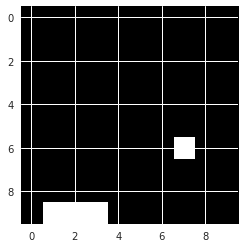

In [47]:
from keras.models import load_model
state_size = 100
action_size = 3
env = Catch(grid_size)
# make REINFORCE agent
agent = load_model('catch_reinforce.h5')
score = 0
counter = 0
for e in range(500):
    done = False
    env.reset()
    state = env.observe()
    state = np.reshape(state, [1, state_size])
    print(str(e)+" "+str(score))
    while not done:
        counter = counter + 1
        policy = agent.predict(state)
        action = np.argmax(policy)
        next_state, reward, done = env.act(action)
        next_state = np.reshape(next_state, [1, state_size])
        score = score + reward
        display_screen(action,score,next_state,counter)
        state = next_state
        